7/18/2019

This is going to hold the setup for the mechanical turk task where I choose what color contexts to have humans label.

These contexts are going to come from the dev set and will overlap with the indices found in the ngram overlap indices as much as possible?

In [1]:
# so we can access classes from parent directory
import sys
sys.path.append("..")

In [2]:
from monroe_data import MonroeData, MonroeDataEntry, Color # for loading in training data
from evaluation import delta_e_dist
import caption_featurizers # for tokenizing input to nltk bleu

In [3]:
dev_data = MonroeData("../data/csv/dev_corpus_monroe.csv", "../data/entries/dev_entries_monroe.pkl")

In [5]:
len(already_found_indices)

554

In [6]:
already_found_indices = [i - 15665 for i in already_found_indices] # where 15665 is the length of the train_data, the offset

In [7]:
dev_data[already_found_indices[0]]

brightest color

In [8]:
already_found_indices[0]

2768

In [20]:
# Now let's sort by condition

close_des = []
split_des = []
far_des = []

for i in already_found_indices:
    if dev_data[i].condition == "close":
        close_des.append(i)
    elif dev_data[i].condition == "split":
        split_des.append(i)
    elif dev_data[i].condition == "far":
        far_des.append(i)

In [12]:
len(close_des)

514

In [13]:
len(far_des)

19

In [14]:
len(split_des)

21

In [15]:
already_found_indices_set = set(already_found_indices)

In [21]:
for i in range(len(dev_data)):
    if i not in already_found_indices_set and dev_data[i].outcome:
#         if dev_data[i].condition == "close":
#             close_des.append(i)
        if dev_data[i].condition == "split" and len(split_des) < 500:
            split_des.append(i)
        elif dev_data[i].condition == "far" and len(far_des) < 500:
            far_des.append(i)
            
        if len(split_des) >= 500 and len(far_des) >= 500:
            break

In [17]:
len(split_des)

500

In [18]:
len(far_des)

500

In [22]:
far_des

[4936,
 842,
 879,
 888,
 5015,
 1051,
 1067,
 7240,
 1476,
 3685,
 5925,
 6036,
 66,
 2190,
 170,
 4283,
 2532,
 10837,
 6793,
 2,
 4,
 6,
 7,
 9,
 10,
 13,
 17,
 19,
 21,
 22,
 23,
 33,
 37,
 41,
 45,
 47,
 51,
 55,
 58,
 61,
 64,
 74,
 79,
 83,
 85,
 86,
 87,
 89,
 92,
 93,
 94,
 97,
 106,
 107,
 111,
 114,
 116,
 117,
 118,
 125,
 126,
 128,
 131,
 133,
 138,
 143,
 147,
 149,
 152,
 153,
 161,
 167,
 174,
 175,
 179,
 181,
 183,
 184,
 186,
 188,
 189,
 191,
 196,
 200,
 206,
 208,
 210,
 212,
 218,
 220,
 221,
 222,
 225,
 230,
 233,
 237,
 239,
 243,
 245,
 248,
 250,
 254,
 257,
 258,
 266,
 268,
 273,
 274,
 275,
 276,
 284,
 288,
 289,
 291,
 293,
 301,
 308,
 313,
 317,
 320,
 322,
 323,
 324,
 327,
 329,
 330,
 331,
 332,
 333,
 334,
 337,
 348,
 353,
 354,
 358,
 359,
 365,
 366,
 369,
 371,
 372,
 376,
 377,
 382,
 385,
 386,
 390,
 393,
 394,
 399,
 402,
 405,
 407,
 409,
 410,
 414,
 421,
 426,
 427,
 428,
 431,
 432,
 436,
 443,
 448,
 455,
 457,
 458,
 459,
 464,
 465

In [49]:
close_hexes = [] 
split_hexes = []
far_hexes   = []

def ind_to_hexes(i):
    colors = dev_data[i].colors
    hexes = []
    for c in colors:
        hexcode = "#"
        hexcode += "".join([format(int(val), '02x') for val in c.rgb])
        hexes.append(hexcode)
    return hexes


In [50]:
for i in close_des:
    close_hexes.append(ind_to_hexes(i))

In [51]:
close_hexes[:10]

[['#ff01c8', '#a83dc3', '#c83893'],
 ['#7d738d', '#4961b7', '#876997'],
 ['#5c53ad', '#4549bb', '#3d09f7'],
 ['#5c1de3', '#a904fc', '#a24ab6'],
 ['#6f7791', '#8d7382', '#787d88'],
 ['#6aa45c', '#79916f', '#718f85'],
 ['#d31ce4', '#a84cb4', '#9960a0'],
 ['#7ae11f', '#59b14f', '#38da26'],
 ['#2937d7', '#405ec0', '#63669d'],
 ['#6e9a66', '#57a9a1', '#7b857e']]

In [42]:
dev_data[close_des[0]].colors

[hsl: [313, 99, 50], rgb [255, 1, 200], hsv [313, 99.49748743718592, 99.5],
 hsl: [288, 52, 50], rgb [168, 61, 195], hsv [288, 68.42105263157895, 76.0],
 hsl: [322, 56, 50], rgb [200, 56, 147], hsv [322, 71.7948717948718, 78.0]]

In [52]:
for i in split_des:
    split_hexes.append(ind_to_hexes(i))
    
for i in far_des:
    far_hexes.append(ind_to_hexes(i))

In [54]:
len(split_hexes)

500

In [58]:
import copy

In [69]:
# next, we have to put the close thing in the target position for the "misleading" captions
def get_misleading_hexes(ind_data, hex_data):
    hex_data_new = copy.deepcopy(hex_data)
    
    for i, data_i in enumerate(ind_data):
        misleading_target = 1
        # condition is split so take the closest one, otherwise this doesn't matter
        if dev_data[data_i].condition == "split" and dev_data.data["targetD1Diff"][data_i] > dev_data.data["targetD2Diff"][data_i]:
            misleading_target = 2
            print("aha!", i)

        hex_data_new[i][0], hex_data_new[i][misleading_target] = hex_data[i][misleading_target], hex_data[i][0]

    return hex_data_new
        
    

In [71]:
#close_hexes_misleading = get_misleading_hexes(close_des, close_hexes)
split_hexes_misleading = get_misleading_hexes(split_des, split_hexes)
#far_hexes_misleading = get_misleading_hexes(far_des, far_hexes)

In [72]:
split_des[0]

6873

In [76]:
testdiffs = [(dev_data.data["targetD1Diff"][i],  dev_data.data["targetD2Diff"][i]) for i in split_des]

In [74]:
any(testdiffs)

False

In [77]:
testdiffs

[(5, 26),
 (14, 40),
 (8, 34),
 (12, 77),
 (11, 73),
 (13, 35),
 (9, 93),
 (8, 42),
 (6, 82),
 (14, 86),
 (15, 50),
 (11, 34),
 (14, 23),
 (9, 85),
 (12, 82),
 (9, 25),
 (10, 49),
 (7, 82),
 (7, 64),
 (19, 33),
 (17, 44),
 (16, 31),
 (16, 50),
 (15, 56),
 (6, 22),
 (13, 57),
 (7, 35),
 (17, 32),
 (19, 48),
 (18, 42),
 (8, 40),
 (15, 31),
 (5, 42),
 (5, 32),
 (14, 35),
 (15, 34),
 (12, 27),
 (14, 25),
 (12, 61),
 (17, 41),
 (17, 69),
 (11, 44),
 (15, 34),
 (16, 44),
 (16, 44),
 (15, 72),
 (9, 34),
 (17, 62),
 (18, 35),
 (10, 64),
 (13, 81),
 (18, 40),
 (18, 25),
 (10, 55),
 (7, 31),
 (17, 93),
 (14, 54),
 (8, 31),
 (12, 36),
 (6, 26),
 (9, 61),
 (11, 44),
 (9, 32),
 (17, 29),
 (8, 26),
 (19, 90),
 (7, 36),
 (19, 50),
 (15, 45),
 (15, 59),
 (13, 83),
 (7, 29),
 (7, 51),
 (17, 58),
 (10, 46),
 (9, 24),
 (9, 31),
 (8, 44),
 (13, 30),
 (11, 35),
 (19, 50),
 (17, 32),
 (15, 38),
 (11, 85),
 (19, 32),
 (10, 65),
 (17, 69),
 (8, 69),
 (16, 93),
 (12, 74),
 (16, 50),
 (15, 29),
 (18, 26),
 (18,

In [ ]:
# so apparently, the closest distractor in the split condition is ALWAYS the second one.

In [67]:
split_hexes_misleading[-10:]

[['#70fa06', '#cde41c', '#d22e57'],
 ['#6f5aa6', '#7b3cc4', '#37b6c9'],
 ['#9c6498', '#f30dec', '#25db56'],
 ['#977d69', '#bb8e45', '#6baf51'],
 ['#ba4669', '#da263b', '#311ae6'],
 ['#28d87a', '#63cf31', '#08a8f8'],
 ['#40c093', '#13ed67', '#7a43bd'],
 ['#7e60a0', '#8d737e', '#d8b828'],
 ['#83619f', '#9f619b', '#2a0af6'],
 ['#4eec14', '#12ee66', '#ca9b36']]

In [68]:
split_hexes[-10:]

[['#cde41c', '#70fa06', '#d22e57'],
 ['#7b3cc4', '#6f5aa6', '#37b6c9'],
 ['#f30dec', '#9c6498', '#25db56'],
 ['#bb8e45', '#977d69', '#6baf51'],
 ['#da263b', '#ba4669', '#311ae6'],
 ['#63cf31', '#28d87a', '#08a8f8'],
 ['#13ed67', '#40c093', '#7a43bd'],
 ['#8d737e', '#7e60a0', '#d8b828'],
 ['#9f619b', '#83619f', '#2a0af6'],
 ['#12ee66', '#4eec14', '#ca9b36']]

In [115]:
# ok, now let's output these to a csv file...
def conditions_to_csv(contexts_per_HIT=5):
    headers = []
    header_template = "color_{}_{}"
    for i in range(contexts_per_HIT):
        for color_marker in ["target", "distr1", "distr2"]:
            headers.append(header_template.format(i+1, color_marker))
            
    misleading = False
    close = close_hexes
    split = split_hexes
    far = far_hexes
    
    file_body = ",".join(headers)
    file_body += "\n"
    
    file_row = []
    i = 0
    while i < len(split)*3:
            
        if i % 3 == 0: # close
            file_row.append(",".join(close[i // 3]))
        elif i % 3 == 1: # split
            file_row.append(",".join(split[i // 3]))
        else: # far
            file_row.append(",".join(far[i // 3]))
            
        if len(file_row) % contexts_per_HIT == 0:
            file_body += ",".join(file_row) + "\n"
            file_row = []
                                
            misleading = misleading ^ True # toggle misleading

            # and update close, split, far etc.
            if misleading:
                close = close_hexes_misleading
                split = split_hexes_misleading
                far = far_hexes_misleading
                i -= contexts_per_HIT
            else:
                close = close_hexes
                split = split_hexes
                far = far_hexes
        i += 1

    return file_body



In [116]:
file_out = conditions_to_csv()

In [117]:
x = file_out.split("\n")

In [118]:
x[0]

'color_1_target,color_1_distr1,color_1_distr2,color_2_target,color_2_distr1,color_2_distr2,color_3_target,color_3_distr1,color_3_distr2,color_4_target,color_4_distr1,color_4_distr2,color_5_target,color_5_distr1,color_5_distr2'

In [119]:
x[1]

'#ff01c8,#a83dc3,#c83893,#808080,#857b7c,#ce6632,#96d22e,#4454bc,#ef4511,#7d738d,#4961b7,#876997,#6ce41c,#3bc56e,#7d8083'

In [120]:
x[2]

'#a83dc3,#ff01c8,#c83893,#857b7c,#808080,#ce6632,#4454bc,#96d22e,#ef4511,#4961b7,#7d738d,#876997,#3bc56e,#6ce41c,#7d8083'

In [123]:
x[-2]

'#83619f,#9f619b,#2a0af6,#45bb8c,#df2186,#987368,#4db354,#2cf30d,#2fd15a,#4eec14,#12ee66,#ca9b36,#57bd43,#659b8c,#ce16ea'

In [121]:
x[-1]

''

In [130]:
#we add image_url because mechanical turk is being really stupid
#pilot_csv = ",image_url\n".join(x[:21])
pilot_csv = "\n".join(x[:21])

In [131]:
pilot_csv

'color_1_target,color_1_distr1,color_1_distr2,color_2_target,color_2_distr1,color_2_distr2,color_3_target,color_3_distr1,color_3_distr2,color_4_target,color_4_distr1,color_4_distr2,color_5_target,color_5_distr1,color_5_distr2\n#ff01c8,#a83dc3,#c83893,#808080,#857b7c,#ce6632,#96d22e,#4454bc,#ef4511,#7d738d,#4961b7,#876997,#6ce41c,#3bc56e,#7d8083\n#a83dc3,#ff01c8,#c83893,#857b7c,#808080,#ce6632,#4454bc,#96d22e,#ef4511,#4961b7,#7d738d,#876997,#3bc56e,#6ce41c,#7d8083\n#af9151,#837d7f,#3ce61a,#5c53ad,#4549bb,#3d09f7,#8f24dc,#6b46ba,#81817f,#1f8de1,#949a66,#4238c8,#5c1de3,#a904fc,#a24ab6\n#837d7f,#af9151,#3ce61a,#4549bb,#5c53ad,#3d09f7,#6b46ba,#8f24dc,#81817f,#949a66,#1f8de1,#4238c8,#a904fc,#5c1de3,#a24ab6\n#1ae620,#acf709,#062bfa,#83768a,#53da26,#8f8f71,#6f7791,#8d7382,#787d88,#2c45d4,#6d0ef2,#42d828,#7f8081,#3418e8,#6cca36\n#acf709,#1ae620,#062bfa,#53da26,#83768a,#8f8f71,#8d7382,#6f7791,#787d88,#6d0ef2,#2c45d4,#42d828,#3418e8,#7f8081,#6cca36\n#6aa45c,#79916f,#718f85,#7c13ed,#b436ca,#837f7d

In [183]:
len(x)

602

In [132]:
with open("../data/mturk/pilot.csv", "w") as csv:
    csv.write(pilot_csv)

In [185]:
# ok, the pilot is done, so let's split up the other trials into groups
wednesday_csv = x[:1] + x[21:21+17]
thursday_csv = x[:1] + x[21+17:21+(17*2)]
friday_csv = x[:1] + x[21+(17*2):21+(17*2)+18]

In [188]:
print(len(wednesday_csv))
print(len(thursday_csv))
print(len(friday_csv))

18
18
19


In [190]:
with open("../data/mturk/exp_7_24_2019.csv", "w") as csv:
    csv.write("\n".join(wednesday_csv))
    
with open("../data/mturk/exp_7_25_2019.csv", "w") as csv:
    csv.write("\n".join(thursday_csv))
    
with open("../data/mturk/exp_7_26_2019.csv", "w") as csv:
    csv.write("\n".join(friday_csv))

In [ ]:
# ok, the pilot study has been run, let's take a look at the results

In [133]:
import pandas as pd


In [544]:
pilot_results = pd.read_csv("../data/mturk/pilot_results.csv")

In [545]:
len(pilot_results)

20

In [137]:
pilot_results.head().T

,0,1,2,3,4
HITId,3W0KKJIARR9SYXUPCBCI89FU2G3K82,3GONHBMNHVY28HVF6DPB0642QU5MZE,3I7KR83SNADSC2DZH3IW85A5MMLK9R,3P7RGTLO6ED6HLN499WW40LPS43KA6,3VCK0Q0PO5EBOEAPEKRJ7MQGDDWN0N
HITTypeId,310F0WGLWJA66EDET15UZKHML0QTLV,310F0WGLWJA66EDET15UZKHML0QTLV,310F0WGLWJA66EDET15UZKHML0QTLV,310F0WGLWJA66EDET15UZKHML0QTLV,310F0WGLWJA66EDET15UZKHML0QTLV
Title,Describing Colors in Context,Describing Colors in Context,Describing Colors in Context,Describing Colors in Context,Describing Colors in Context
Description,Provide descriptions of colors to help someone...,Provide descriptions of colors to help someone...,Provide descriptions of colors to help someone...,Provide descriptions of colors to help someone...,Provide descriptions of colors to help someone...
Keywords,"color, description, art, design, paint, swatch...","color, description, art, design, paint, swatch...","color, description, art, design, paint, swatch...","color, description, art, design, paint, swatch...","color, description, art, design, paint, swatch..."
Reward,$1.00,$1.00,$1.00,$1.00,$1.00
CreationTime,Fri Jul 19 10:14:02 PDT 2019,Fri Jul 19 10:14:02 PDT 2019,Fri Jul 19 10:14:02 PDT 2019,Fri Jul 19 10:14:02 PDT 2019,Fri Jul 19 10:14:02 PDT 2019
MaxAssignments,1,1,1,1,1
RequesterAnnotation,BatchId:3709990;OriginalHitTemplateId:928390876;,BatchId:3709990;OriginalHitTemplateId:928390876;,BatchId:3709990;OriginalHitTemplateId:928390876;,BatchId:3709990;OriginalHitTemplateId:928390876;,BatchId:3709990;OriginalHitTemplateId:928390876;
AssignmentDurationInSeconds,3600,3600,3600,3600,3600


In [139]:
close_hexes[:5]

[['#ff01c8', '#a83dc3', '#c83893'],
 ['#7d738d', '#4961b7', '#876997'],
 ['#5c53ad', '#4549bb', '#3d09f7'],
 ['#5c1de3', '#a904fc', '#a24ab6'],
 ['#6f7791', '#8d7382', '#787d88']]

In [144]:
s = "abcdef"

s = [s[i:i+2] for i in range(0, len(s), 2)]
[int(l, 16) for l in s]

[171, 205, 239]

In [145]:
def hexcode_to_rgb(hexcode):
    hexcode = hexcode.lstrip("#")
    hexcode = [hexcode[i:i+2] for i in range(0, len(hexcode), 2)]
    rgb = [int(h, 16) for h in hexcode]
    return rgb
    

In [191]:
def get_results(results):
    """Extract the results from a pandas dataframe containing mturk output"""
    contexts = []
    good_responses = []
    bad_responses = []
    for i, row in results.iterrows():
        for j in range(5):
            # get the context
            context = []
            for tag in ['target', 'distr1', 'distr2']:
                hexcode = row["Input.color_{}_{}".format(j+1, tag)]
                rgb = hexcode_to_rgb(hexcode)
                context.append(Color(*rgb, space="rgb"))
            contexts.append(context)

            good_response = row["Answer.description-good-{}".format(j+1)]
            bad_response = row["Answer.description-bad-{}".format(j+1)]

            good_responses.append(good_response)
            bad_responses.append(bad_response)
            
    return contexts, good_responses, bad_responses

In [192]:
pilot_contexts, pilot_good_responses, pilot_bad_responses = get_results(pilot_results)

In [193]:
len(pilot_good_responses)

200

In [152]:
len(pilot_bad_responses)

200

In [153]:
len(pilot_contexts)

200

In [166]:
hexcode_to_rgb("#ff01c8")

[255, 1, 200]

Good: bright pink	Bad: bright purple


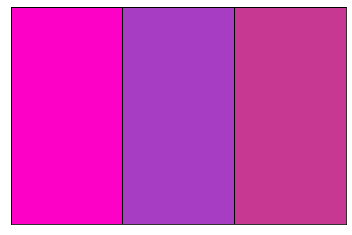

Good: dark grey	Bad: dark grey


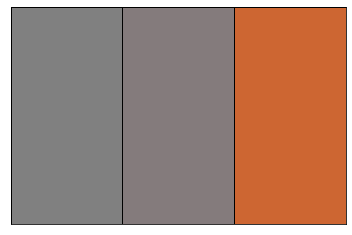

Good: lime green	Bad: lime green


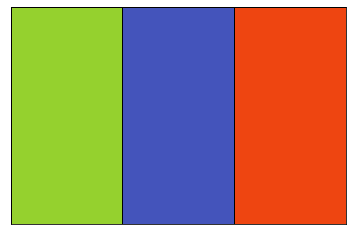

Good: purple grey	Bad: purple grey


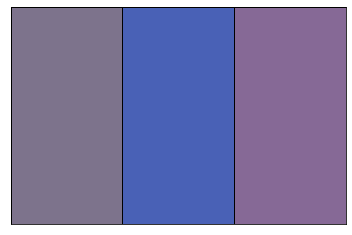

Good: bright green	Bad: lime green


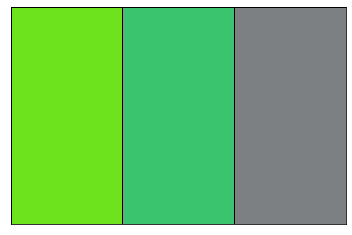

In [157]:
# 1 - DOESN'T WORK
for i in range(5):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: pale purple	Bad: pink


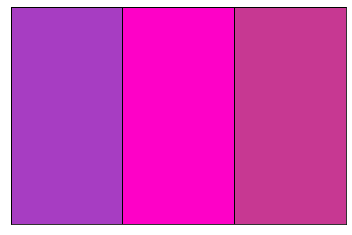

Good: foghat gray	Bad: gray


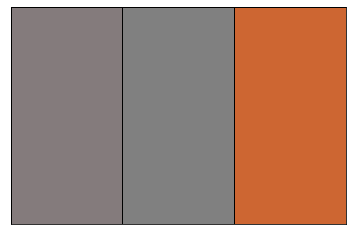

Good: sky blue	Bad: bright


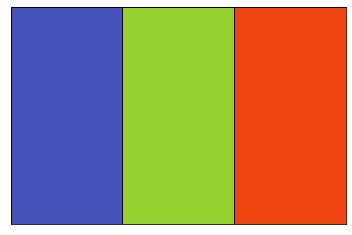

Good: sky blue	Bad: pale


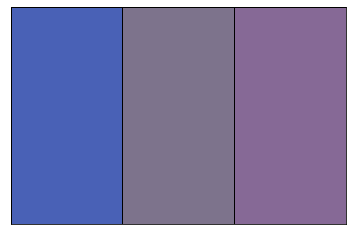

Good: light green	Bad: green


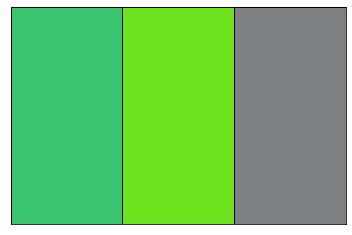

In [158]:
# 1' - WORKS
for i in range(5,10):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: Brown	Bad: Brown


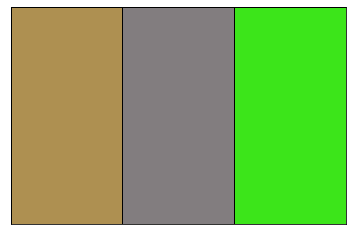

Good: Indigo	Bad: Indigo


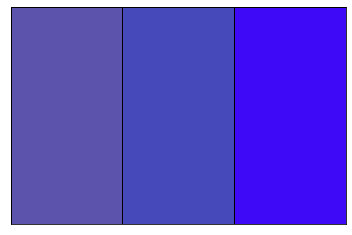

Good: Purple	Bad: Purple


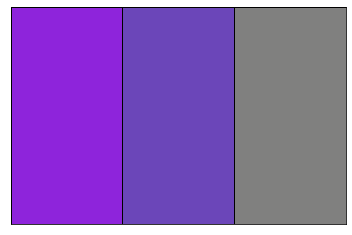

Good: Light Blue	Bad: Blue


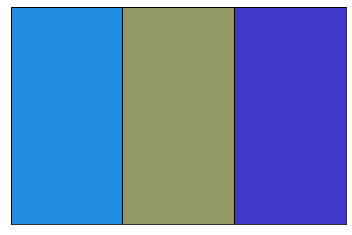

Good: Light Violet	Bad: Purple


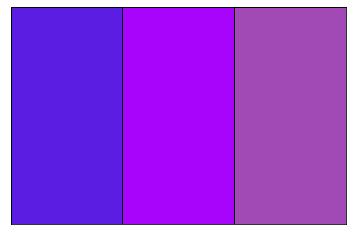

In [160]:
# 2 - DOESN'T WORK
for i in range(10,15):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: Green	Bad: Green


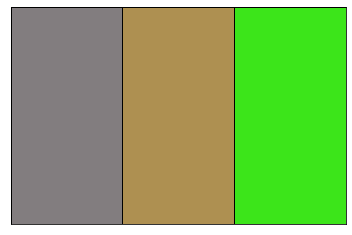

Good: dark blue	Bad: Blue


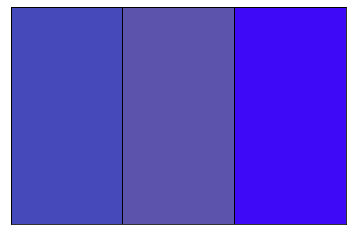

Good: violet	Bad: violet


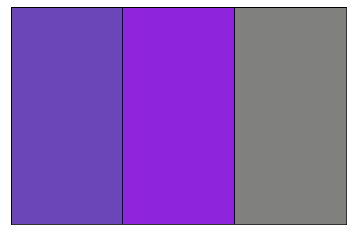

Good: khaki	Bad: blue


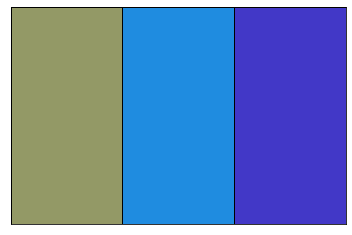

Good: violet	Bad: violet


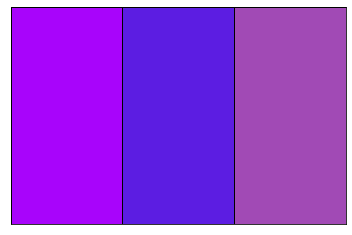

In [159]:
# 2' - DOESN'T WORK
for i in range(15,20):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: light Green	Bad: light green


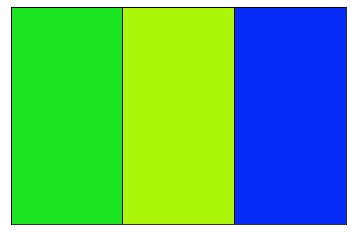

Good: Light purple	Bad: light purple


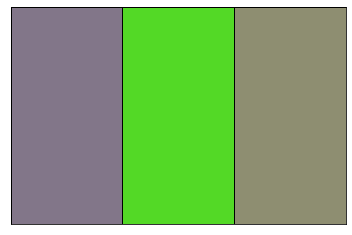

Good: grey	Bad: grey


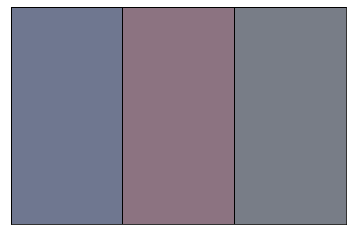

Good: blue	Bad: dark blue


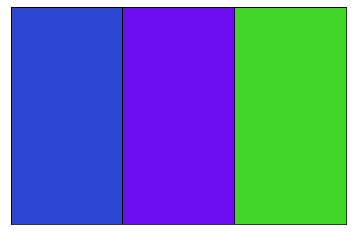

Good: grey	Bad: grey


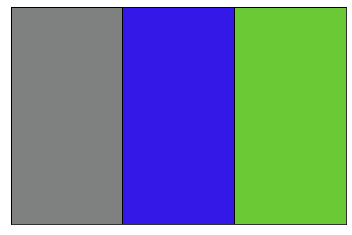

In [161]:
# 3 - DOESN'T WORK
for i in range(20,25):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: greenish yellow	Bad: green


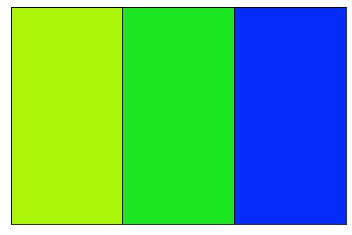

Good: light green	Bad: light colored


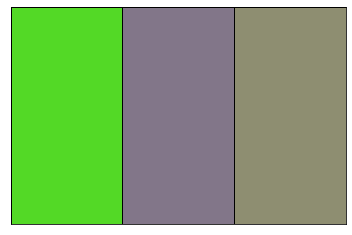

Good: dark lavender	Bad: purple


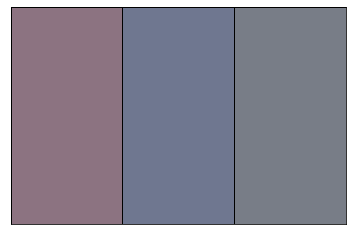

Good: purplish lavender	Bad: blue


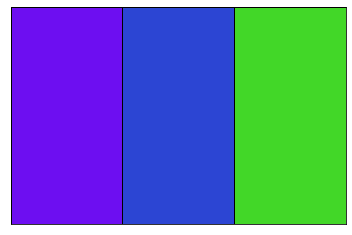

Good: blue	Bad: bright colored


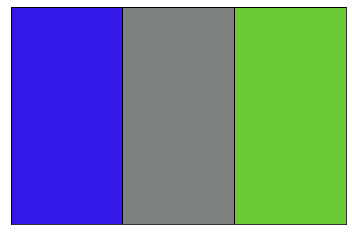

In [162]:
# 3' - WORKS
for i in range(25,30):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: forest green	Bad: green


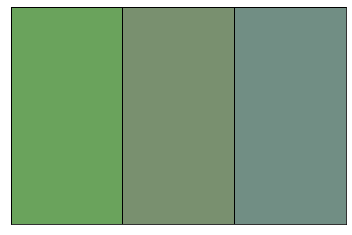

Good: deep blue	Bad: purplish


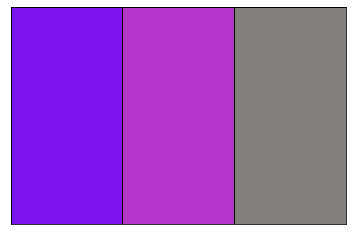

Good: purple	Bad: bright


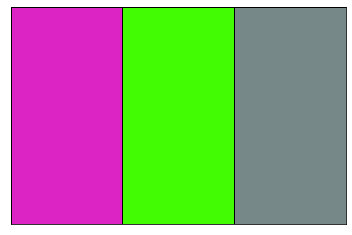

Good: bright purple	Bad: purple


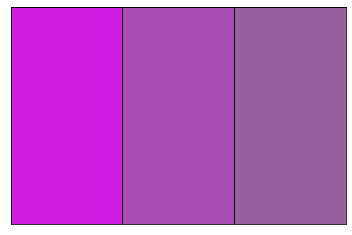

Good: dull green	Bad: green


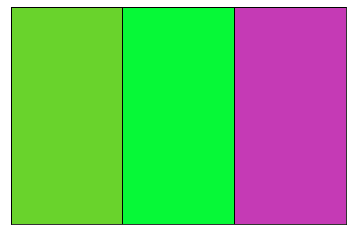

In [164]:
# 4 - DOESN'T WORK
for i in range(30,35):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: olive green	Bad: green


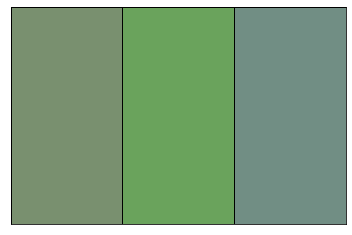

Good: lilac	Bad: purple


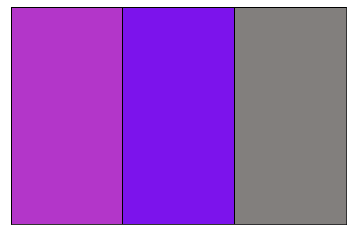

Good: green	Bad: bright


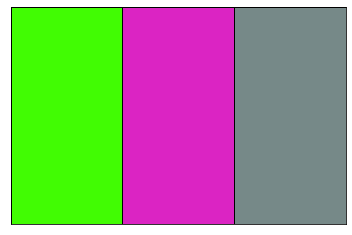

Good: dark purple	Bad: purple


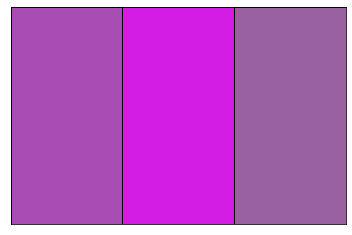

Good: bright green	Bad: green


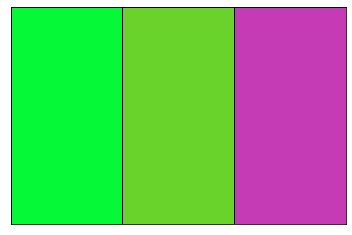

In [165]:
# 4' - WORKS
for i in range(35,40):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: Dark Blue	Bad: Midnight Blue


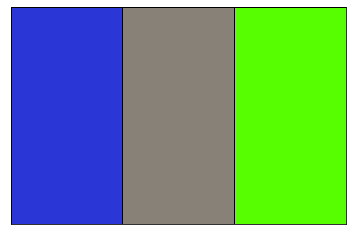

Good: Moss Green	Bad: Forest Green


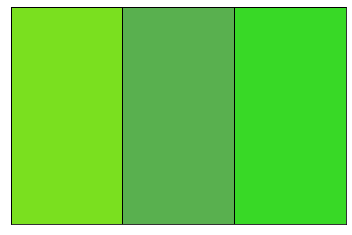

Good: Rose Pink	Bad: Purple


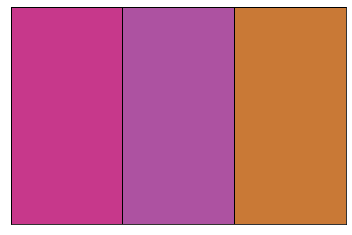

Good: Leaf Green	Bad: Ocean Green


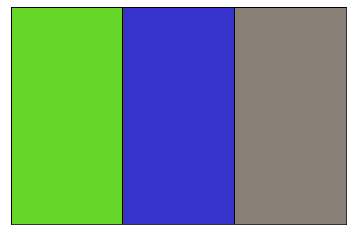

Good: Ocean Blue	Bad: Shadow Blue


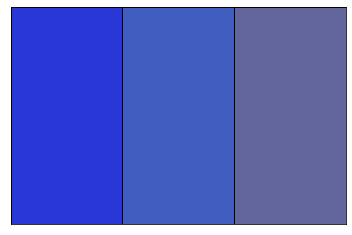

In [167]:
# 5 - WORKS
for i in range(40,45):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: Gray	Bad: Dark


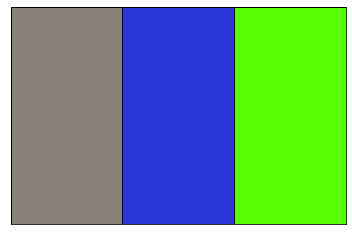

Good: Darkest green	Bad: Green


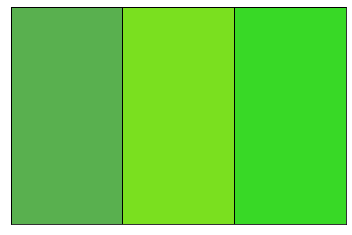

Good: Darker purple	Bad: Purple


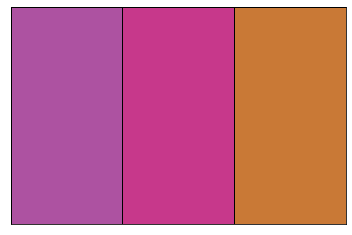

Good: Blue	Bad: Primary color


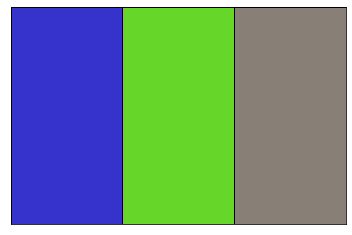

Good: Middle shade of blue	Bad: Blue


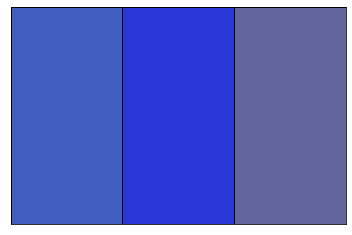

In [168]:
# 5' - WORKS (though green and gray are not primary colors)
for i in range(45,50):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: emerald green	Bad: green


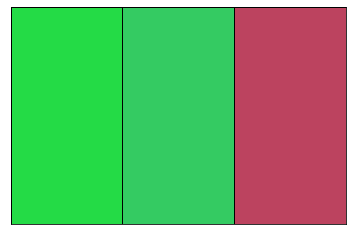

Good: royal blue	Bad: dark


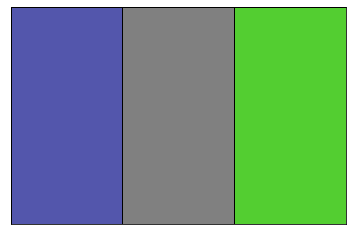

Good: olive green	Bad: desaturated


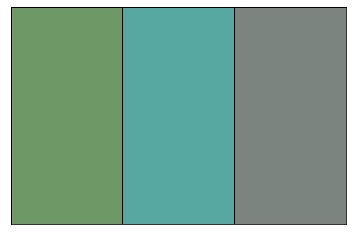

Good: leaf green	Bad: green


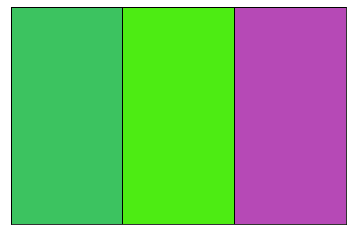

Good: bright red	Bad: color in rainbow


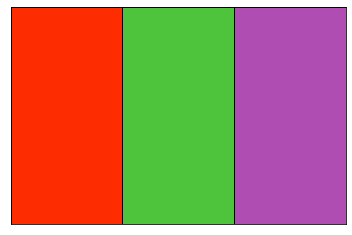

In [170]:
# 6 - WORKS
for i in range(50,55):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: green	Bad: green


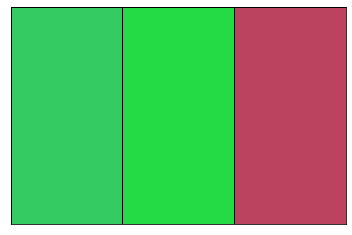

Good: grey, dull	Bad: dull


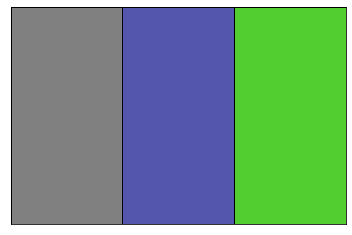

Good: blue, not green or grey	Bad: greenish


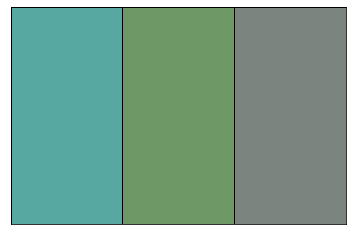

Good: bright green	Bad: green


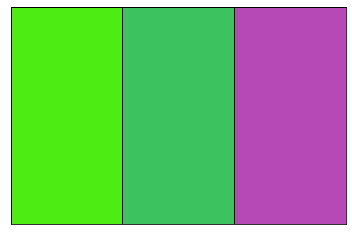

Good: green	Bad: bright


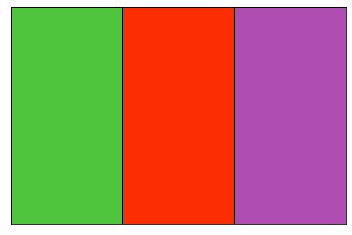

In [169]:
# 6' - WORKS
for i in range(55,60):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: dark green	Bad: green


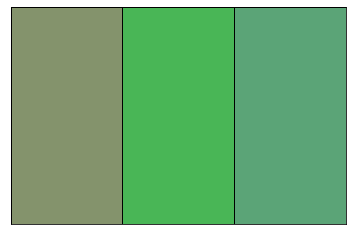

Good: greenish turquoise	Bad: green


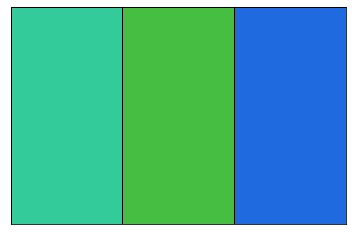

Good: pinkish purple	Bad: pink


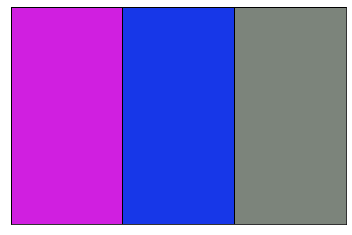

Good: soft light brown	Bad: brown


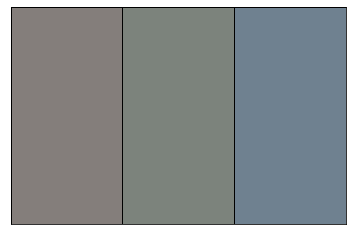

Good: soft gray	Bad: gray


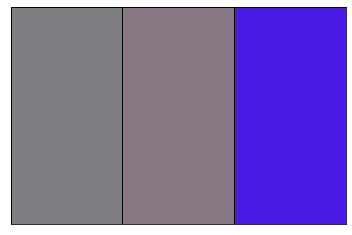

In [171]:
# 7 - WORKS
for i in range(60,65):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: bright green	Bad: green


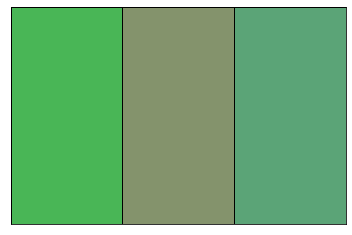

Good: bright green	Bad: green


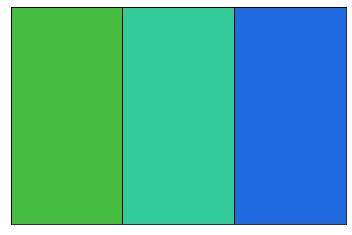

Good: blue	Bad: colorful


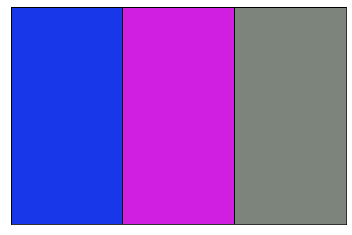

Good: middle gray	Bad: gray


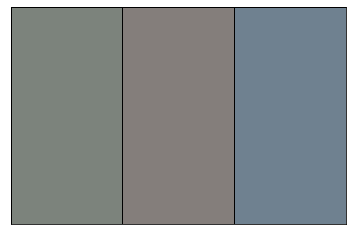

Good: purple	Bad: gray


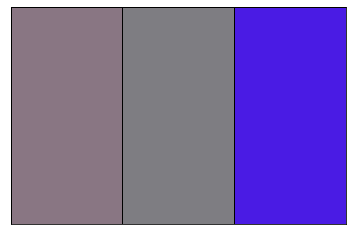

In [173]:
# 7' - WORKS
for i in range(65,70):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: light brown	Bad: tan


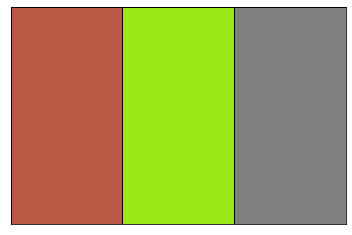

Good: medium gray	Bad: gray


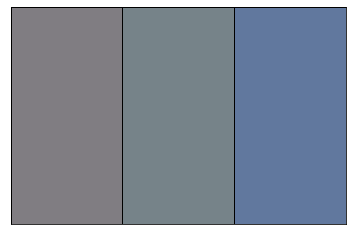

Good: grayish blue	Bad: grey


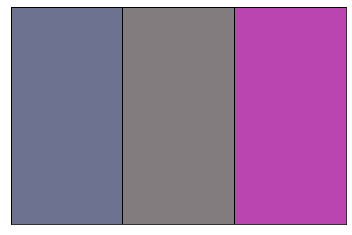

Good: dark blue	Bad: blue


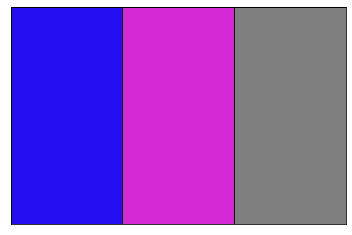

Good: light green	Bad: green


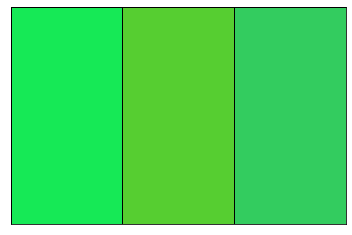

In [174]:
# 8 - WORKS 3/5
for i in range(70,75):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: neon green	Bad: yellow/green


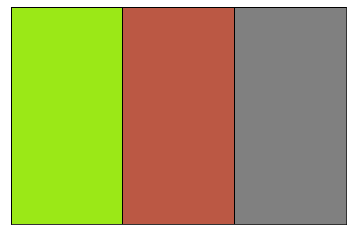

Good: elephant grey	Bad: dark grey


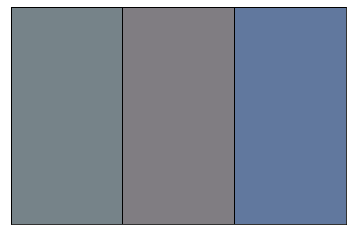

Good: dark brown/grey	Bad: dark grey


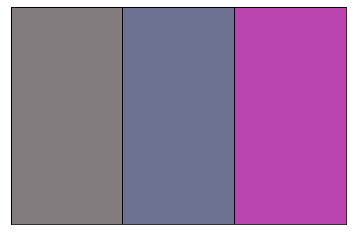

Good: maroon	Bad: purple


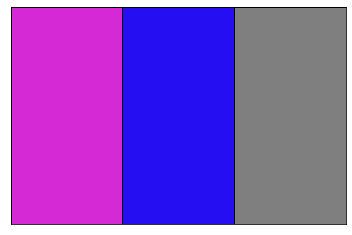

Good: neon green	Bad: green


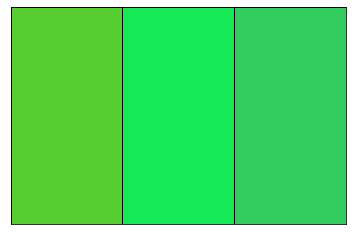

In [175]:
# 8' - WORKS (3/5)
for i in range(75,80):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: bright purple/pink	Bad: purple


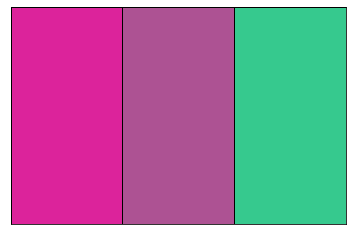

Good: brighter green	Bad: green


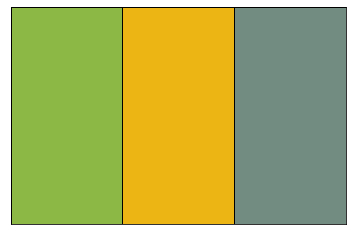

Good: more purple than pink or red	Bad: purple


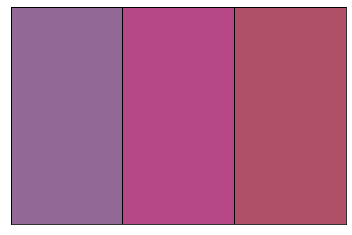

Good: darker green	Bad: green


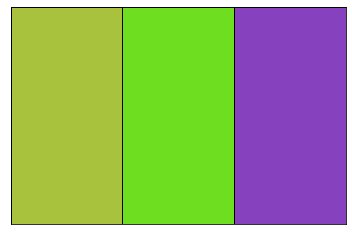

Good: red	Bad: red


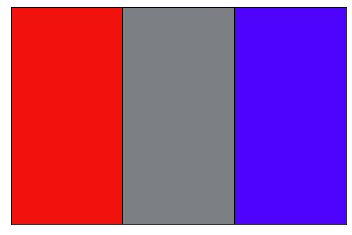

In [176]:
# 9 - WORKS
for i in range(80,85):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: Purple	Bad: Pink


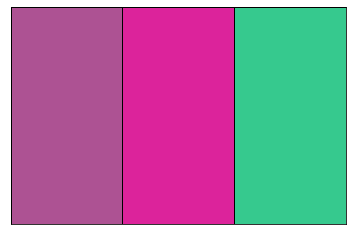

Good: Orange	Bad: Yellow


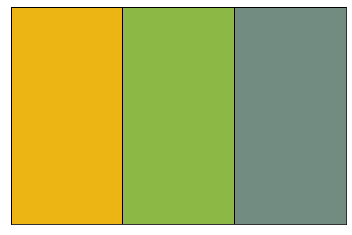

Good: Pink	Bad: Light Purple


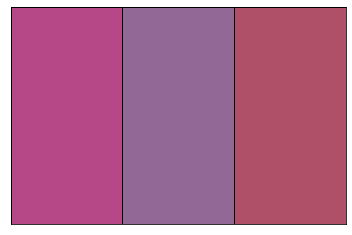

Good: Light green	Bad: Green


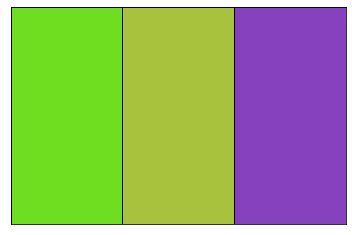

Good: Grey	Bad: Off-white


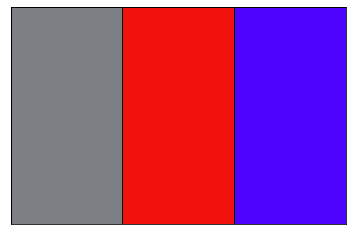

In [180]:
# 9' - DOESN'T WORK
for i in range(85,90):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: Medium Green	Bad: Green (This is ambiguous because it describes the both the light green target and the dark green color.)


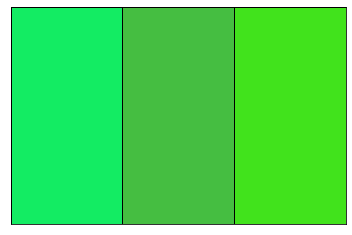

Good: Pink	Bad: Pink (This is ambiguous because it describes the both the light Pink target and the dark Pink color.)


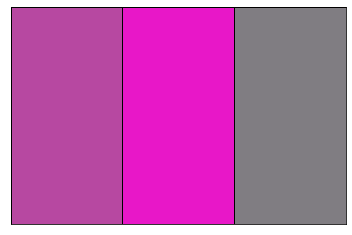

Good: green	Bad: Light Green


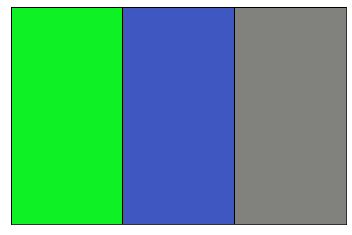

Good: Dark Green	Bad: Green (This is ambiguous because it describes the both the light Green target and the dark Green color.)


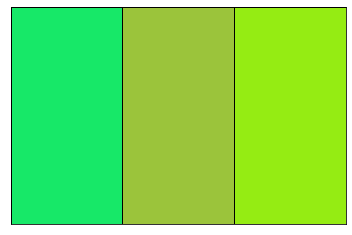

Good: Greenish Grey	Bad: Grey (This is ambiguous because it describes the both the light Grey target and the dark Grey color.)


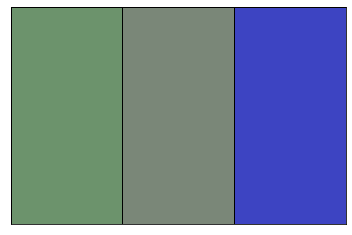

In [181]:
# 10 - WORKS (though I am a bit suspicious about the copy and pasting)
for i in range(90,95):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

Good: mild green	Bad: green


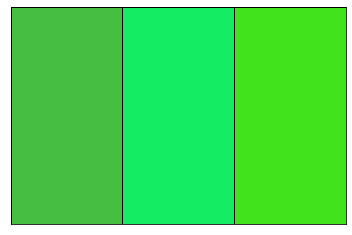

Good: hot pink	Bad: pink


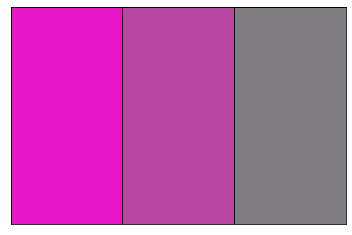

Good: blue	Bad: a cool color


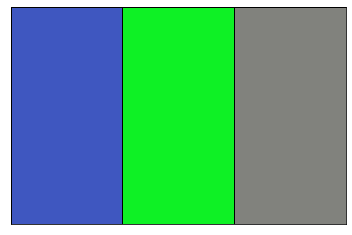

Good: sandy bland yellow	Bad: yellow


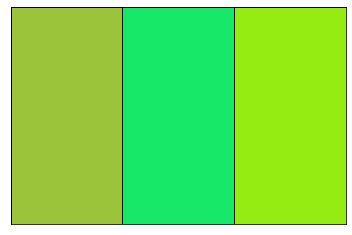

Good: silver	Bad: grey


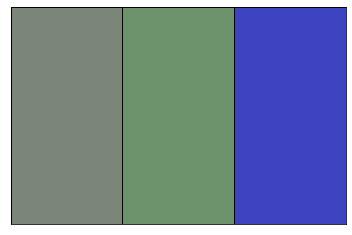

In [182]:
# 10' - WORKS
for i in range(95,100):
    dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

In [217]:
pilot_results.shape

(40, 55)

In [ ]:
# ok, now I'm going to look through all of the data from the second (larger) pilot where we got
# replicates of the above data

In [197]:
pilot_replicate_results = pd.read_csv("../data/mturk/pilot_2_results.csv")
pr_contexts, pr_good_responses, pr_bad_responses = get_results(pilot_replicate_results)

In [199]:
len(pr_contexts)

300

0
Good: Light pink	Bad: Pink


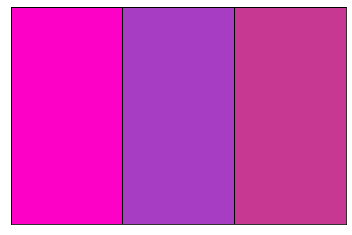

1
Good: Dark grey	Bad: Grey


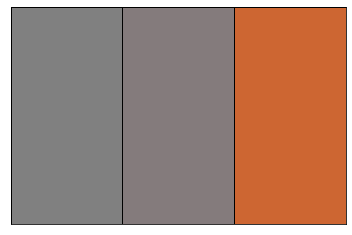

2
Good: Green	Bad: Dark color


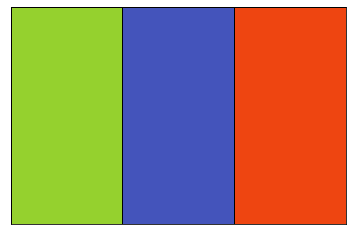

3
Good: Dark grey	Bad: Grey


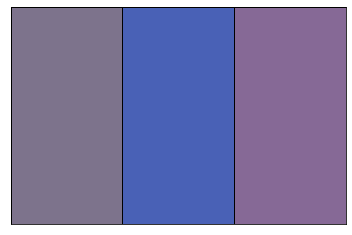

4
Good: Light green	Bad: Green


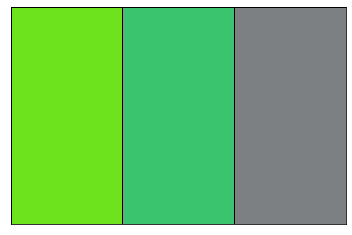

5
Good: Bright pink	Bad: Pink


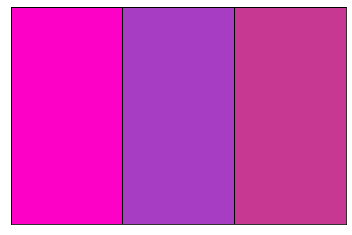

6
Good: Neutral gray	Bad: Grey


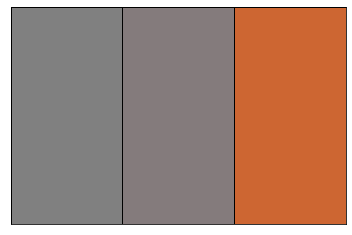

7
Good: Dark lime green	Bad: Green


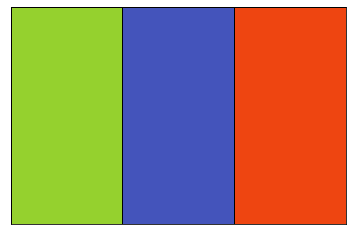

8
Good: Blue-ish gray	Bad: Gray


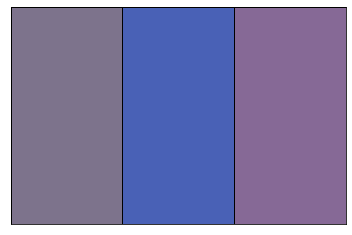

9
Good: Bright green	Bad: Green


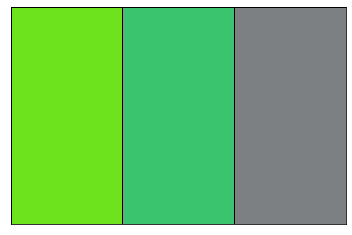

10
Good: bright purple	Bad: purple


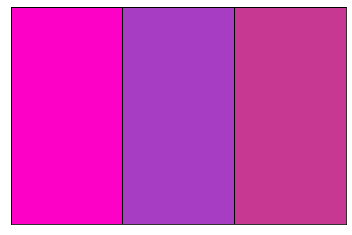

11
Good: lighter gray	Bad: grey


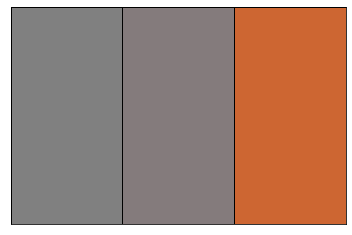

12
Good: bright green	Bad: green


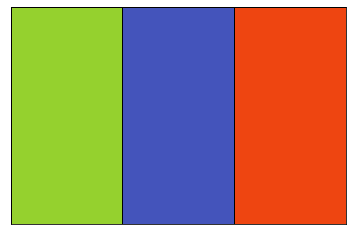

13
Good: greyish purple	Bad: purple


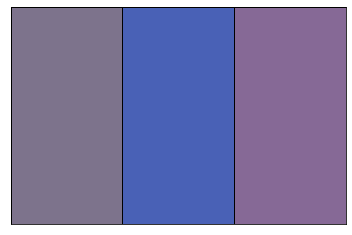

14
Good: bright green	Bad: green


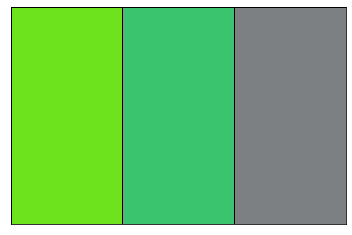

15
Good: light Purple	Bad: purple


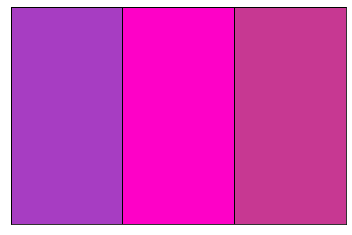

16
Good: dark grey	Bad: grey


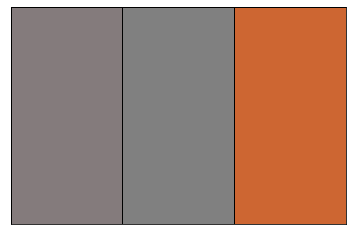

17
Good: dark violet	Bad: violet


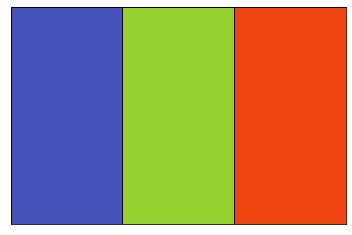

18
Good: light violet	Bad: violet


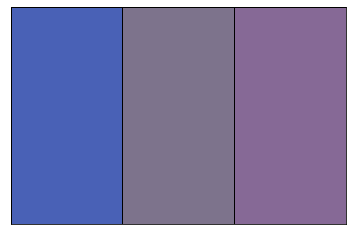

19
Good: light green	Bad: green


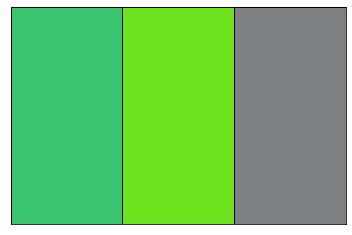

20
Good: purple	Bad: purple


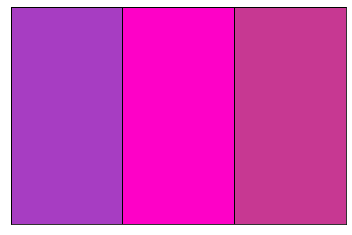

21
Good: brown gray	Bad: gray


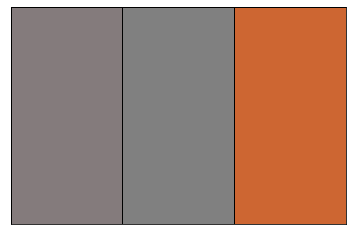

22
Good: navy blue	Bad: color in the rainbow


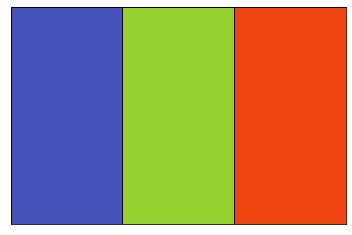

23
Good: navy blue	Bad: color in the rainbow


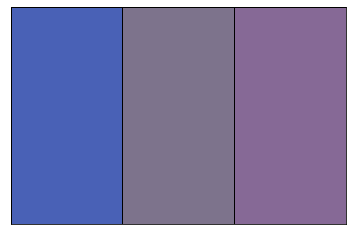

24
Good: Christmas green	Bad: green


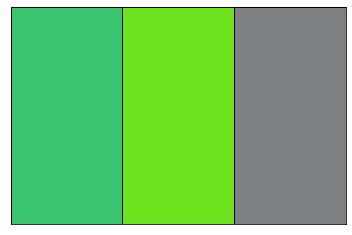

25
Good: dark purple	Bad: lilac


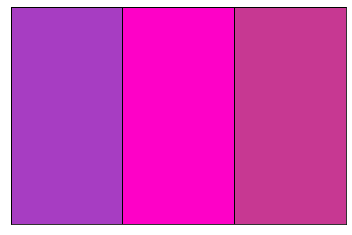

26
Good: dark grey	Bad: ash


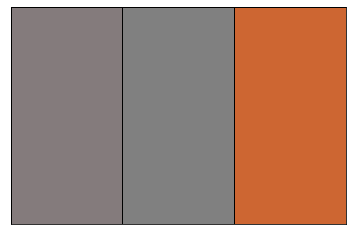

27
Good: blue	Bad: royal


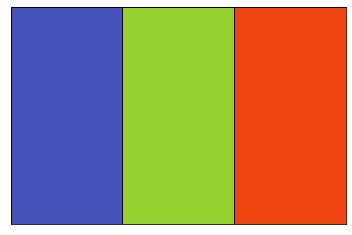

28
Good: blue	Bad: navy


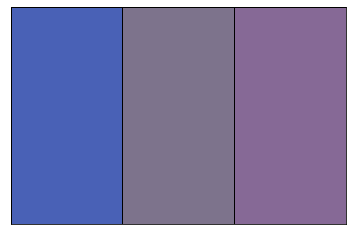

29
Good: dark green	Bad: green


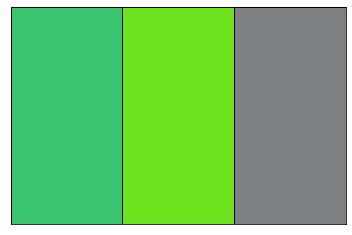

In [203]:
for i in range(5*6):
    print(i)
    dev_data.display_custom_game(pr_contexts[i], "Good: {}\tBad: {}".format(pr_good_responses[i], pr_bad_responses[i]))

30
Good: light brown	Bad: light brown


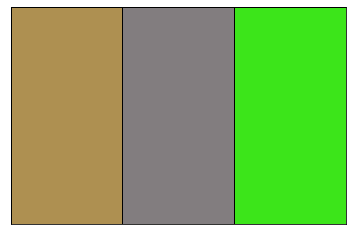

31
Good: light blue	Bad: deep blue


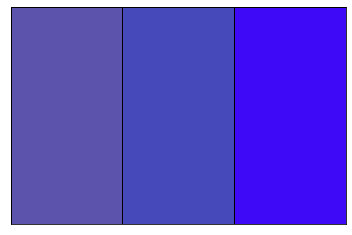

32
Good: purple	Bad: purple


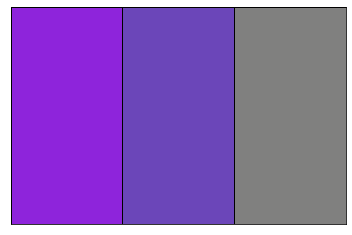

33
Good: light blue	Bad: sky blue


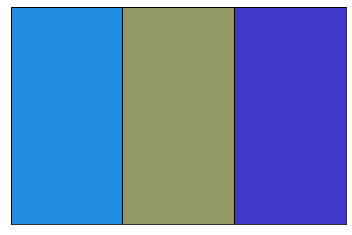

34
Good: dark blue	Bad: deep blue


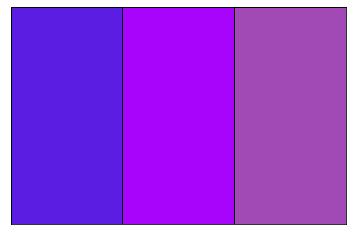

35
Good: tan	Bad: brown


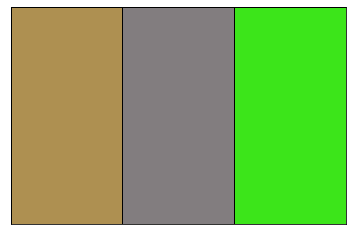

36
Good: purple	Bad: dark blue


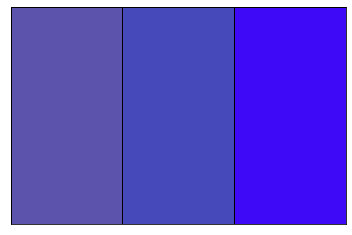

37
Good: bright violet	Bad: purple


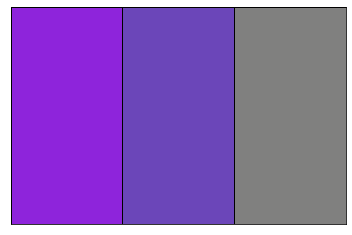

38
Good: cerulean blue	Bad: blue


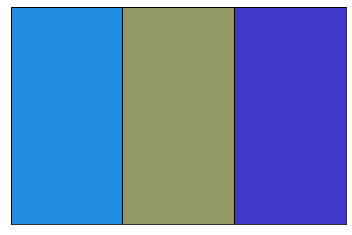

39
Good: indigo	Bad: purple


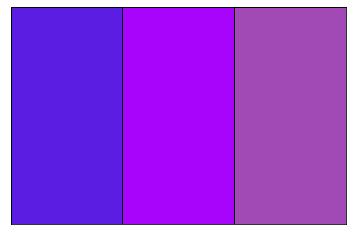

40
Good: Light brown	Bad: Brown


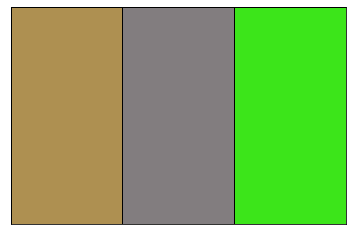

41
Good: Light purple and dark blue mixed	Bad: Purple


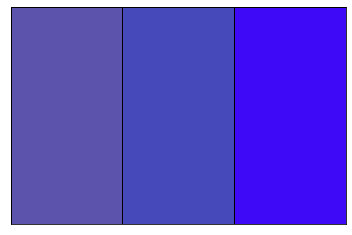

42
Good: Bright purple	Bad: Purple


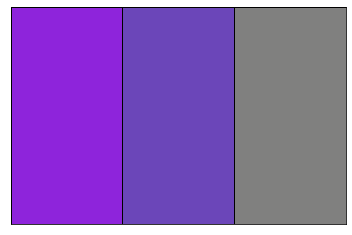

43
Good: Light blue	Bad: Blue


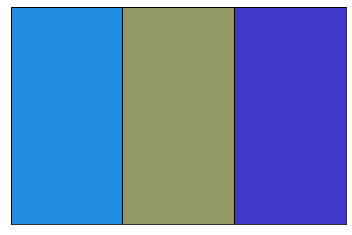

44
Good: Light deep purple	Bad: Purple


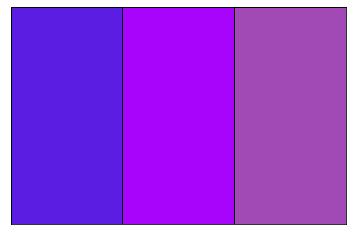

45
Good: Dark Grey	Bad: Grey


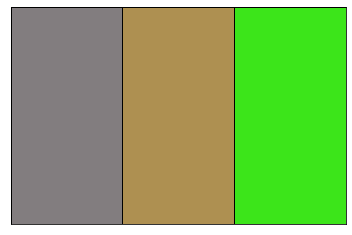

46
Good: Dark Blue	Bad: Blue


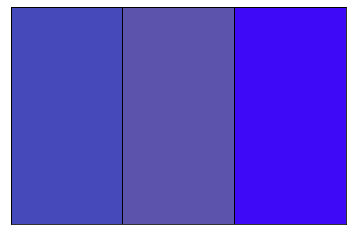

47
Good: Dark Purple	Bad: Purple


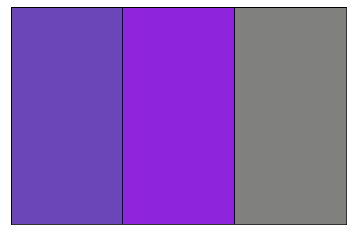

48
Good: Light Brown	Bad: Brown


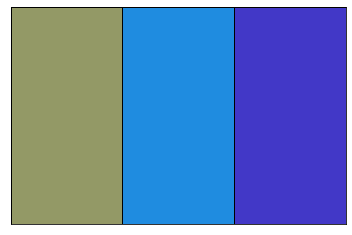

49
Good: Light Purple	Bad: Purple


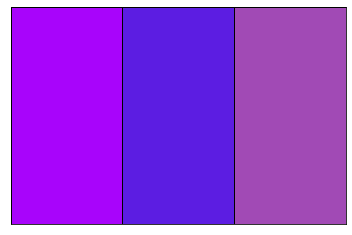

50
Good: gray	Bad: Neutral


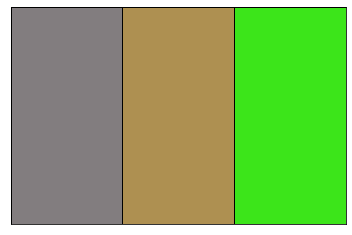

51
Good: Royal blue	Bad: Blue


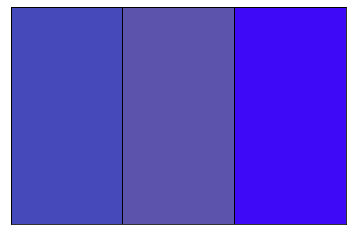

52
Good: Dusty grape	Bad: Purple


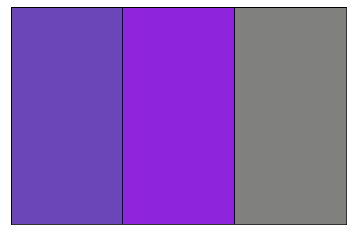

53
Good: Olive	Bad: Murky


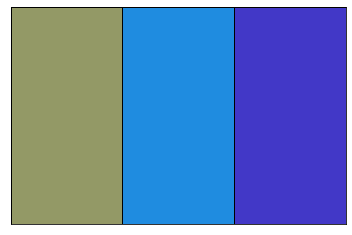

54
Good: Bright purple	Bad: purple


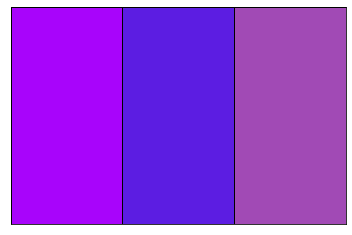

55
Good: grey	Bad: grey


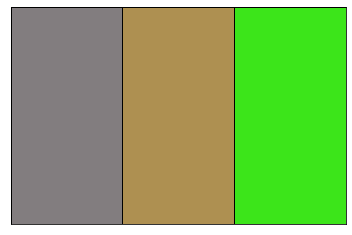

56
Good: dark blue	Bad: blue


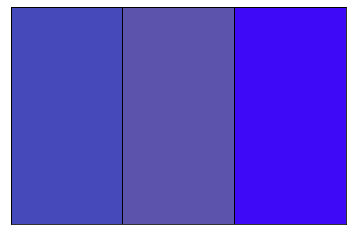

57
Good: light purple	Bad: purple


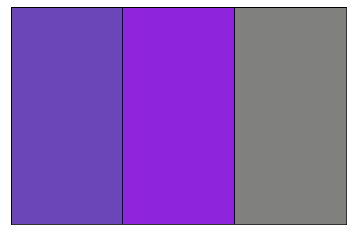

58
Good: light grey	Bad: greyish


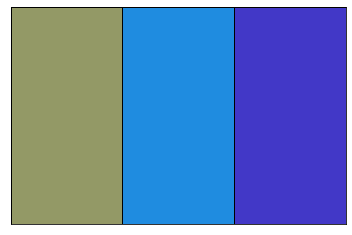

59
Good: pink	Bad: pinkish


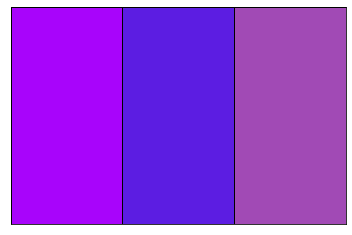

In [205]:
for i in range(5*6,60):
    print(i)
    dev_data.display_custom_game(pr_contexts[i], "Good: {}\tBad: {}".format(pr_good_responses[i], pr_bad_responses[i]))

60
Good: neon green	Bad: green


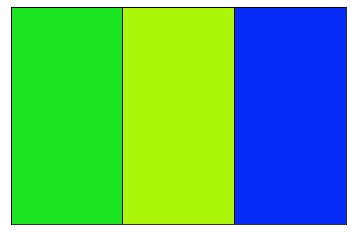

61
Good: purple gray	Bad: earth tone


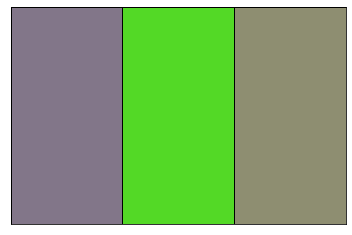

62
Good: blue-ish gray	Bad: gray


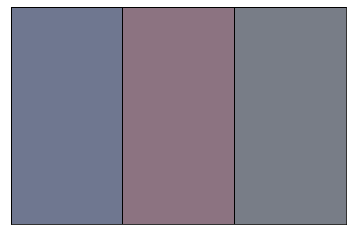

63
Good: navy blue	Bad: blue-ish


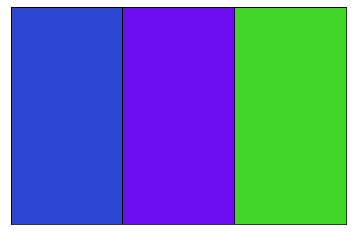

64
Good: gray	Bad: medium darkness


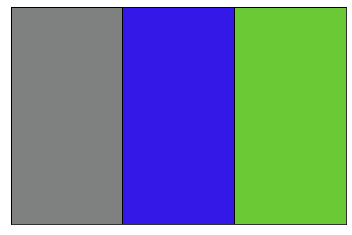

65
Good: dark green	Bad: bright green


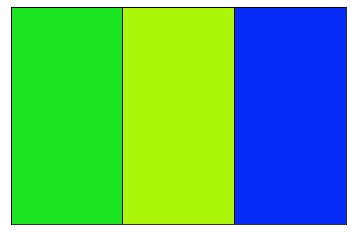

66
Good: light purple	Bad: purple


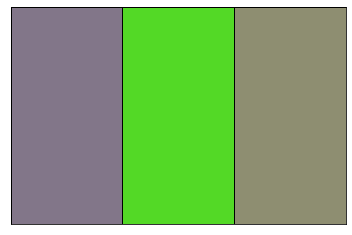

67
Good: dark purple	Bad: bright purple


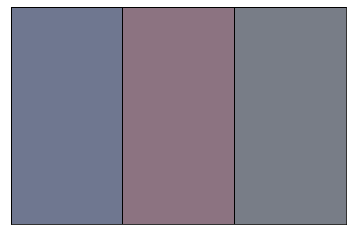

68
Good: blue	Bad: blue


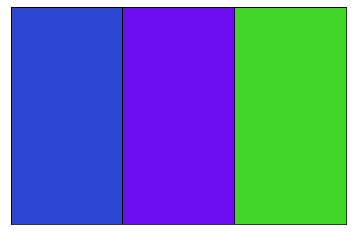

69
Good: gray	Bad: gray


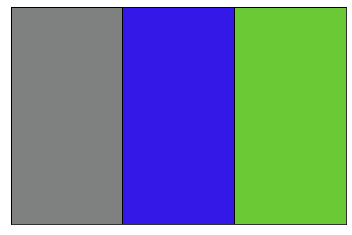

70
Good: Mint gree	Bad: Green


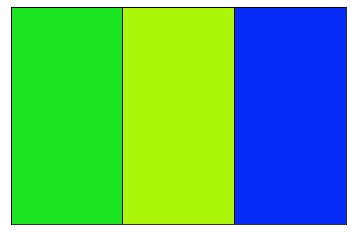

71
Good: Dark gray	Bad: Gray


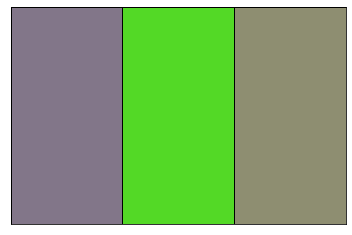

72
Good: Dark gray	Bad: Gray


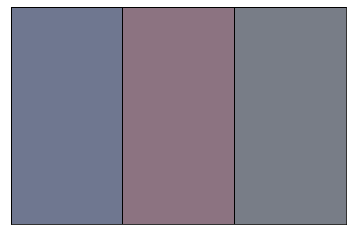

73
Good: Midnight blue	Bad: Blue


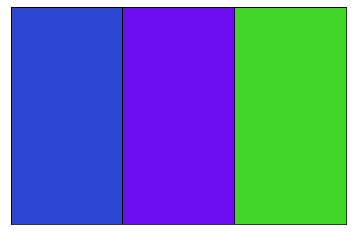

74
Good: Dark Gray	Bad: Gray


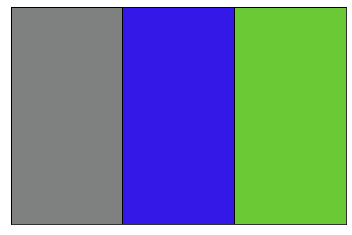

75
Good: neone green	Bad: green


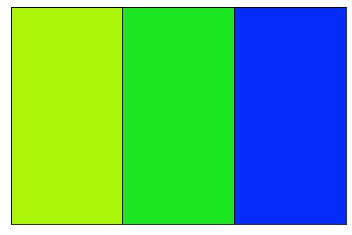

76
Good: light green	Bad: bright


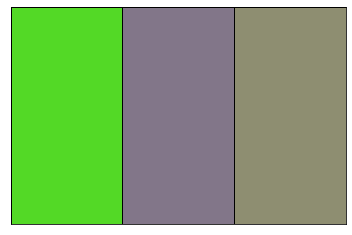

77
Good: mauve	Bad: dull


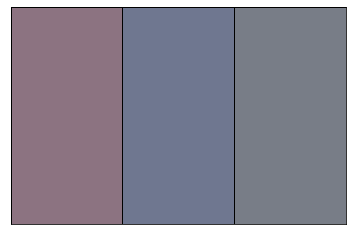

78
Good: purple	Bad: dark


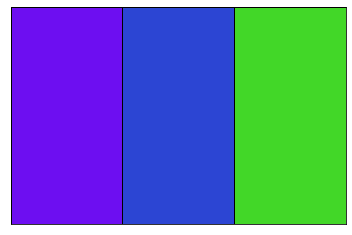

79
Good: dark blue	Bad: dark


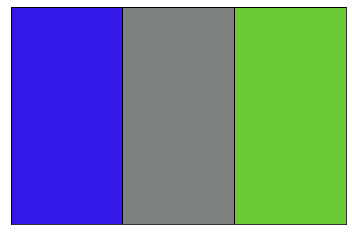

80
Good: Neon Yellow	Bad: Yellow


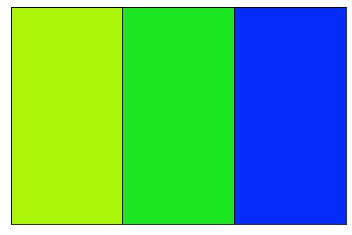

81
Good: Dark Green	Bad: Green


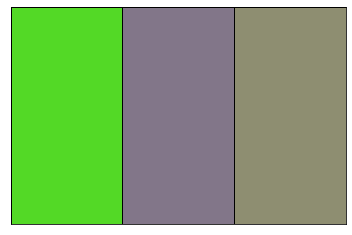

82
Good: Rose Gray	Bad: Granite


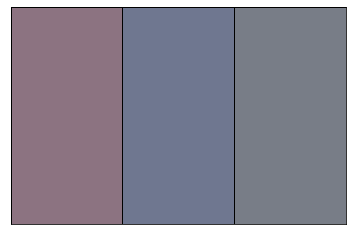

83
Good: Purple	Bad: Purple


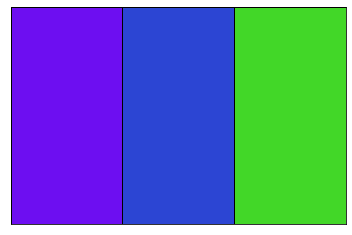

84
Good: Dark Blue	Bad: Blue


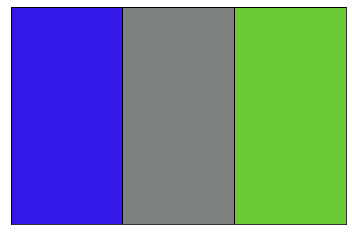

85
Good: Light Green	Bad: Green


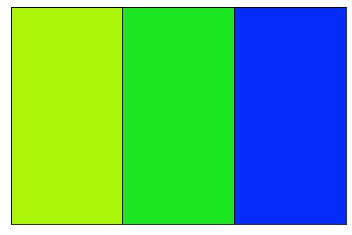

86
Good: Dark Green	Bad: Green


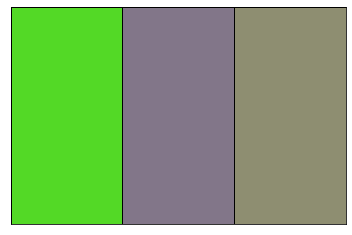

87
Good: Light Brown	Bad: Brown


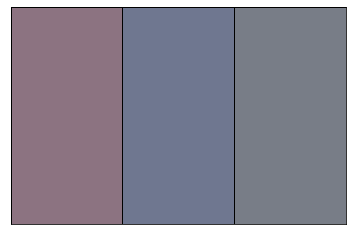

88
Good: Dark Voilet	Bad: Voilet


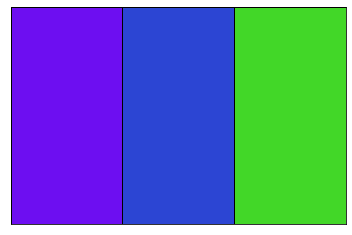

89
Good: Dark Blue	Bad: Blue


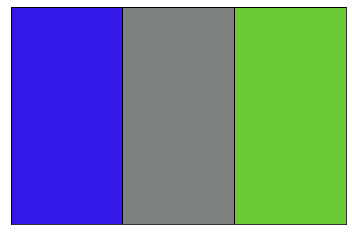

In [206]:
for i in range(60,90):
    print(i)
    dev_data.display_custom_game(pr_contexts[i], "Good: {}\tBad: {}".format(pr_good_responses[i], pr_bad_responses[i]))

90
Good: Forest green	Bad: forest colored


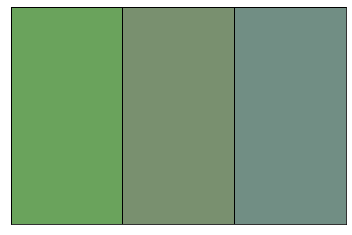

91
Good: greyish purple	Bad: dark water colored


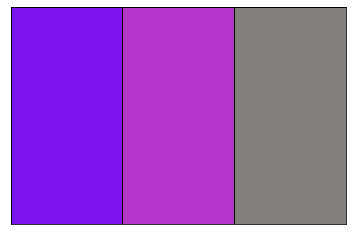

92
Good: purple	Bad: it's not blue


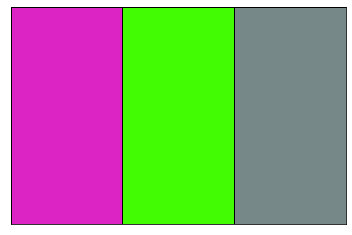

93
Good: purple	Bad: It's darker than pink


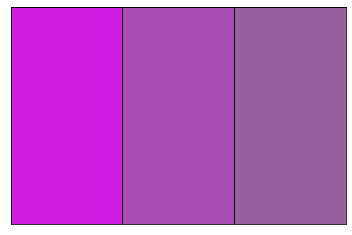

94
Good: green	Bad: it means go


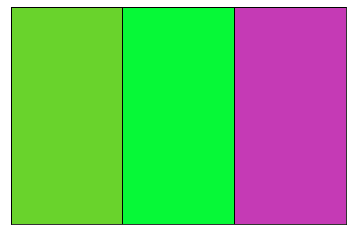

95
Good: Brightest green	Bad: Green


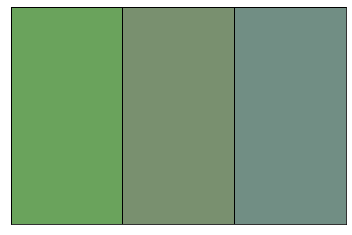

96
Good: Most purple	Bad: Dark color


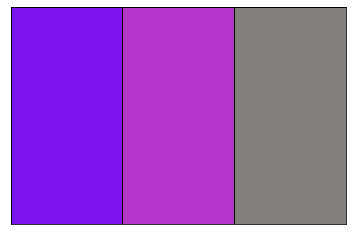

97
Good: Most red	Bad: Not brown or black


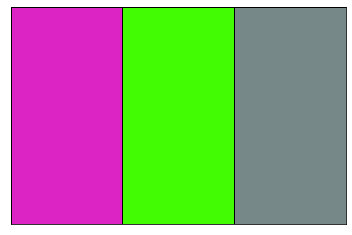

98
Good: Brightest color	Bad: Purple


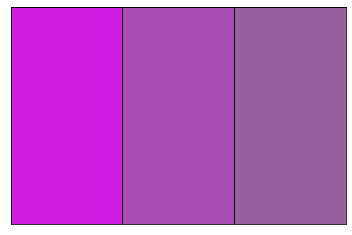

99
Good: Slightly darker green	Bad: Green


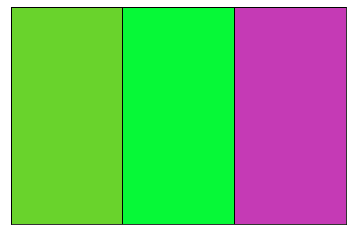

100
Good: Puke Green	Bad: Greenish


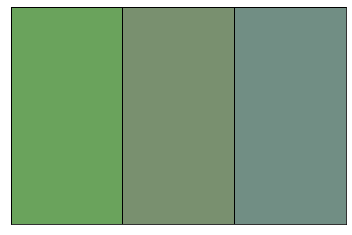

101
Good: Purplish Blue	Bad: Purple


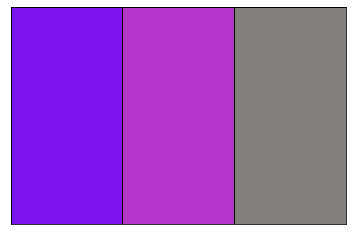

102
Good: Dark Pink	Bad: Hot


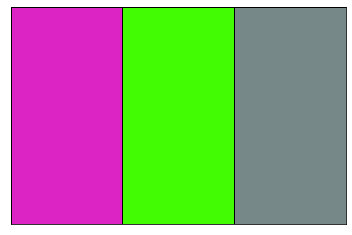

103
Good: Light Purple	Bad: Purple


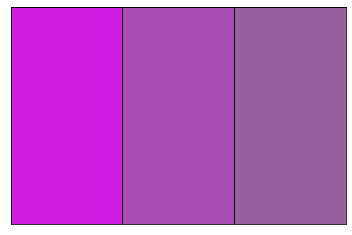

104
Good: Carpet green	Bad: Green


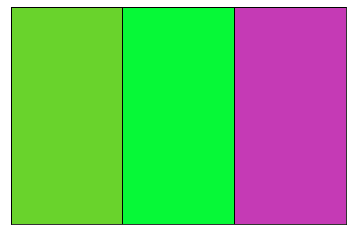

105
Good: not green	Bad: the pale color


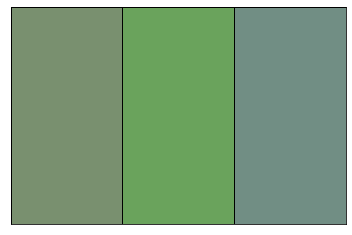

106
Good: purple	Bad: the light one


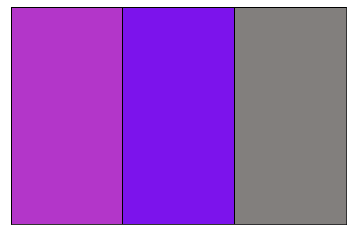

107
Good: neither	Bad: either


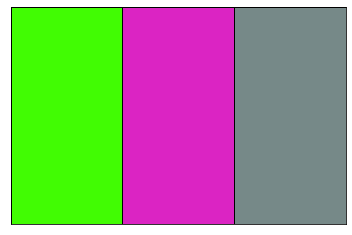

108
Good: light purple	Bad: purple


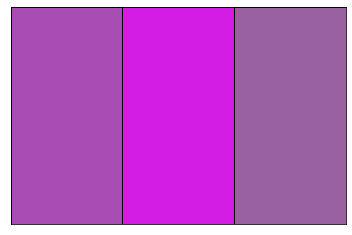

109
Good: green	Bad: the bright one


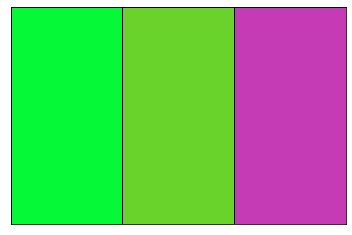

110
Good: dark grey	Bad: grey


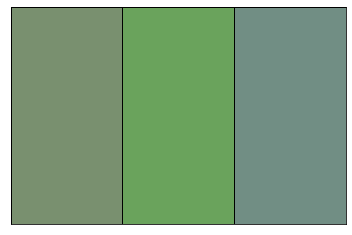

111
Good: light violet	Bad: violet


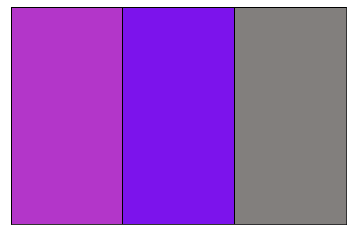

112
Good: light green	Bad: green


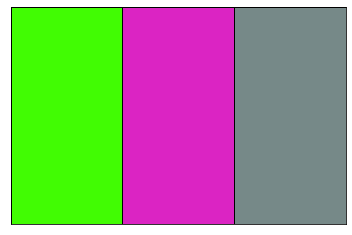

113
Good: light violet	Bad: violet


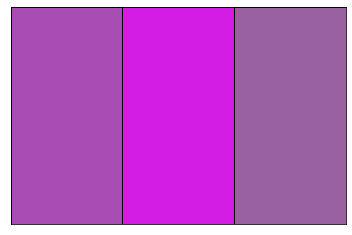

114
Good: light green	Bad: green


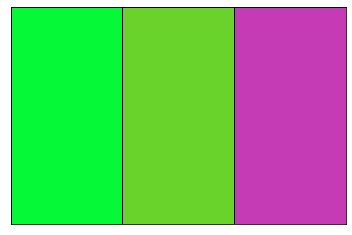

115
Good: not the light green or the blueish green.  the more military green.	Bad: green


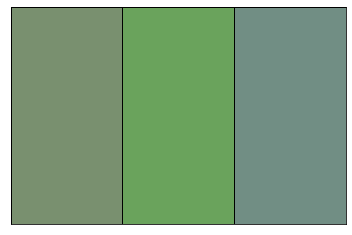

116
Good: pinkish purple	Bad: purple


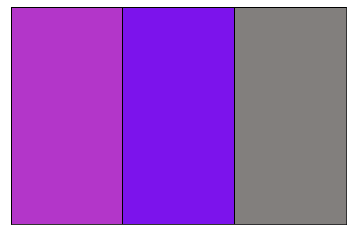

117
Good: bright green	Bad: the bright color


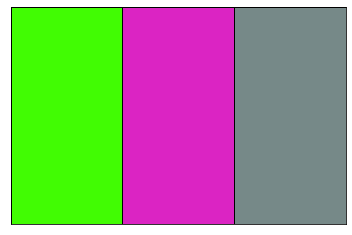

118
Good: not the lightest or darkest purple	Bad: purple


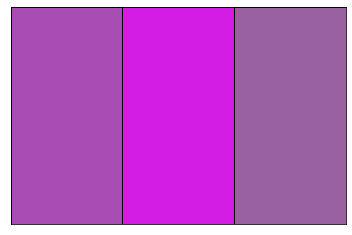

119
Good: brightest green	Bad: green


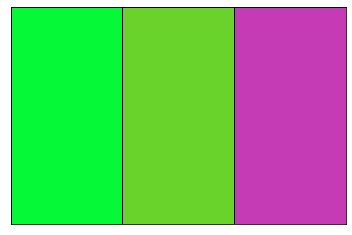

In [207]:
for i in range(90,120):
    print(i)
    dev_data.display_custom_game(pr_contexts[i], "Good: {}\tBad: {}".format(pr_good_responses[i], pr_bad_responses[i]))

120
Good: blue	Bad: cool color


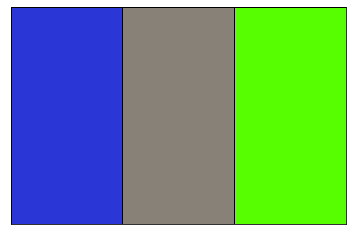

121
Good: brightest green	Bad: green


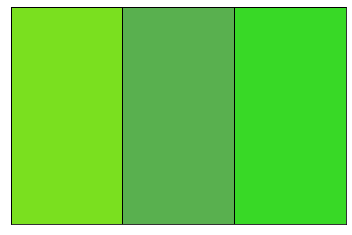

122
Good: magenta	Bad: sort of purple


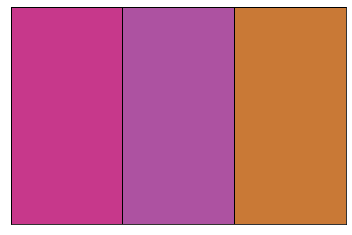

123
Good: green	Bad: cool color


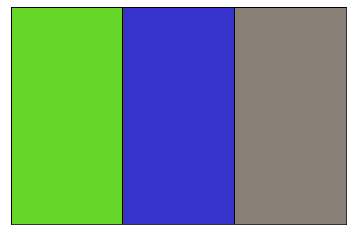

124
Good: bluest blue	Bad: blue


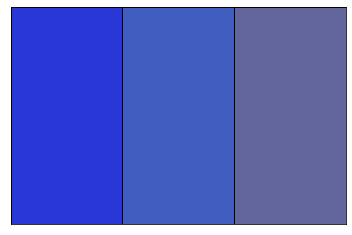

125
Good: Dark blue	Bad: Blue.


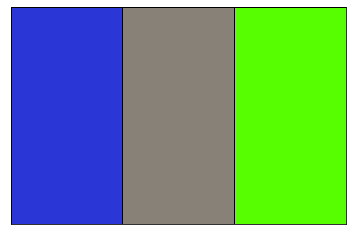

126
Good: Light green	Bad: Green.


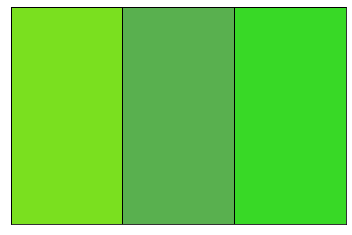

127
Good: A purplish pink.	Bad: Purple.


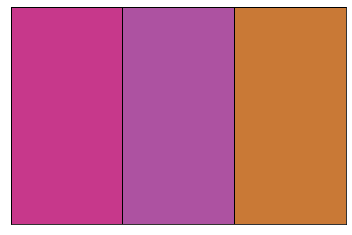

128
Good: Light green.	Bad: Green.


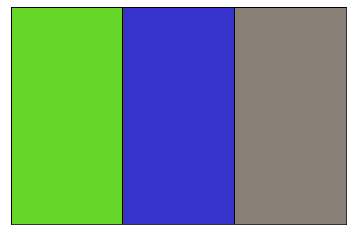

129
Good: Dark blue.	Bad: Blue.


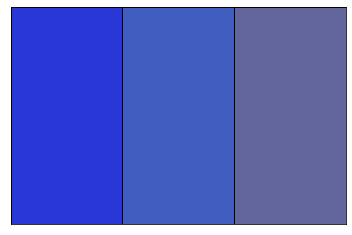

130
Good: blue	Bad: light green


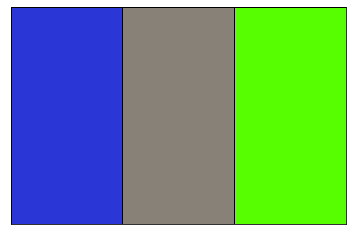

131
Good: light green	Bad: green


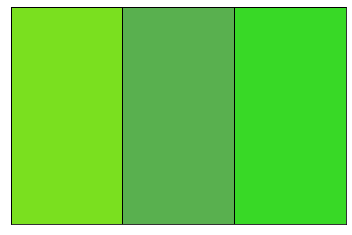

132
Good: rose	Bad: brown


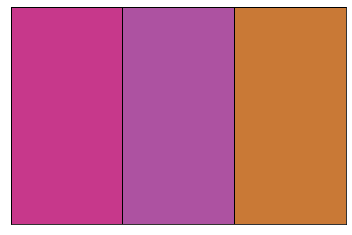

133
Good: light green	Bad: light black


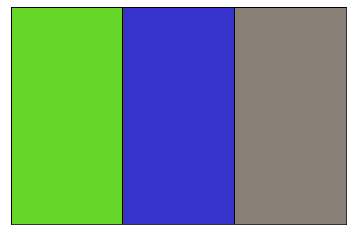

134
Good: blue	Bad: light blue


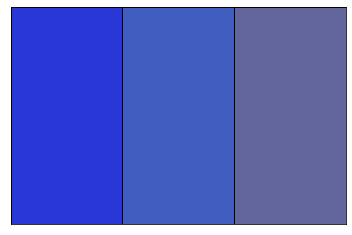

135
Good: grey	Bad: grey


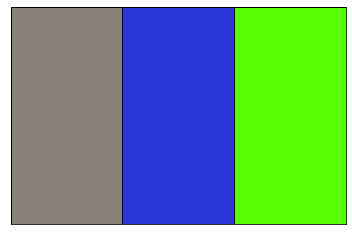

136
Good: green	Bad: green


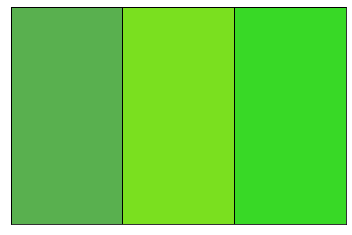

137
Good: purple	Bad: purble


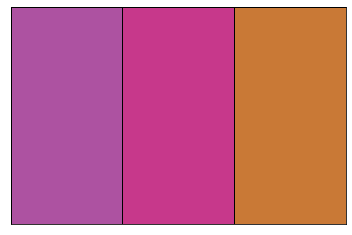

138
Good: blue	Bad: blue


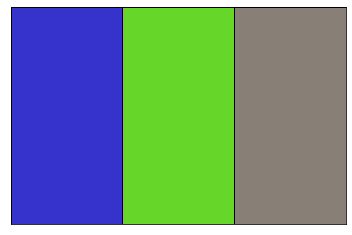

139
Good: blue	Bad: blue


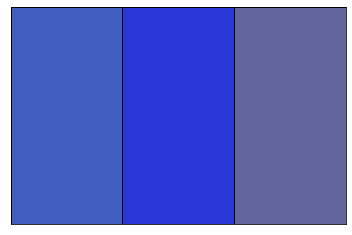

140
Good: light grey	Bad: grey


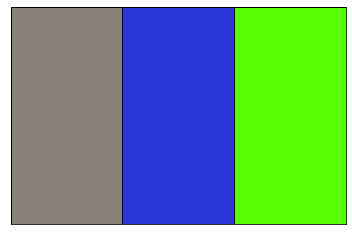

141
Good: dark green	Bad: dark green


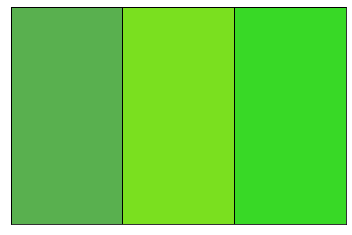

142
Good: dark purple	Bad: dark purple


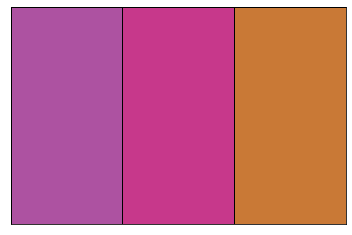

143
Good: dark blue	Bad: blue


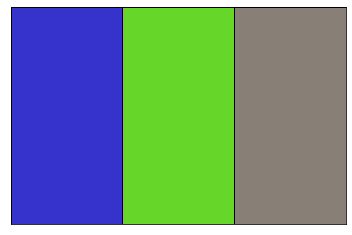

144
Good: blue	Bad: light blue


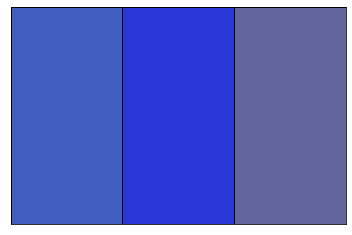

145
Good: Grey	Bad: dark


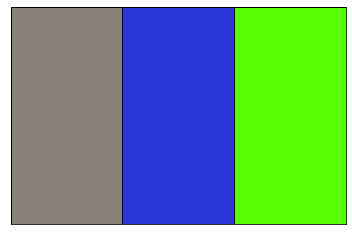

146
Good: forest green	Bad: green


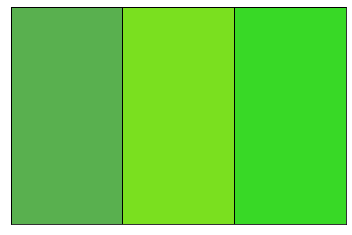

147
Good: purple	Bad: pink-ish purple


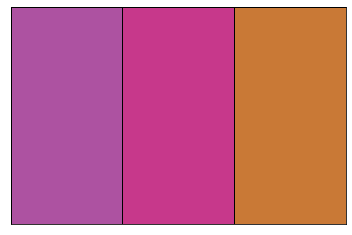

148
Good: deep blue	Bad: in a rainbow


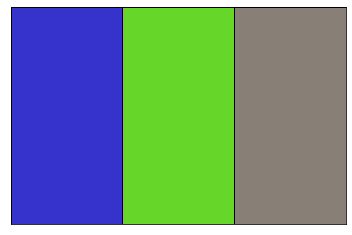

149
Good: dull blue	Bad: blue-ish


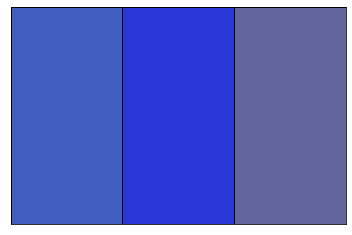

In [208]:
for i in range(120,150):
    print(i)
    dev_data.display_custom_game(pr_contexts[i], "Good: {}\tBad: {}".format(pr_good_responses[i], pr_bad_responses[i]))

150
Good: Light Green	Bad: Green


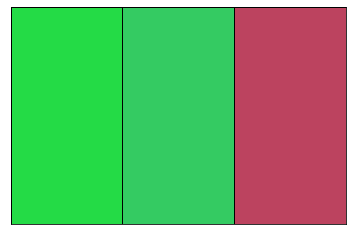

151
Good: Dark Blue	Bad: Blue


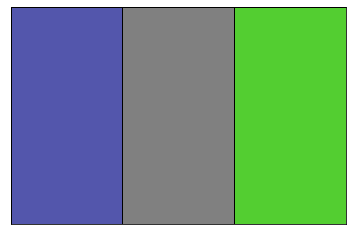

152
Good: Light Green	Bad: Green


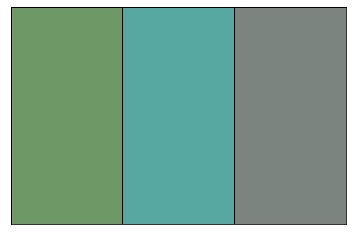

153
Good: Dark Green	Bad: Green


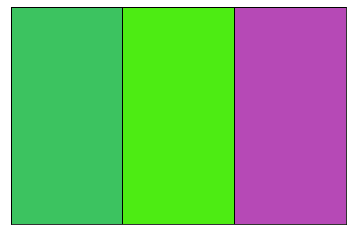

154
Good: Red	Bad: Red


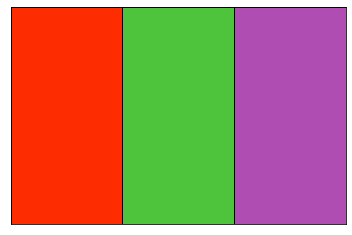

155
Good: light green	Bad: green


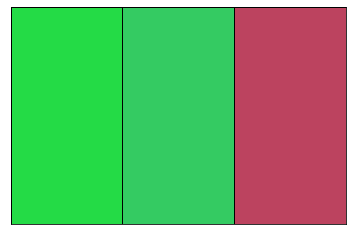

156
Good: navy blue	Bad: blue


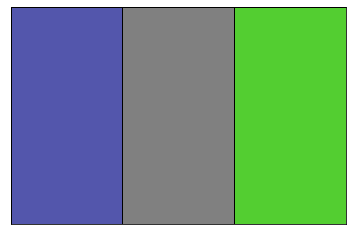

157
Good: Sea green	Bad: green


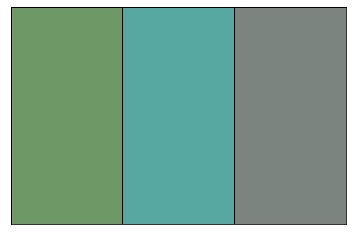

158
Good: jade green	Bad: green


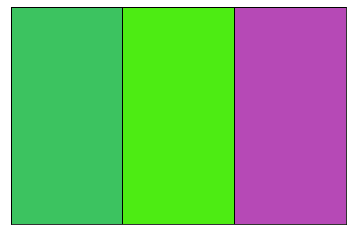

159
Good: scarlet red	Bad: red


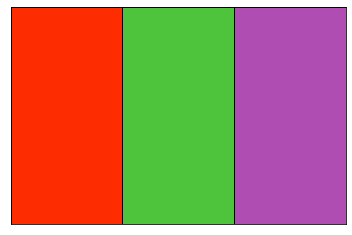

160
Good: light green	Bad: light green ambigoous both greenand red


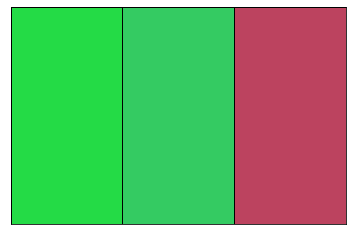

161
Good: light blue	Bad: light blue ambigious greay and green


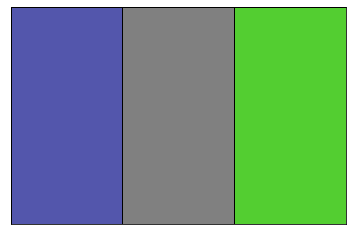

162
Good: emblred green	Bad: light green ambogious green and ligh green


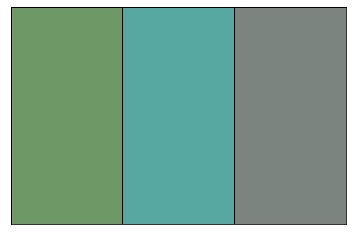

163
Good: light green	Bad: green ambigius light green and pink


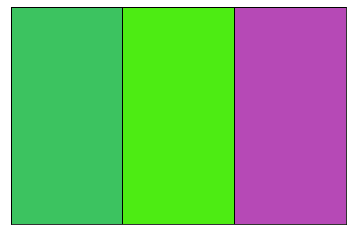

164
Good: orange	Bad: orange ambigious green and pink


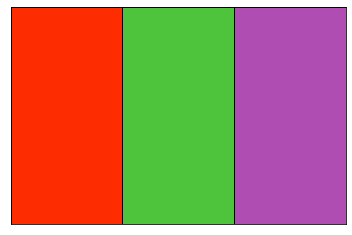

165
Good: Light Green	Bad: Green  (This is ambiguous because it describes the both the light green target and the dark Green color.)


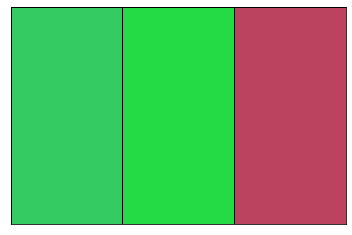

166
Good: Light Gray	Bad: Gray  (This is ambiguous because it describes the both the  blue target and the dark blue color.)


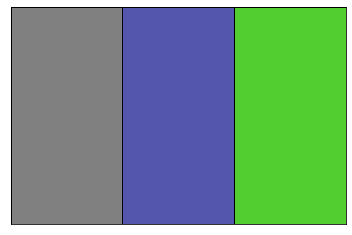

167
Good: Light blue	Bad: Blue (This is ambiguous because it describes the both the light gray target and the dark Gray color.)


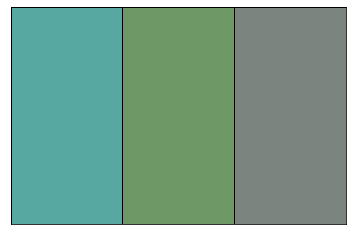

168
Good: Light Green	Bad: Green (This is ambiguous because it describes the both the light Green target and the dark Green color.)


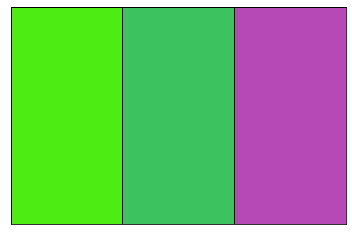

169
Good: Dark Green	Bad: Dark Green  (This is ambiguous because it describes the both the light Red target and the dark Red color.)


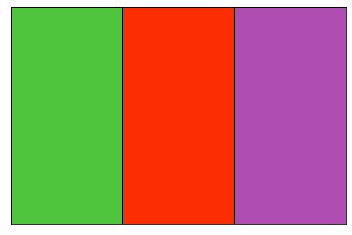

170
Good: light navy green	Bad: green


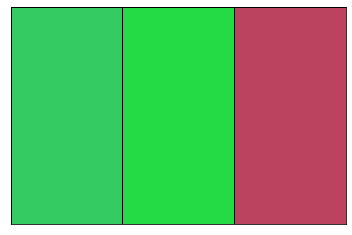

171
Good: grey	Bad: purple


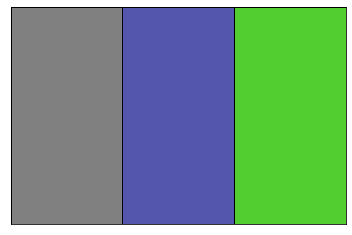

172
Good: blue gray	Bad: grayish


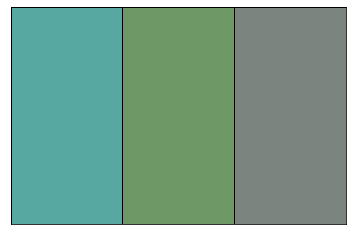

173
Good: lime green	Bad: greenish


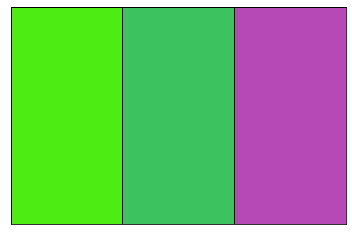

174
Good: light army green	Bad: ugly navy


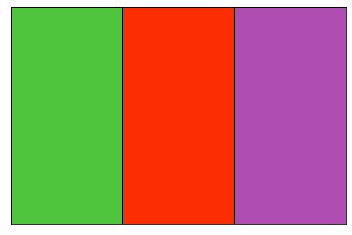

175
Good: green	Bad: marine


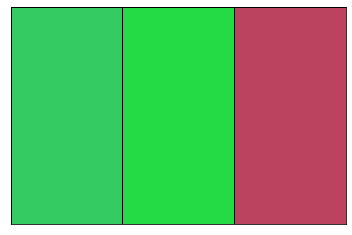

176
Good: light black	Bad: light green


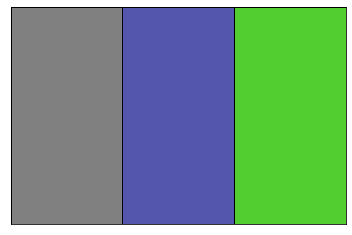

177
Good: marble green	Bad: light black


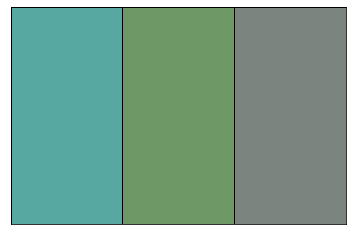

178
Good: green	Bad: ping


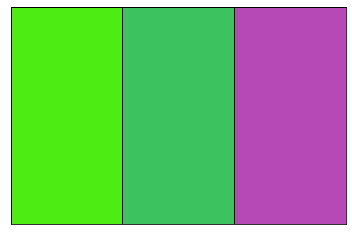

179
Good: light green	Bad: ping


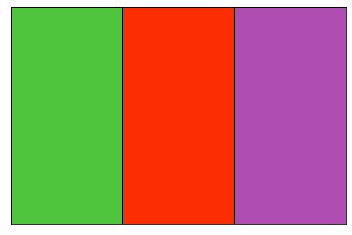

In [209]:
for i in range(150,180):
    print(i)
    dev_data.display_custom_game(pr_contexts[i], "Good: {}\tBad: {}".format(pr_good_responses[i], pr_bad_responses[i]))

180
Good: olive green	Bad: green


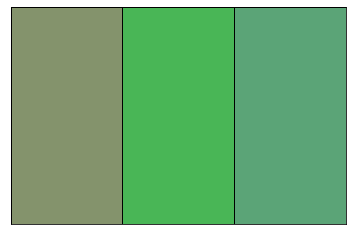

181
Good: sea green	Bad: a shade of green


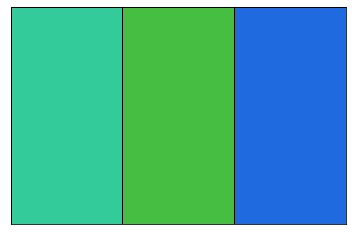

182
Good: bright pink	Bad: a cool color


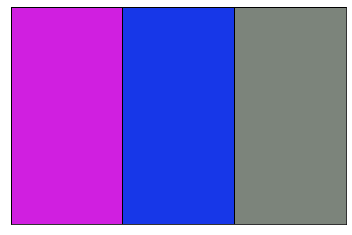

183
Good: a brownish color	Bad: a neutral color


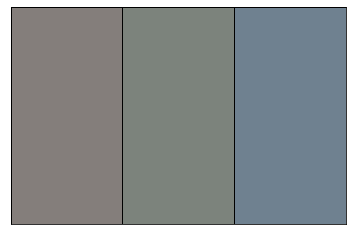

184
Good: a boring color	Bad: a dull color


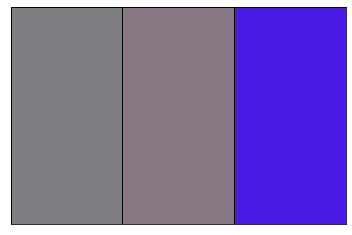

185
Good: dark green	Bad: green


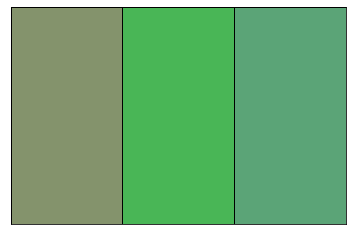

186
Good: medium green	Bad: green


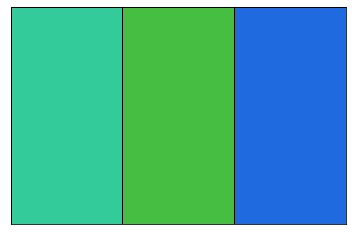

187
Good: pink	Bad: bright


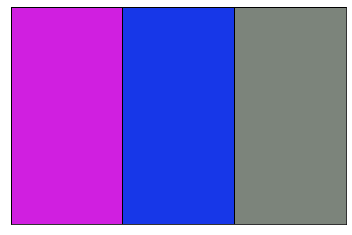

188
Good: brown grey	Bad: grey


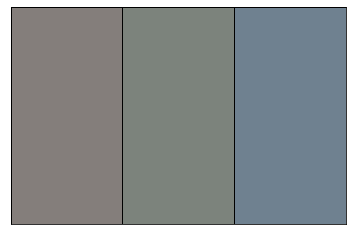

189
Good: grey	Bad: grey


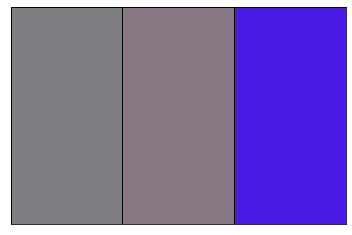

190
Good: Tan-ish green	Bad: Green


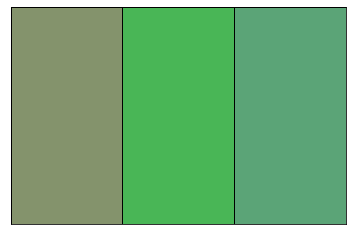

191
Good: Light green	Bad: Green


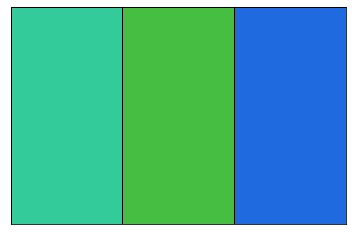

192
Good: Bright, light purple	Bad: Purple


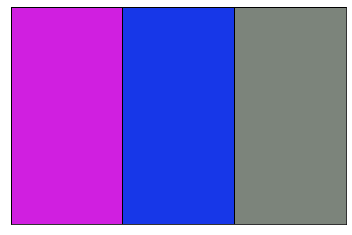

193
Good: Warm gray	Bad: Gray


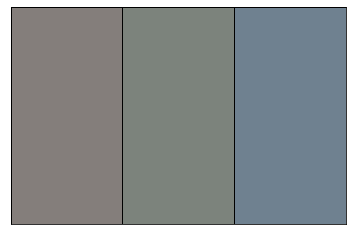

194
Good: Light gray	Bad: Gray


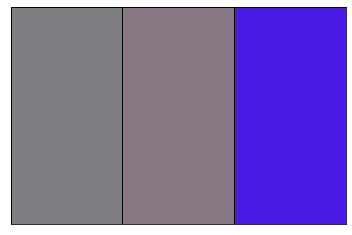

195
Good: light green	Bad: green


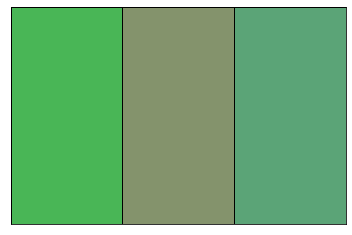

196
Good: green	Bad: bule


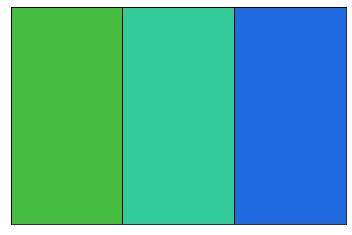

197
Good: bule	Bad: black


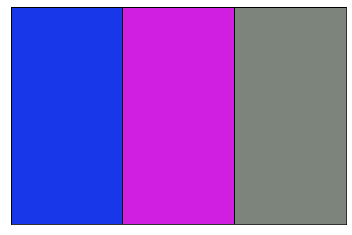

198
Good: light black	Bad: light bule


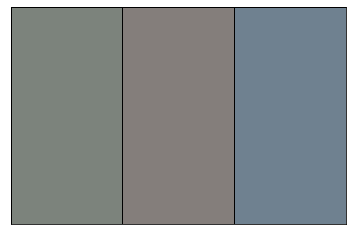

199
Good: light voitet	Bad: bule


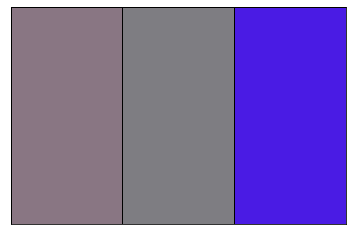

200
Good: Dark Green	Bad: Green


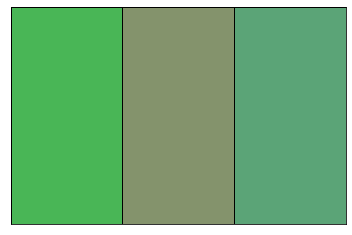

201
Good: Dark Green	Bad: Green


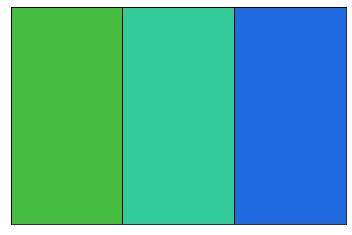

202
Good: Dark Blue	Bad: Blue


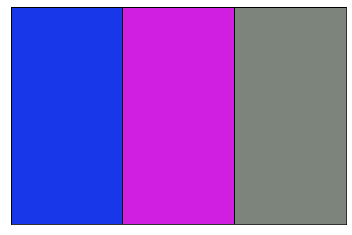

203
Good: gray	Bad: Grey


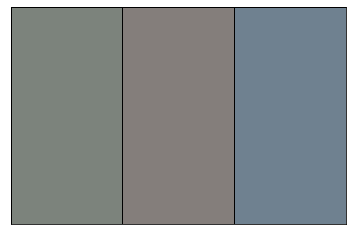

204
Good: light dyed pink	Bad: Pink


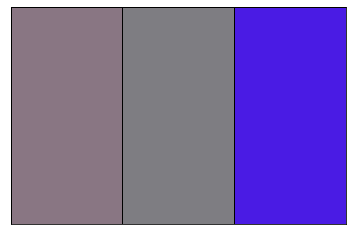

205
Good: Moss Green	Bad: green


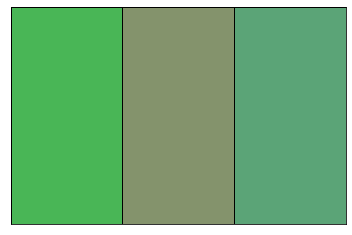

206
Good: Leaf green	Bad: cool


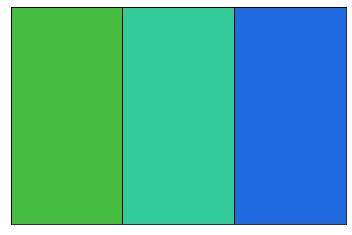

207
Good: Royal Blue	Bad: blue


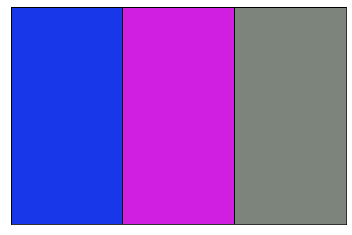

208
Good: Wet Cement	Bad: grey


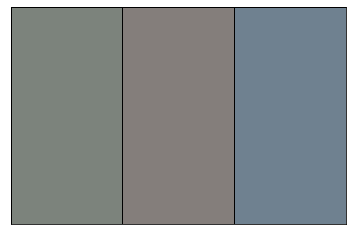

209
Good: warm grey	Bad: pink


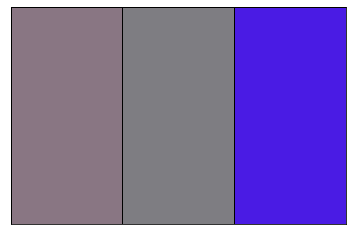

In [211]:
for i in range(180,210):
    print(i)
    dev_data.display_custom_game(pr_contexts[i], "Good: {}\tBad: {}".format(pr_good_responses[i], pr_bad_responses[i]))

210
Good: Reddish brown	Bad: Medium


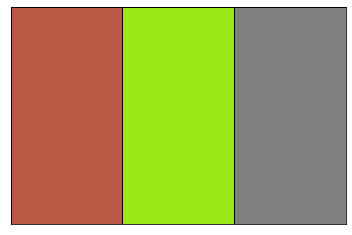

211
Good: Flat gray	Bad: Gray


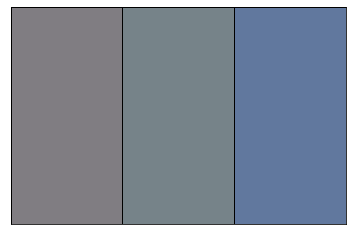

212
Good: Blue gray	Bad: Gray


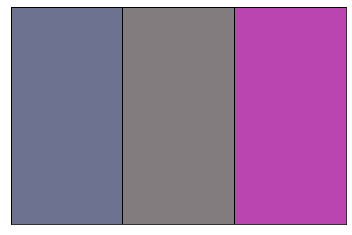

213
Good: Dark blue	Bad: Dark


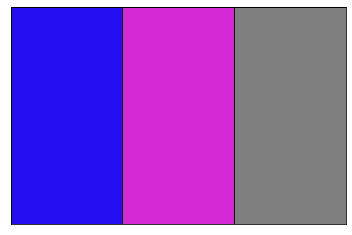

214
Good: Light green	Bad: Green


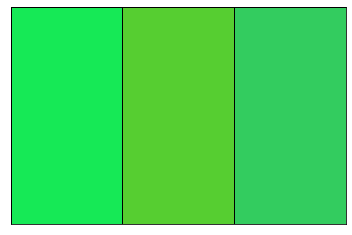

215
Good: Orange	Bad: Dark


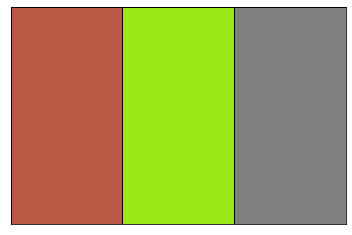

216
Good: Dark Gray	Bad: Gray


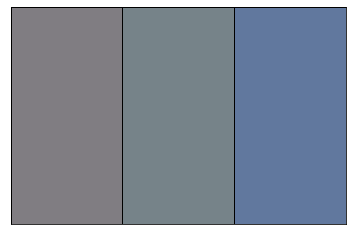

217
Good: Purple Gray	Bad: Purple


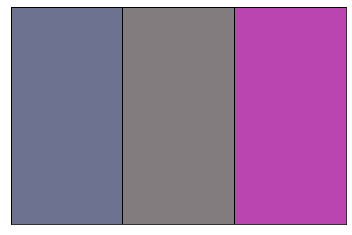

218
Good: Blue	Bad: Violet


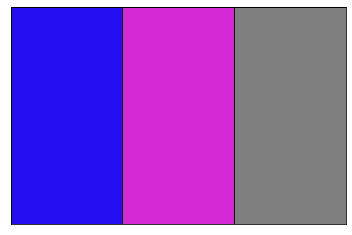

219
Good: Neon Green	Bad: Green


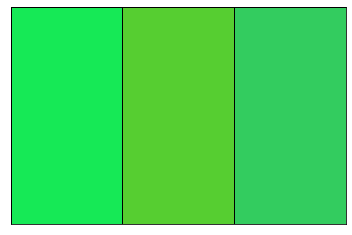

220
Good: Tan	Bad: brown


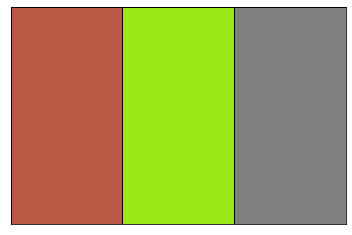

221
Good: Medium gray	Bad: gray


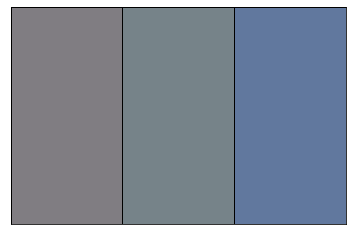

222
Good: Purlpe-ish gray	Bad: gray


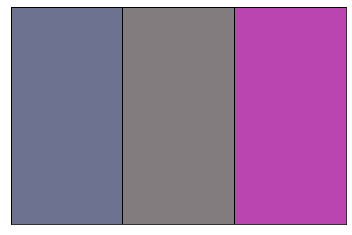

223
Good: electric blue	Bad: blue


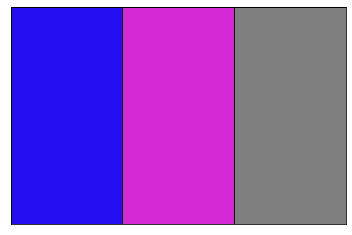

224
Good: bright green	Bad: green


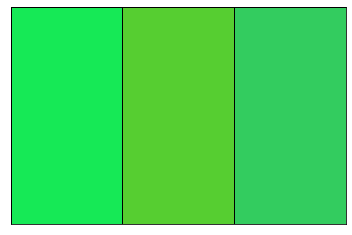

225
Good: Light green	Bad: green


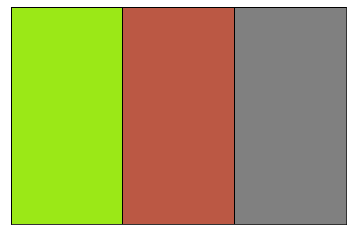

226
Good: Medium gray	Bad: gray


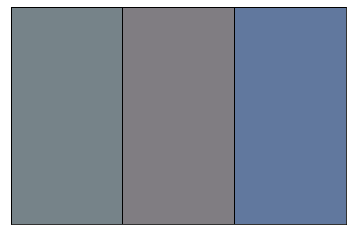

227
Good: medium gray with a hint of brown	Bad: gray


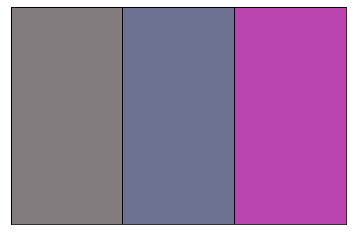

228
Good: Purple pink	Bad: purple


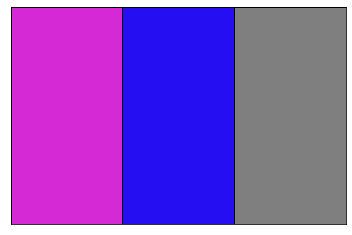

229
Good: pea green	Bad: green


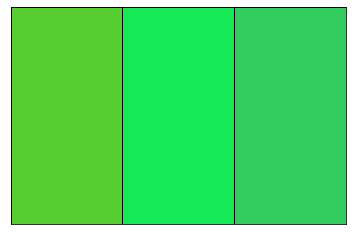

230
Good: Lime green	Bad: Tree


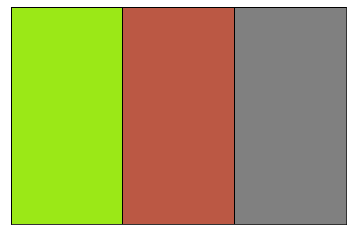

231
Good: Medium-light grey	Bad: Grey


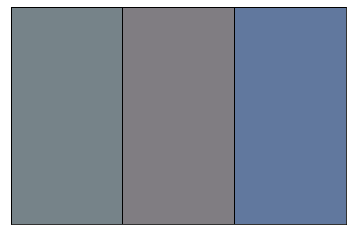

232
Good: Ash	Bad: Brownish


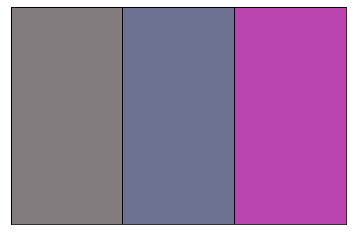

233
Good: Pink	Bad: Purplish


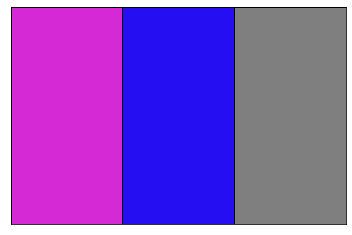

234
Good: Medium green	Bad: Green


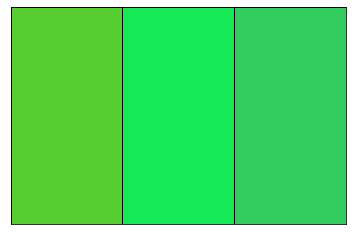

235
Good: Light green.	Bad: Green


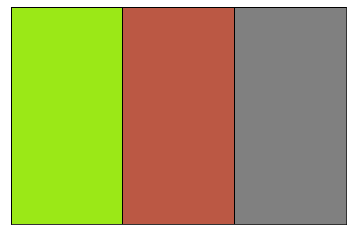

236
Good: Charcoal grey	Bad: Grey


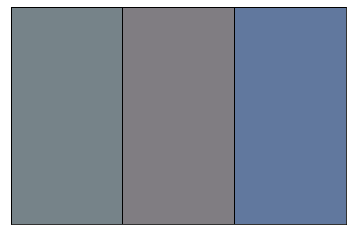

237
Good: Light brown	Bad: Brown


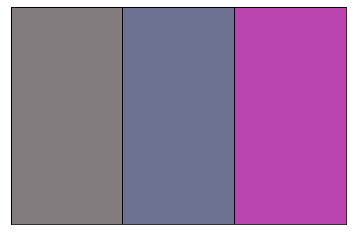

238
Good: Neon pink	Bad: Pink


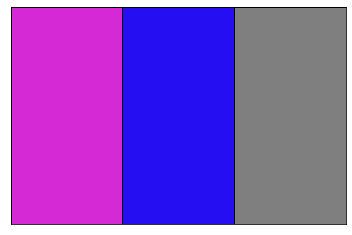

239
Good: Bright green.	Bad: Green


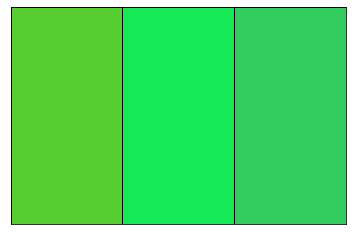

In [212]:
for i in range(210,240):
    print(i)
    dev_data.display_custom_game(pr_contexts[i], "Good: {}\tBad: {}".format(pr_good_responses[i], pr_bad_responses[i]))

240
Good: Pink	Bad: Magenta


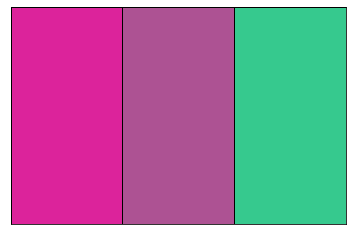

241
Good: Light Green	Bad: Green


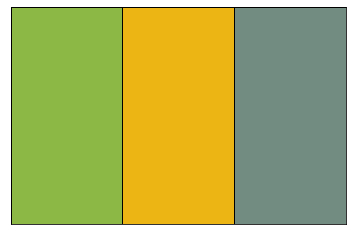

242
Good: Dark purple	Bad: Dark


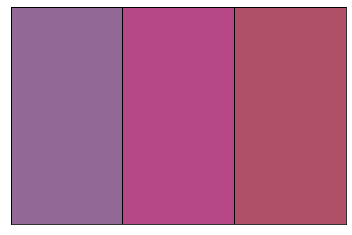

243
Good: yellow-green	Bad: Green


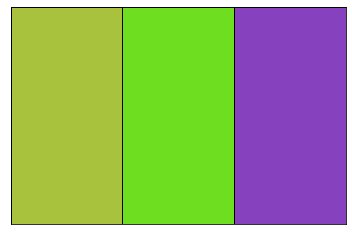

244
Good: Red	Bad: Bright


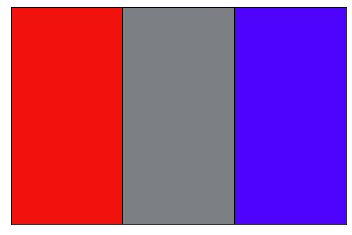

245
Good: Neon pink.	Bad: Fuschia


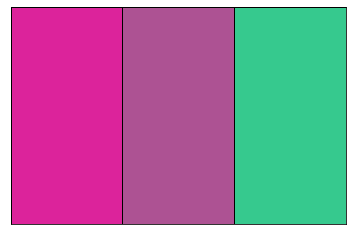

246
Good: Standard Green	Bad: Green


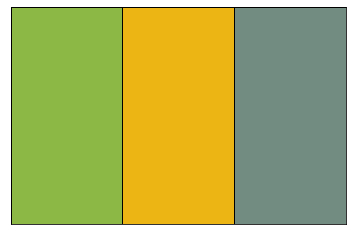

247
Good: Light purple	Bad: Purple


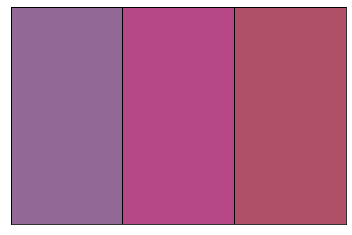

248
Good: Yellowish green	Bad: Green


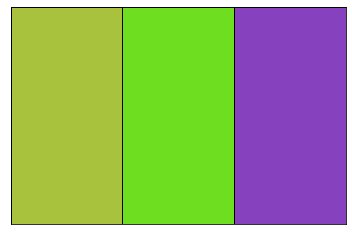

249
Good: Candy red	Bad: Red


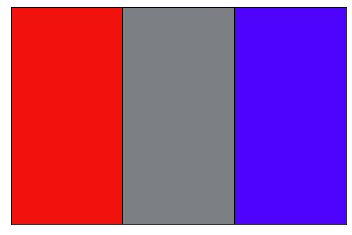

250
Good: hot pink	Bad: pink


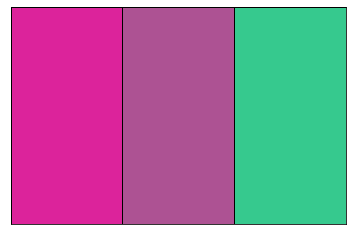

251
Good: ugly green	Bad: green


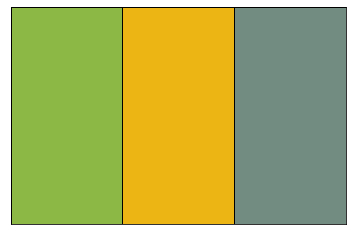

252
Good: dark purple	Bad: purple


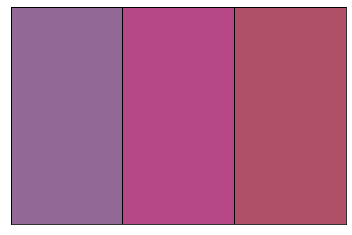

253
Good: caca green	Bad: green


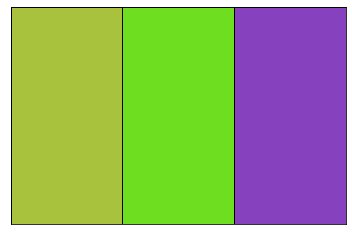

254
Good: red	Bad: solid


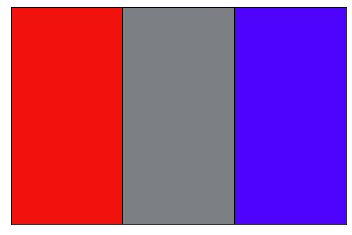

255
Good: light purpl	Bad: purple


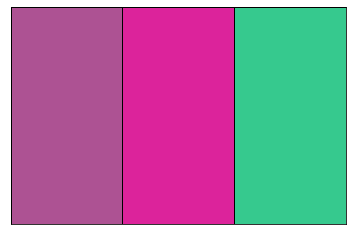

256
Good: light orange	Bad: orange


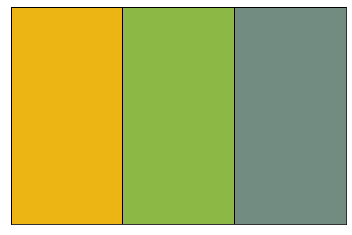

257
Good: purple	Bad: purple


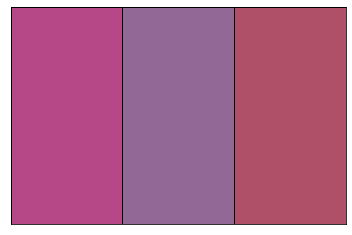

258
Good: light green	Bad: green


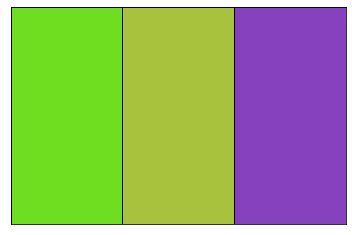

259
Good: grey	Bad: gray


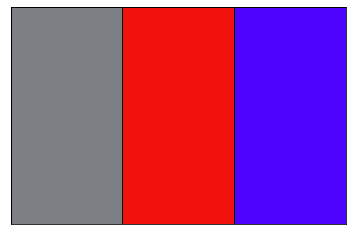

260
Good: dull purple	Bad: purple


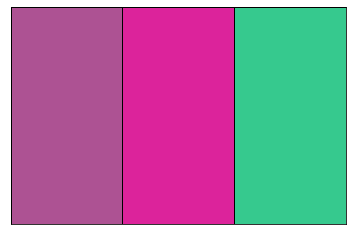

261
Good: mustard	Bad: yellow


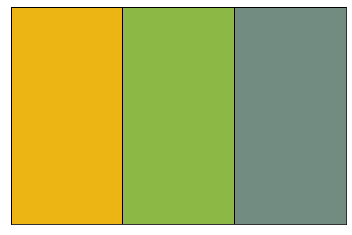

262
Good: dull purple	Bad: purple


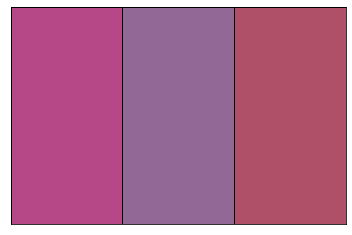

263
Good: lime green	Bad: green


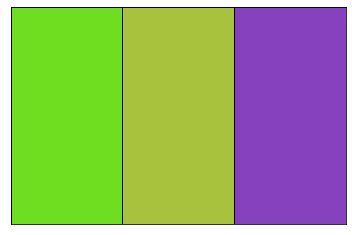

264
Good: dark grey	Bad: grey


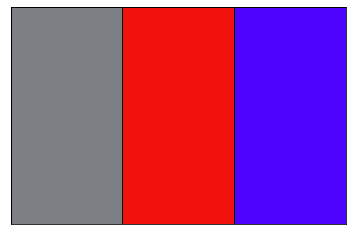

265
Good: purply not as pink magenta	Bad: pink


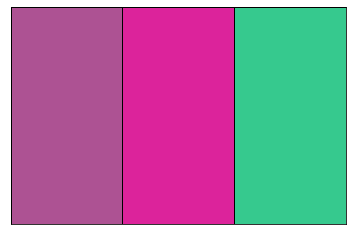

266
Good: yellow ochre	Bad: not very bright, rather dull


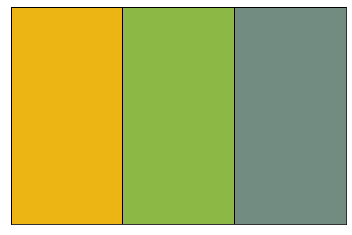

267
Good: magenta, not as red or purple as the others	Bad: pinkish reddish


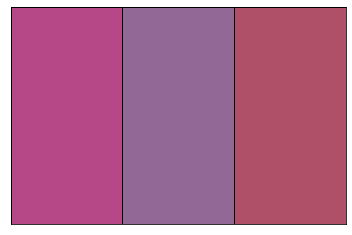

268
Good: bright bright green	Bad: light green


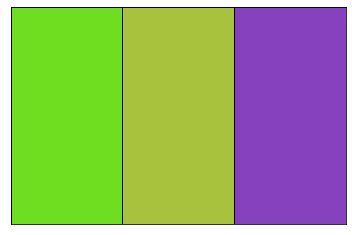

269
Good: gray	Bad: medium, not light or dark


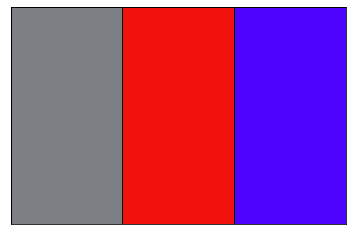

In [213]:
for i in range(240,270):
    print(i)
    dev_data.display_custom_game(pr_contexts[i], "Good: {}\tBad: {}".format(pr_good_responses[i], pr_bad_responses[i]))

270
Good: light green	Bad: light green


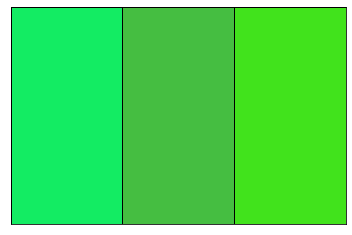

271
Good: dull purple	Bad: dark purple


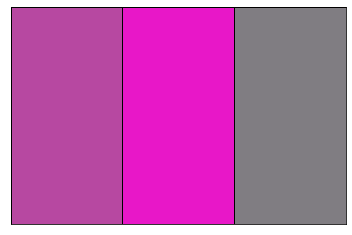

272
Good: bright green	Bad: neon green


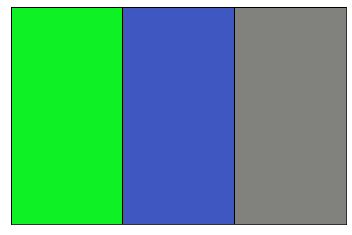

273
Good: soft green	Bad: soft green


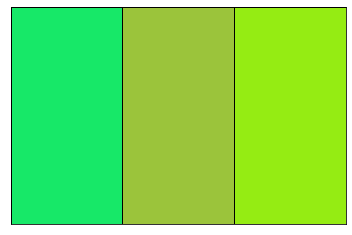

274
Good: olive green	Bad: olive green


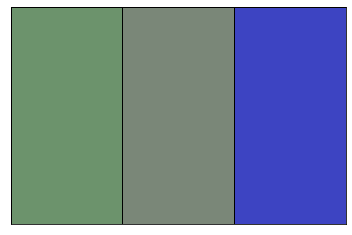

275
Good: Lime green	Bad: Green


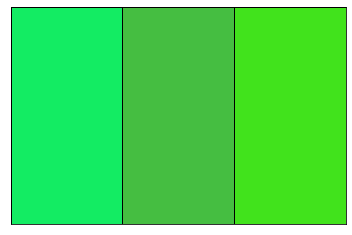

276
Good: Dull purple	Bad: greyd purple


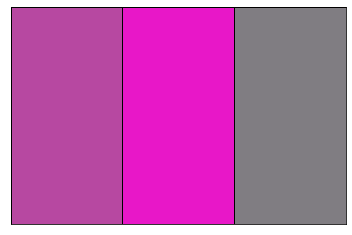

277
Good: green	Bad: muted green


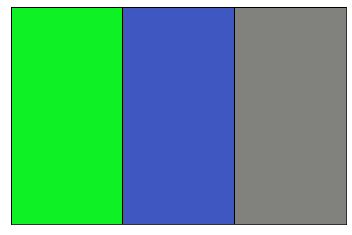

278
Good: Lime Green	Bad: light green


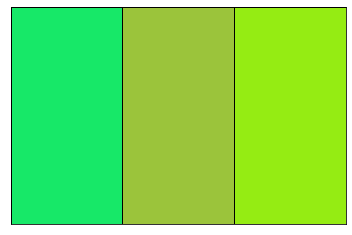

279
Good: Grey Green	Bad: grey


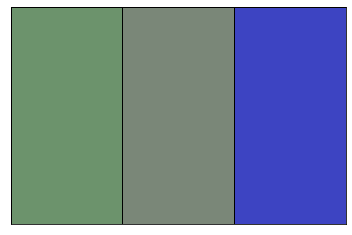

280
Good: light green	Bad: green


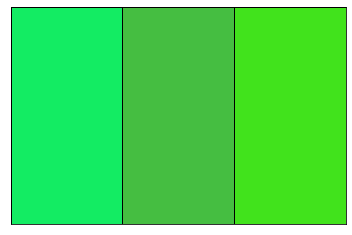

281
Good: deep purple	Bad: purple


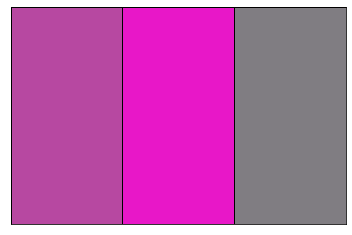

282
Good: green	Bad: green


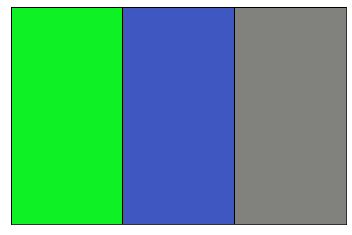

283
Good: pure green	Bad: green


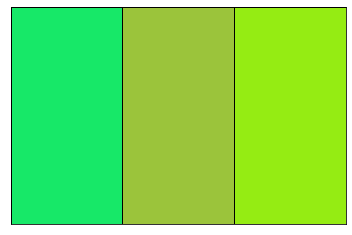

284
Good: grey green	Bad: green


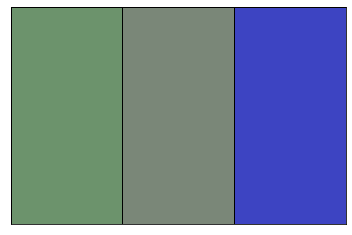

285
Good: dark green	Bad: green


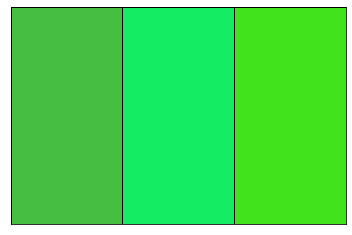

286
Good: magenta	Bad: purple


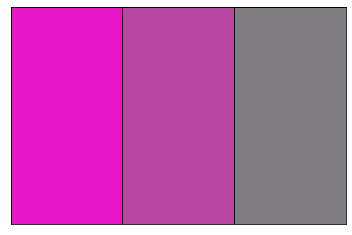

287
Good: dark blue	Bad: blue


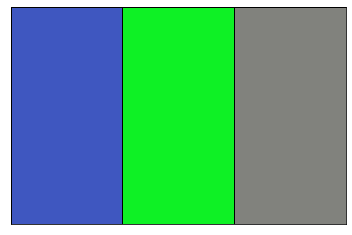

288
Good: brownish green	Bad: green


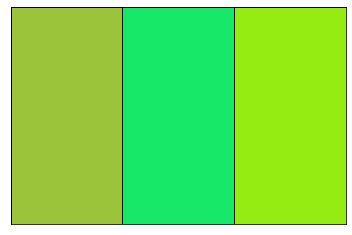

289
Good: grey	Bad: grey-green


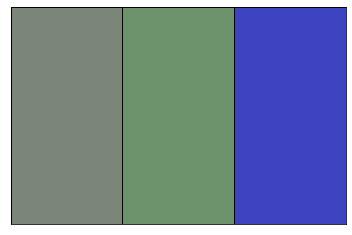

290
Good: green	Bad: green


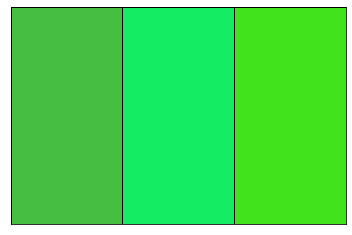

291
Good: bright purple	Bad: purple


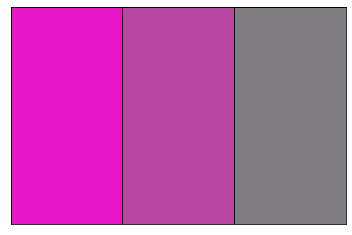

292
Good: blue	Bad: gray


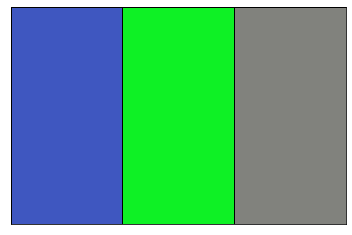

293
Good: olive green	Bad: green


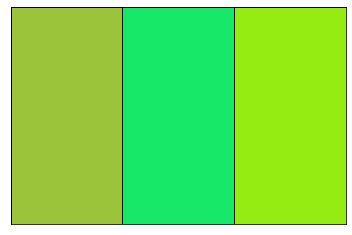

294
Good: gray	Bad: gray


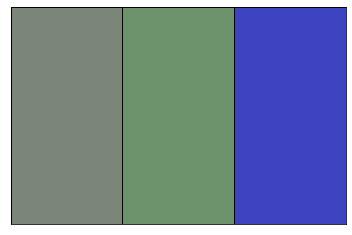

295
Good: Medium green	Bad: Green


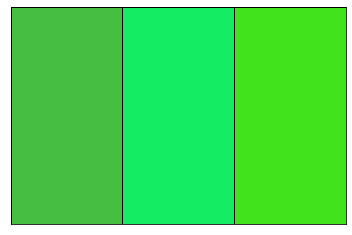

296
Good: Neon pink	Bad: Pink


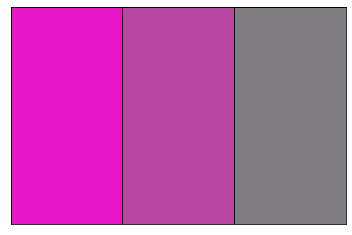

297
Good: Dark blue	Bad: Neutral


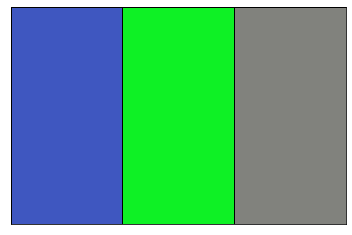

298
Good: Chartreuse	Bad: Green


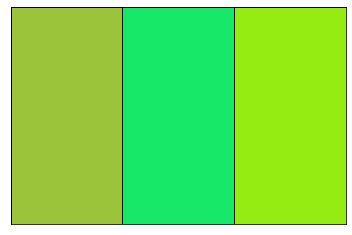

299
Good: Gray	Bad: Gray with green


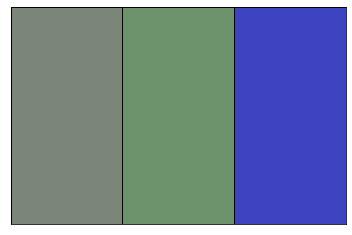

In [214]:
for i in range(270,300):
    print(i)
    dev_data.display_custom_game(pr_contexts[i], "Good: {}\tBad: {}".format(pr_good_responses[i], pr_bad_responses[i]))

In [ ]:
# person starting at idx 140 didn't really follow the "bad" task, but the "good" descriptions are fine
# person starting at idx 140 messed up the two tasks?
# 160 did some weird justification thing
# 165 also copied and pasted my justification example
# 175 was misleading

# overall, these are decent! Some great, some bad. It definitely seems like the far conditions are very
# difficult (and unnatural) to come up with ambiguous wordings.

In [482]:
pilot_results_3 = pd.read_csv("../data/mturk/pilot_3_results.csv")
# pr_contexts_3, pr_good_responses_3, pr_bad_responses_3 = get_results(pilot_results_3)

In [447]:
len(pilot_results_3)

20

In [577]:
pilot_results_3_reordered = pilot_results_3.reindex([2, 8, 9, 7, 12, 19, 11, 3, 0, 10, 6, 13, 18, 5, 1, 4, 17, 14, 16, 15])

In [579]:
pilot_results_3_reordered = pilot_results_3_reordered.reset_index(drop=True)

In [484]:
# it seems that mechanical turk messed up the order? The other two came in in the same order, but this
# version of the pilot did not.

# Let's reorder it
pilot_3_reorder_indices = np.array([2, 8, 9, 7, 12, 19, 11, 3, 0, 10, 6, 13, 18, 5, 1, 4, 17, 14, 16, 15])*5

In [485]:
pilot_3_reorder_indices = pilot_3_reorder_indices.repeat(5) + np.tile(np.arange(5), 20)

In [486]:
pilot_3_reorder_indices

array([10, 11, 12, 13, 14, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 35, 36,
       37, 38, 39, 60, 61, 62, 63, 64, 95, 96, 97, 98, 99, 55, 56, 57, 58,
       59, 15, 16, 17, 18, 19,  0,  1,  2,  3,  4, 50, 51, 52, 53, 54, 30,
       31, 32, 33, 34, 65, 66, 67, 68, 69, 90, 91, 92, 93, 94, 25, 26, 27,
       28, 29,  5,  6,  7,  8,  9, 20, 21, 22, 23, 24, 85, 86, 87, 88, 89,
       70, 71, 72, 73, 74, 80, 81, 82, 83, 84, 75, 76, 77, 78, 79])

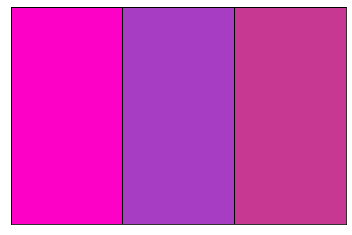

In [487]:
dev_data.display_custom_game((np.array(pr_contexts_3)[pilot_3_reorder_indices])[0], "")

In [488]:
pr_contexts_3 = np.array(pr_contexts_3)[pilot_3_reorder_indices].tolist()
pr_good_responses_3 = np.array(pr_good_responses_3)[pilot_3_reorder_indices].tolist()
pr_bad_responses_3 = np.array(pr_bad_responses_3)[pilot_3_reorder_indices].tolist()

0.0) Good: MEDIUM VIOLET RED	Bad: VIOLET


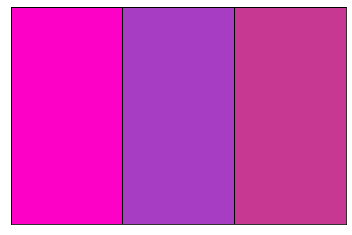

1.0) Good: violate	Bad: violate


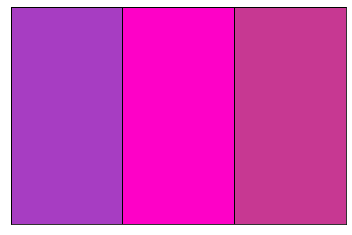

2.0) Good: light brown	Bad: pale


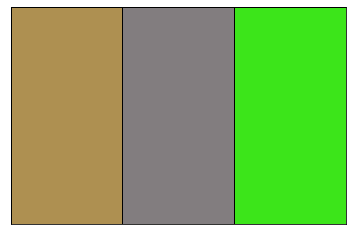

3.0) Good: light brown	Bad: brown


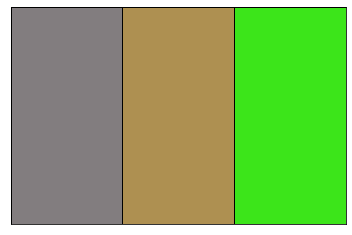

4.0) Good: dark green	Bad: green


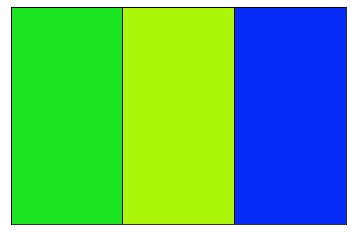

5.0) Good: Lemon green	Bad: Green


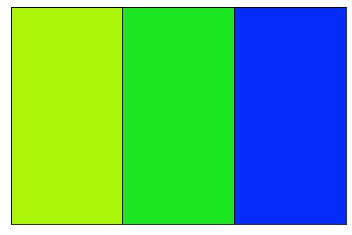

6.0) Good: Bright green	Bad: Green


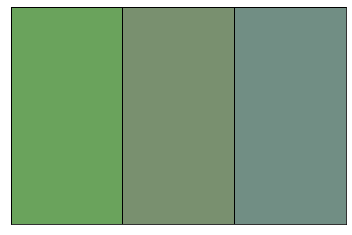

7.0) Good: SILVER GREEN	Bad: LIGHT GREY


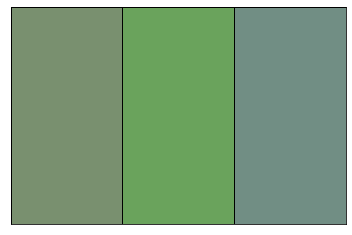

8.0) Good: dark blue	Bad: dark


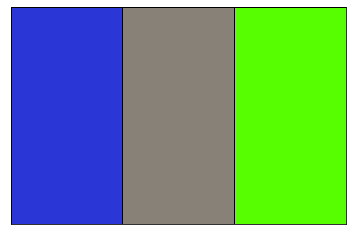

9.0) Good: LIGHT BLACK	Bad: BLACK


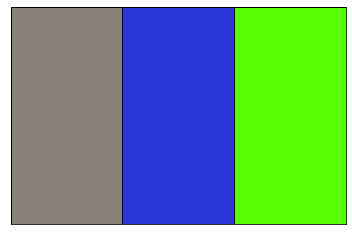

10.0) Good: bright green	Bad: green


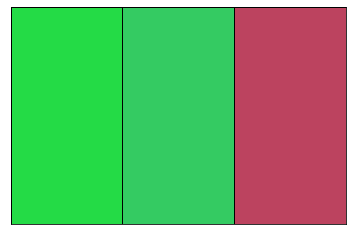

11.0) Good: Dark Green	Bad: Mulberry violet


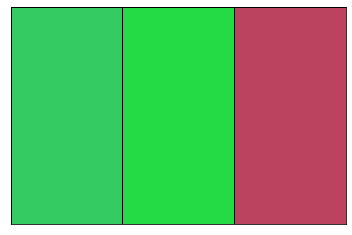

12.0) Good: gray green	Bad: Green


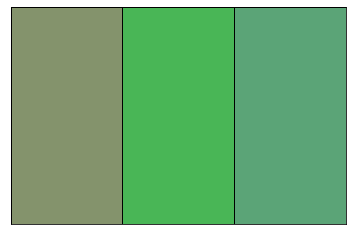

13.0) Good: Bright green	Bad: Green


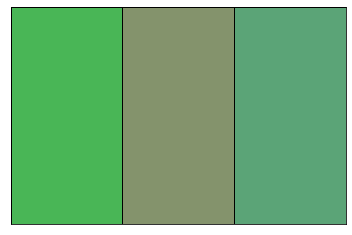

14.0) Good: Terra cotta	Bad: Warm


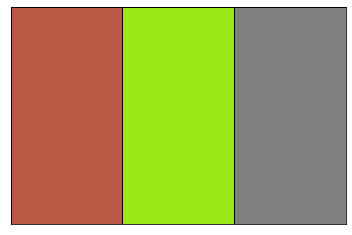

15.0) Good: Light Green	Bad: gray


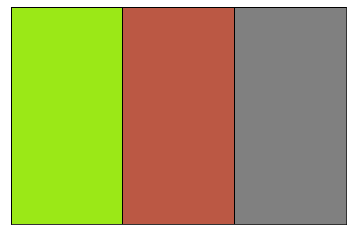

16.0) Good: pink	Bad: pink


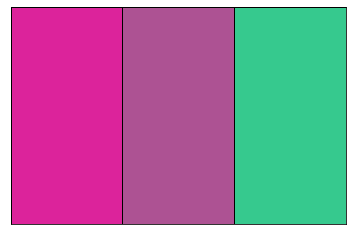

17.0) Good: pale purple	Bad: purple


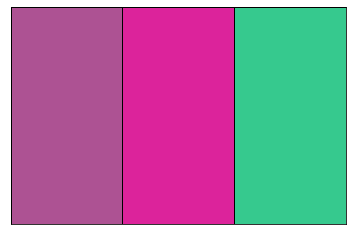

18.0) Good: green	Bad: green


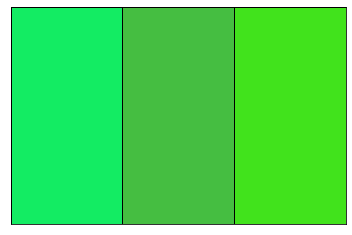

19.0) Good: Dark green	Bad: Green


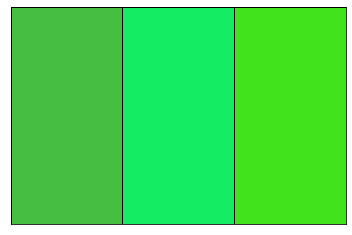

In [489]:
for i in range(0, len(pr_contexts_3), 5):
    dev_data.display_custom_game(pr_contexts_3[i], "{}) Good: {}\tBad: {}".format(i/5, pr_good_responses_3[i], pr_bad_responses_3[i]))

0.0) Good: Light pink	Bad: Pink


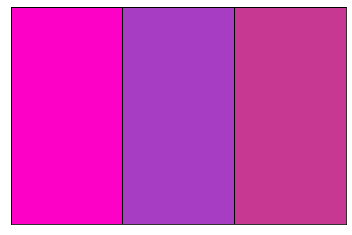

1.0) Good: light Purple	Bad: purple


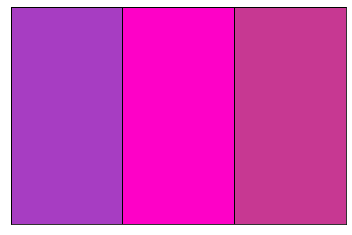

2.0) Good: light brown	Bad: light brown


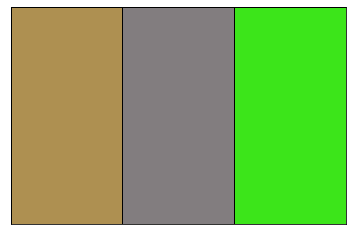

3.0) Good: Dark Grey	Bad: Grey


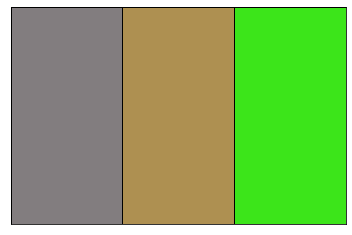

4.0) Good: neon green	Bad: green


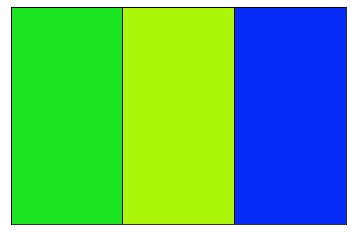

5.0) Good: neone green	Bad: green


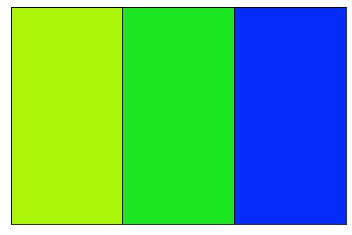

6.0) Good: Forest green	Bad: forest colored


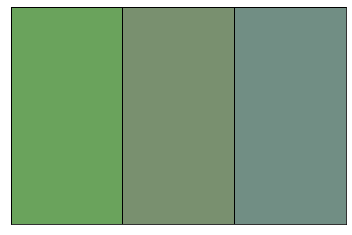

7.0) Good: not green	Bad: the pale color


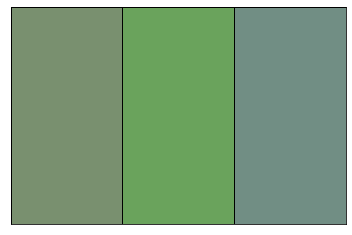

8.0) Good: blue	Bad: cool color


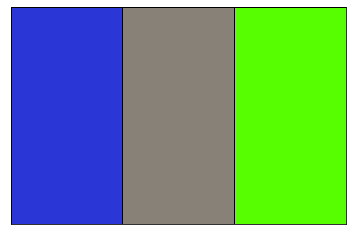

9.0) Good: grey	Bad: grey


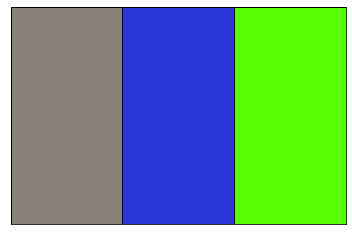

10.0) Good: Light Green	Bad: Green


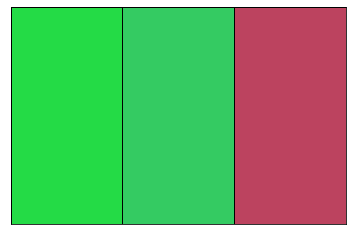

11.0) Good: Light Green	Bad: Green  (This is ambiguous because it describes the both the light green target and the dark Green color.)


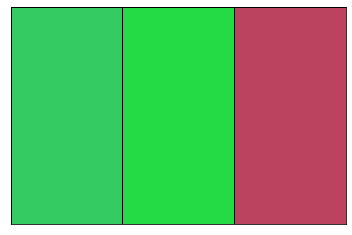

12.0) Good: olive green	Bad: green


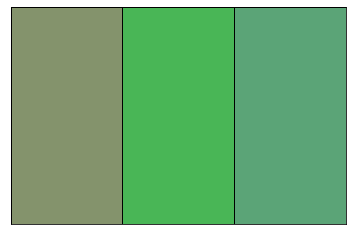

13.0) Good: light green	Bad: green


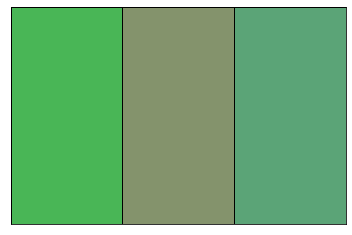

14.0) Good: Reddish brown	Bad: Medium


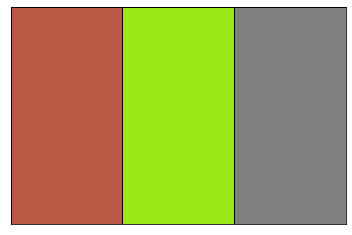

15.0) Good: Light green	Bad: green


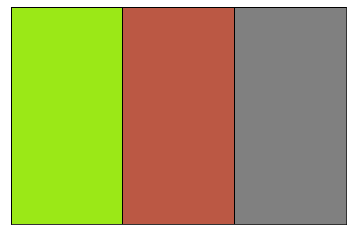

16.0) Good: Pink	Bad: Magenta


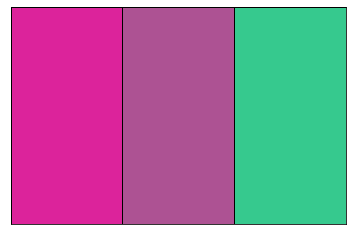

17.0) Good: light purpl	Bad: purple


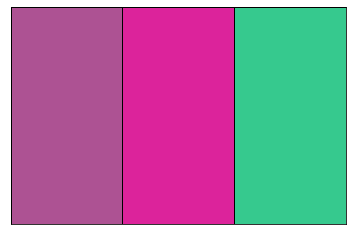

18.0) Good: light green	Bad: light green


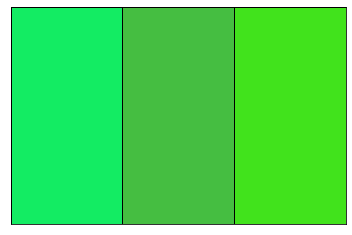

19.0) Good: dark green	Bad: green


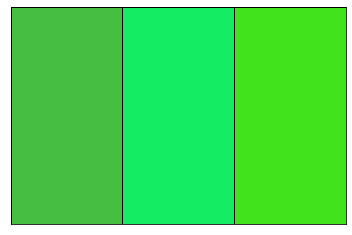

In [457]:
for i in range(0, len(pr_contexts), 15):
    dev_data.display_custom_game(pr_contexts[i], "{}) Good: {}\tBad: {}".format(i/15, pr_good_responses[i], pr_bad_responses[i]))

In [ ]:
# ok, now I'm going to create the big data file that is going to store all of these colors and captions!
# these will then just be plugged into the code I already have.

In [359]:
augmented_data_df = pd.DataFrame(index=list(range(400)), columns=dev_data.data.columns)

In [227]:
augmented_data_df.columns

Index(['gameid', 'clkTime', 'roundNum', 'condition', 'clickStatus',
       'clickColH', 'clickColS', 'clickColL', 'clickLocS', 'clickLocL',
       'alt1Status', 'alt1ColH', 'alt1ColS', 'alt1ColL', 'alt1LocS',
       'alt1LocL', 'alt2Status', 'alt2ColH', 'alt2ColS', 'alt2ColL',
       'alt2LocS', 'alt2LocL', 'targetD1Diff', 'targetD2Diff', 'D1D2Diff',
       'outcome', 'msgTime', 'role', 'contents', 'workerid_uniq', 'numOutcome',
       'numRawWords', 'numRawChars', 'numCleanChars', 'numCleanWords',
       'source'],
      dtype='object')

In [273]:
import numpy as np

In [559]:
pilot_results_3_reordered.head(3).T

,2,8,9
HITId,3UQVX1UPFSHFZSLWS1TZFYNI3M702K,3VO4XFFP15MA9MN1FB49QVV8R6R7Q5,39O0SQZVJN7ALN21SQT9VL5DNST7R6
HITTypeId,310F0WGLWJA66EDET15UZKHML0QTLV,310F0WGLWJA66EDET15UZKHML0QTLV,310F0WGLWJA66EDET15UZKHML0QTLV
Title,Describing Colors in Context,Describing Colors in Context,Describing Colors in Context
Description,Provide descriptions of colors to help someone...,Provide descriptions of colors to help someone...,Provide descriptions of colors to help someone...
Keywords,"color, description, art, design, paint, swatch...","color, description, art, design, paint, swatch...","color, description, art, design, paint, swatch..."
Reward,$1.00,$1.00,$1.00
CreationTime,Tue Jul 23 09:50:40 PDT 2019,Tue Jul 23 09:50:40 PDT 2019,Tue Jul 23 09:50:41 PDT 2019
MaxAssignments,3,3,3
RequesterAnnotation,BatchId:3713396;OriginalHitTemplateId:928390876;,BatchId:3713396;OriginalHitTemplateId:928390876;,BatchId:3713396;OriginalHitTemplateId:928390876;
AssignmentDurationInSeconds,3600,3600,3600


In [570]:
pilot_results_3_reordered.head().T

,2,8,9,7,12
HITId,33NOQL7T9OZNNSTBCCFSVO377VA8ZJ,3BVS8WK9Q0VKU028FKBGMVQIJOTBIO,3CMIQF80GNQR5M9WW1ZHKHVCWXZ6Q1,3B9XR6P1WEVGPBMEX2WGYW5IW3IBJ0,3M4KL7H8KVN3OIPFBM92JGN4OL7161
HITTypeId,310F0WGLWJA66EDET15UZKHML0QTLV,310F0WGLWJA66EDET15UZKHML0QTLV,310F0WGLWJA66EDET15UZKHML0QTLV,310F0WGLWJA66EDET15UZKHML0QTLV,310F0WGLWJA66EDET15UZKHML0QTLV
Title,Describing Colors in Context,Describing Colors in Context,Describing Colors in Context,Describing Colors in Context,Describing Colors in Context
Description,Provide descriptions of colors to help someone...,Provide descriptions of colors to help someone...,Provide descriptions of colors to help someone...,Provide descriptions of colors to help someone...,Provide descriptions of colors to help someone...
Keywords,"color, description, art, design, paint, swatch...","color, description, art, design, paint, swatch...","color, description, art, design, paint, swatch...","color, description, art, design, paint, swatch...","color, description, art, design, paint, swatch..."
Reward,$1.00,$1.00,$1.00,$1.00,$1.00
CreationTime,Wed Jul 24 09:13:53 PDT 2019,Wed Jul 24 09:13:53 PDT 2019,Wed Jul 24 09:13:53 PDT 2019,Wed Jul 24 09:13:53 PDT 2019,Wed Jul 24 09:13:53 PDT 2019
MaxAssignments,1,1,1,1,1
RequesterAnnotation,BatchId:3714571;OriginalHitTemplateId:928390876;,BatchId:3714571;OriginalHitTemplateId:928390876;,BatchId:3714571;OriginalHitTemplateId:928390876;,BatchId:3714571;OriginalHitTemplateId:928390876;,BatchId:3714571;OriginalHitTemplateId:928390876;
AssignmentDurationInSeconds,3600,3600,3600,3600,3600


In [580]:
# all_pilot_contexts = []
# all_pilot_good_responses = []
# all_pilot_bad_responses = []

all_pilot_dataframe = pd.DataFrame(index=list(range(100)), columns = pilot_results.columns)

p1_i = 0
p2_i = 0
p3_i = 0
for i in range(100):
    if i % 5 == 0:
        all_pilot_dataframe.loc[i] = pilot_results.loc[p1_i]
#         all_pilot_contexts.extend(pilot_contexts[5*p1_i:5*(p1_i + 1)])
#         all_pilot_good_responses.extend(pilot_good_responses[5*p1_i:5*(p1_i + 1)])
#         all_pilot_bad_responses.extend(pilot_bad_responses[5*p1_i:5*(p1_i + 1)])
        p1_i += 1
    elif i % 5 == 1:
        all_pilot_dataframe.loc[i] = pilot_results_3_reordered.loc[p3_i]
#         all_pilot_contexts.extend(pr_contexts_3[5*p3_i:5*(p3_i + 1)])
#         all_pilot_good_responses.extend(pr_good_responses_3[5*p3_i:5*(p3_i + 1)])
#         all_pilot_bad_responses.extend(pr_bad_responses_3[5*p3_i:5*(p3_i + 1)])
        p3_i += 1
    else:
        all_pilot_dataframe.loc[i] = pilot_replicate_results.loc[p2_i]
#         all_pilot_contexts.extend(pr_contexts[5*p2_i:5*(p2_i + 1)])
#         all_pilot_good_responses.extend(pr_good_responses[5*p2_i:5*(p2_i + 1)])
#         all_pilot_bad_responses.extend(pr_bad_responses[5*p2_i:5*(p2_i + 1)])
        p2_i += 1

In [ ]:
all_pilot_dataframe.to_csv("../data/mturk/combined_pilot_results.csv")

In [603]:
def results_to_responses(results, num_reps=5, num_contexts_per_hit=5):
    """Given pandas dataframe holding MTurk csv output, convert to lists of colors, good and bad responses"""
    contexts, good_responses, bad_responses = get_results(results)
    
    num_contexts_in_all_reps_of_hit = num_reps * num_contexts_per_hit
    ciaroh = num_contexts_in_all_reps_of_hit # shorthand

    # a priori contexts look like:
    # [a , b , c , d , e , a , b , c , d , e , ... (num_reps times)
    #  a', b', c', d', e', ...
    #  f , g , h , i , j , ...
    #  f', g', h', i', j', ...]
    # where a and a' have the same colors but different targets
    
    # group together the same contexts
    # [[a , a , ... (num_reps times)], [b , b , ...], ..., [a', a', ...], [b', b', ...], ... ]
    contexts_reshaped = []
    good_responses_reshaped = []
    bad_responses_reshaped = []

    for j in range(len(results) // num_reps):
        for i in range(num_contexts_per_hit):
            contexts_reshaped.append(contexts[(ciaroh*j)+i:(ciaroh*j)+i+(ciaroh): num_contexts_per_hit])
            good_responses_reshaped.append(good_responses[(ciaroh*j)+i:(ciaroh*j)+i+(ciaroh): num_contexts_per_hit])
            bad_responses_reshaped.append(bad_responses[(ciaroh*j)+i:(ciaroh*j)+i+(ciaroh): num_contexts_per_hit])

    #print(contexts_reshaped[0:num_contexts_per_hit + 1:num_contexts_per_hit])
    # group together same contexts with different targets
    # [[a, a, ... (num_reps times)], [a', a', ...]
    #  [b, b, ... (num_reps times)], [b', b', ...]]
    contexts_reshaped_2 = []
    good_responses_reshaped_2 = []
    bad_responses_reshaped_2 = []
    print(len(contexts_reshaped))
    for i in np.arange(len(contexts_reshaped)).reshape(-1, 2 * num_reps)[:, : num_reps].flatten():
        # The hideous expression above is equivalent to
        # [0, 1, 2, 3, 4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, ...]
        
        # If there are 5 contexts per HIT we want to re-arrange the indices like:
        # [0, 5, 1, 6, 2, 7, 3, 8, 4, 9, 10, 15, 11, 16 ...]
        # so that the contexts with different targets are next to each other
        contexts_reshaped_2.extend(contexts_reshaped[i : i + num_contexts_per_hit + 1 : num_contexts_per_hit])
        good_responses_reshaped_2.extend(good_responses_reshaped[i : i + num_contexts_per_hit + 1 : num_contexts_per_hit])
        bad_responses_reshaped_2.extend(bad_responses_reshaped[i : i + num_contexts_per_hit + 1 : num_contexts_per_hit])

    # flatten everything back to a single list
    contexts_reshaped_3 = np.array(contexts_reshaped_2).reshape(-1, 3)
    good_responses_reshaped_3 = np.array(good_responses_reshaped_2).flatten()
    bad_responses_reshaped_3 = np.array(bad_responses_reshaped_2).flatten()
    
    return contexts_reshaped_3, good_responses_reshaped_3, bad_responses_reshaped_3

In [602]:
c, g, b = results_to_responses(all_pilot_dataframe)

100


500


In [589]:
def create_dataframe(contexts, good_responses, bad_responses, num_reps=5):
    augmented_data_df = pd.DataFrame(index=list(range(100 * num_reps)), columns=dev_data.data.columns)
    for i in range(2*len(contexts)):
        # i is always floor divided by 2 because we have one entry for each good sentence and one entry
        # for each bad sentence per context

        context = contexts[i//2]

        # is this utterance a good, discriminative one or a bad, ambiguous one
        if i % 2 == 0:
            response = good_responses[i//2]
            response_type = "good"
        else:
            response = bad_responses[i//2]
            response_type = "bad"

        # find the condition:
        condition_indicator = i//(2 * 2 * num_reps) # first 2: one entry for good and bad sentence,
                                                    # second 2: two target conditions: same or swapped (indicating good or ugly)
                                                    # num_reps: number of replicates
                                                    # their product is for what period we want our condition to be the same
        if condition_indicator % 3 == 0:
            condition = "close"
        elif condition_indicator % 3 == 1:
            condition = "split"
        else:
            condition = "far"


        # whether the target is in the original place or is flipped
        if (i//2) % (2*num_reps) >= num_reps:
            target_type = "flipped"
        else:
            target_type = "unflipped"

        game_idx_1 = (i//(2*2*num_reps)) + 1 # 1.1, 1.1, 1.2, 1.2, ... 2x
        game_idx_2 = ((i//2) % num_reps) + 1


        augmented_data_df.loc[i, "gameid"] = "{}.{}-{}-{}".format(game_idx_1, game_idx_2, response_type, target_type)

        augmented_data_df.loc[i, "clickColH"] = context[0].hsl[0]
        augmented_data_df.loc[i, "clickColS"] = context[0].hsl[1]
        augmented_data_df.loc[i, "clickColL"] = context[0].hsl[2]
        augmented_data_df.loc[i, "clickStatus"] = "target"
        augmented_data_df.loc[i, "clickLocL"] = 0
        augmented_data_df.loc[i, "clickLocS"] = 0

        augmented_data_df.loc[i, "alt1ColH"] = context[1].hsl[0]
        augmented_data_df.loc[i, "alt1ColS"] = context[1].hsl[1]
        augmented_data_df.loc[i, "alt1ColL"] = context[1].hsl[2]
        augmented_data_df.loc[i, "alt1Status"] = "distr1"
        augmented_data_df.loc[i, "alt1LocL"] = 1
        augmented_data_df.loc[i, "alt1LocS"] = 1

        augmented_data_df.loc[i, "alt2ColH"] = context[2].hsl[0]
        augmented_data_df.loc[i, "alt2ColS"] = context[2].hsl[1]
        augmented_data_df.loc[i, "alt2ColL"] = context[2].hsl[2]
        augmented_data_df.loc[i, "alt2Status"] = "distr2"
        augmented_data_df.loc[i, "alt2LocL"] = 2
        augmented_data_df.loc[i, "alt2LocS"] = 2

        augmented_data_df.loc[i, "numOutcome"] = 1
        augmented_data_df.loc[i, "outcome"] = True

        augmented_data_df.loc[i, "contents"] = response
        augmented_data_df.loc[i, "condition"] = condition
        augmented_data_df.loc[i, "role"] = "speaker"
        
    return augmented_data_df


In [590]:
augdf_test = create_dataframe(c, g, b) # passed check!

In [495]:
augmented_data_df.head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
gameid,1.1-good-unflipped,1.1-bad-unflipped,1.2-good-unflipped,1.2-bad-unflipped,1.3-good-unflipped,1.3-bad-unflipped,1.4-good-unflipped,1.4-bad-unflipped,1.5-good-unflipped,1.5-bad-unflipped,1.1-good-flipped,1.1-bad-flipped
clkTime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roundNum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,close,close,close,close,close,close,close,close,close,close,close,close
clickStatus,target,target,target,target,target,target,target,target,target,target,target,target
clickColH,313,313,313,313,313,313,313,313,313,313,288,288
clickColS,99,99,99,99,99,99,99,99,99,99,52,52
clickColL,50,50,50,50,50,50,50,50,50,50,50,50
clickLocS,0,0,0,0,0,0,0,0,0,0,0,0
clickLocL,0,0,0,0,0,0,0,0,0,0,0,0


In [613]:
augmented_data_df.to_csv("../data/csv/mturk_augmented_data_pilot.csv", index=False)

Good: Purple	Bad: Purple


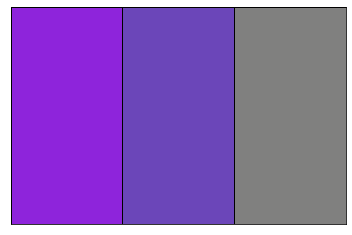

In [411]:
i=12
dev_data.display_custom_game(pilot_contexts[i], "Good: {}\tBad: {}".format(pilot_good_responses[i], pilot_bad_responses[i]))

0) bright pink


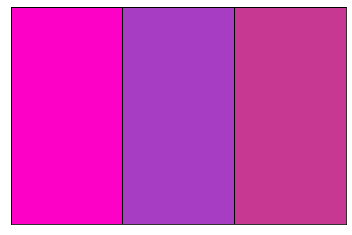

1) dark grey


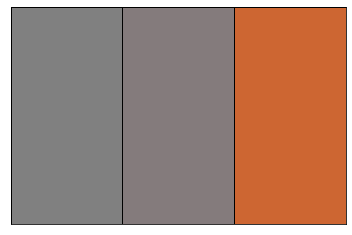

2) lime green


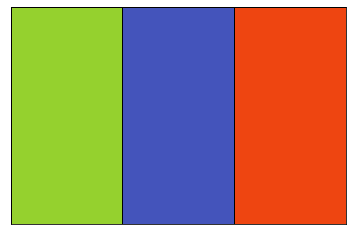

3) purple grey


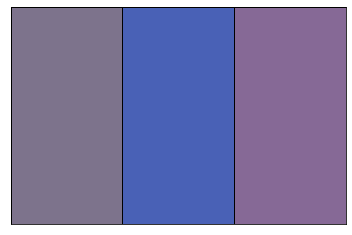

4) bright green


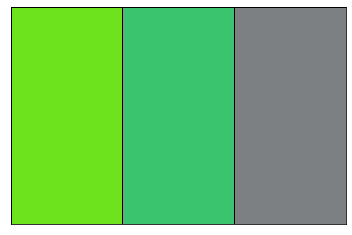

5) Light pink


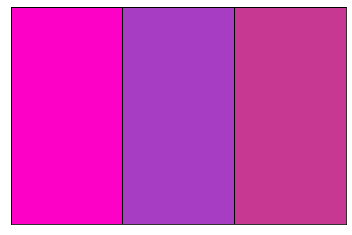

6) Dark grey


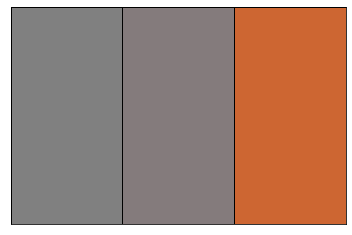

7) Green


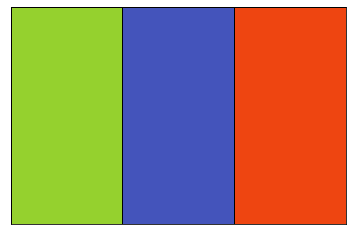

8) Dark grey


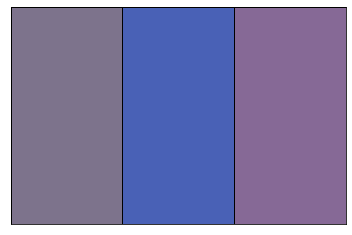

9) Light green


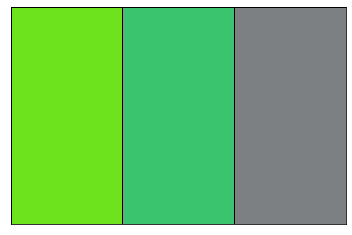

10) Bright pink


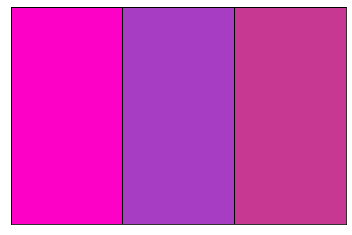

11) Neutral gray


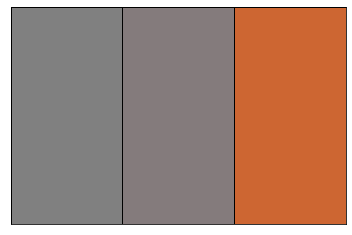

12) Dark lime green


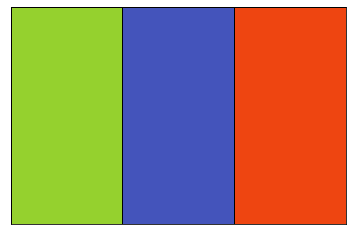

13) Blue-ish gray


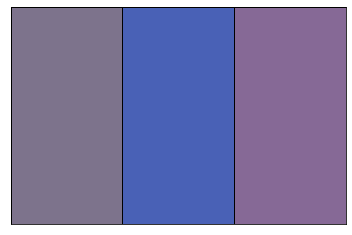

14) Bright green


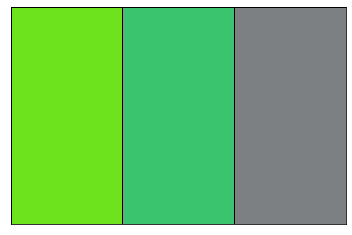

15) bright purple


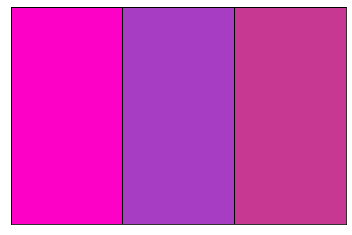

16) lighter gray


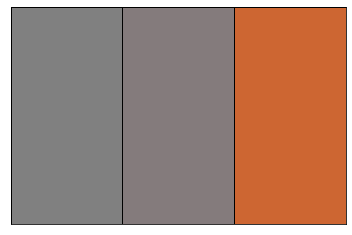

17) bright green


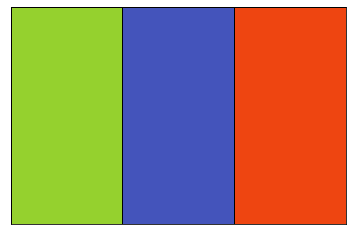

18) greyish purple


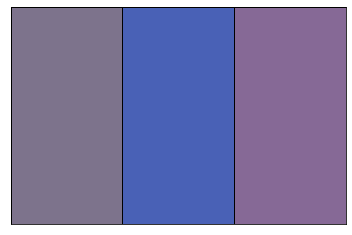

19) bright green


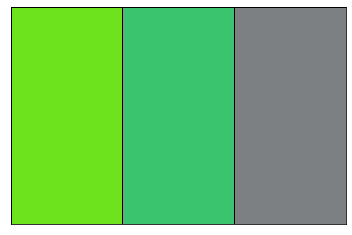

20) pale purple


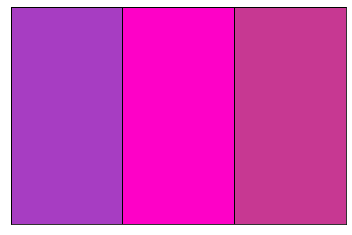

21) foghat gray


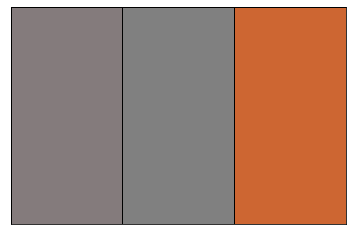

22) sky blue


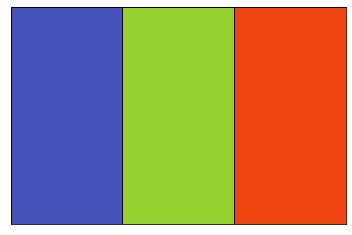

23) sky blue


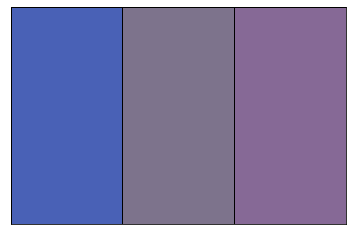

24) light green


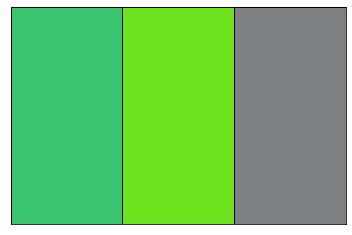

25) light Purple


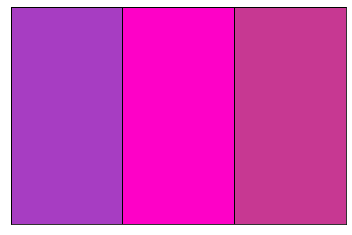

26) dark grey


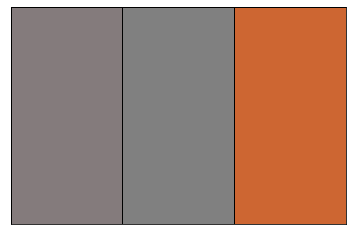

27) dark violet


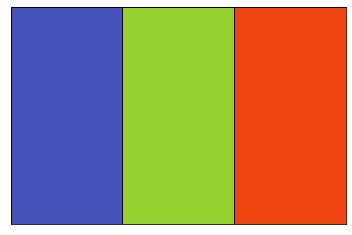

28) light violet


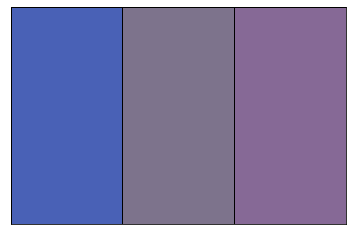

29) light green


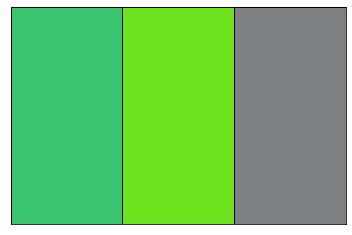

30) purple


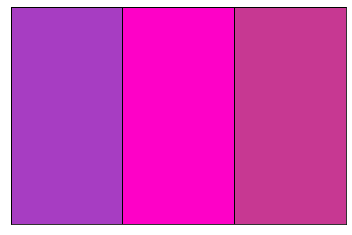

31) brown gray


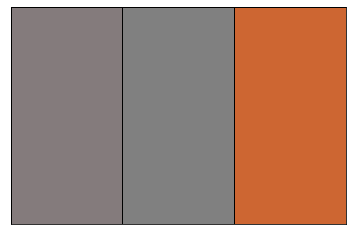

32) navy blue


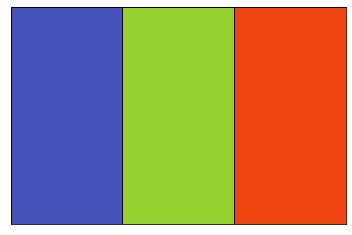

33) navy blue


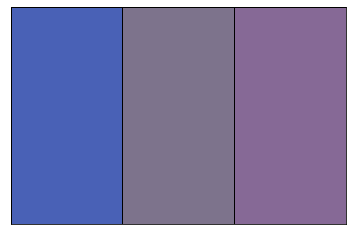

34) Christmas green


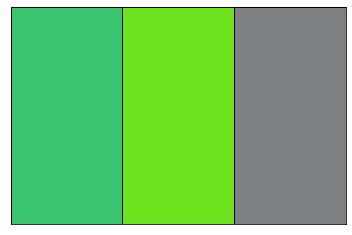

35) dark purple


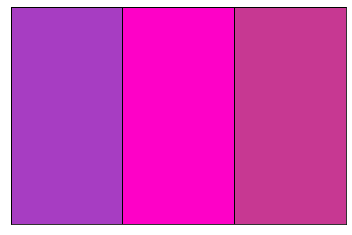

36) dark grey


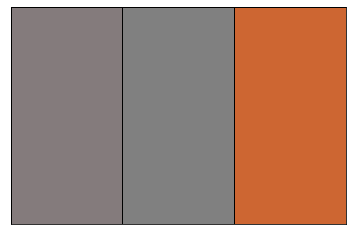

37) blue


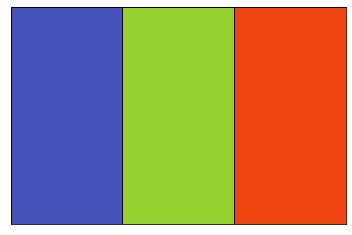

38) blue


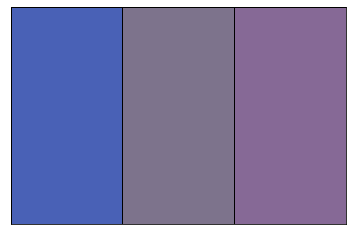

39) dark green


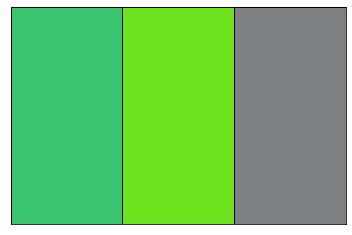

40) Brown


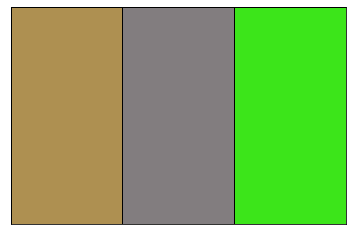

41) Indigo


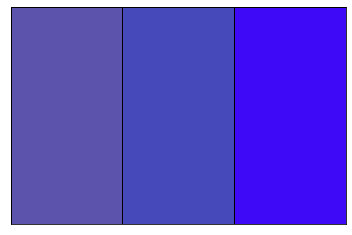

42) Purple


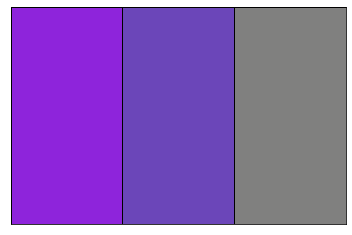

43) Light Blue


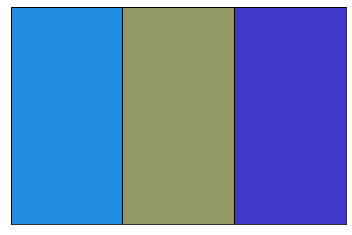

44) Light Violet


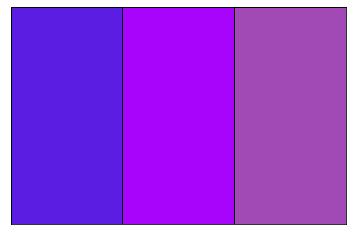

In [422]:
for i in range(45):
    #dev_data.display_custom_game(all_pilot_contexts_reshaped_3[i], "{}) ".format(i) + all_pilot_good_responses_reshaped_3[i])
    dev_data.display_custom_game(all_pilot_contexts[i], "{}) ".format(i) + all_pilot_good_responses[i])

0) bright pink


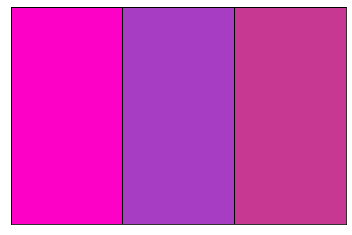

1) dark grey


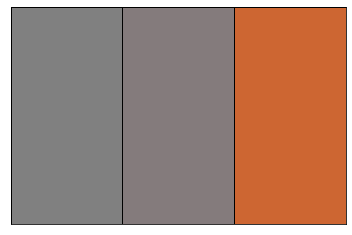

2) lime green


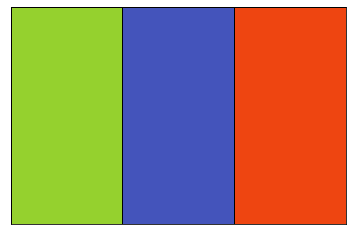

3) purple grey


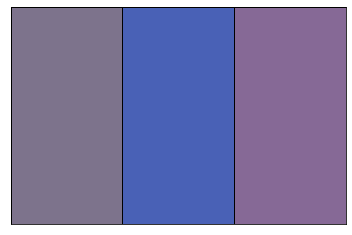

4) bright green


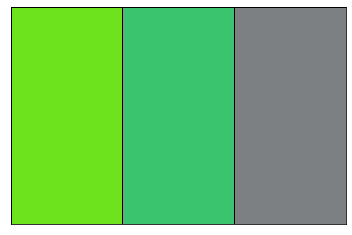

5) pale purple


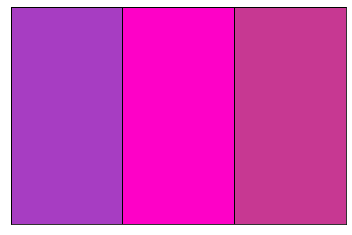

6) foghat gray


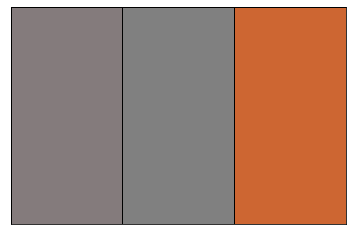

7) sky blue


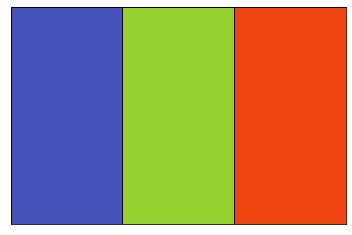

8) sky blue


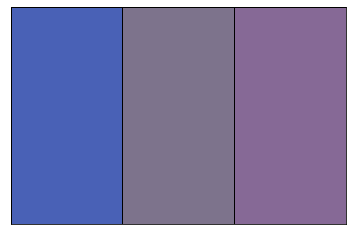

9) light green


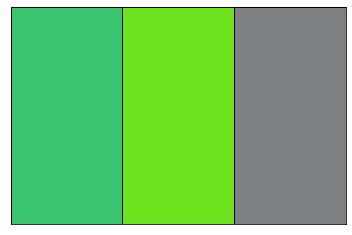

10) Brown


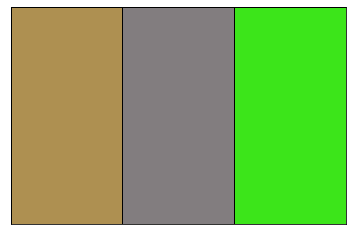

11) Indigo


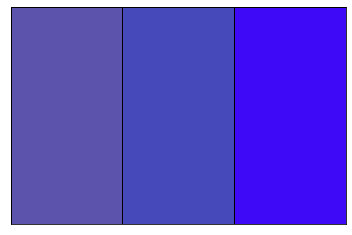

12) Purple


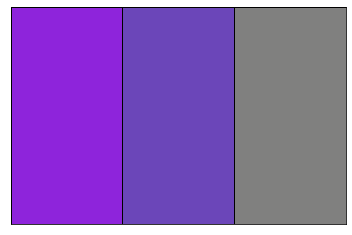

13) Light Blue


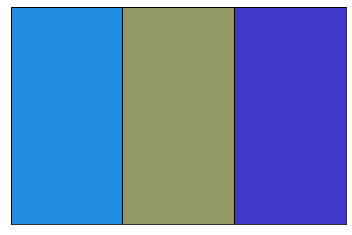

14) Light Violet


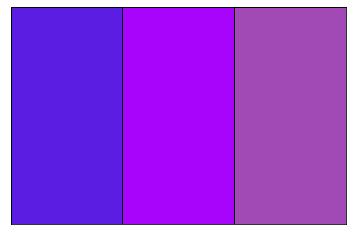

15) Green


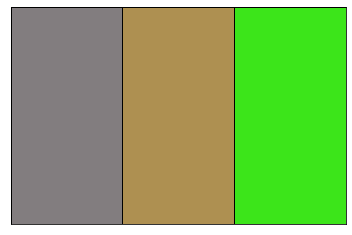

16) dark blue


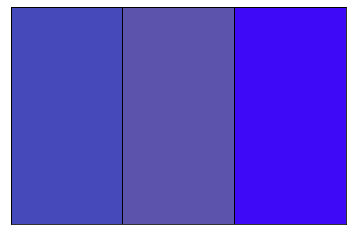

17) violet


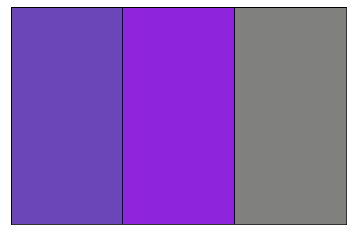

18) khaki


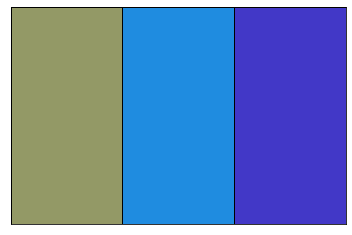

19) violet


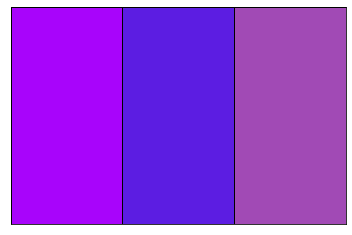

20) light Green


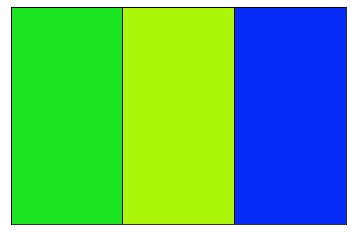

21) Light purple


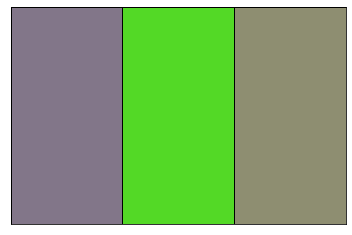

22) grey


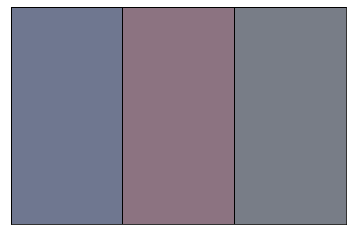

23) blue


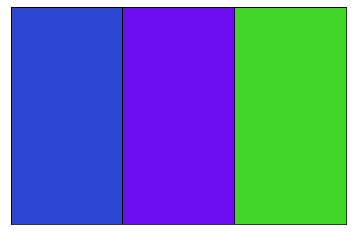

24) grey


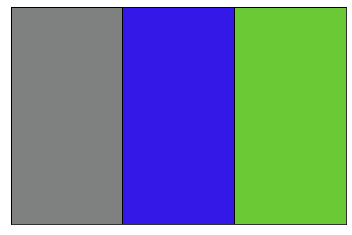

25) greenish yellow


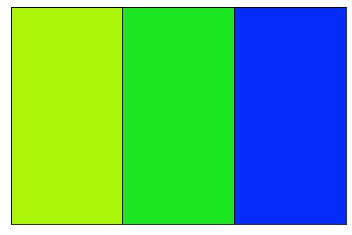

26) light green


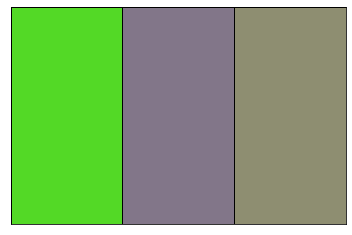

27) dark lavender


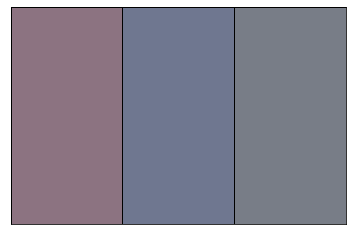

28) purplish lavender


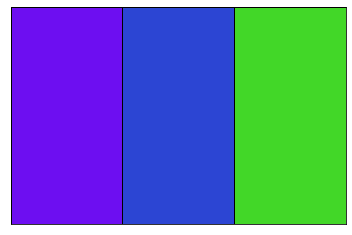

29) blue


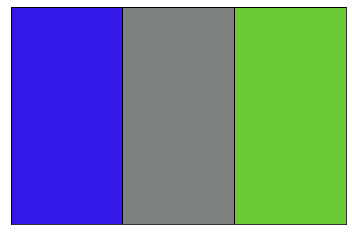

30) forest green


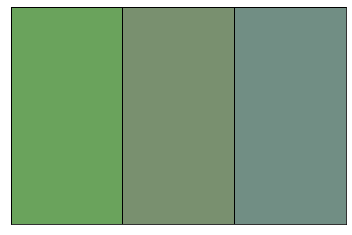

31) deep blue


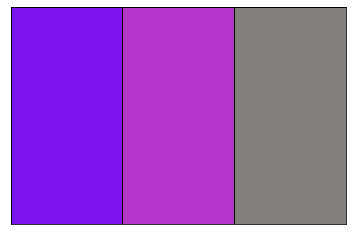

32) purple


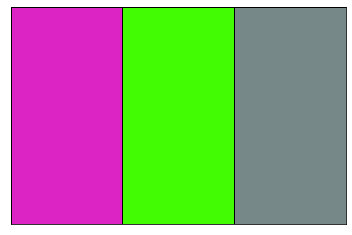

33) bright purple


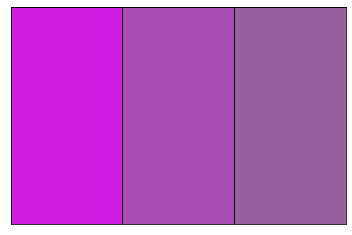

34) dull green


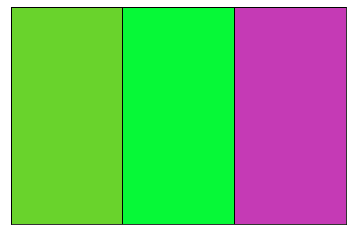

35) olive green


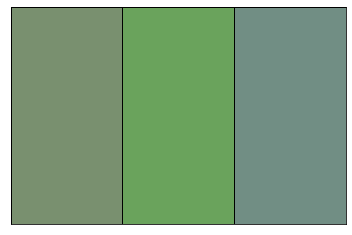

36) lilac


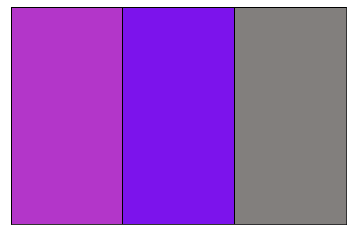

37) green


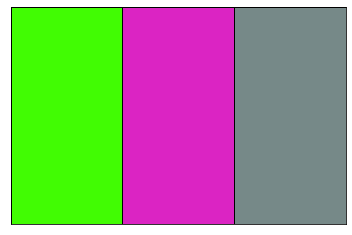

38) dark purple


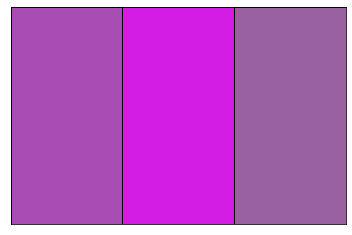

39) bright green


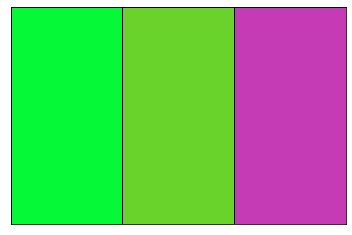

40) Dark Blue


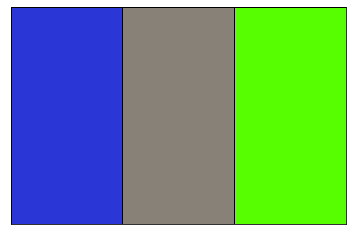

41) Moss Green


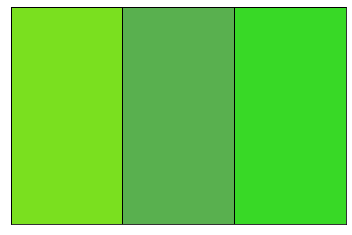

42) Rose Pink


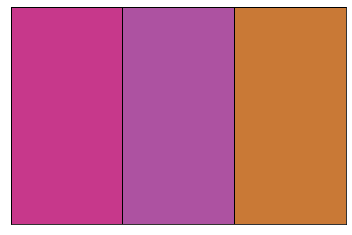

43) Leaf Green


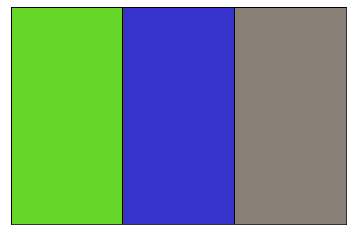

44) Ocean Blue


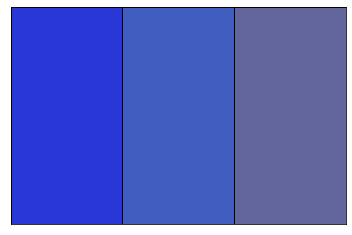

In [425]:
for i in range(45):
    dev_data.display_custom_game(all_pilot_contexts_reshaped[i][0], "{}) ".format(i) + all_pilot_good_responses_reshaped[i][0])

0) bright pink


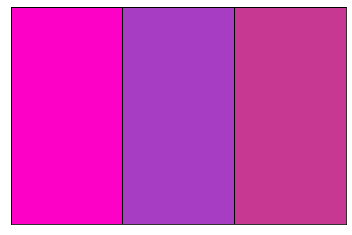

1) pale purple


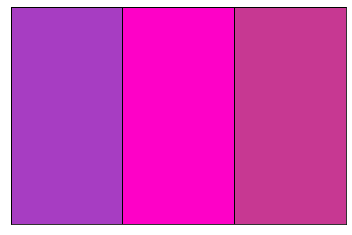

2) dark grey


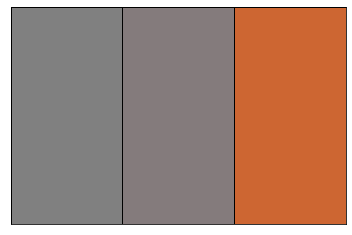

3) foghat gray


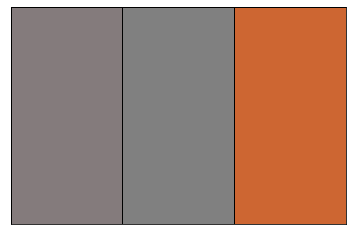

4) lime green


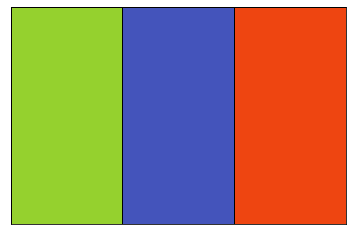

5) sky blue


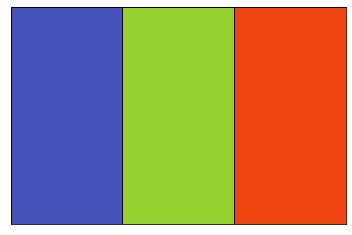

6) purple grey


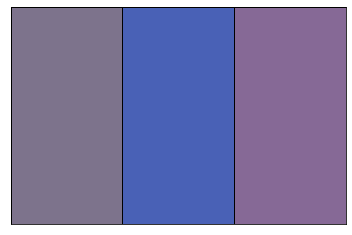

7) sky blue


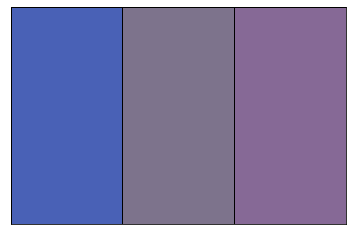

8) bright green


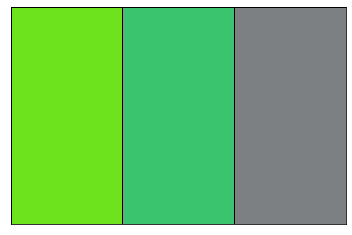

9) light green


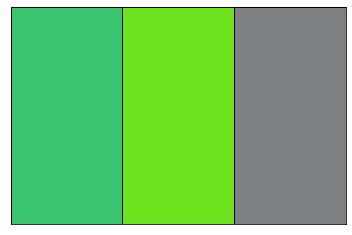

10) Brown


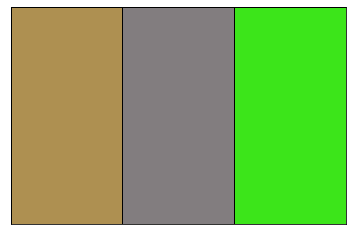

11) Green


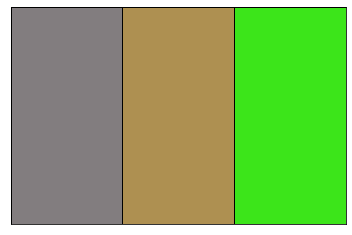

12) Indigo


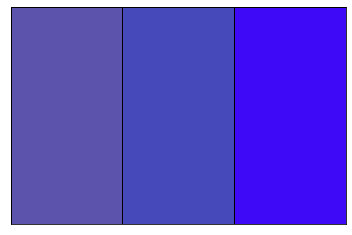

13) dark blue


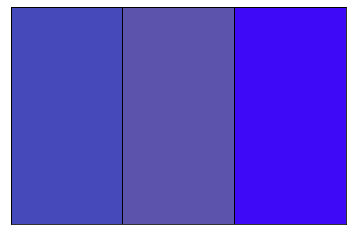

14) Purple


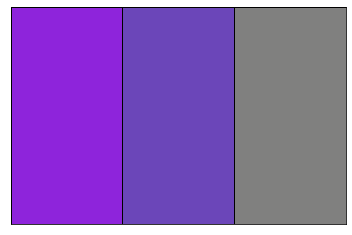

15) violet


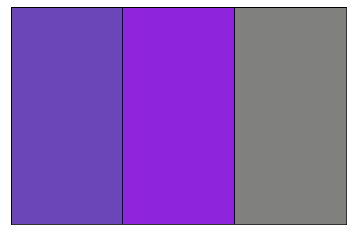

16) Light Blue


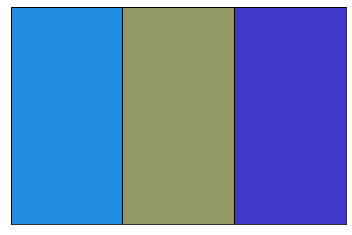

17) khaki


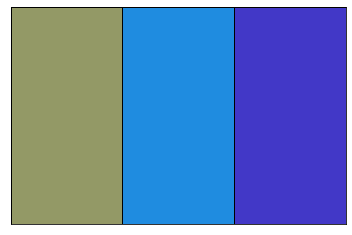

18) Light Violet


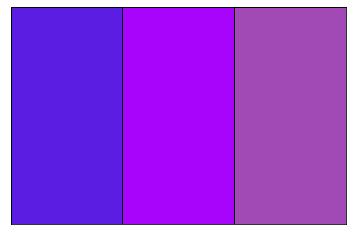

19) violet


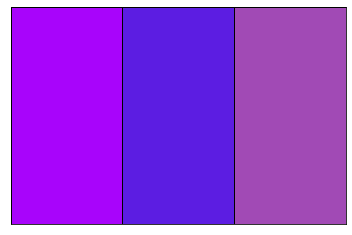

20) light Green


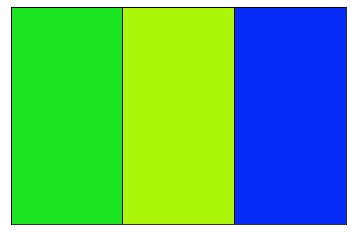

21) greenish yellow


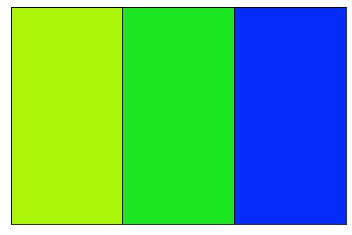

22) Light purple


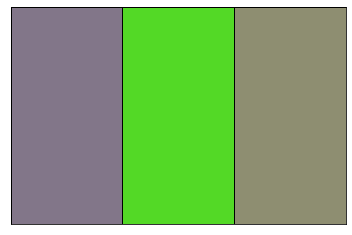

23) light green


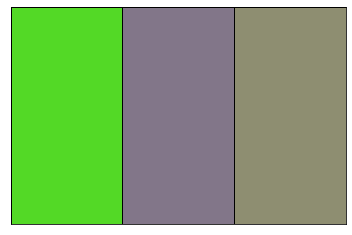

24) grey


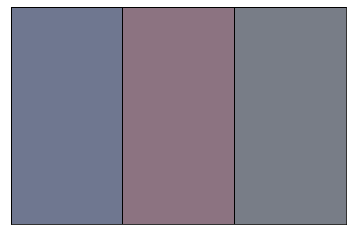

25) dark lavender


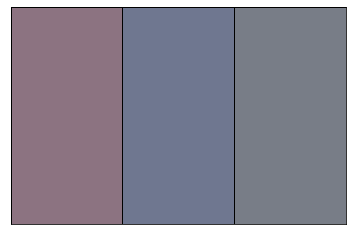

26) blue


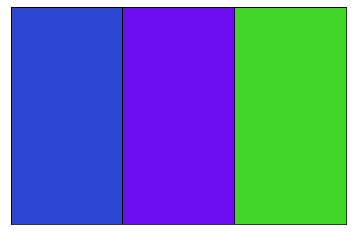

27) purplish lavender


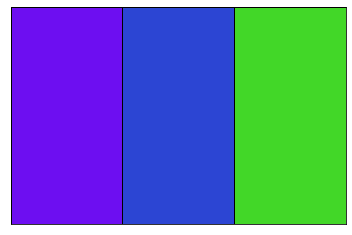

28) grey


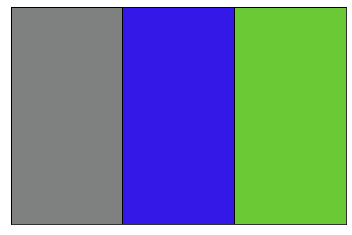

29) blue


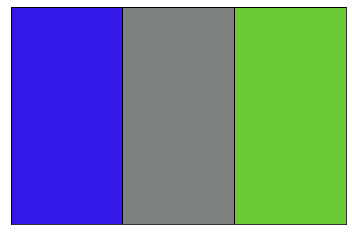

30) forest green


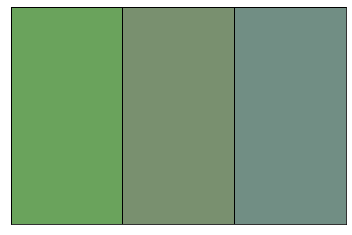

31) olive green


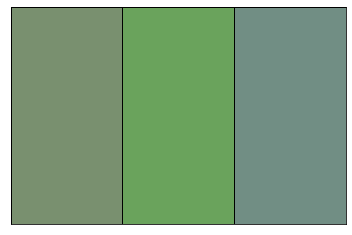

32) deep blue


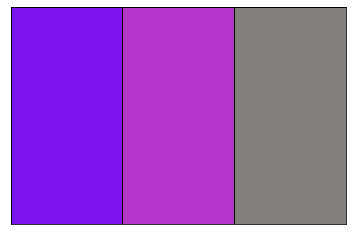

33) lilac


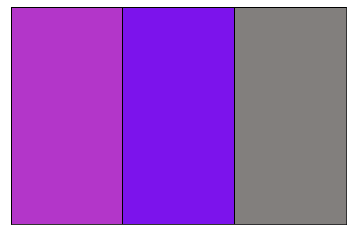

34) purple


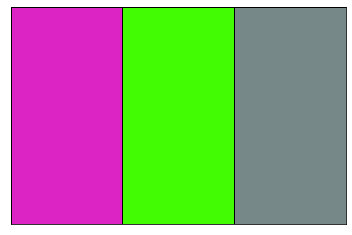

35) green


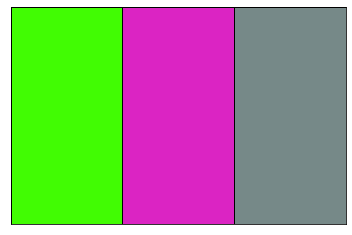

36) bright purple


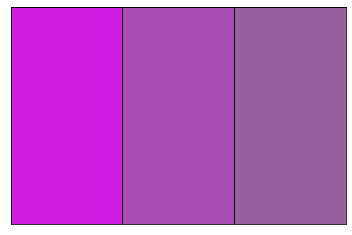

37) dark purple


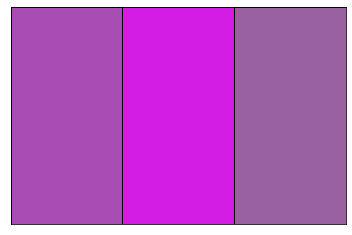

38) dull green


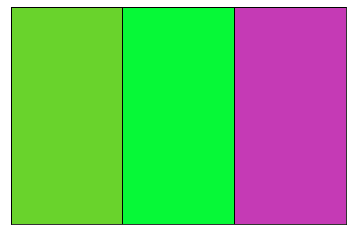

39) bright green


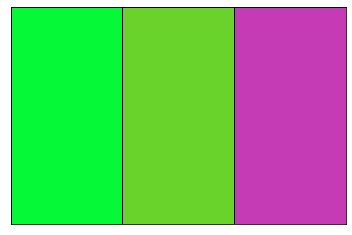

40) Dark Blue


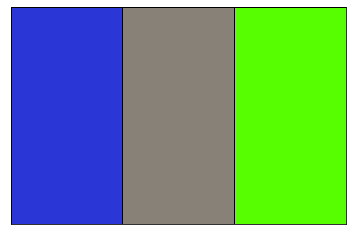

41) Gray


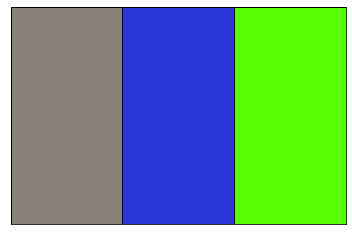

42) Moss Green


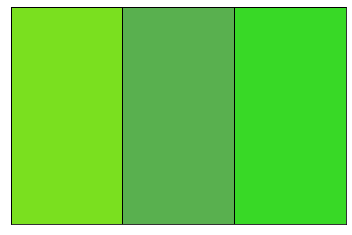

43) Darkest green


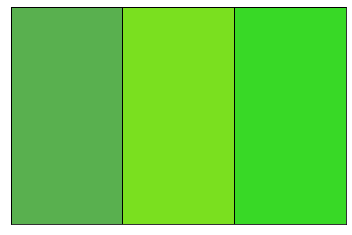

44) Rose Pink


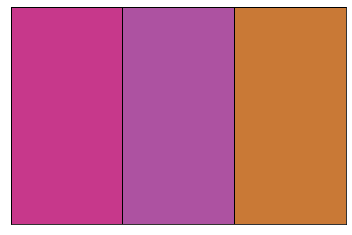

In [435]:
for i in range(45):
    dev_data.display_custom_game(all_pilot_contexts_reshaped_2[i][0], "{}) ".format(i) + all_pilot_good_responses_reshaped_2[i][0])

0) bright pink


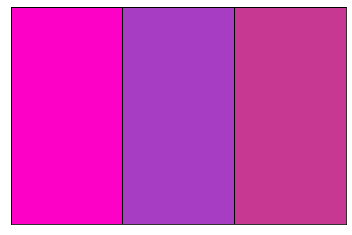

1) Light pink


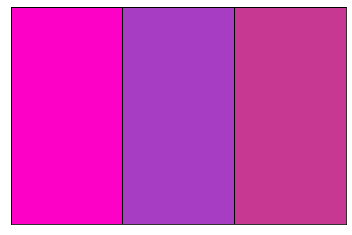

2) Bright pink


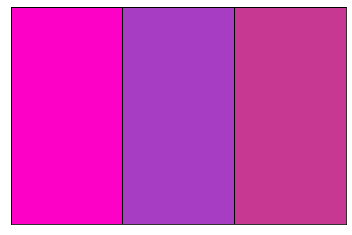

3) bright purple


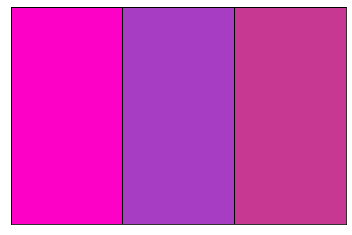

4) pale purple


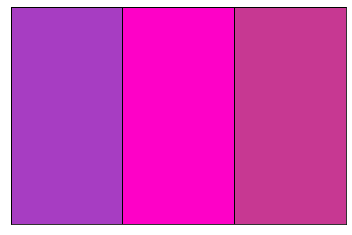

5) light Purple


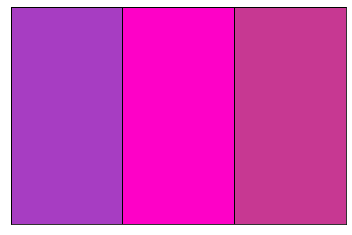

6) purple


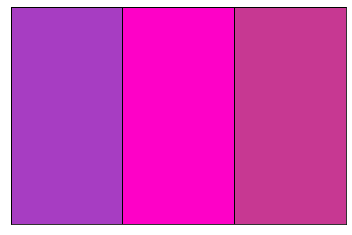

7) dark purple


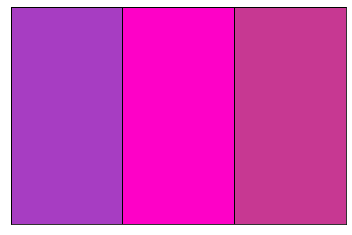

8) dark grey


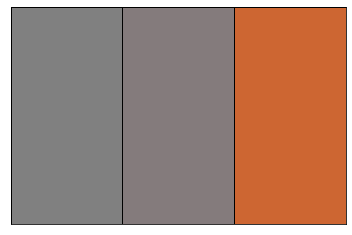

9) Dark grey


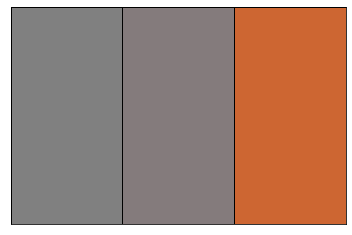

10) Neutral gray


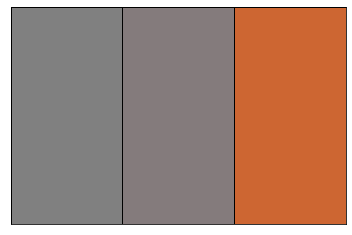

11) lighter gray


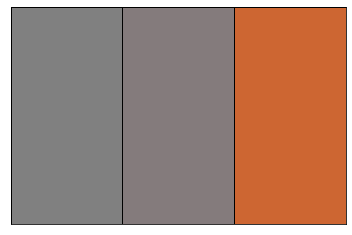

12) foghat gray


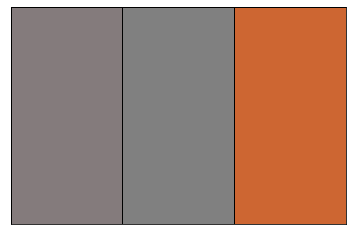

13) dark grey


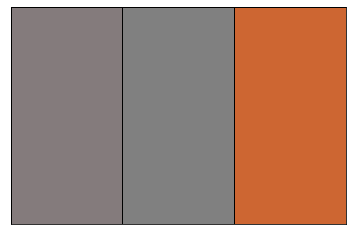

14) brown gray


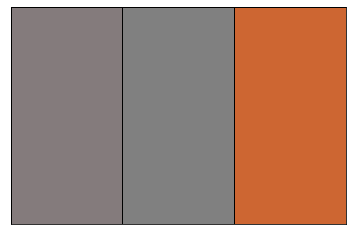

15) dark grey


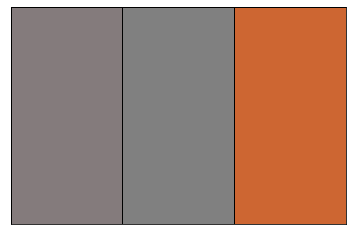

16) lime green


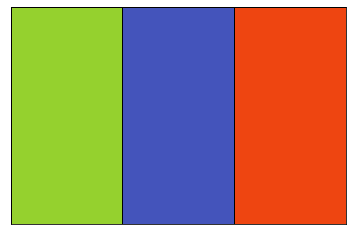

17) Green


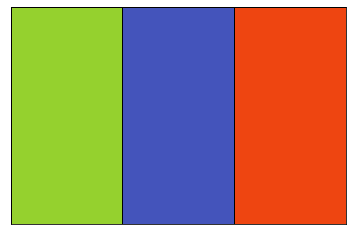

18) Dark lime green


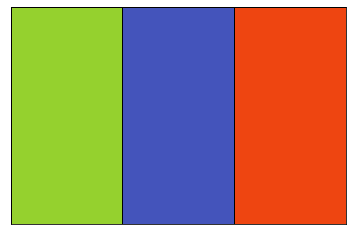

19) bright green


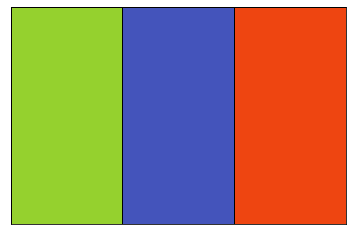

20) sky blue


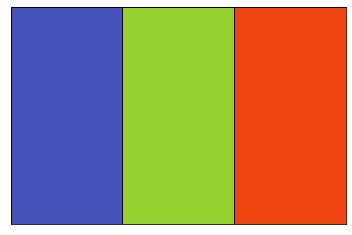

21) dark violet


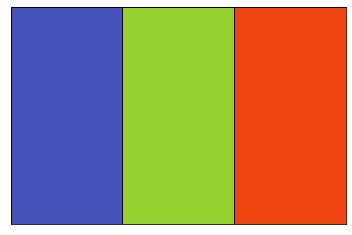

22) navy blue


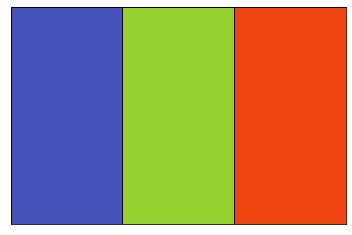

23) blue


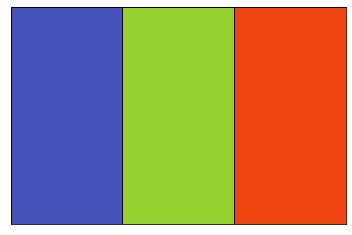

24) purple grey


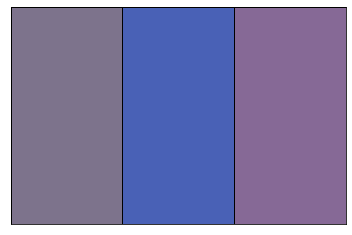

25) Dark grey


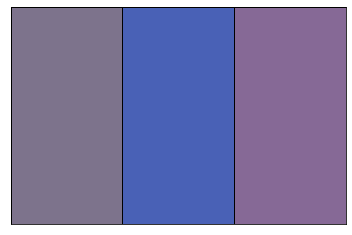

26) Blue-ish gray


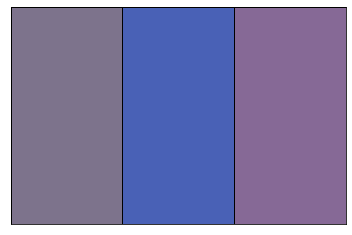

27) greyish purple


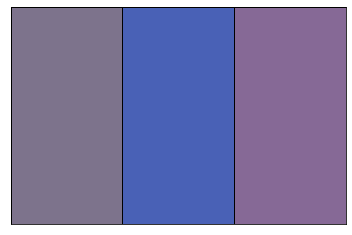

28) sky blue


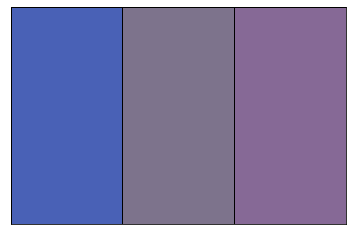

29) light violet


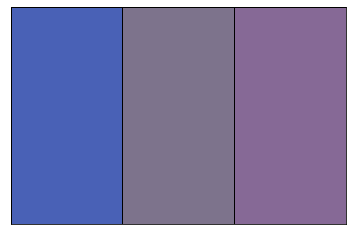

30) navy blue


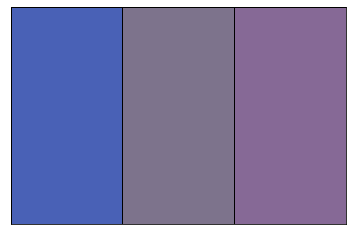

31) blue


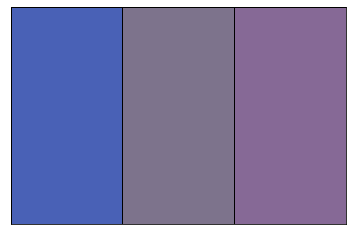

32) bright green


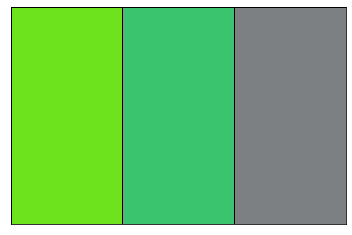

33) Light green


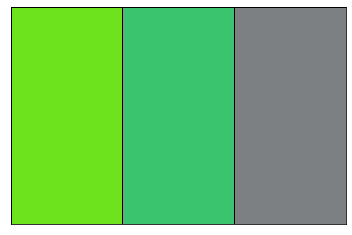

34) Bright green


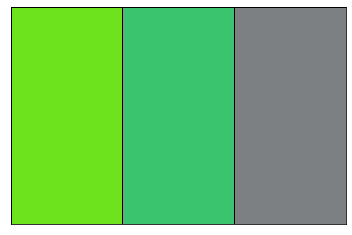

35) bright green


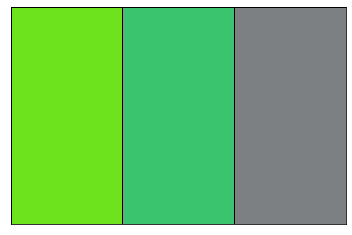

36) light green


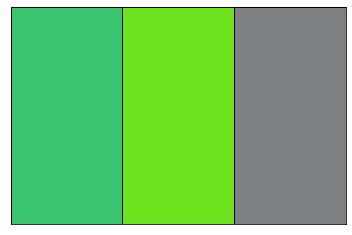

37) light green


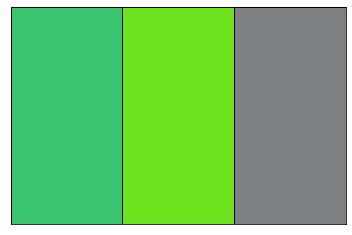

38) Christmas green


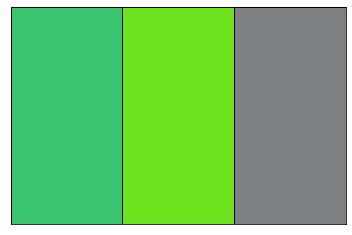

39) dark green


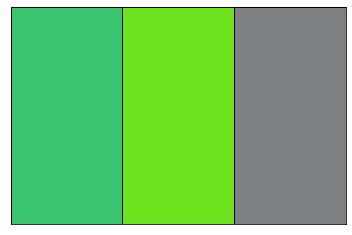

40) Brown


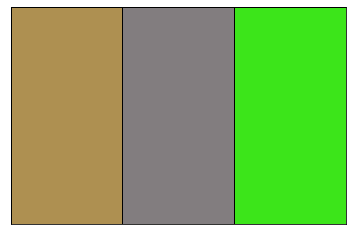

41) light brown


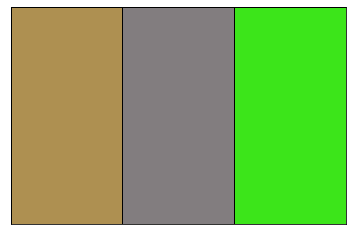

42) tan


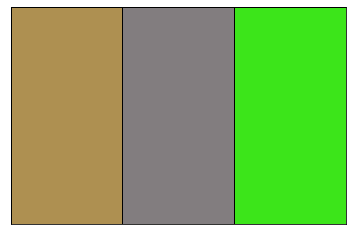

43) Light brown


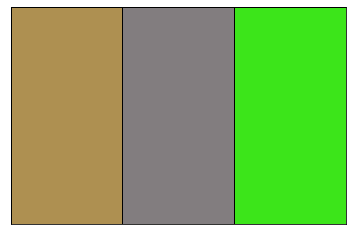

44) Green


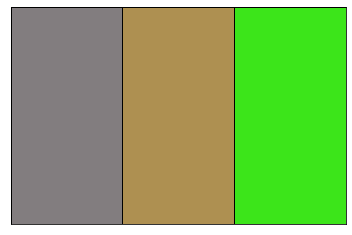

In [436]:
for i in range(45):
    dev_data.display_custom_game(all_pilot_contexts_reshaped_3[i], "{}) ".format(i) + all_pilot_good_responses_reshaped_3[i])


In [429]:
all_pilot_good_responses_reshaped_2[1]

['pale purple', 'light Purple', 'purple', 'dark purple']

In [430]:
all_pilot_good_responses_reshaped_2[10]

['pale purple', 'light Purple', 'purple', 'dark purple']

In [424]:
all_pilot_good_responses_reshaped

[['bright pink', 'Light pink', 'Bright pink', 'bright purple'],
 ['dark grey', 'Dark grey', 'Neutral gray', 'lighter gray'],
 ['lime green', 'Green', 'Dark lime green', 'bright green'],
 ['purple grey', 'Dark grey', 'Blue-ish gray', 'greyish purple'],
 ['bright green', 'Light green', 'Bright green', 'bright green'],
 ['pale purple', 'light Purple', 'purple', 'dark purple'],
 ['foghat gray', 'dark grey', 'brown gray', 'dark grey'],
 ['sky blue', 'dark violet', 'navy blue', 'blue'],
 ['sky blue', 'light violet', 'navy blue', 'blue'],
 ['light green', 'light green', 'Christmas green', 'dark green'],
 ['Brown', 'light brown', 'tan', 'Light brown'],
 ['Indigo', 'light blue', 'purple', 'Light purple and dark blue mixed'],
 ['Purple', 'purple', 'bright violet', 'Bright purple'],
 ['Light Blue', 'light blue', 'cerulean blue', 'Light blue'],
 ['Light Violet', 'dark blue', 'indigo', 'Light deep purple'],
 ['Green', 'Dark Grey', 'gray', 'grey'],
 ['dark blue', 'Dark Blue', 'Royal blue', 'dark blu

In [244]:
pilot_contexts[10//2]

[hsl: [288, 52.0, 50.0], rgb [168, 61, 195], hsv [288, 68.42105263157895, 76.0],
 hsl: [313, 99.0, 50.0], rgb [255, 1, 200], hsv [313, 99.49748743718592, 99.5],
 hsl: [322, 56.0, 50.0], rgb [200, 56, 147], hsv [322, 71.7948717948718, 78.0]]

In [405]:
# indices of dev data that we are going to be dealing with:
all_augmented_indices = []
for i in range(len(split_des)):
    all_augmented_indices.append(close_des[i])
    all_augmented_indices.append(split_des[i])
    all_augmented_indices.append(far_des[i])
    

In [406]:
len(all_augmented_indices)

1500

In [403]:
import pickle as pkl

In [407]:
with open("../data/metric_comparison_indices/all_augmented_dev_indices", "wb") as pfile:
    pkl.dump(all_augmented_indices, pfile)

In [716]:
## ok, let's test out this pipeline on MORE DATA
experiment_2_results = pd.read_csv("../data/mturk/exp_7_24_2019_results.csv")

In [639]:
experiment_2_results.drop(experiment_2_results.tail(1).index, inplace=True)

In [635]:
exp2_contexts, exp2_good_responses, exp2_bad_responses = results_to_responses(experiment_2_results)

80


20. Good: deeper green Bad: green


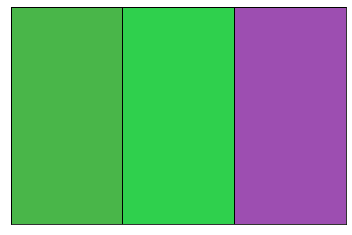

21. Good: Light-ish green Bad: Green


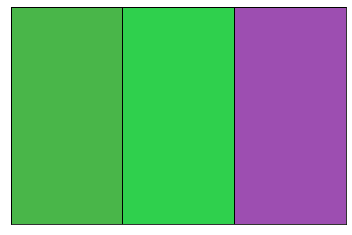

22. Good: pale green Bad: green


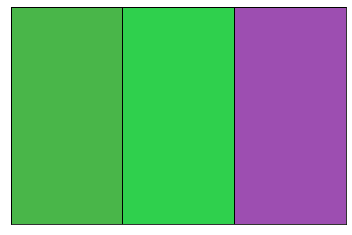

23. Good: darker green Bad: green


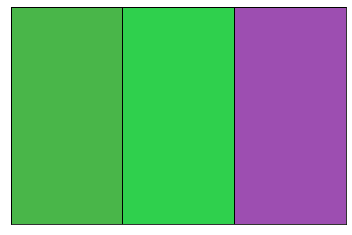

24. Good: Forest Green Bad: Green


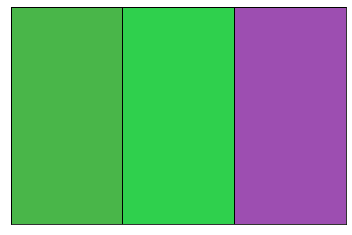

25. Good: light green Bad: green


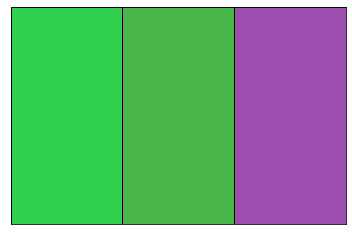

26. Good: brighter green Bad: green


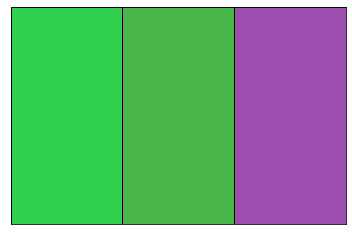

27. Good: Green Bad: Green


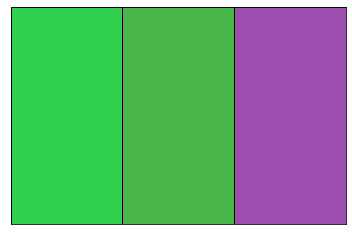

28. Good: light green Bad: green


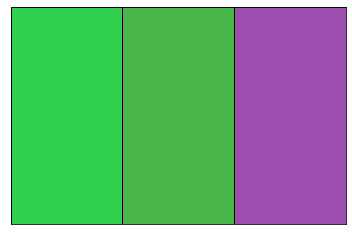

29. Good: leaf green Bad: green


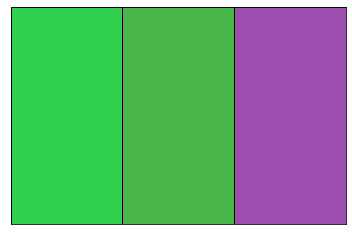

30. Good: yellow Bad: warm


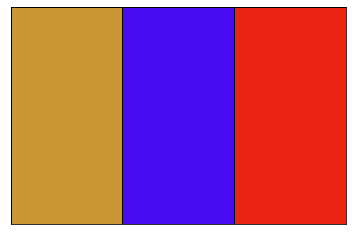

31. Good: Dull gold Bad: Gold


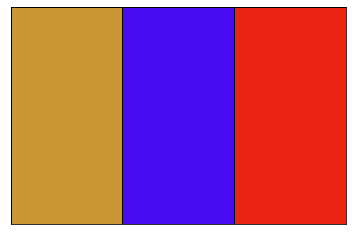

32. Good: burnt orange Bad: vibrant


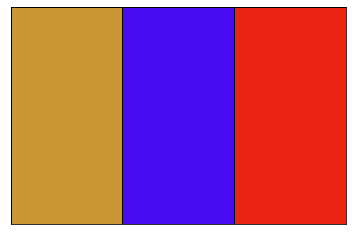

33. Good: orange Bad: not blue


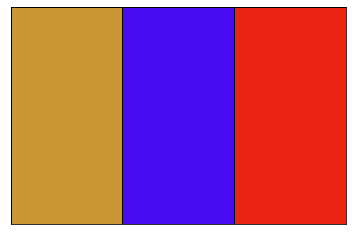

34. Good: Mud Brown Bad: Brown


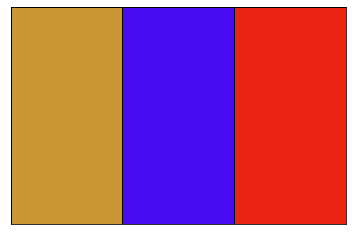

35. Good: blue Bad: dark


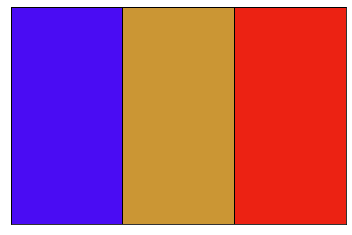

36. Good: purple Bad: darker


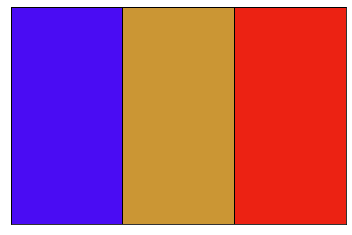

37. Good: Violet Bad: brown


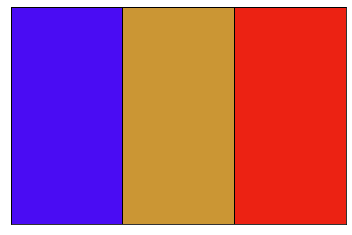

38. Good: purple Bad: mixed color


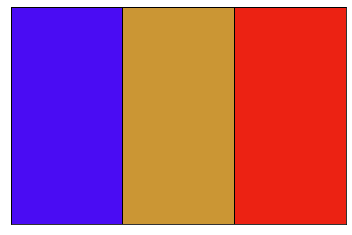

39. Good: violet Bad: violet


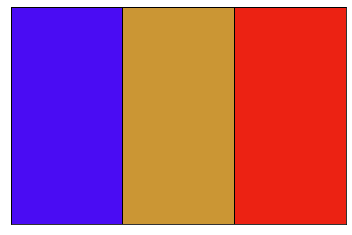

In [609]:
for i in range(20, 40):
    dev_data.display_custom_game(exp2_contexts[i], "{}. Good: {} Bad: {}".format(i, exp2_good_responses[i],
                                                                                exp2_bad_responses[i]))

In [610]:
exp2_df = create_dataframe(exp2_contexts, exp2_good_responses, exp2_bad_responses)

In [612]:
exp2_df.to_csv("../data/csv/mturk_augmented_data_exp2.csv", index=False)

In [597]:
420/5

84.0

In [619]:
combined_data_df = augmented_data_df.append(exp2_df, ignore_index=True)

In [620]:
combined_data_df.to_csv("../data/csv/mturk_augmented_data_exp12.csv", index=False)

In [617]:
augmented_data_df.shape

(1000, 37)

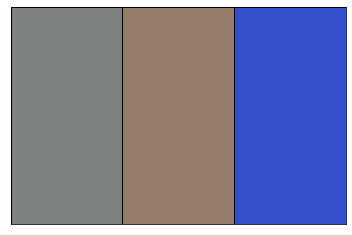

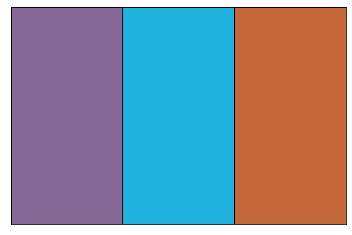

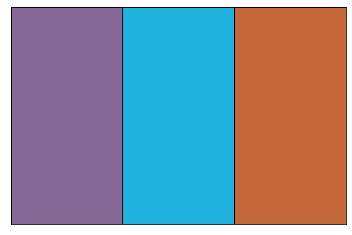

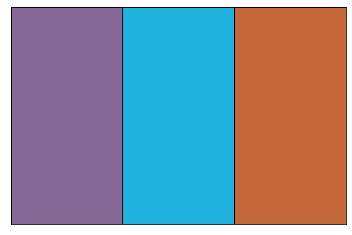

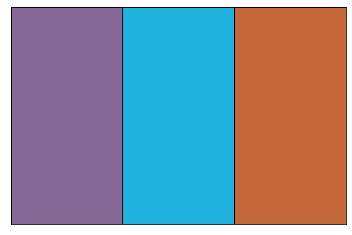

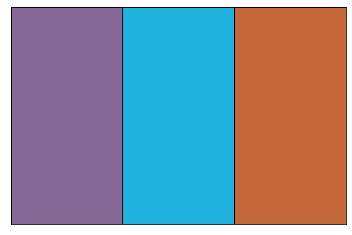

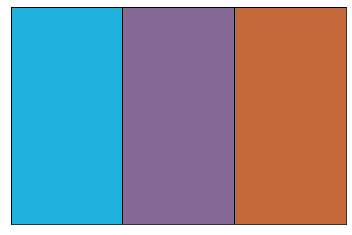

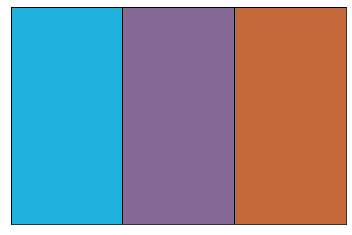

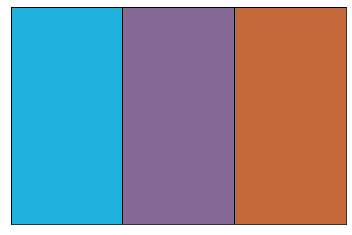

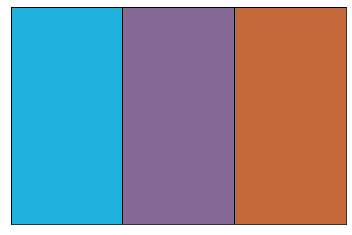

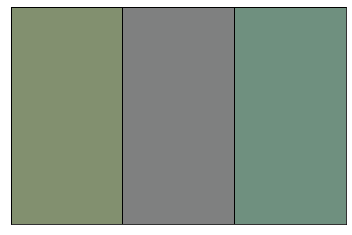

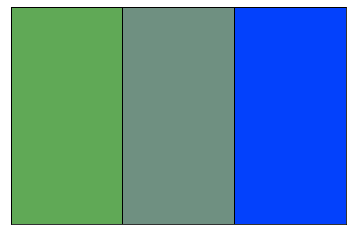

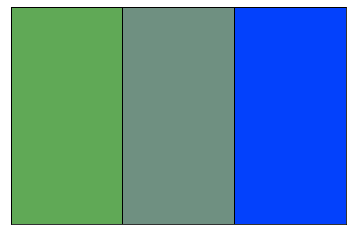

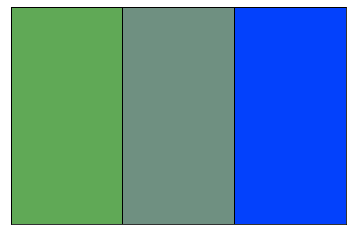

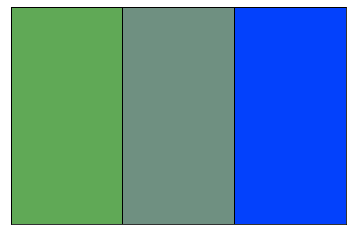

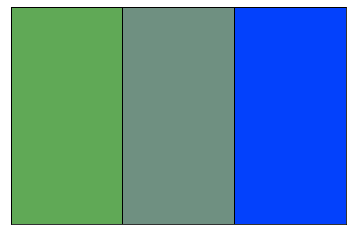

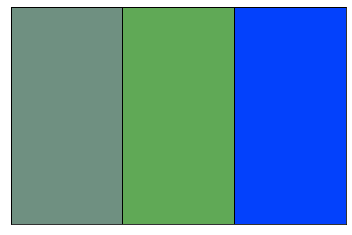

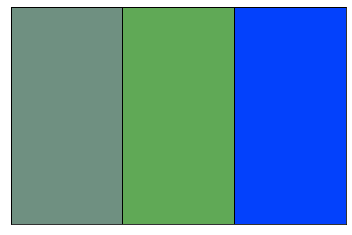

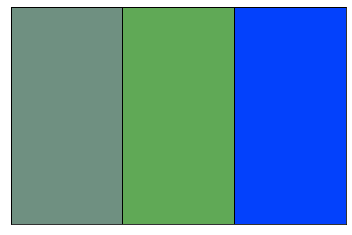

In [637]:
for i in range(-1, -20, -1):
    dev_data.display_custom_game(exp2_contexts[i] , "")

In [737]:
## ok, let's test out this pipeline on EVEN MORE DATA
experiment_3_results = pd.read_csv("../data/mturk/exp_7_25_2019_results.csv")

In [738]:
np.where(experiment_3_results["RejectionTime"].notnull())

(array([ 6, 16, 18, 32, 33]),)

In [739]:
experiment_3_results.drop([ 6, 16, 18, 32, 33], inplace=True)

In [740]:
experiment_3_results.reset_index(inplace=True, drop=True)

In [698]:
experiment_3_results.drop(experiment_3_results.head(5).index, inplace=True)

In [699]:
experiment_3_results.reset_index(inplace=True)

In [700]:
exp3_contexts, exp3_good_responses, exp3_bad_responses = results_to_responses(experiment_3_results)

80


In [701]:
len(exp3_contexts)

400

In [687]:
experiment_3_results.loc[120//5]

level_0                                                                       29
index                                                                         30
HITId                                             3BVS8WK9Q0VKU028FKBGMVQIJPNIBR
HITTypeId                                         310F0WGLWJA66EDET15UZKHML0QTLV
Title                                               Describing Colors in Context
Description                    Provide descriptions of colors to help someone...
Keywords                       color, description, art, design, paint, swatch...
Reward                                                                     $1.00
CreationTime                                        Thu Jul 25 09:59:09 PDT 2019
MaxAssignments                                                                 5
RequesterAnnotation             BatchId:3715855;OriginalHitTemplateId:928390876;
AssignmentDurationInSeconds                                                 3600
AutoApprovalDelayInSeconds  

In [684]:
330//5

66

Bad ones: (add 6? for spreadsheet?)
9? (but ok data) bad at "bad" task
13? (but eh data) bad at "bad" task
60? (but okish data)

23 Does not describe target color (115)
24 Does not describe target color (120)

In [741]:
exp3_contexts_raw, exp3_good_responses_raw, exp3_bad_responses_raw = get_results(experiment_3_results)

25. Good: light brown Bad: brown


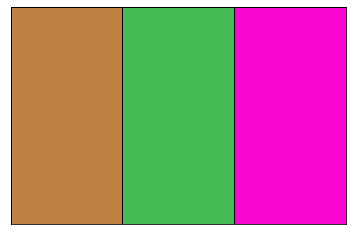

26. Good: dark purple Bad: purple


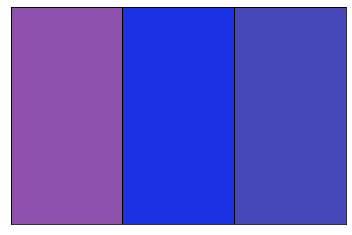

27. Good: puke green Bad: green


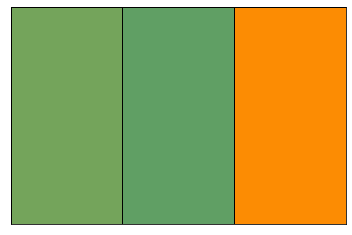

28. Good: glazed brown Bad: brown


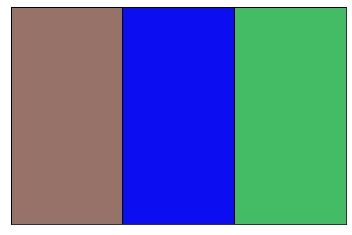

29. Good: light green Bad: green


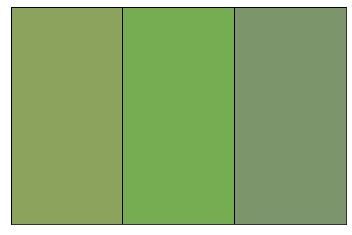

30. Good: brown Bad: a shade of red


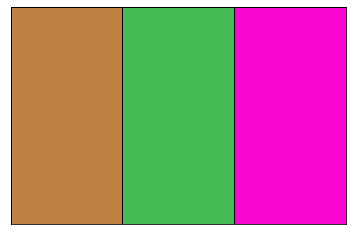

31. Good: bright violet Bad: a shade of blue


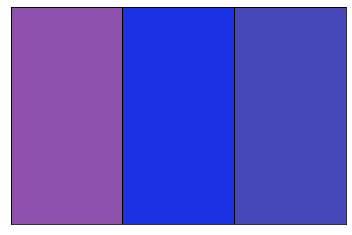

32. Good: light green Bad: green


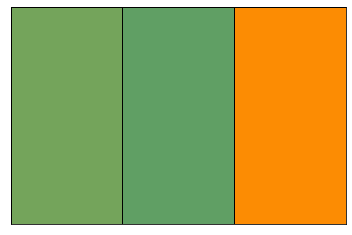

33. Good: very dark pink / brownish Bad: brown


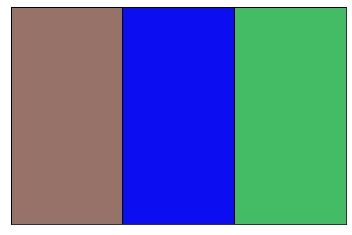

34. Good: mint, the tone of green in the middle Bad: green


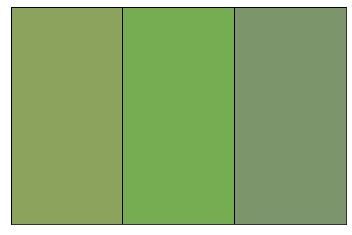

35. Good: Brown Bad: Flat


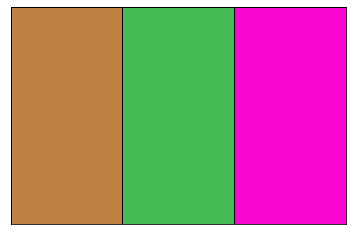

36. Good: Flat Purple Bad: Purple


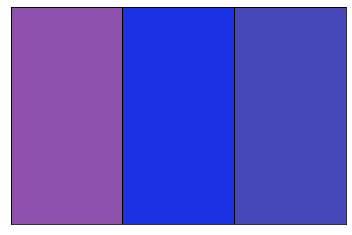

37. Good: Flat Green Bad: Green


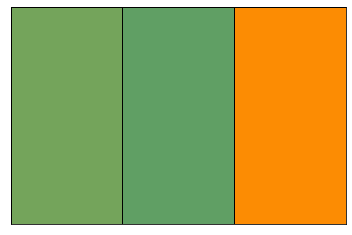

38. Good: Purple Bad: Cool


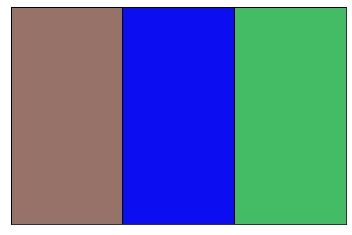

39. Good: Flat light green Bad: Green


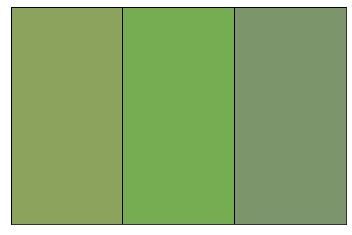

40. Good: Light Brown Bad: Brown


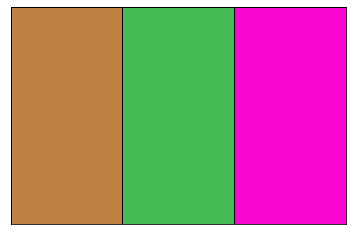

41. Good: Light Purple Bad: Purple


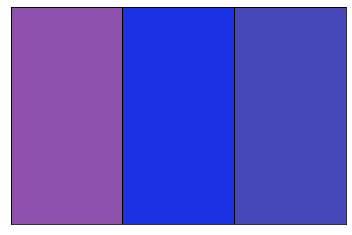

42. Good: Light Green Bad: Green


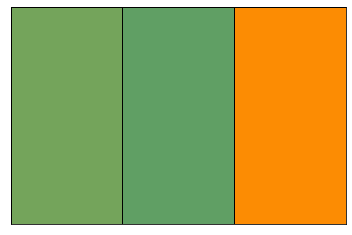

43. Good: Light Brown Bad: brown


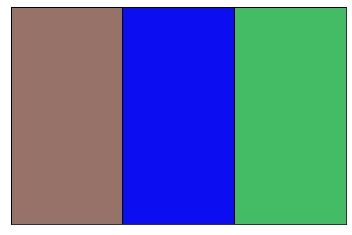

44. Good: Light Green Bad: Green


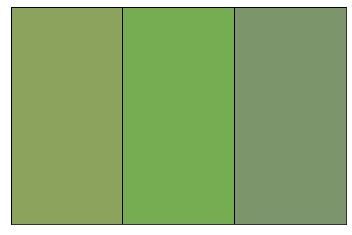

In [744]:
for i in range(25, 45):
    dev_data.display_custom_game(exp3_contexts_raw[i], "{}. Good: {} Bad: {}".format(i, exp3_good_responses_raw[i],
                                                                                exp3_bad_responses_raw[i]))

0. Good: light brown Bad: brown


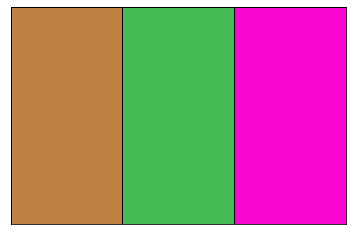

1. Good: dark purple Bad: purple


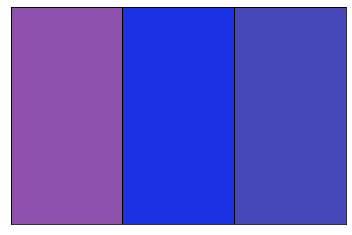

2. Good: puke green Bad: green


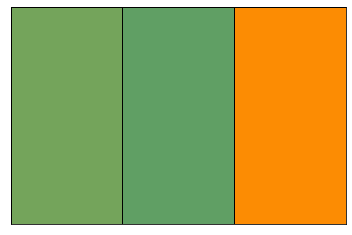

3. Good: glazed brown Bad: brown


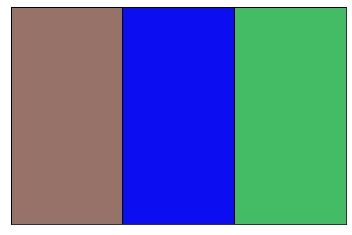

4. Good: light green Bad: green


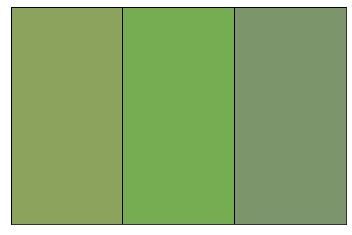

5. Good: Light Brown Bad: Bronze (This is ambiguous because it describes the both the  Dark Bronze target and the Magenta color)


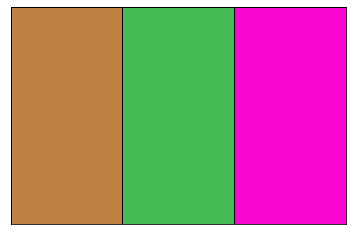

6. Good: violet Bad: Purple (This is ambiguous because it describes the both the  Purple target and the blue  color)


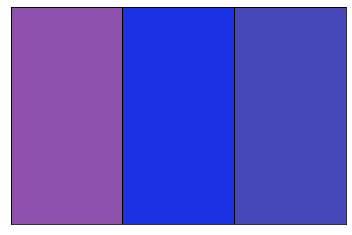

7. Good: green Bad: Emerald (This is ambiguous because it describes the both the Dark green target and the  Orange color)


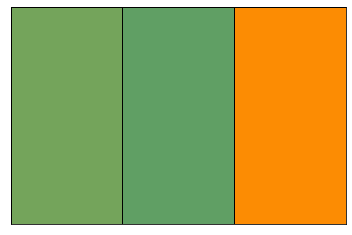

8. Good: Umber Bad: Umber (This is ambiguous because it describes the both the Light Umber target and the Dark green color)


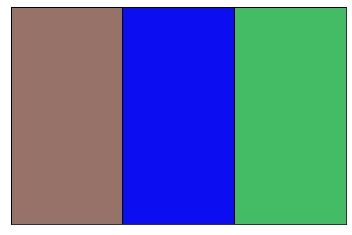

9. Good: Dark Olive Bad: Green (This is ambiguous because it describes the both the Dark Green target and the Light Green color)


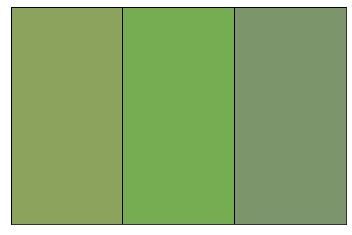

In [720]:
for i in range(0, 10):
    dev_data.display_custom_game(exp3_contexts_raw[i], "{}. Good: {} Bad: {}".format(i, exp3_good_responses_raw[i],
                                                                                exp3_bad_responses_raw[i]))

-1. Good: Bright yellow Bad: Yellow


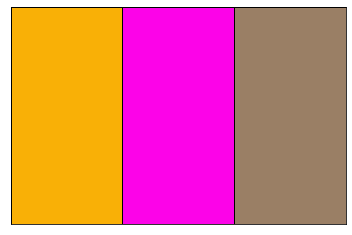

-2. Good: orange Bad: orange


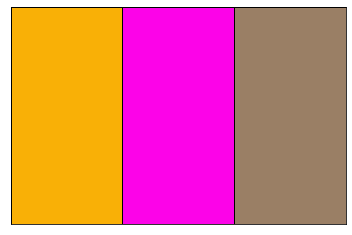

-3. Good: Bright yellow Bad: Dark Yellow


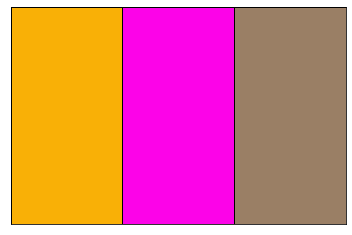

-4. Good: orange Bad: bright color


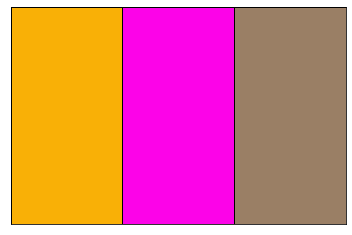

-5. Good: yellow orange Bad: bright yellow orange


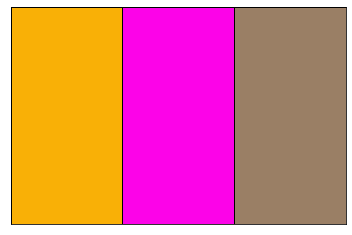

-6. Good: Pink Bad: color of rose flower


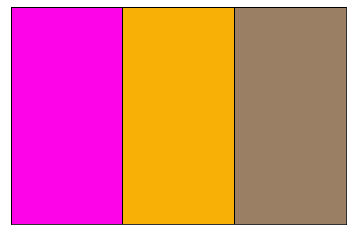

-7. Good: purple Bad: vivid color


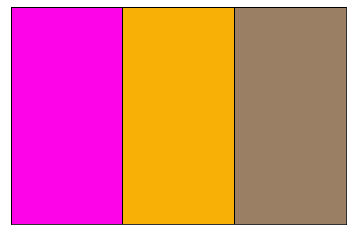

-8. Good: light pink Bad: pink


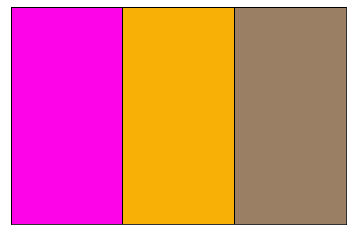

-9. Good: pink Bad: pinkish yellow


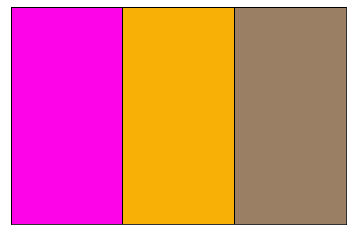

-10. Good: magenta Bad: bright


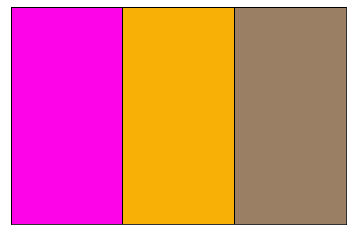

In [710]:
for i in range(-1, -11, -1):
    dev_data.display_custom_game(exp3_contexts[i], "{}. Good: {} Bad: {}".format(i, exp3_good_responses[i],
                                                                                exp3_bad_responses[i]))

110. Good: pale blue Bad: blue


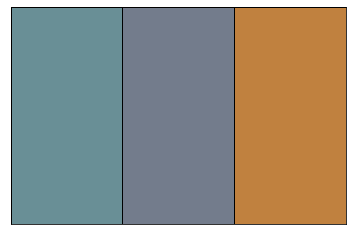

111. Good: greyish blue Bad: blue


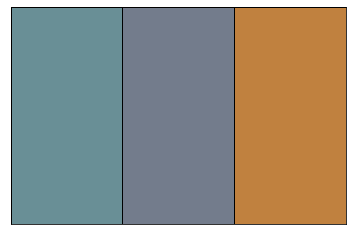

112. Good: light blue Bad: blue


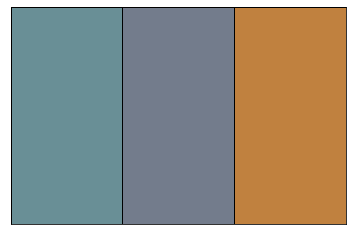

113. Good: Deep blue grey Bad: Grey


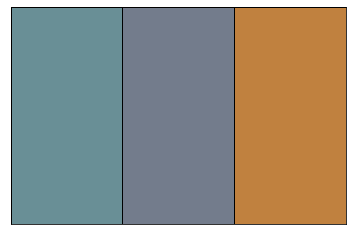

114. Good: teal Bad: blue


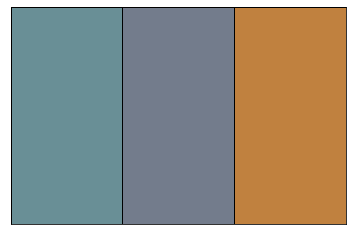

115. Good: grey, the darker color Bad: grey


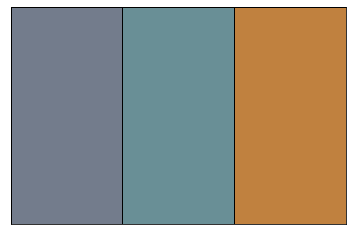

116. Good: dark gray Bad: flat


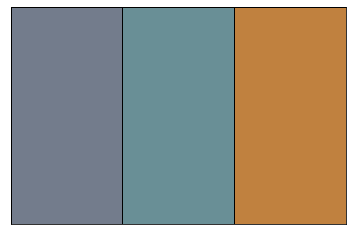

117. Good: Dark grey Bad: grey


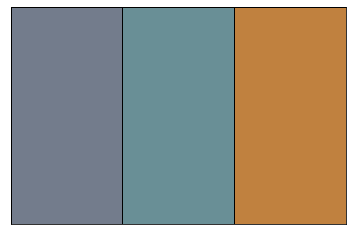

118. Good: Dark Gray Bad: Gray


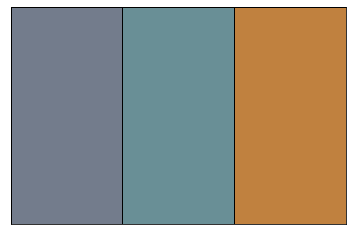

119. Good: grey-blue Bad: grey-blue


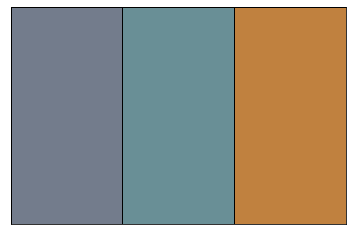

In [706]:
for i in range(110, 120):
    dev_data.display_custom_game(exp3_contexts[i], "{}. Good: {} Bad: {}".format(i, exp3_good_responses[i],exp3_bad_responses[i]))



100. Good: light gray Bad: gray


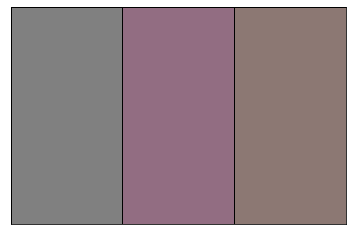

101. Good: pale blue Bad: blue


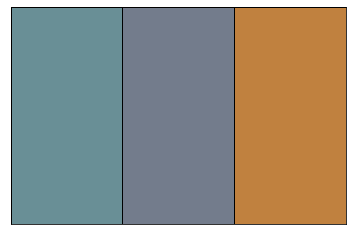

102. Good: pale purple Bad: pastel


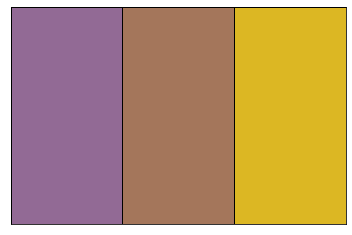

103. Good: light gray Bad: gray


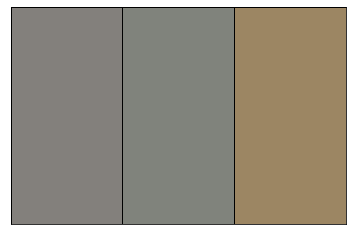

104. Good: salmon Bad: reddish


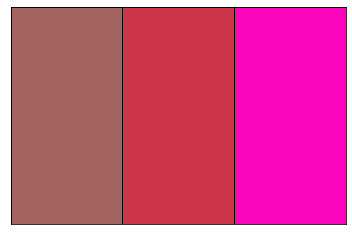

105. Good: light grey Bad: grey


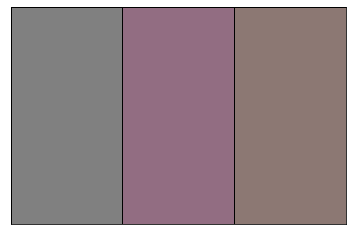

106. Good: greyish blue Bad: blue


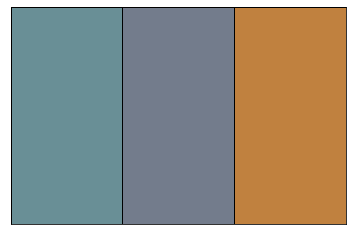

107. Good: light purple Bad: purple


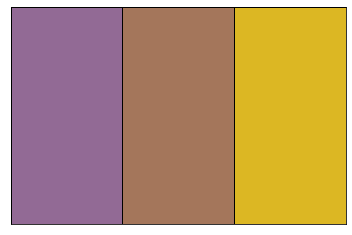

108. Good: greyish purple Bad: blue


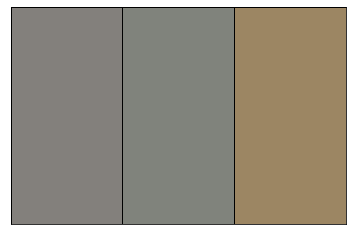

109. Good: pinkish red Bad: red


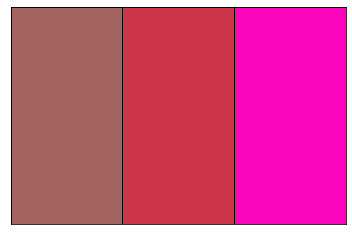

110. Good: dark gray Bad: gray


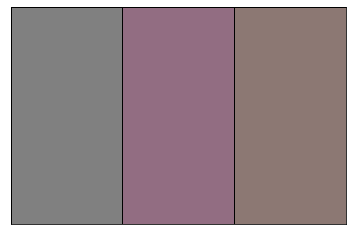

111. Good: light blue Bad: blue


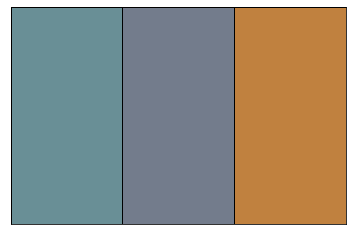

112. Good: purple Bad: flat


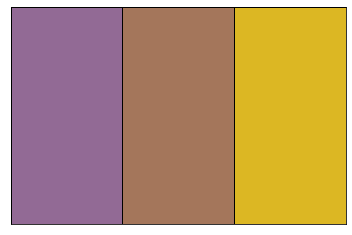

113. Good: dark gray Bad: gray


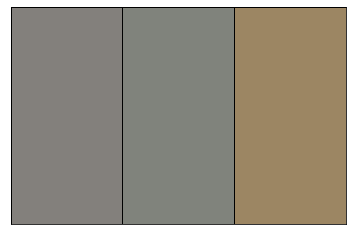

114. Good: dark red Bad: red


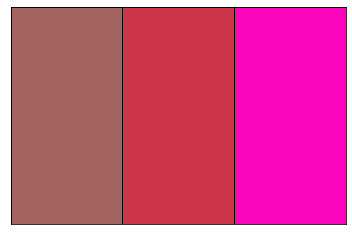

115. Good: light blue Bad: black This is ambiguous because it describes the both the violet  target and the dark blue color.


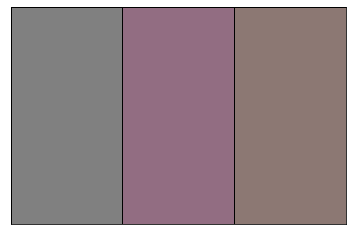

116. Good: light green Bad: light blue This is ambiguous because it describes the both the light blue target and the brown color.


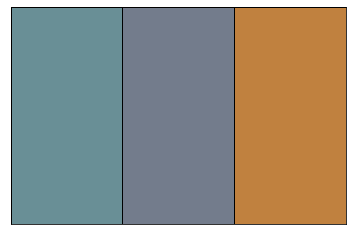

117. Good: violet Bad: violet  This is ambiguous because it describes the both the brown target and the yellow color.


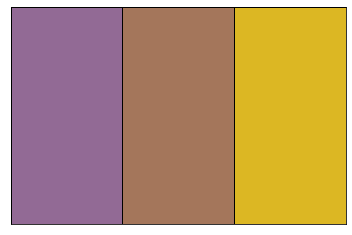

118. Good: black Bad: black This is ambiguous because it describes the both the dark blue target and the dark blue color.


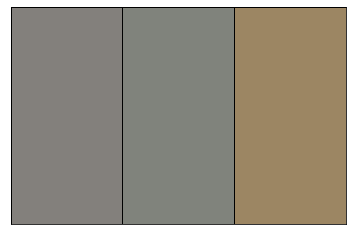

119. Good: brown Bad: brown This is ambiguous because it describes the both the pink arget and the pink color.


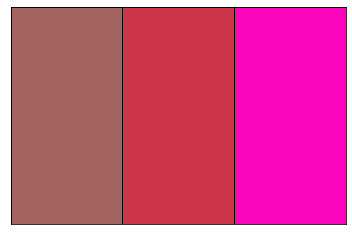

120. Good: Grey Bad: gray


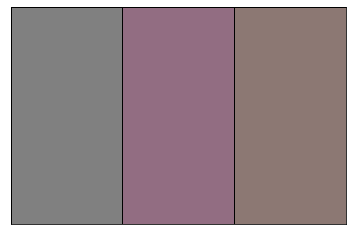

121. Good: Brown Bad: brown


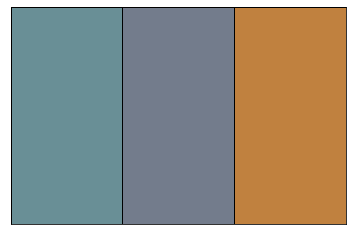

122. Good: violet Bad: yellow


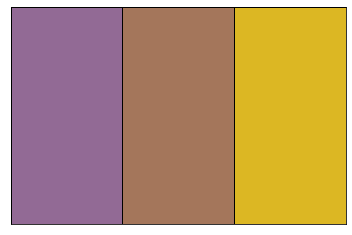

123. Good: gray Bad: grey


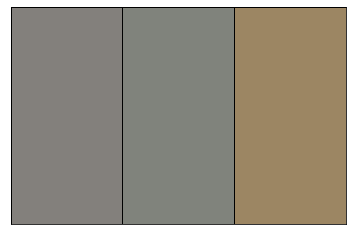

124. Good: pink Bad: pink


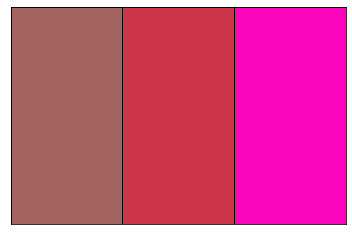

125. Good: shade of pink Bad: grey


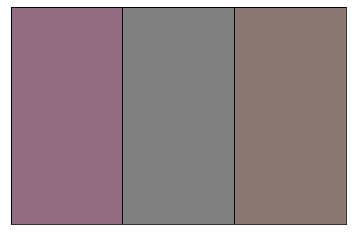

126. Good: grey, the darker color Bad: grey


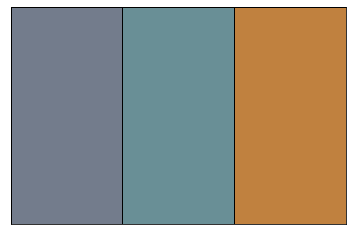

127. Good: brown Bad: light color


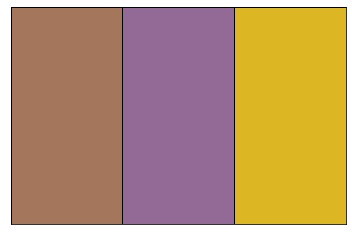

128. Good: light grey Bad: grey


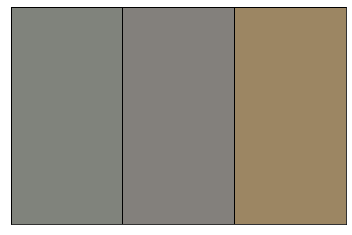

129. Good: salmon Bad: purple


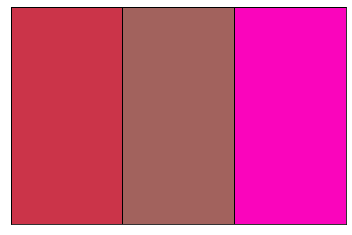

130. Good: purple gray Bad: flat


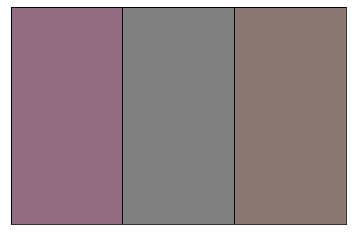

131. Good: dark gray Bad: flat


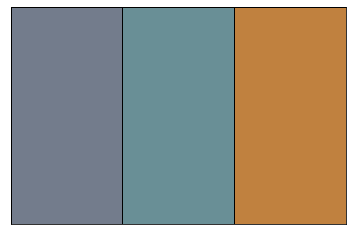

132. Good: brown Bad: flat


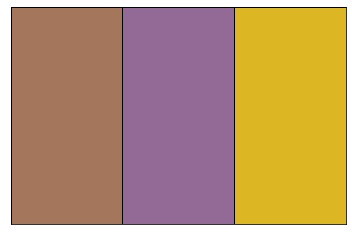

133. Good: light gray Bad: gray


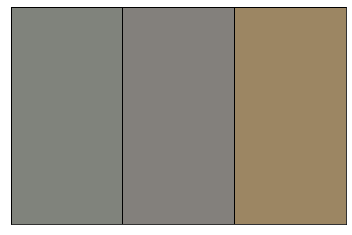

134. Good: dark red Bad: red


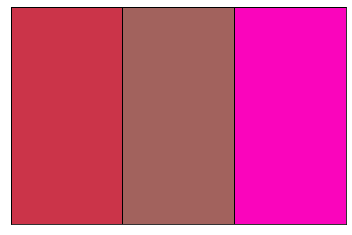

135. Good: Light brown Bad: brown


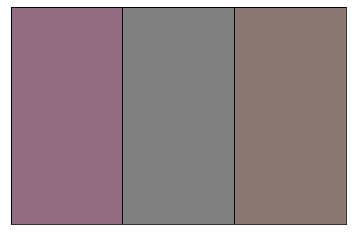

136. Good: Dark grey Bad: grey


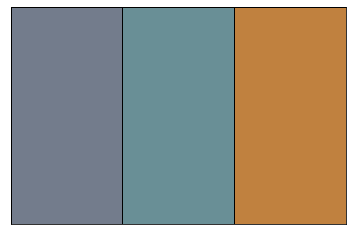

137. Good: Brownish orange Bad: orange


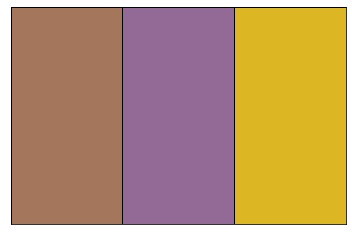

138. Good: Slate Bad: grey


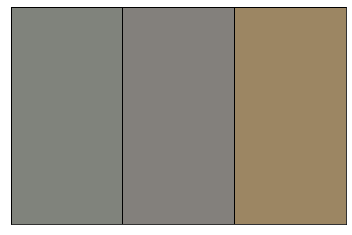

139. Good: Pale red Bad: red


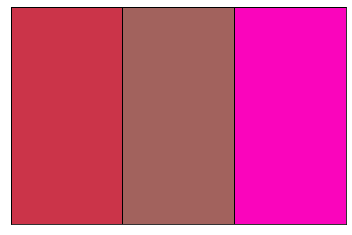

140. Good: Light purple Bad: Purple


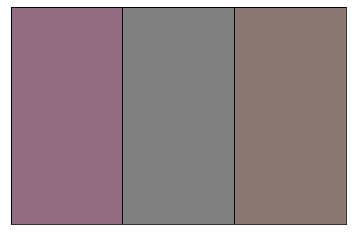

141. Good: Dark Gray Bad: Gray


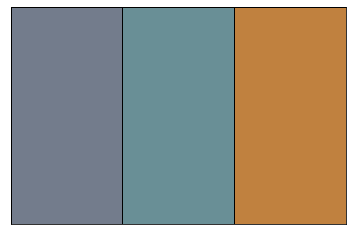

142. Good: Light brown Bad: Brown


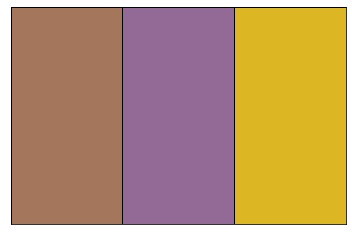

143. Good: Light gray Bad: Gray


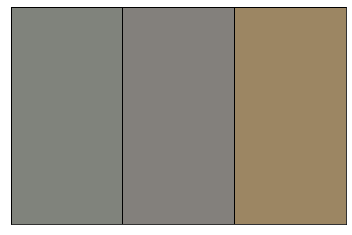

144. Good: Light red Bad: Red


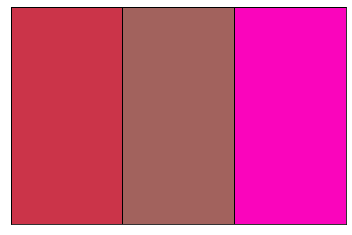

145. Good: violet Bad: violet


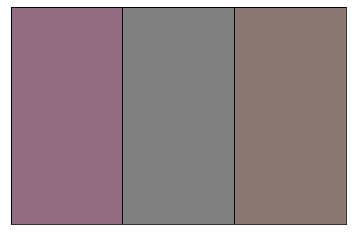

146. Good: grey-blue Bad: grey-blue


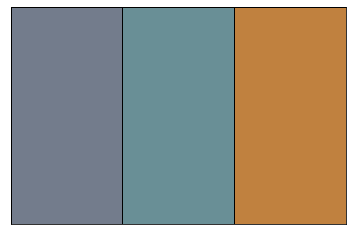

147. Good: baige Bad: baige


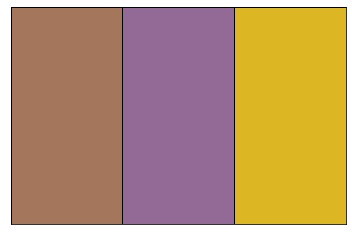

148. Good: grey Bad: grey


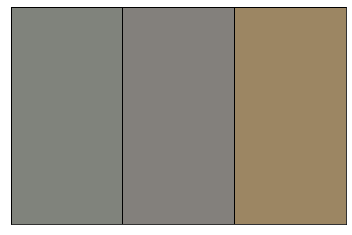

149. Good: pink Bad: pink


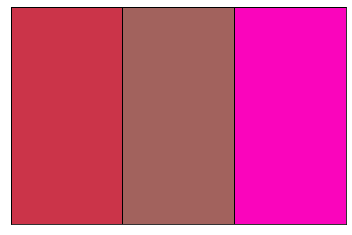

In [708]:
for i in range(100, 150):
    dev_data.display_custom_game(exp3_contexts_raw[i], "{}. Good: {} Bad: {}".format(i, exp3_good_responses_raw[i],exp3_bad_responses_raw[i]))



In [718]:
experiment_2_results.head()

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,Answer.description-bad-3,Answer.description-bad-4,Answer.description-bad-5,Answer.description-good-1,Answer.description-good-2,Answer.description-good-3,Answer.description-good-4,Answer.description-good-5,Approve,Reject
0,3KQC8JMJGCSFVANBU9EP40RRVJ13HW,310F0WGLWJA66EDET15UZKHML0QTLV,Describing Colors in Context,Provide descriptions of colors to help someone...,"color, description, art, design, paint, swatch...",$1.00,Wed Jul 24 09:08:09 PDT 2019,5,BatchId:3714541;OriginalHitTemplateId:928390876;,3600,...,green,warm,lime,btight green,darkest green,deeper green,yellow,lime yellow,NaN,NaN
1,3KQC8JMJGCSFVANBU9EP40RRVJ13HW,310F0WGLWJA66EDET15UZKHML0QTLV,Describing Colors in Context,Provide descriptions of colors to help someone...,"color, description, art, design, paint, swatch...",$1.00,Wed Jul 24 09:08:09 PDT 2019,5,BatchId:3714541;OriginalHitTemplateId:928390876;,3600,...,Green,Gold,Yellow,Bright green,Dull green,Light-ish green,Dull gold,Bright greenish-yellow,NaN,NaN
2,3KQC8JMJGCSFVANBU9EP40RRVJ13HW,310F0WGLWJA66EDET15UZKHML0QTLV,Describing Colors in Context,Provide descriptions of colors to help someone...,"color, description, art, design, paint, swatch...",$1.00,Wed Jul 24 09:08:09 PDT 2019,5,BatchId:3714541;OriginalHitTemplateId:928390876;,3600,...,green,vibrant,yellow,bright green,wheat like,pale green,burnt orange,bright yellow,NaN,NaN
3,3KQC8JMJGCSFVANBU9EP40RRVJ13HW,310F0WGLWJA66EDET15UZKHML0QTLV,Describing Colors in Context,Provide descriptions of colors to help someone...,"color, description, art, design, paint, swatch...",$1.00,Wed Jul 24 09:08:09 PDT 2019,5,BatchId:3714541;OriginalHitTemplateId:928390876;,3600,...,green,not blue,yellowish,bright green,moss green,darker green,orange,neon yellow,NaN,NaN
4,3KQC8JMJGCSFVANBU9EP40RRVJ13HW,310F0WGLWJA66EDET15UZKHML0QTLV,Describing Colors in Context,Provide descriptions of colors to help someone...,"color, description, art, design, paint, swatch...",$1.00,Wed Jul 24 09:08:09 PDT 2019,5,BatchId:3714541;OriginalHitTemplateId:928390876;,3600,...,Green,Brown,Yellow,Neon Green,Dark Green,Forest Green,Mud Brown,Lemon Yellow,NaN,NaN


In [725]:
experiment_3_results.head()

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,Answer.description-bad-3,Answer.description-bad-4,Answer.description-bad-5,Answer.description-good-1,Answer.description-good-2,Answer.description-good-3,Answer.description-good-4,Answer.description-good-5,Approve,Reject
0,3JUDR1D0D6R3NLQV9ZNEU4E0GTRQ20,310F0WGLWJA66EDET15UZKHML0QTLV,Describing Colors in Context,Provide descriptions of colors to help someone...,"color, description, art, design, paint, swatch...",$1.00,Thu Jul 25 09:59:09 PDT 2019,5,BatchId:3715855;OriginalHitTemplateId:928390876;,3600,...,rosybrown,dark silver,brown,dark violet,sky blue,brown,grey,brown,NaN,NaN
1,3JUDR1D0D6R3NLQV9ZNEU4E0GTRQ20,310F0WGLWJA66EDET15UZKHML0QTLV,Describing Colors in Context,Provide descriptions of colors to help someone...,"color, description, art, design, paint, swatch...",$1.00,Thu Jul 25 09:59:09 PDT 2019,5,BatchId:3715855;OriginalHitTemplateId:928390876;,3600,...,flat,flat,brown,dark purple,dark blue,gray,dark gray,brown,NaN,NaN
2,3JUDR1D0D6R3NLQV9ZNEU4E0GTRQ20,310F0WGLWJA66EDET15UZKHML0QTLV,Describing Colors in Context,Provide descriptions of colors to help someone...,"color, description, art, design, paint, swatch...",$1.00,Thu Jul 25 09:59:09 PDT 2019,5,BatchId:3715855;OriginalHitTemplateId:928390876;,3600,...,not too bright color,grey,dark color,bright violet,darker shade of blue,grey,darker shade of grey,brownish,NaN,NaN
3,3JUDR1D0D6R3NLQV9ZNEU4E0GTRQ20,310F0WGLWJA66EDET15UZKHML0QTLV,Describing Colors in Context,Provide descriptions of colors to help someone...,"color, description, art, design, paint, swatch...",$1.00,Thu Jul 25 09:59:09 PDT 2019,5,BatchId:3715855;OriginalHitTemplateId:928390876;,3600,...,Brown,Pale,Dull,Dark purple,Pale blue,Brown,Grey,Brown,NaN,NaN
4,3JUDR1D0D6R3NLQV9ZNEU4E0GTRQ20,310F0WGLWJA66EDET15UZKHML0QTLV,Describing Colors in Context,Provide descriptions of colors to help someone...,"color, description, art, design, paint, swatch...",$1.00,Thu Jul 25 09:59:09 PDT 2019,5,BatchId:3715855;OriginalHitTemplateId:928390876;,3600,...,Brown,Gray,Brown,Thick purple,Thick blue,Thin brown,Thin gray,Thin brown,NaN,NaN


In [745]:
experiment_2_3_results = experiment_2_results.append(experiment_3_results, ignore_index=True)

In [746]:
exp2_3_contexts_raw, exp2_3_good_responses_raw, exp2_3_bad_responses_raw = get_results(experiment_2_3_results)

In [747]:
exp2_3_contexts, exp2_3_good_responses, exp2_3_bad_responses = results_to_responses(experiment_2_3_results)

170


150. Good: Sky blue Bad: blue


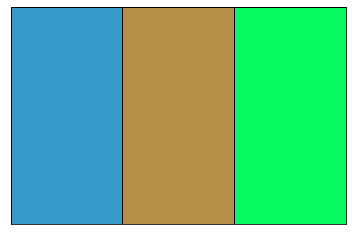

151. Good: light blue Bad: blue


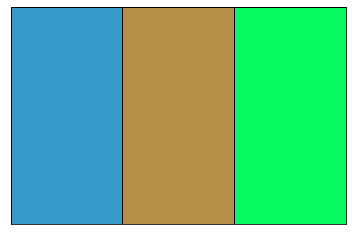

152. Good: blue Bad: light color


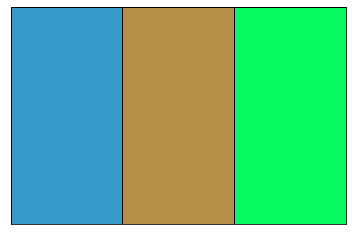

153. Good: dark blue Bad: blue


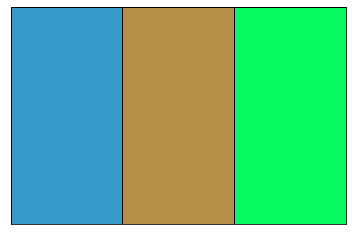

154. Good: Blue in the mid range Bad: Shaded blue


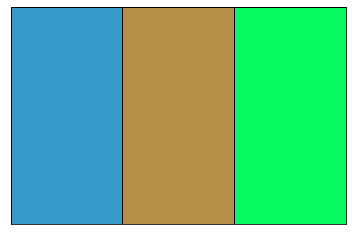

155. Good: Tan colored Bad: Dingy colored


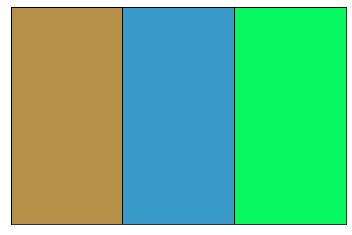

156. Good: Dull orange Bad: Orange


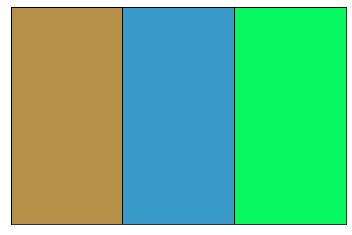

157. Good: brown Bad: brownish blue


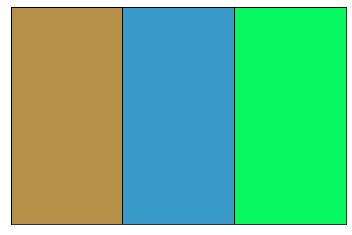

158. Good: brown Bad: not vivid color


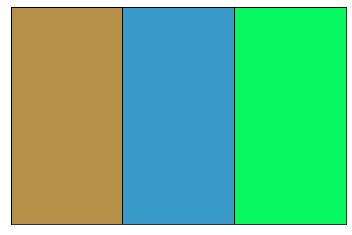

159. Good: light brown Bad: light


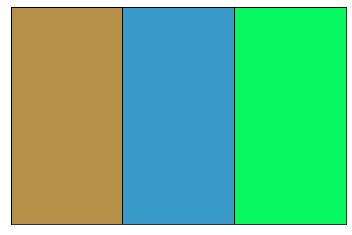

160. Good: Saturated green Bad: green


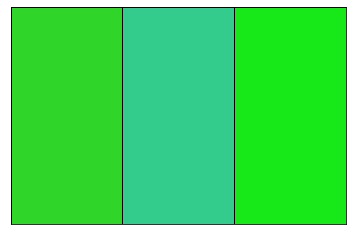

161. Good: light green Bad: greeen


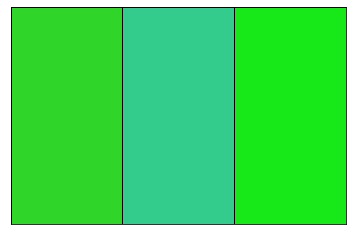

162. Good: clearer shade of green, but not bright Bad: green


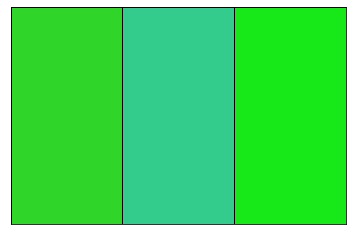

163. Good: dark green Bad: green


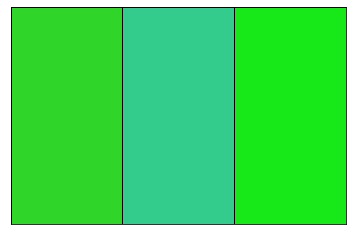

164. Good: Green more like grass not teal Bad: Frogs


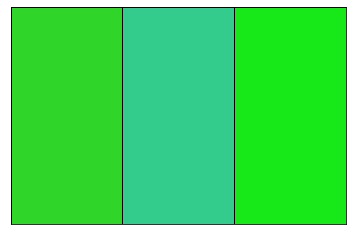

165. Good: Blue green Bad: Light green


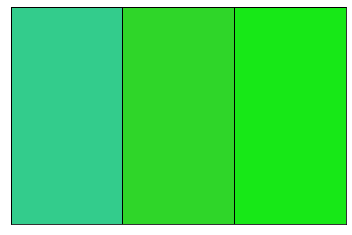

166. Good: Aqua green Bad: Green


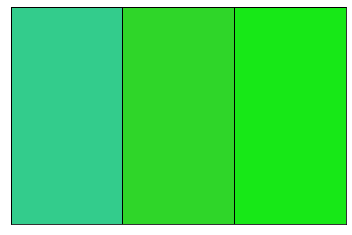

167. Good: medium green Bad: green


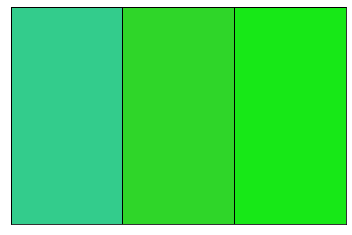

168. Good: mint, a not vivid green Bad: green


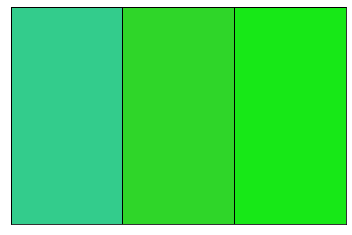

169. Good: turquoise green Bad: green


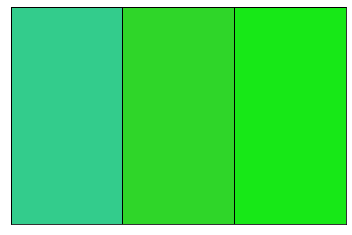

In [732]:
for i in range(150, 170):
    dev_data.display_custom_game(exp3_contexts[i], "{}. Good: {} Bad: {}".format(i, exp3_good_responses[i],exp3_bad_responses[i]))



In [748]:
exp2_3_df = create_dataframe(exp2_3_contexts, exp2_3_good_responses, exp2_3_bad_responses)

In [749]:
combined_data_df = augmented_data_df.append(exp2_3_df, ignore_index=True)

In [750]:
combined_data_df.shape

(2700, 37)

In [751]:
combined_data_df.to_csv("../data/csv/mturk_augmented_data_exp123.csv", index=False)

In [752]:
# fourth day of data
## ok, let's test out this pipeline on EVEN MORE DATA
experiment_4_results = pd.read_csv("../data/mturk/exp_7_26_2019_results.csv")

In [754]:
exp4_contexts_raw, exp4_good_responses_raw, exp4_bad_responses_raw = get_results(experiment_4_results)

In [755]:
exp4_contexts, exp4_good_responses, exp4_bad_responses = results_to_responses(experiment_4_results)

90


In [ ]:
# Bad (raw) rounds I'd get wrong: 
# 5 - dark blue? 
# 142
# 174
# 293
# 310
# 318 [315 to 320] is the one that doesn't understand what's being asked.
# 333
# 361
# 397
# 442

0. Good: Light, flat blue Bad: Blue


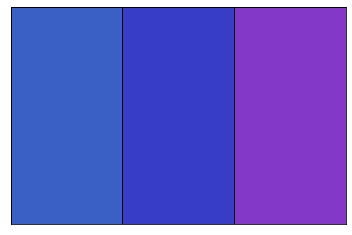

1. Good: Flat purple Bad: Purple


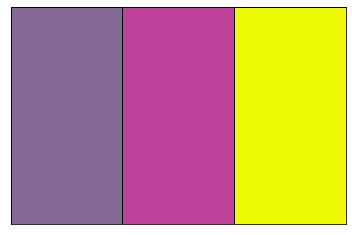

2. Good: Gray Bad: Flat


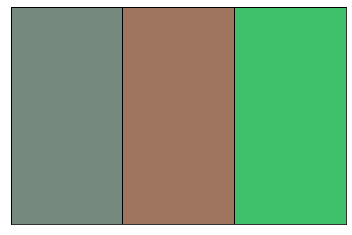

3. Good: Flat gray, darkest Bad: Gray


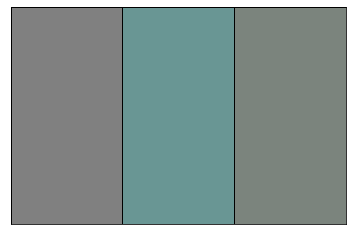

4. Good: Matte purple Bad: Purple


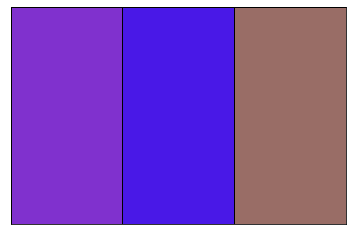

5. Good: Dark blue Bad: blue


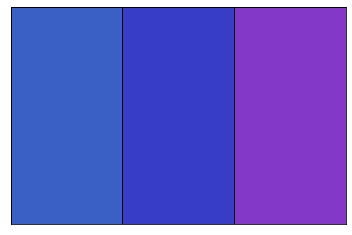

6. Good: Dark purple Bad: purple


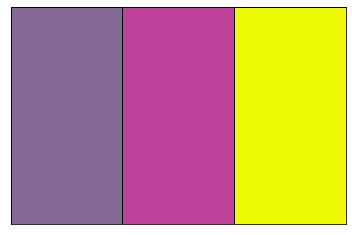

7. Good: Forrest Green Bad: green


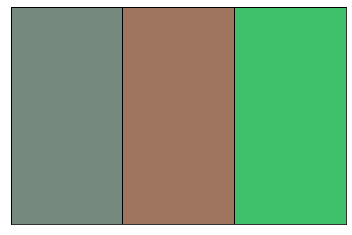

8. Good: Dark Grey Bad: grey


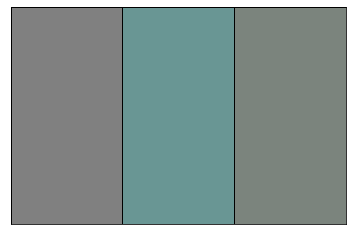

9. Good: Bright purple Bad: purple


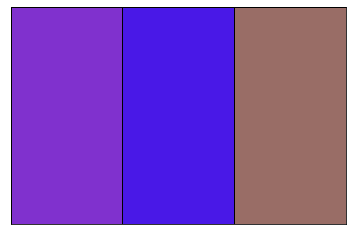

10. Good: It's like the sky during the day. Bad: Blue


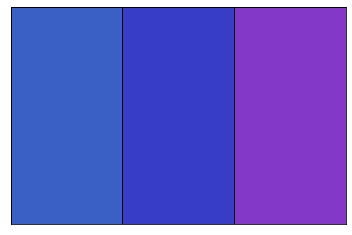

11. Good: It resembles the grimace from McDonalds commercials Bad: Purple


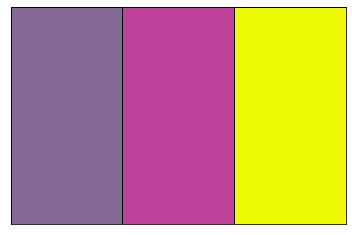

12. Good: Reminds me of a clay pottery Bad: Grey


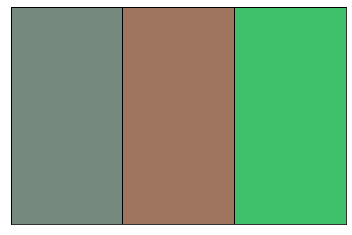

13. Good: Similar to smoke color Bad: Grey


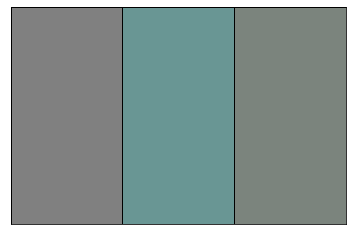

14. Good: Grapes would be a lovely comparison Bad: Purple


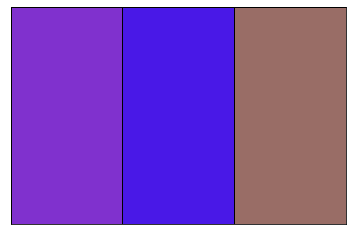

15. Good: primary blue Bad: blue


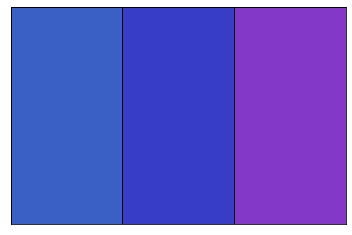

16. Good: pastel purple Bad: purple


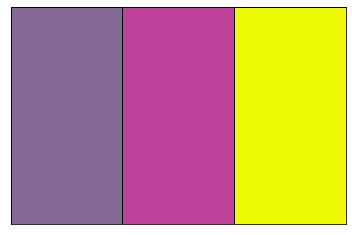

17. Good: light green Bad: green


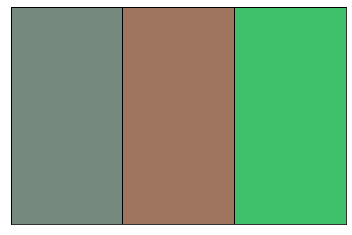

18. Good: regular gray Bad: gray


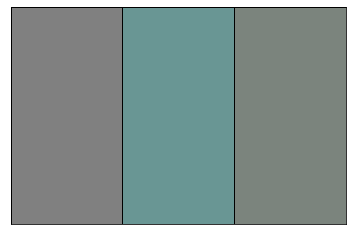

19. Good: deep purple Bad: magenta


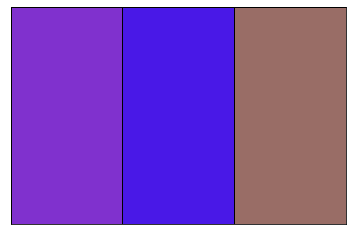

20. Good: light blue Bad: blue


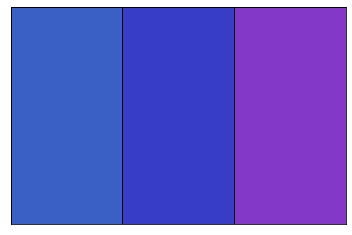

21. Good: dark purple Bad: purple


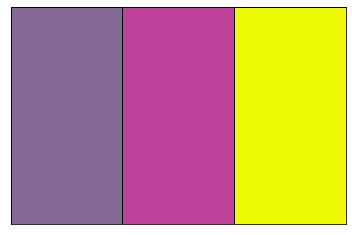

22. Good: dark grey Bad: green


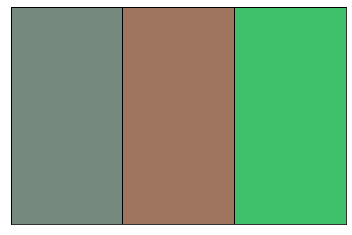

23. Good: gray Bad: gray


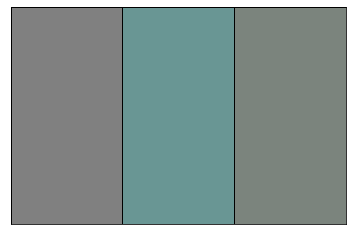

24. Good: purple Bad: dark purple


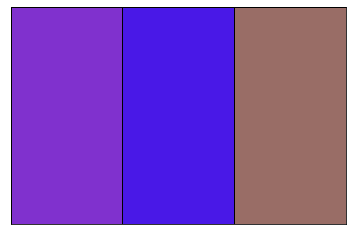

25. Good: Medium Blue Bad: Blue


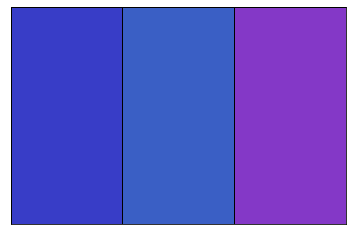

26. Good: Fuschia Bad: purply


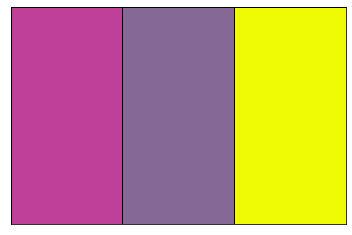

27. Good: Light Brown Bad: neutral


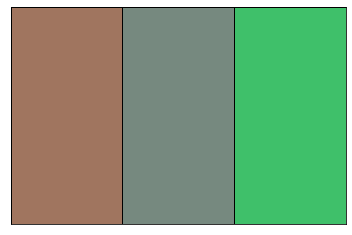

28. Good: Grayish Teal Bad: grayish


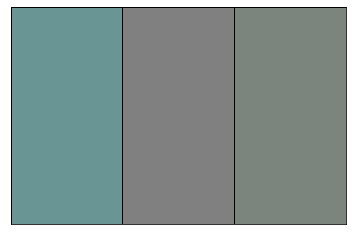

29. Good: Bright Blue Bad: bright


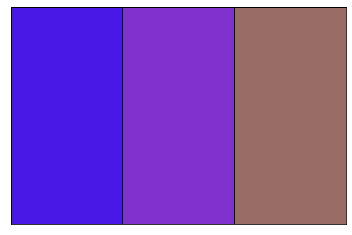

30. Good: Dark Blue Bad: Blue


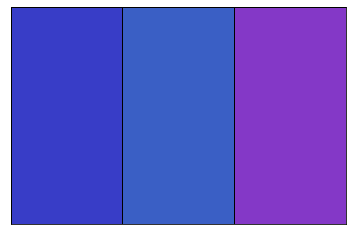

31. Good: Light Purple Bad: Purple


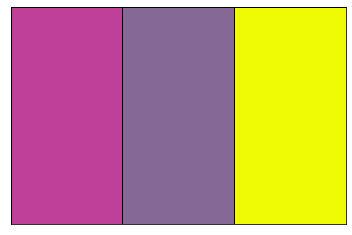

32. Good: Light Brown Bad: Brown


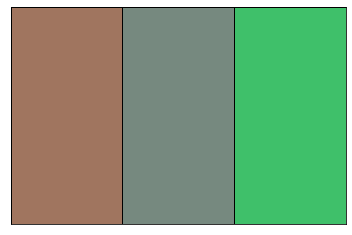

33. Good: Light Greenish Blue Bad: Green


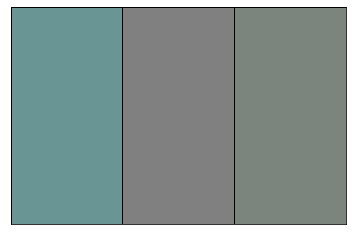

34. Good: Bright Blue Bad: Blue


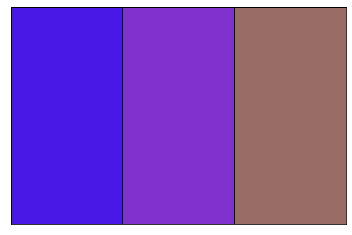

35. Good: DARK BLUE Bad: BLUE


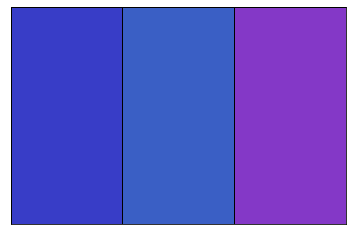

36. Good: PINK Bad: RED


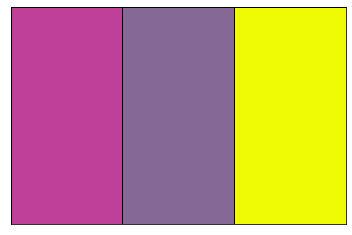

37. Good: TAN Bad: BROWN


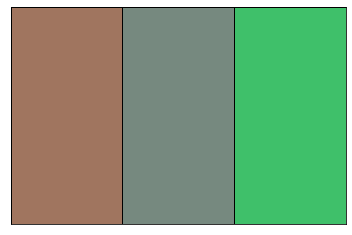

38. Good: GREENEST Bad: GREEN


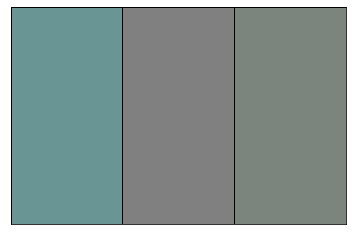

39. Good: DARK PURPLE Bad: PURPLE


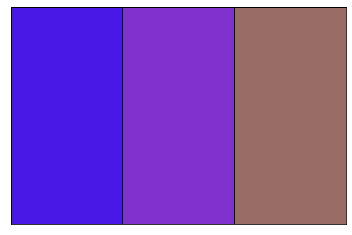

40. Good: dark blue Bad: blue


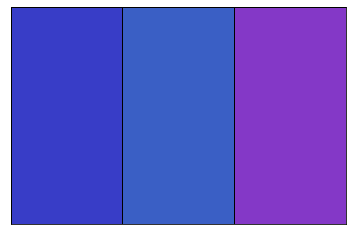

41. Good: bright pink Bad: not bright


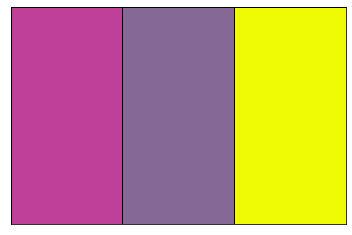

42. Good: tan Bad: neutral


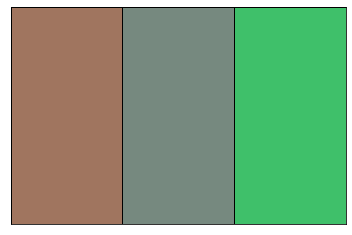

43. Good: light green Bad: dull


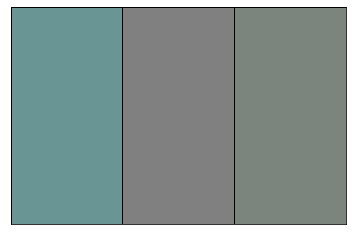

44. Good: blue Bad: deep


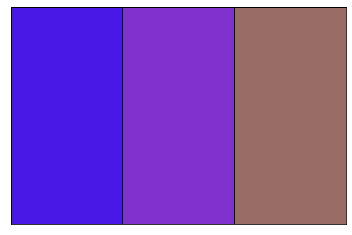

45. Good: dark blue Bad: blue


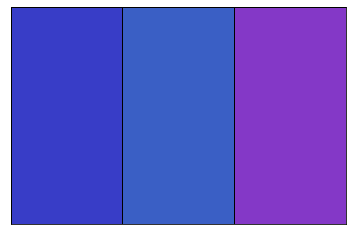

46. Good: magenta Bad: pink


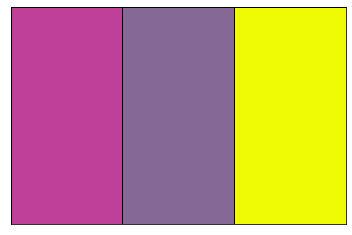

47. Good: brown Bad: brown


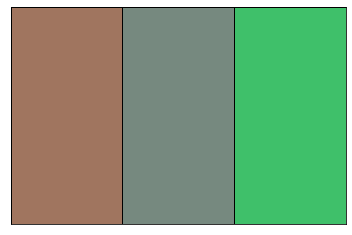

48. Good: green Bad: green


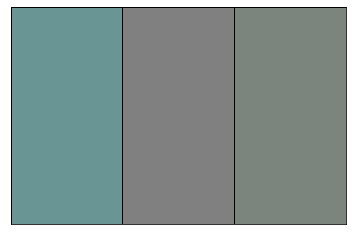

49. Good: blue Bad: blue


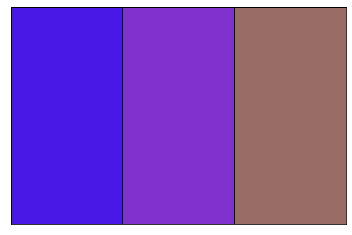

50. Good: sea green Bad: green


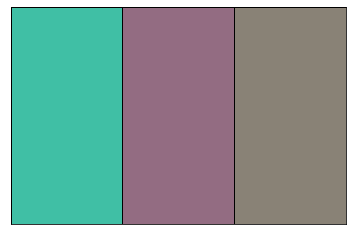

51. Good: olive green Bad: green


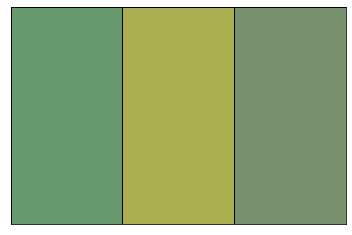

52. Good: magenta Bad: pink


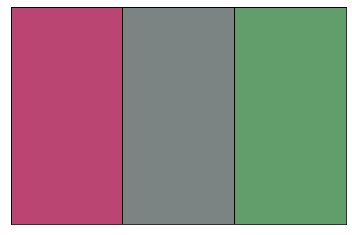

53. Good: sage green Bad: green


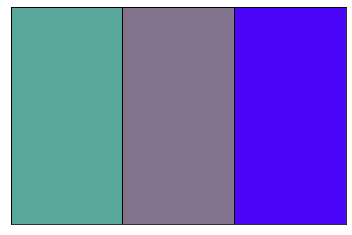

54. Good: the color of pea soup Bad: green


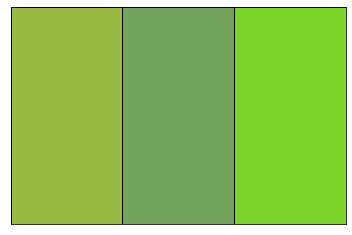

55. Good: green Bad: bright


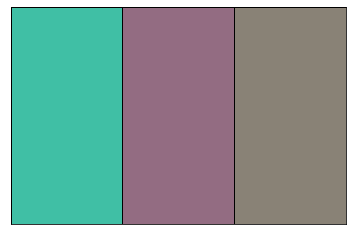

56. Good: bright medium olive green Bad: green


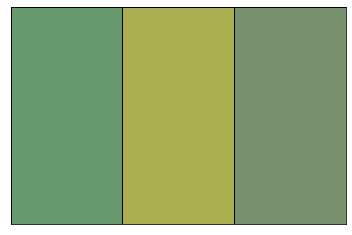

57. Good: fuschia Bad: bright


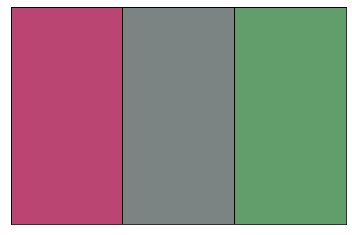

58. Good: teal Bad: bluish


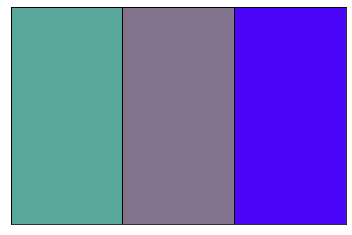

59. Good: pea green Bad: green


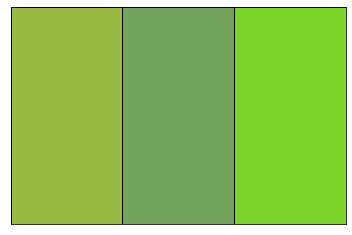

60. Good: Teal Bad: Pale


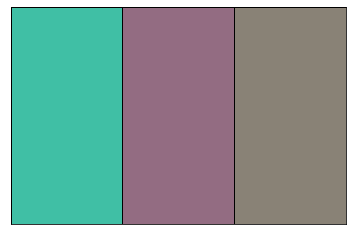

61. Good: Middle green Bad: Green


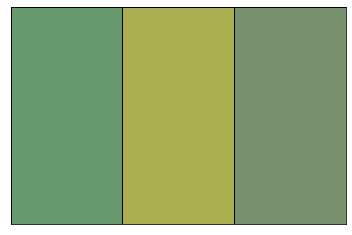

62. Good: Fuschia Bad: Matte


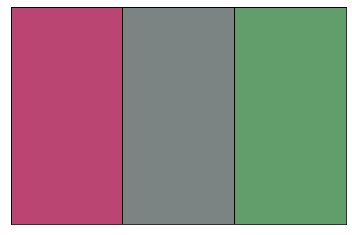

63. Good: teal Bad: Blue


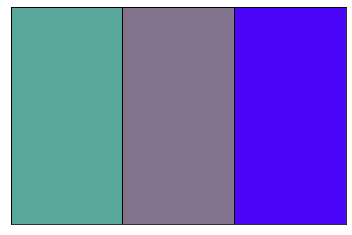

64. Good: Yellowish-green Bad: Green


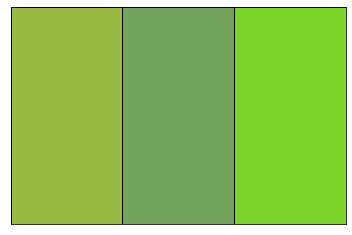

65. Good: turquoise Bad: blue


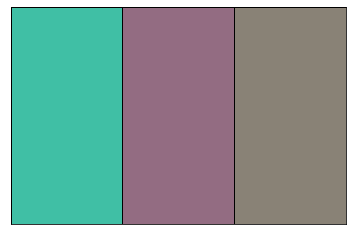

66. Good: mint green Bad: green


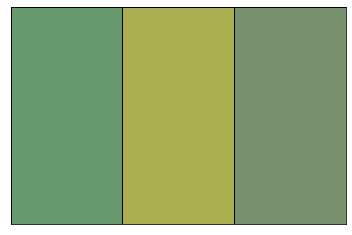

67. Good: magenta Bad: purple


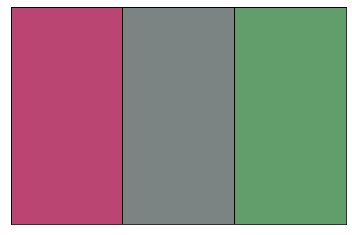

68. Good: turquoise Bad: blue


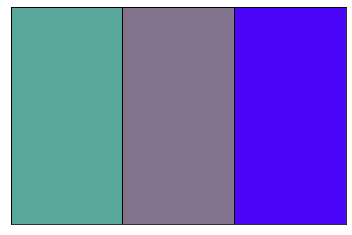

69. Good: yellow Bad: green


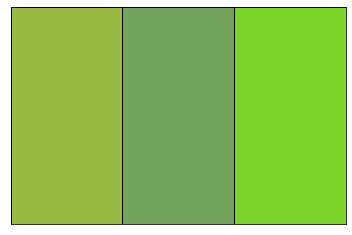

70. Good: Light green Bad: green


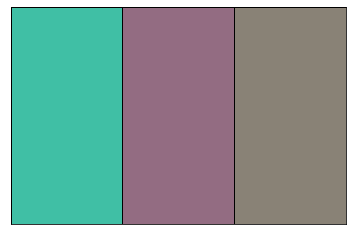

71. Good: Dark green Bad: green


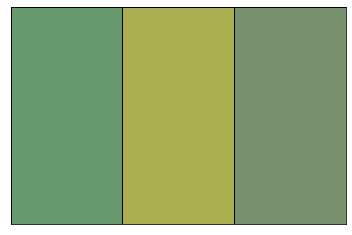

72. Good: magenta purple Bad: purple


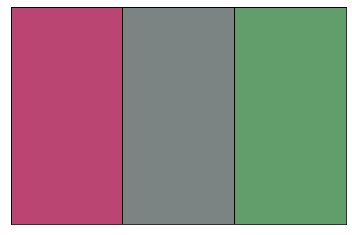

73. Good: blue green Bad: green


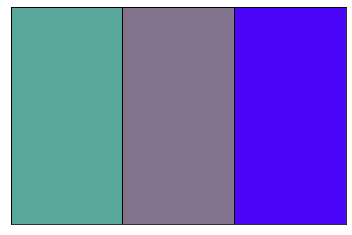

74. Good: grass green Bad: green


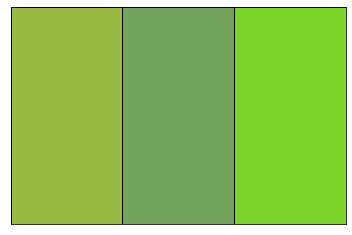

75. Good: purple Bad: medium color


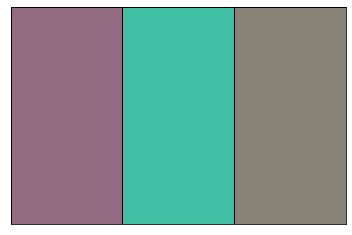

76. Good: light green Bad: green


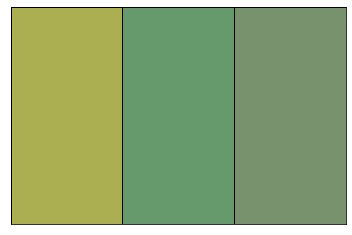

77. Good: gray Bad: bright color


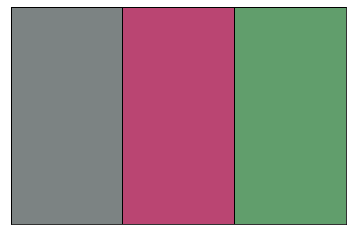

78. Good: purple Bad: dark


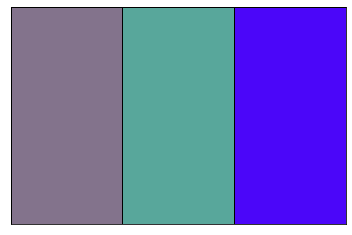

79. Good: forest green Bad: green


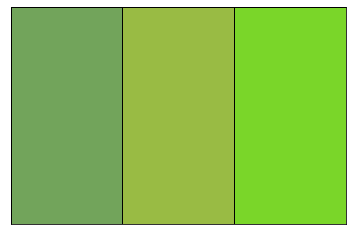

80. Good: pale pink Bad: purple


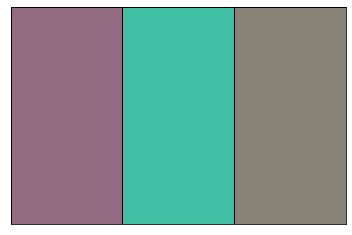

81. Good: pale yellow Bad: yellow


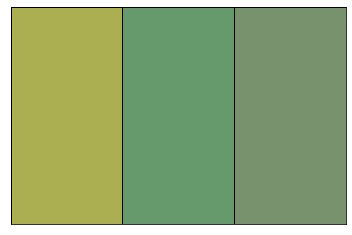

82. Good: stone grey Bad: grey


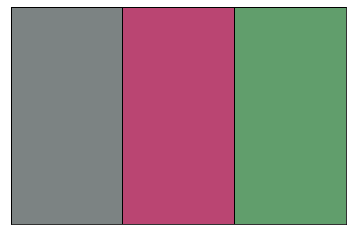

83. Good: grey purple Bad: grey


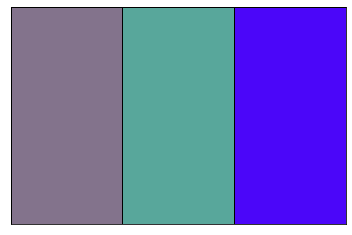

84. Good: pale green Bad: green


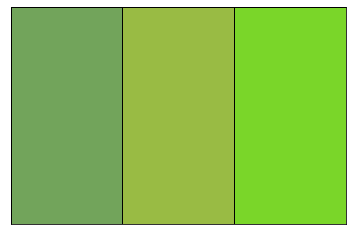

85. Good: Dark purple Bad: Dark


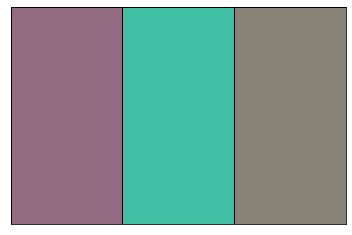

86. Good: Mustard Bad: Light green


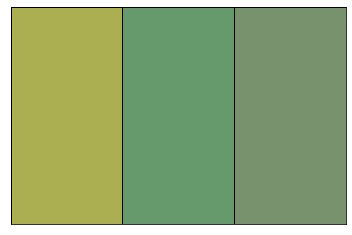

87. Good: Grey Bad: Gray


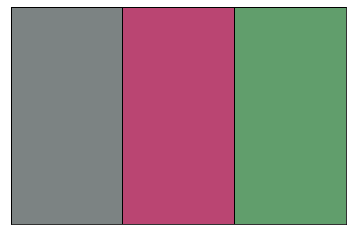

88. Good: Dark Purple Bad: Dark blue


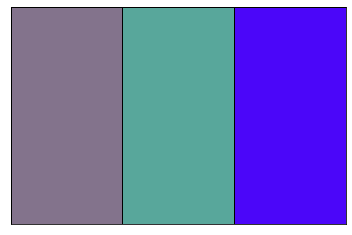

89. Good: Artichoke green Bad: Green


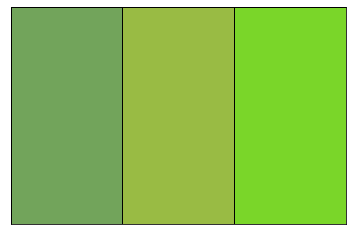

90. Good: purple Bad: purple


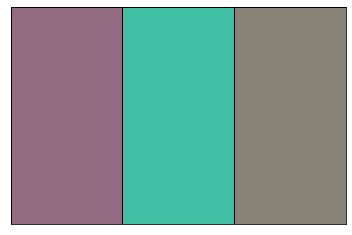

91. Good: light green Bad: yellowish green


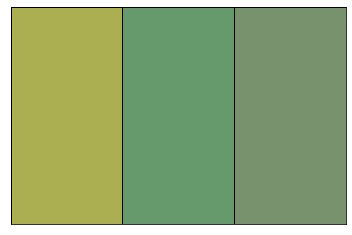

92. Good: grey Bad: grey


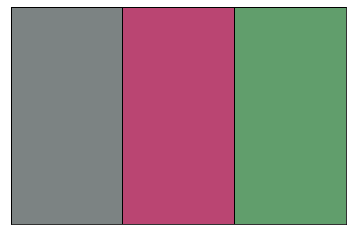

93. Good: light purple Bad: light purple


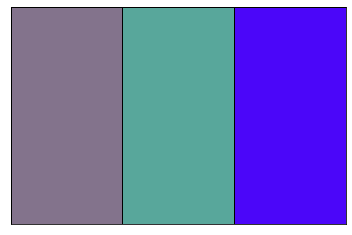

94. Good: dark green Bad: dark green


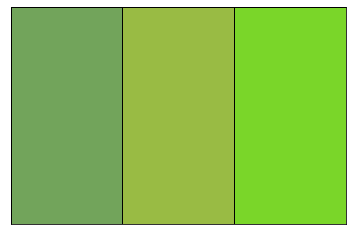

95. Good: mauve Bad: pink


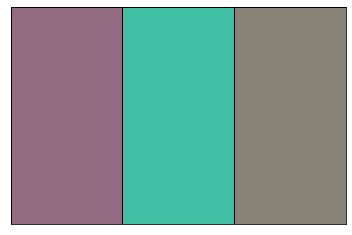

96. Good: pea green Bad: green


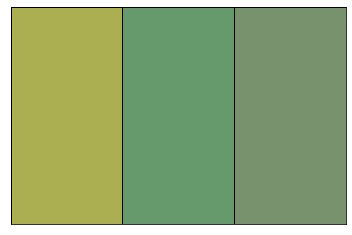

97. Good: gray Bad: gray


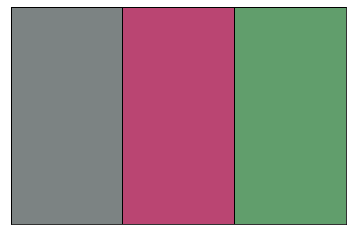

98. Good: purple gray Bad: gray


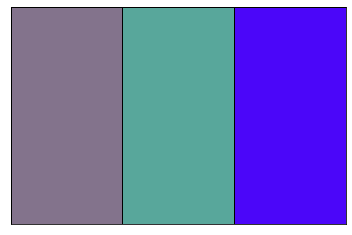

99. Good: camo green Bad: green


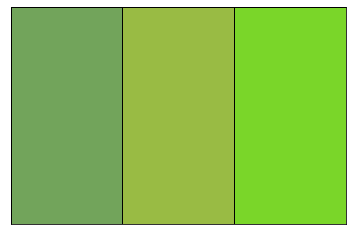

100. Good: light Turquoise Bad: blue


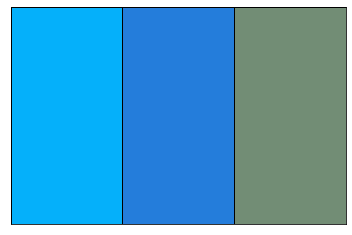

101. Good: neon green Bad: green


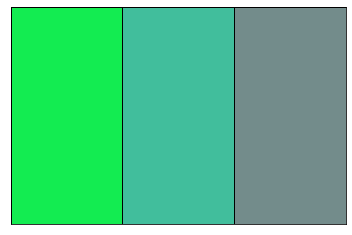

102. Good: bright neon green Bad: green


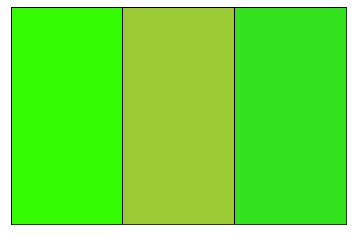

103. Good: true purple Bad: purple


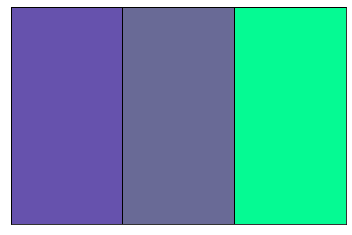

104. Good: grey Bad: a color


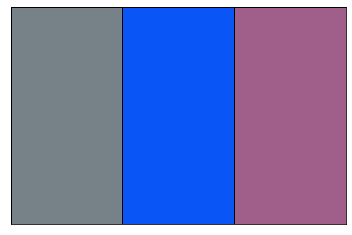

105. Good: sky blue Bad: blue


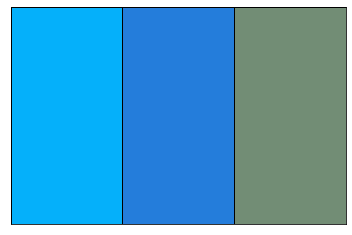

106. Good: light green Bad: green


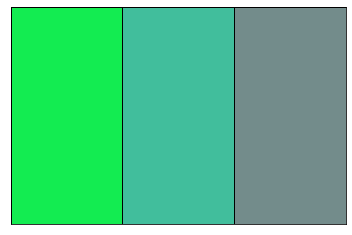

107. Good: neon green Bad: green


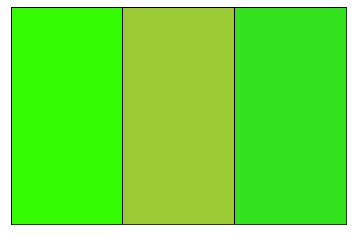

108. Good: violet purple Bad: purple


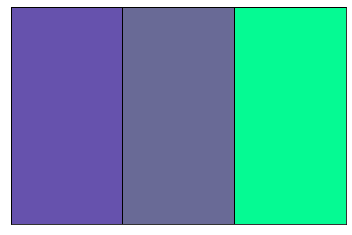

109. Good: medium gray Bad: gray


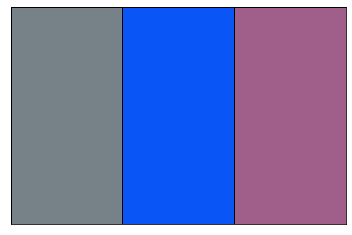

110. Good: sky blue Bad: blue


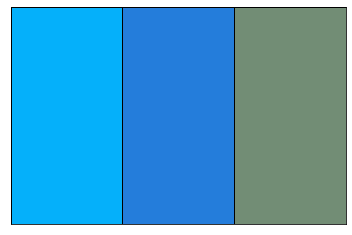

111. Good: light green Bad: green


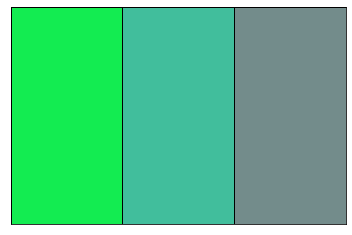

112. Good: light green Bad: green


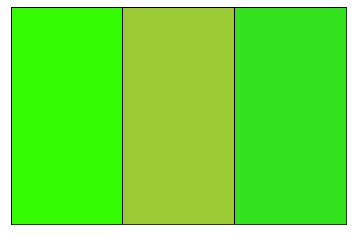

113. Good: dark blue Bad: blue


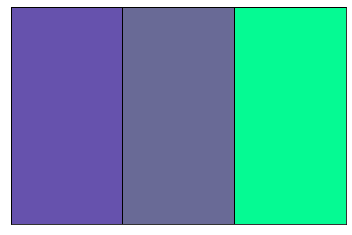

114. Good: dark grey Bad: grey


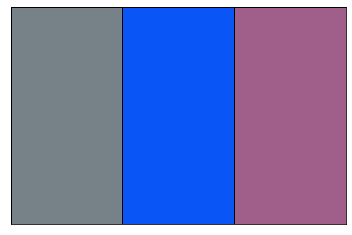

115. Good: light blue Bad: blue


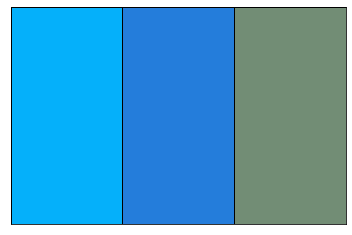

116. Good: light green Bad: green


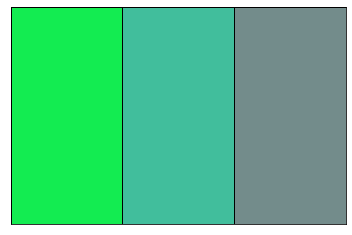

117. Good: light green Bad: green


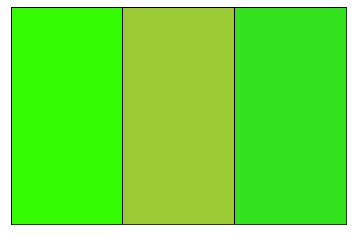

118. Good: dark purple Bad: purple


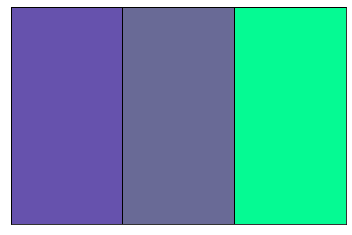

119. Good: gray Bad: dark gray


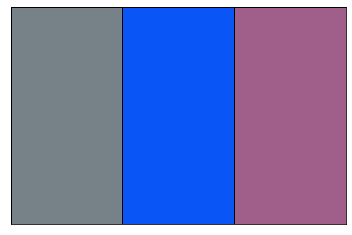

120. Good: Blue Bad: Blue


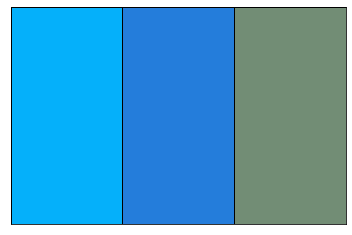

121. Good: Green Bad: Green


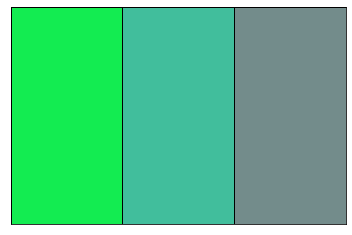

122. Good: Neon Green Bad: Green


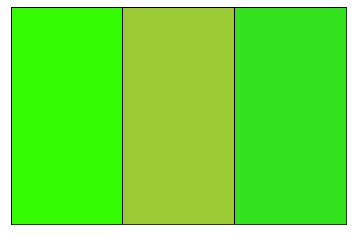

123. Good: Dark Purple Bad: purple


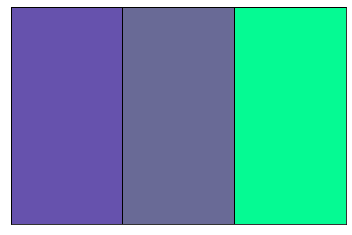

124. Good: Grey Bad: grey


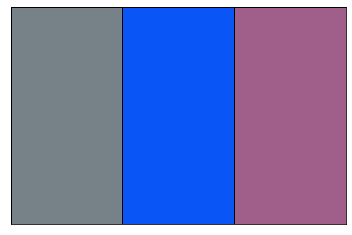

125. Good: dark blue Bad: blue


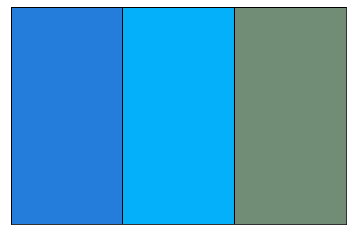

126. Good: sea green Bad: green


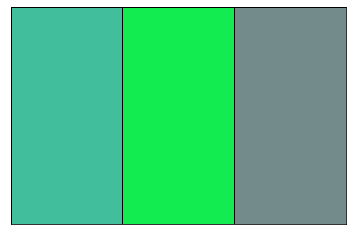

127. Good: pea green Bad: green


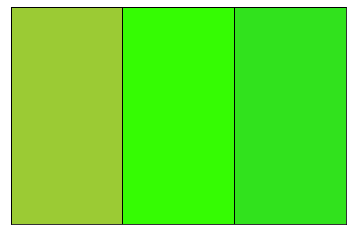

128. Good: gray Bad: purple


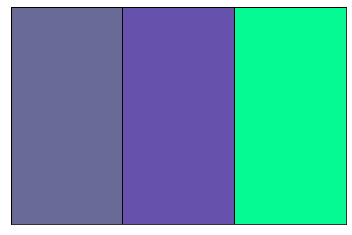

129. Good: dark blue Bad: blue


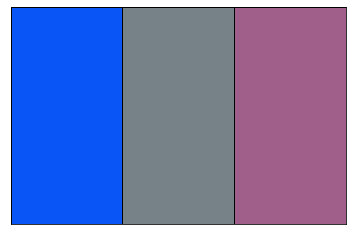

130. Good: medium blue Bad: blue


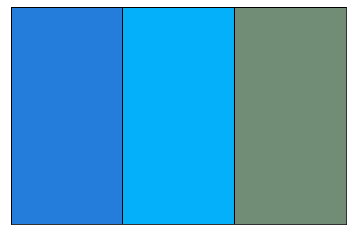

131. Good: teal green Bad: green


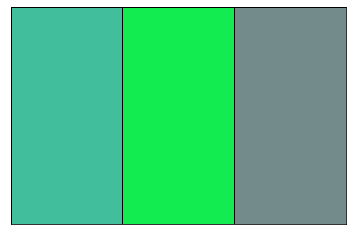

132. Good: olive green Bad: green


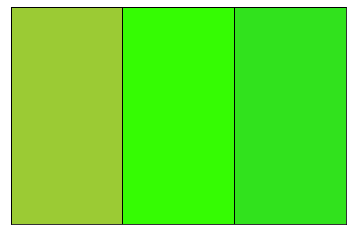

133. Good: muted purple Bad: purple


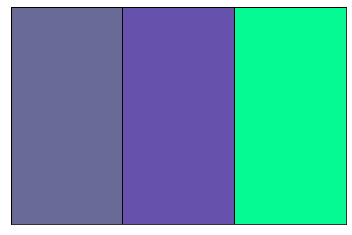

134. Good: bright blue Bad: bright


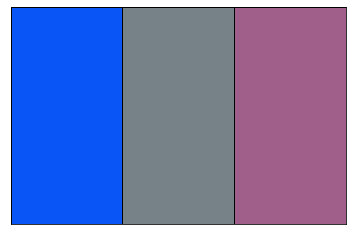

135. Good: Water blue Bad: blue


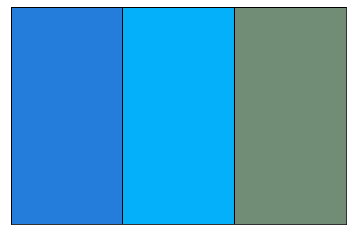

136. Good: seafoam green Bad: green


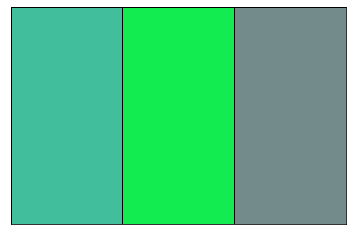

137. Good: yellow-green Bad: yellow


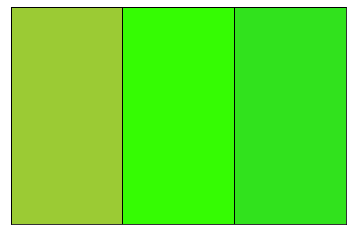

138. Good: ice purple Bad: light purple


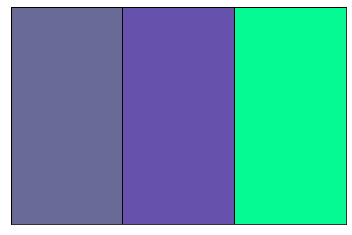

139. Good: solid blue Bad: cold


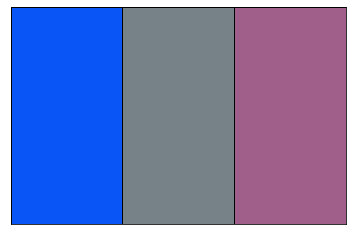

140. Good: dark blue Bad: blue


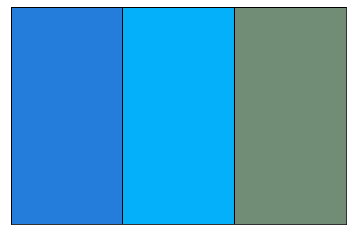

141. Good: dark green Bad: green


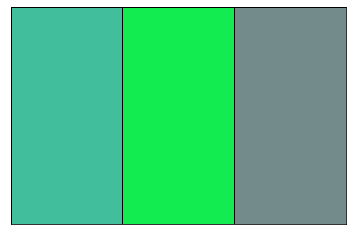

142. Good: dark green Bad: green


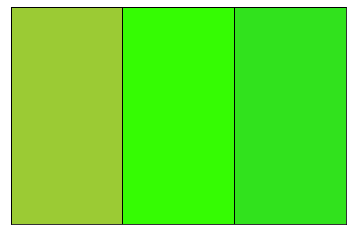

143. Good: light purple Bad: purple


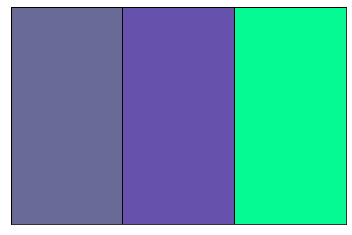

144. Good: blue Bad: dark blue


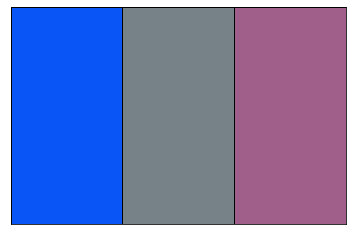

145. Good: dark blue Bad: blue


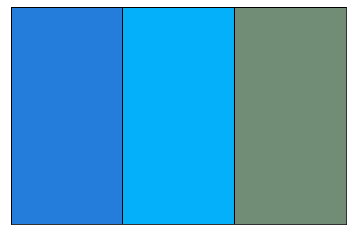

146. Good: dark green Bad: green


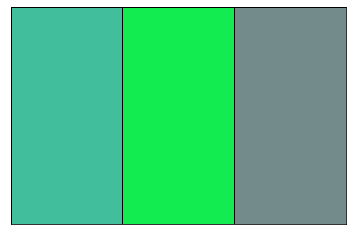

147. Good: off green Bad: green


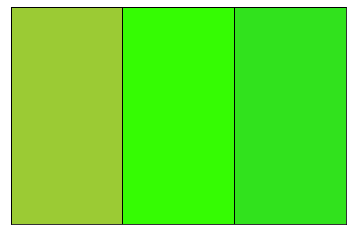

148. Good: light purple Bad: purple


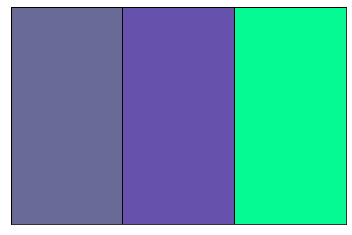

149. Good: dark blue Bad: dark


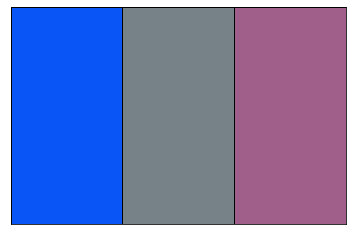

150. Good: Dark Green Bad: Green


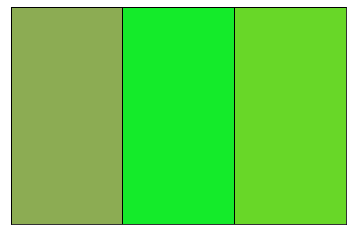

151. Good: Dark Green Bad: Green


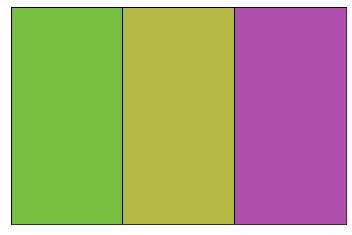

152. Good: Red Bad: Dark


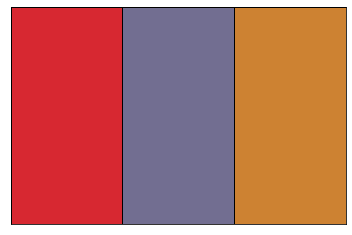

153. Good: Dark green Bad: Green


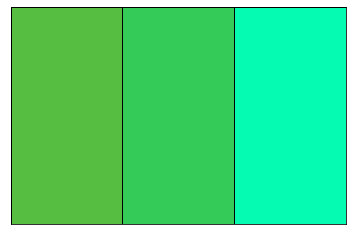

154. Good: light blue Bad: Blue


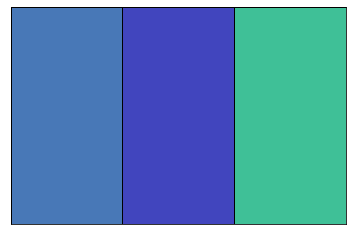

155. Good: pea green Bad: Green


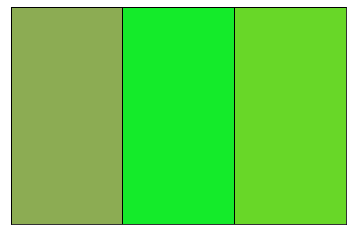

156. Good: bright green Bad: Bright


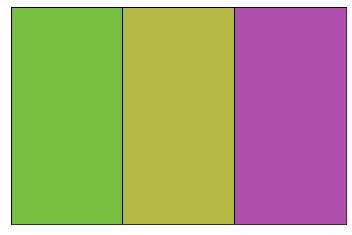

157. Good: red Bad: Flat


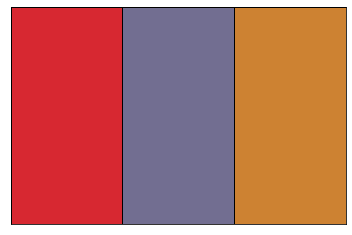

158. Good: dark green Bad: Green


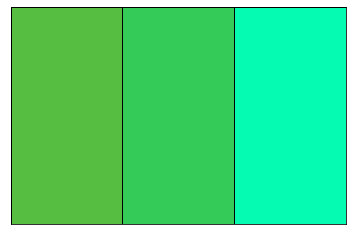

159. Good: Dull blue Bad: Blue


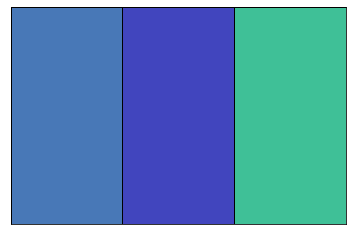

160. Good: Poop Green Bad: Green


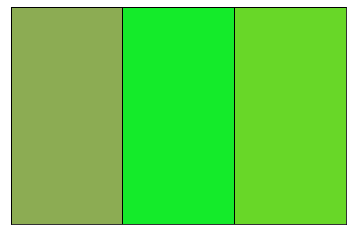

161. Good: Neon Green Bad: Yellowish


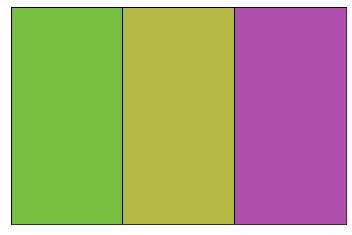

162. Good: Dark red Bad: Dark


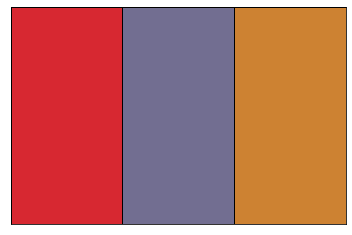

163. Good: Dark green Bad: Green


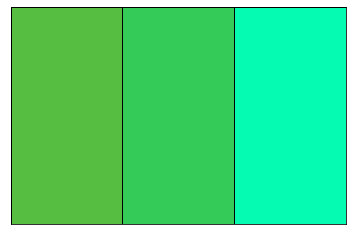

164. Good: Gray blue Bad: Blue


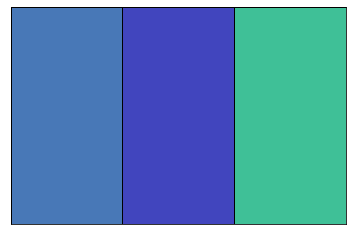

165. Good: kaki Bad: green


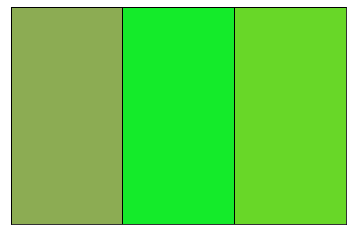

166. Good: green Bad: green


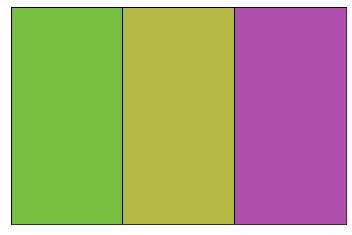

167. Good: crimson Bad: red


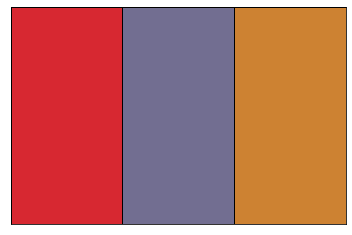

168. Good: duck egg Bad: green


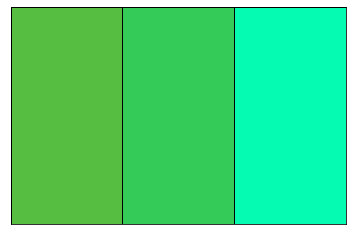

169. Good: faded blue Bad: blue


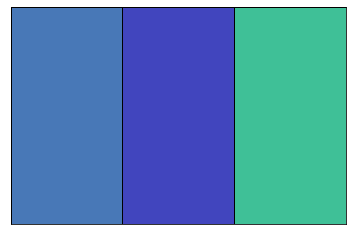

170. Good: dull green Bad: green


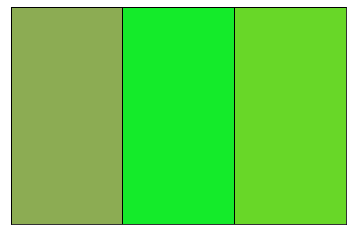

171. Good: forest green Bad: green


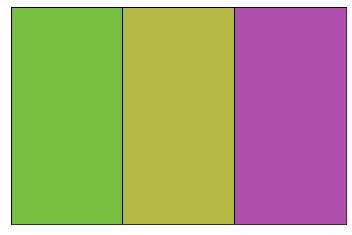

172. Good: standard red Bad: red


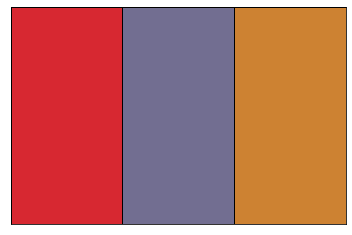

173. Good: leaf green Bad: green


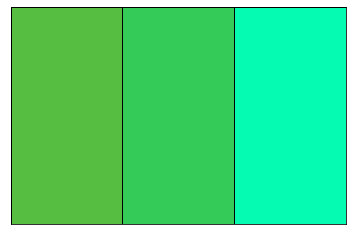

174. Good: deep blue Bad: blue


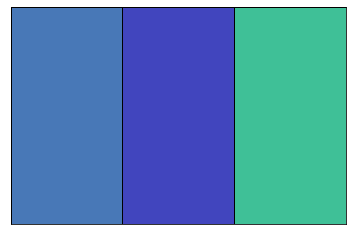

175. Good: light green Bad: green


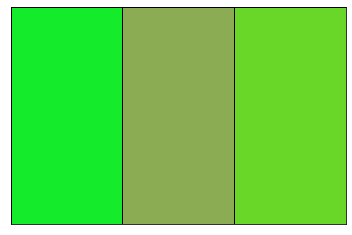

176. Good: puke yellow Bad: puke color


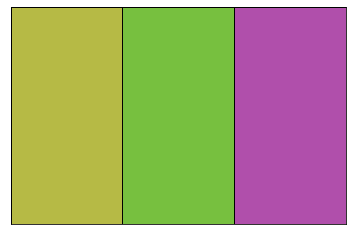

177. Good: purple Bad: purple


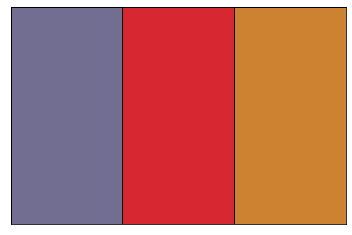

178. Good: dark green Bad: green


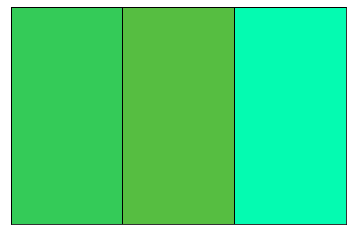

179. Good: dark blue Bad: blue


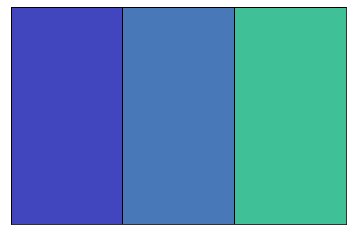

180. Good: Light green Bad: Green


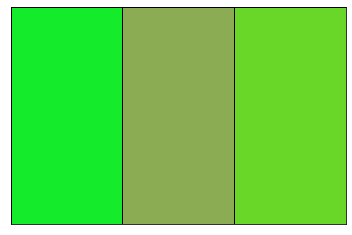

181. Good: Dim yellow Bad: Yellow


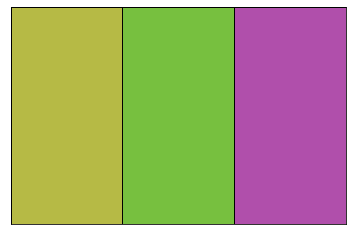

182. Good: Grey purple Bad: Purple


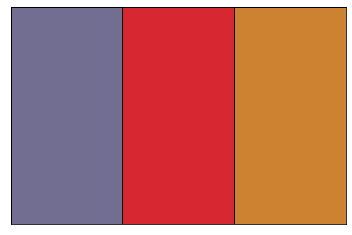

183. Good: Bright sea green Bad: Green


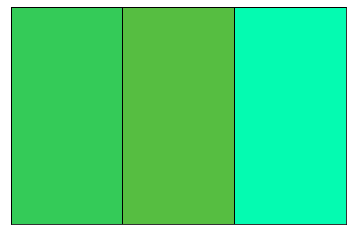

184. Good: Dark deep purple Bad: Purple


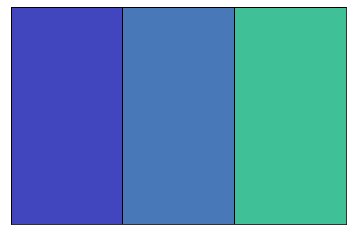

185. Good: neon green Bad: green


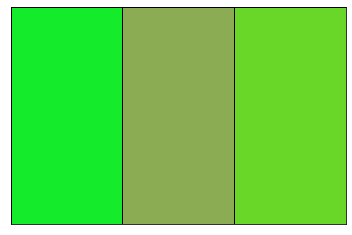

186. Good: yellow green Bad: green


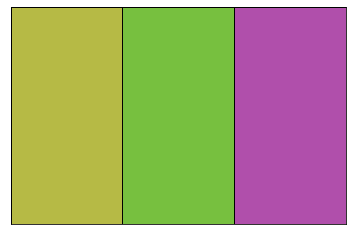

187. Good: purple gray Bad: purple


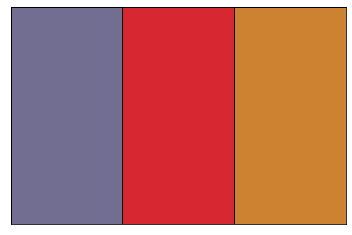

188. Good: bluish green Bad: green


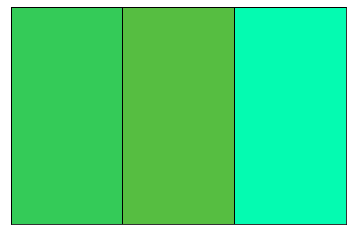

189. Good: dark purple Bad: blue


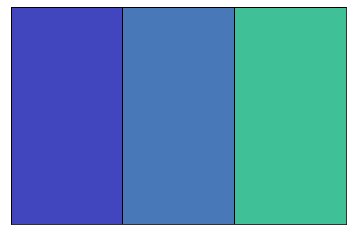

190. Good: bright green Bad: bright green


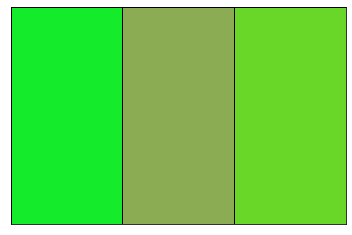

191. Good: mustard Bad: greenish


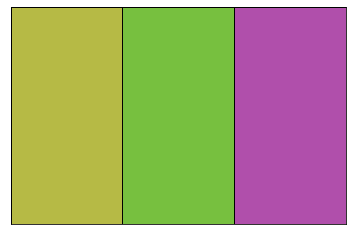

192. Good: purple Bad: not orange


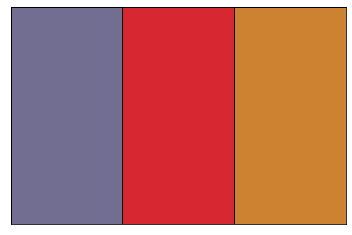

193. Good: medium green Bad: grass green


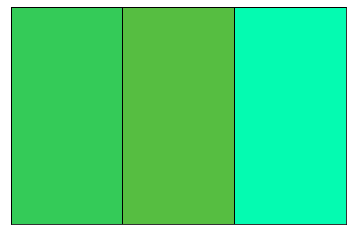

194. Good: dark blue Bad: blue


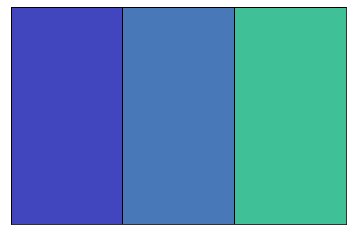

195. Good: Bright Green Bad: Green


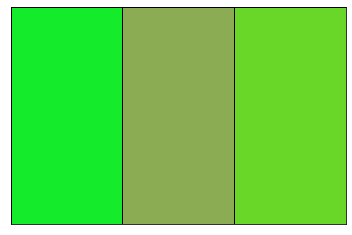

196. Good: Brown Bad: Green


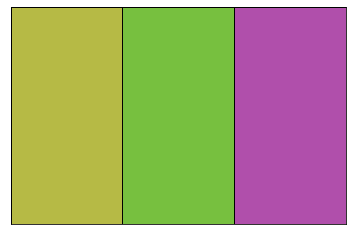

197. Good: Blue Bad: Dark


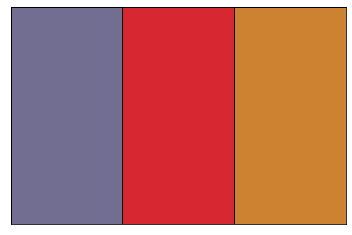

198. Good: Tree Green Bad: Green


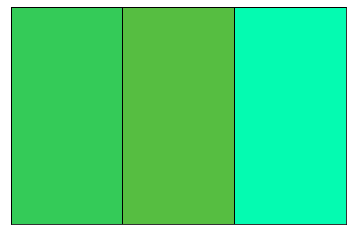

199. Good: Dark Blue Bad: Blue


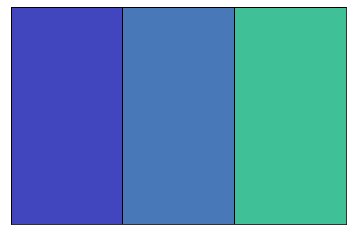

200. Good: orange Bad: secondary color


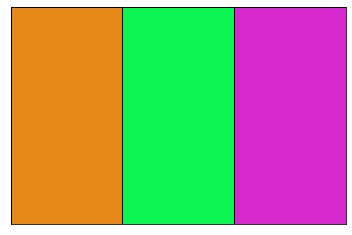

201. Good: bright red Bad: red


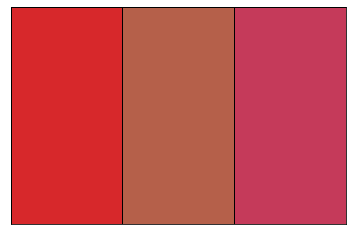

202. Good: moss green Bad: green


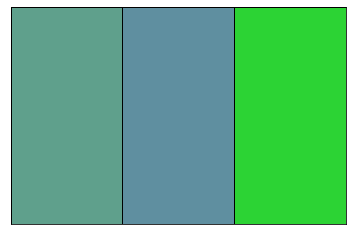

203. Good: yellow-green Bad: green


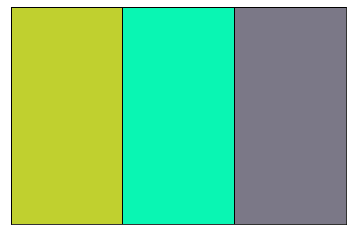

204. Good: mustard green Bad: green


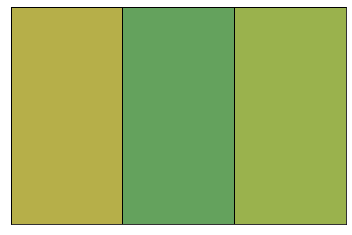

205. Good: saffron Bad: orange


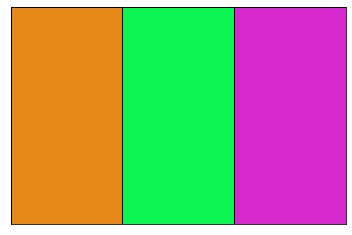

206. Good: red Bad: magenta


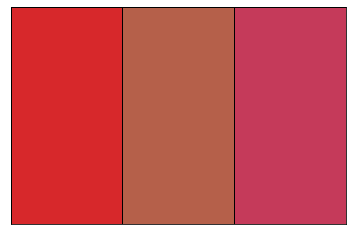

207. Good: pale blue Bad: blue


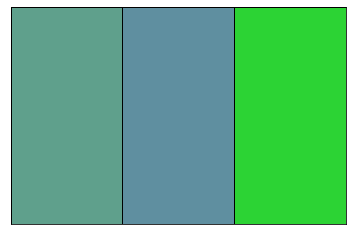

208. Good: light green Bad: green


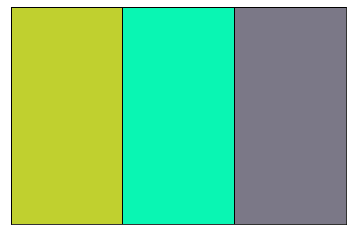

209. Good: algae green Bad: green


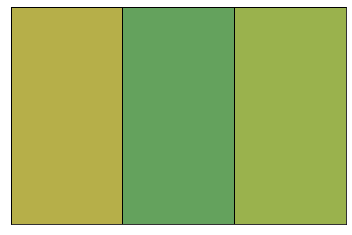

210. Good: orange Bad: medium intensity


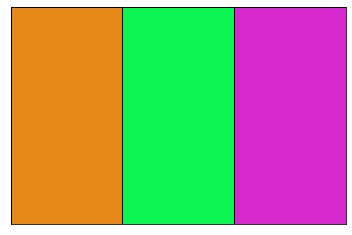

211. Good: brightest red Bad: red


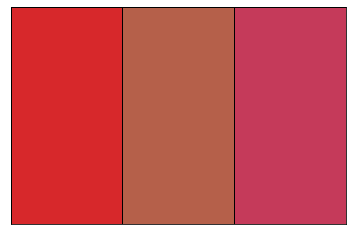

212. Good: grayish green Bad: blue


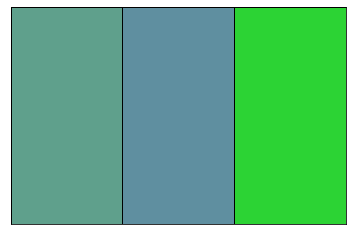

213. Good: yellow Bad: greenish


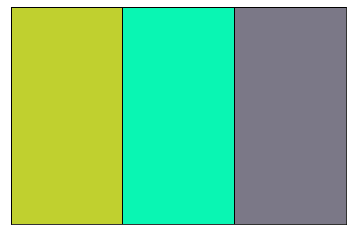

214. Good: boldest brown Bad: brown


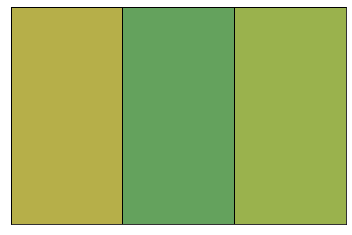

215. Good: Light tan brown Bad: neutral color


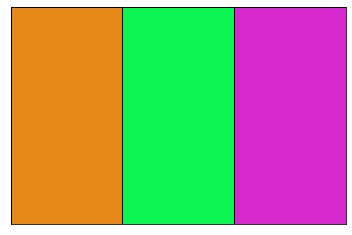

216. Good: Reddish color Bad: reddish color


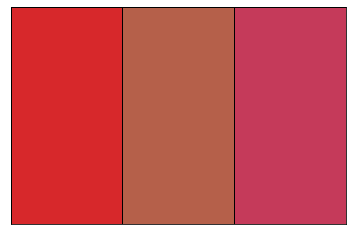

217. Good: darker teal color Bad: blue


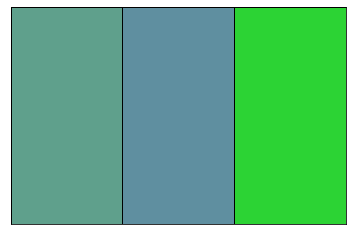

218. Good: light green Bad: light tone color


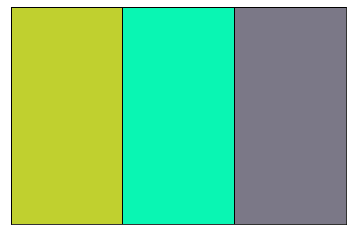

219. Good: lighter pale green Bad: light green


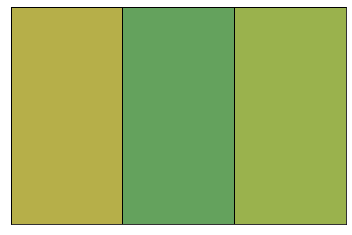

220. Good: orange Bad: bright


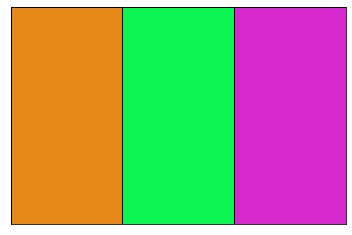

221. Good: bright red Bad: red


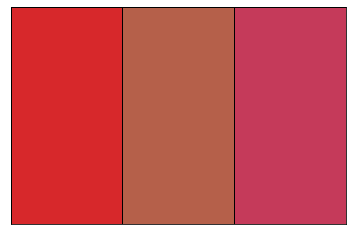

222. Good: olive green Bad: green


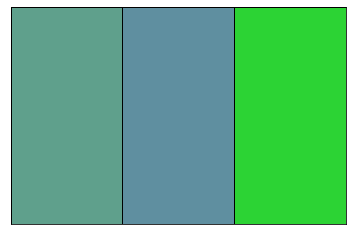

223. Good: yellow Bad: bright


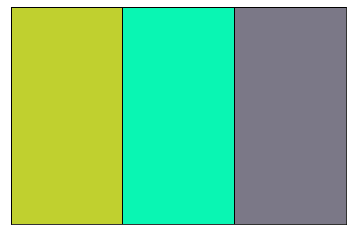

224. Good: orangish Bad: yellow/green


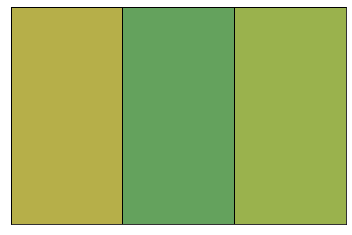

225. Good: Light Green Bad: Bright


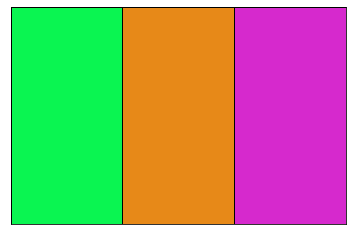

226. Good: Burgundy Bad: In the red spectrum


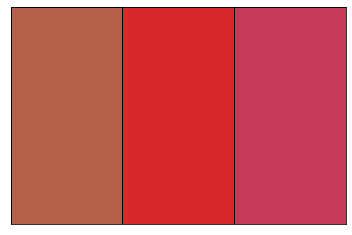

227. Good: Light, flat blue Bad: Blue


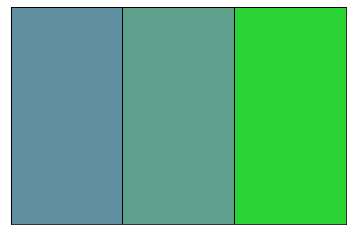

228. Good: Turqoise Bad: Bright


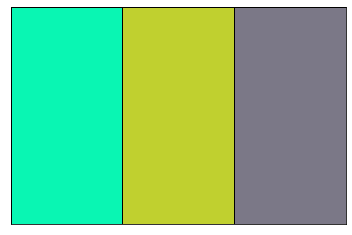

229. Good: Darkest green Bad: Flat


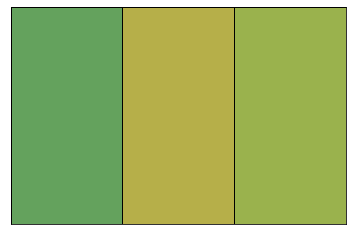

230. Good: Mint Green Bad: Green


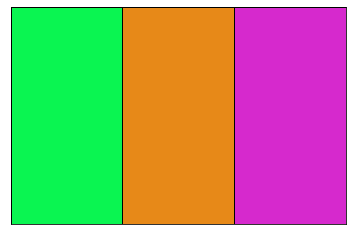

231. Good: light burgandy Bad: Pink


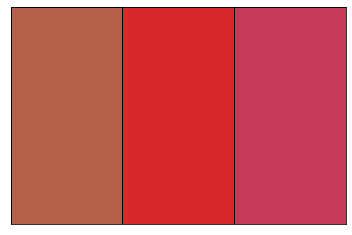

232. Good: cottage blue Bad: Blue


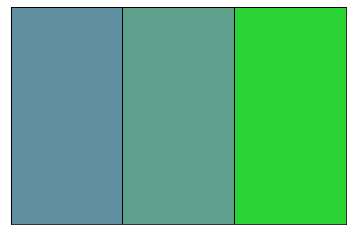

233. Good: Turquise blue Bad: Teal


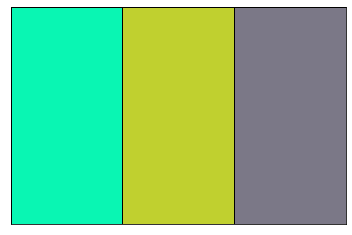

234. Good: Seafoam green Bad: Green


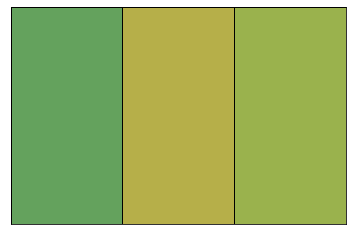

235. Good: lime green Bad: lime


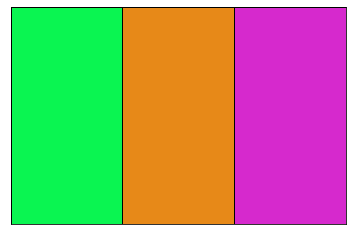

236. Good: brown Bad: red


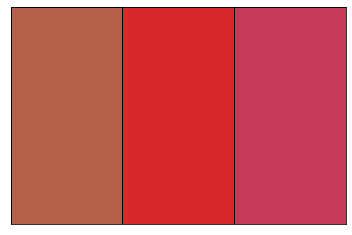

237. Good: dark blue Bad: blue


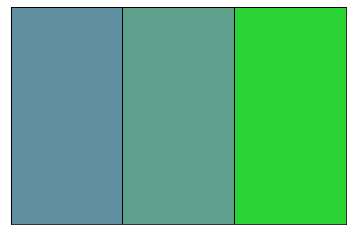

238. Good: teal green Bad: teal


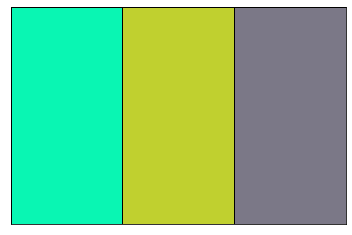

239. Good: dark green Bad: green


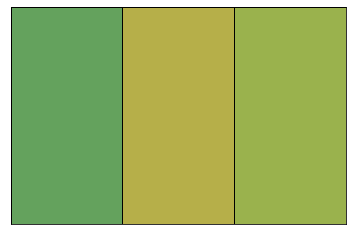

240. Good: green Bad: bright


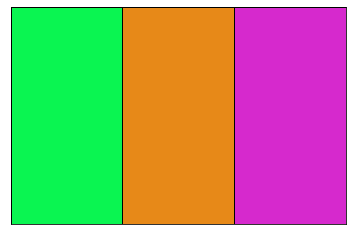

241. Good: maroon Bad: reddish


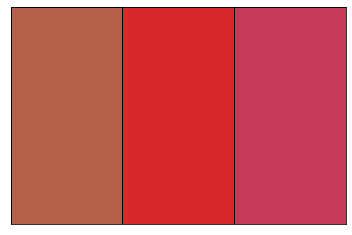

242. Good: slate green Bad: greenish


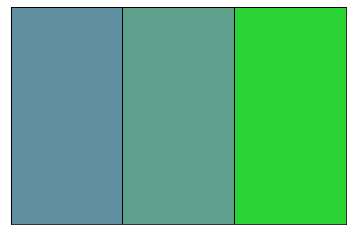

243. Good: bright green Bad: greenish


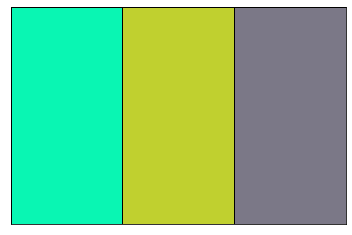

244. Good: forest green Bad: green


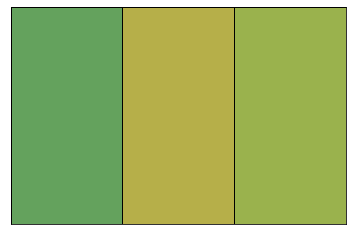

245. Good: green Bad: green


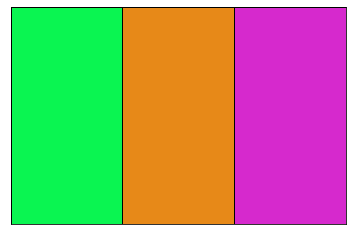

246. Good: beown Bad: red


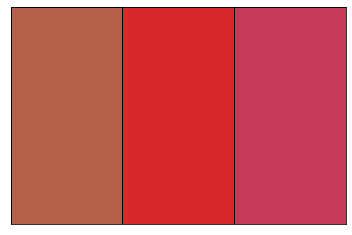

247. Good: blue Bad: light green


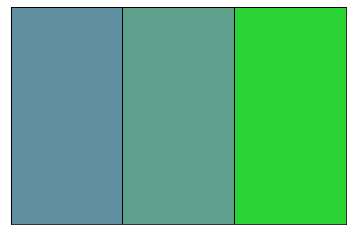

248. Good: teal Bad: green


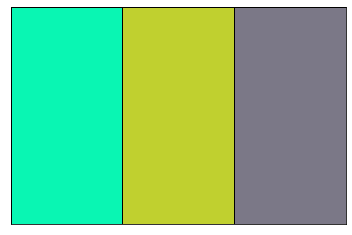

249. Good: light green Bad: green


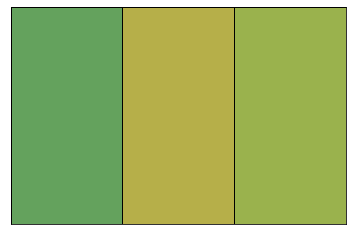

250. Good: light purple Bad: purple


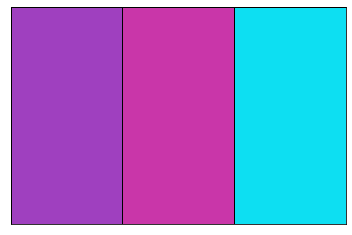

251. Good: dark lblue Bad: blue


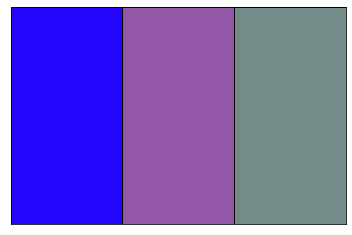

252. Good: light green Bad: green


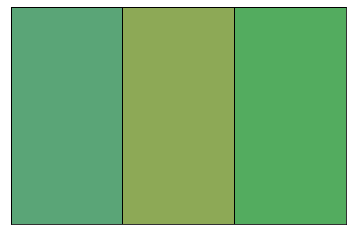

253. Good: dark green Bad: green


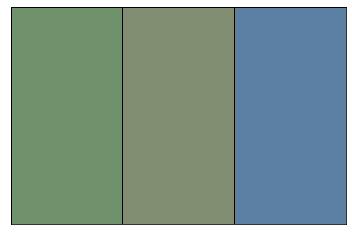

254. Good: bright green Bad: green


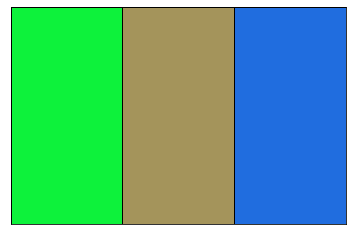

255. Good: dark purple Bad: purple


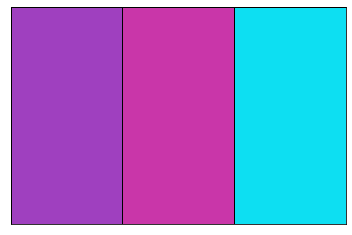

256. Good: dark blue Bad: blue


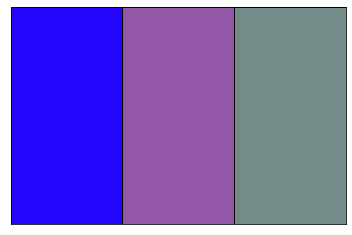

257. Good: green Bad: green


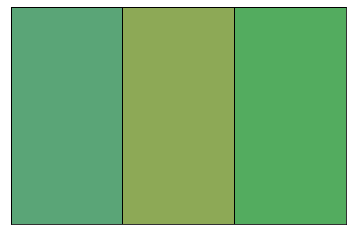

258. Good: dark green Bad: green


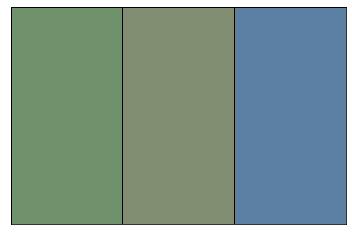

259. Good: light green Bad: green


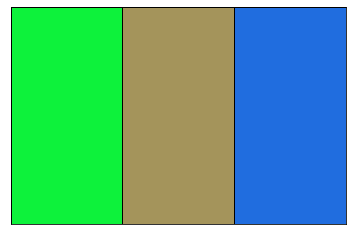

260. Good: Purple Bad: light puple


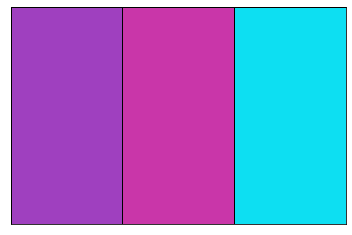

261. Good: Dark blue Bad: light blue


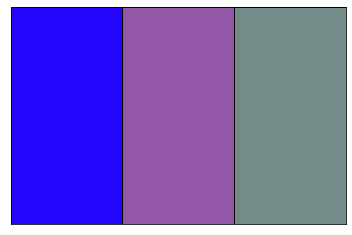

262. Good: mint green Bad: green


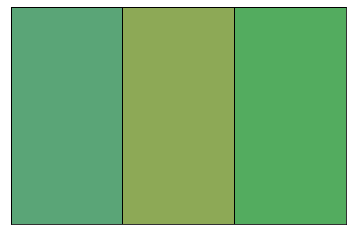

263. Good: army green Bad: green


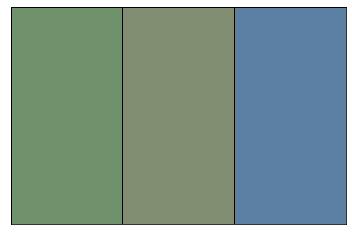

264. Good: neon green Bad: green


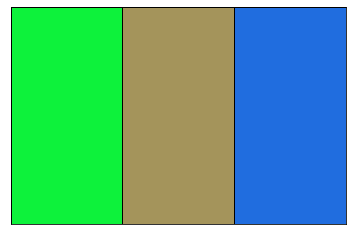

265. Good: dark purple Bad: purple


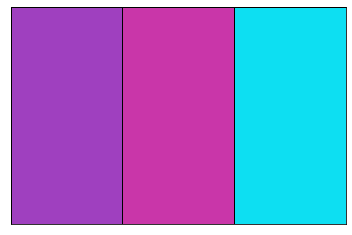

266. Good: blue Bad: blue


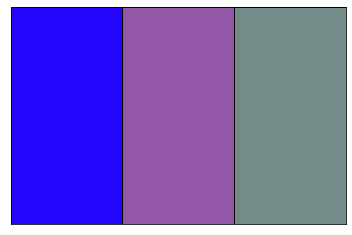

267. Good: dark green Bad: light green


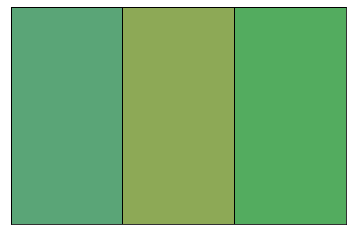

268. Good: dark green Bad: puke green


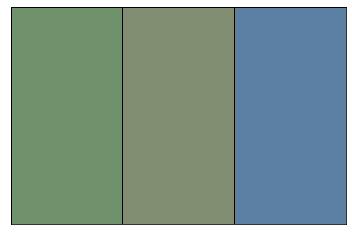

269. Good: lime green Bad: green


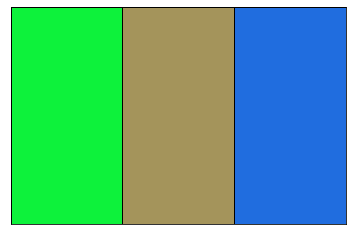

270. Good: light violet Bad: violet


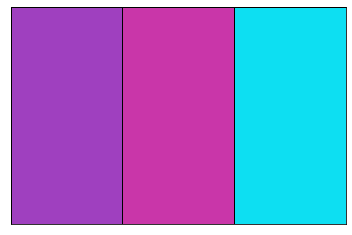

271. Good: dark blue Bad: blue


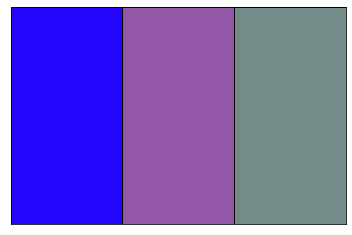

272. Good: light green Bad: green


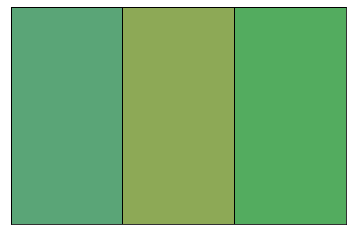

273. Good: light green Bad: green


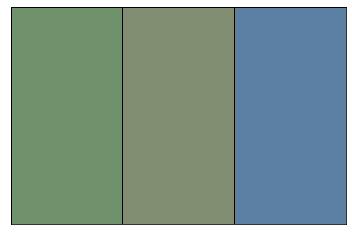

274. Good: dark green Bad: green


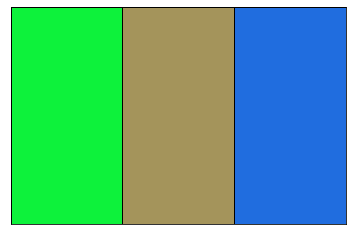

275. Good: dark pink Bad: purple


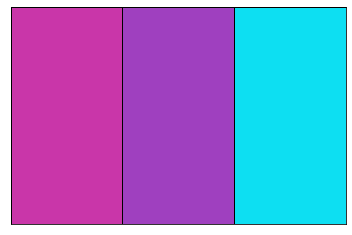

276. Good: light purple Bad: grayish


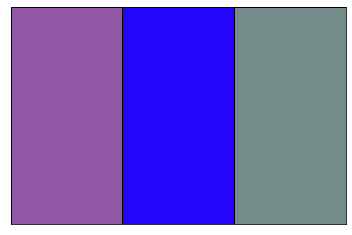

277. Good: puke green Bad: green


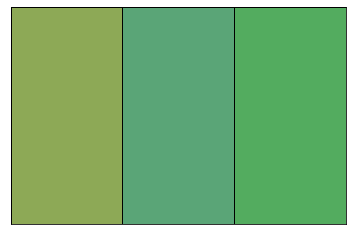

278. Good: grayish green Bad: teal


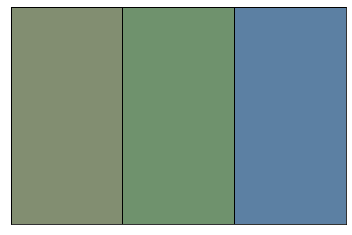

279. Good: light tan Bad: light


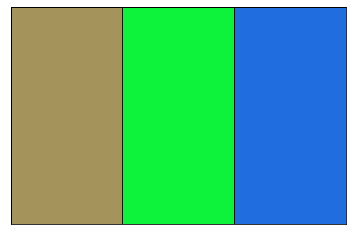

280. Good: purple pink Bad: pink


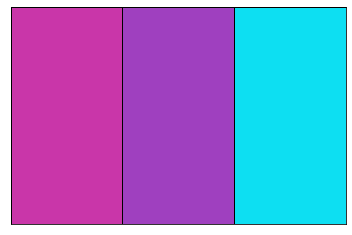

281. Good: lavender Bad: purple


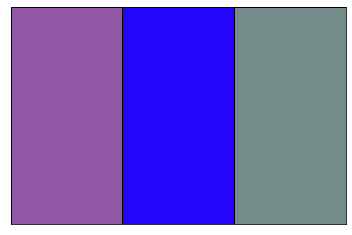

282. Good: olive Bad: green


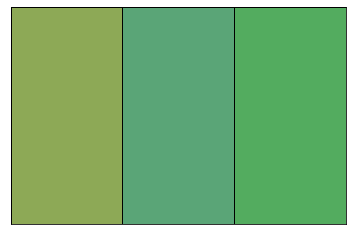

283. Good: gray green Bad: grey


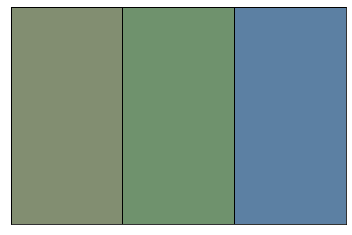

284. Good: beige Bad: tan


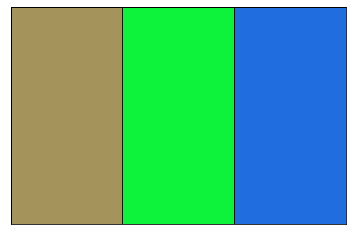

285. Good: light pink Bad: Purple


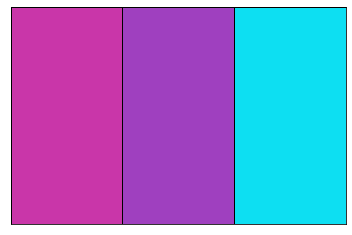

286. Good: Purple Bad: Dark


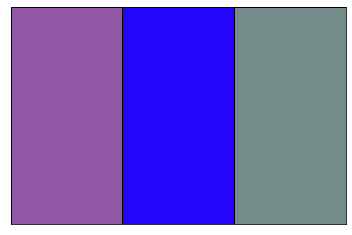

287. Good: Green Brown Bad: Green


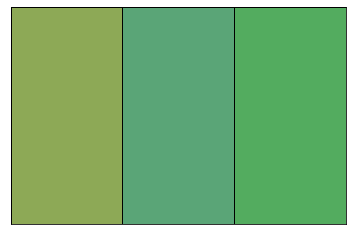

288. Good: Gray Bad: Green


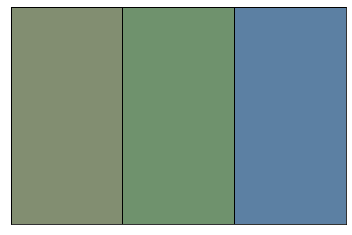

289. Good: Brown Bad: Light


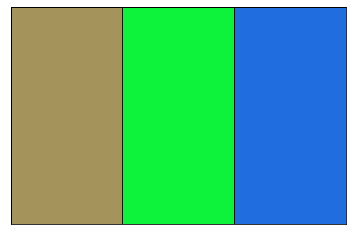

290. Good: pink Bad: bright pink


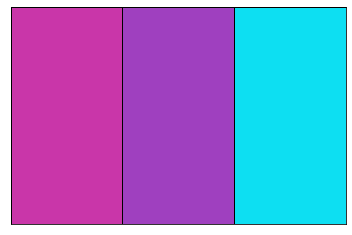

291. Good: purple Bad: purple


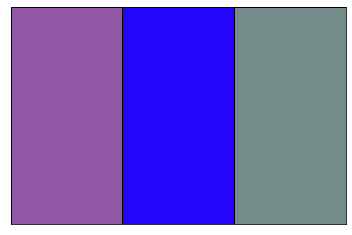

292. Good: olive green Bad: green


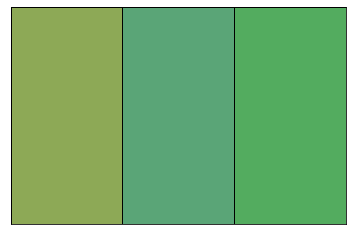

293. Good: army green Bad: green


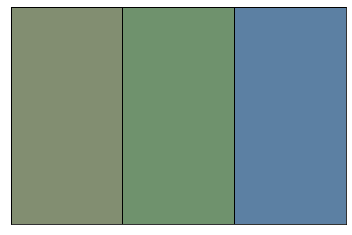

294. Good: sand brown Bad: brown


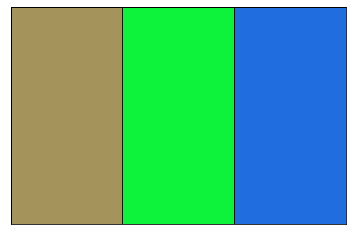

295. Good: dark pink Bad: pink


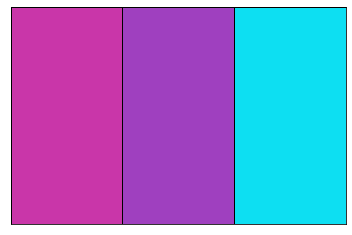

296. Good: light purple Bad: purple


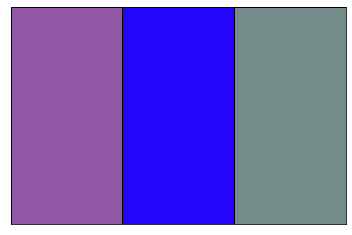

297. Good: pea green Bad: green


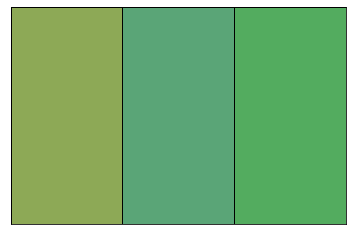

298. Good: grayish green Bad: green


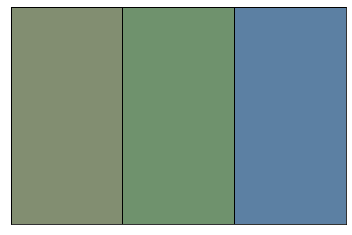

299. Good: khaki Bad: brown


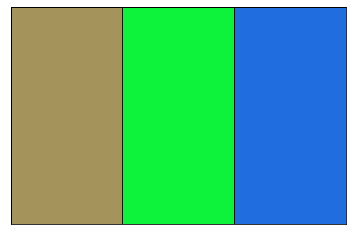

300. Good: grey Bad: grey


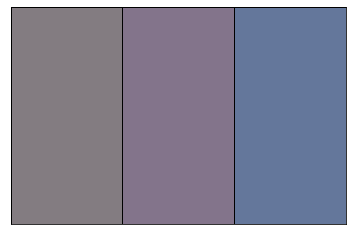

301. Good: green Bad: pale green


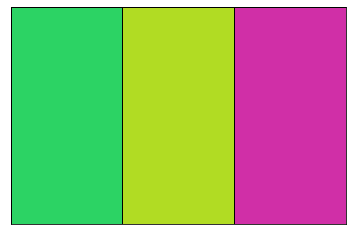

302. Good: purple Bad: mauve


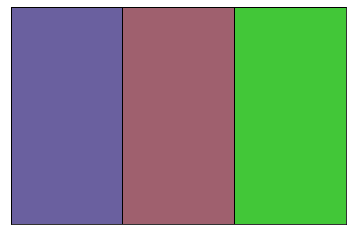

303. Good: blue-green Bad: light green


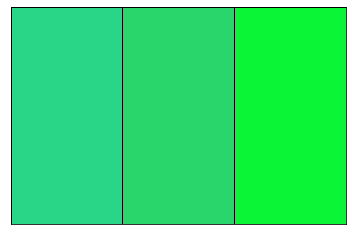

304. Good: dark pink Bad: pink


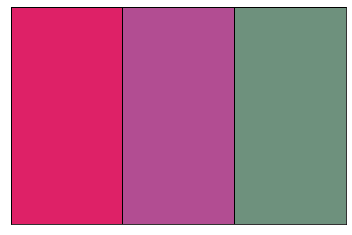

305. Good: Grey Bad: Dark grey


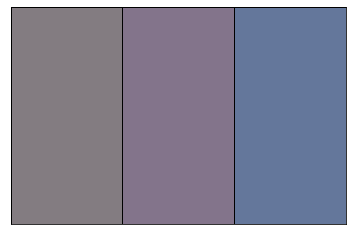

306. Good: Green Bad: Pink


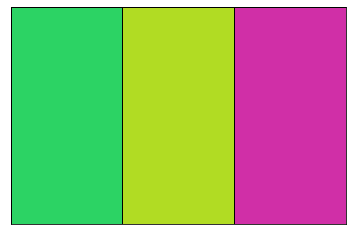

307. Good: Purple Bad: Green


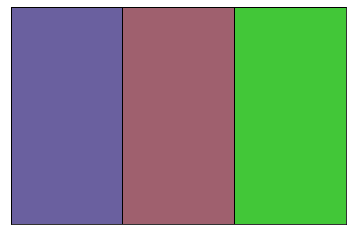

308. Good: Sea green Bad: Dark green


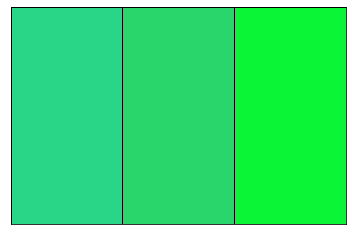

309. Good: Pink Bad: Purple


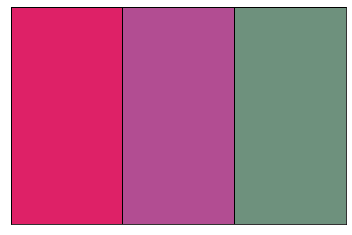

310. Good: Soft purple Bad: gray


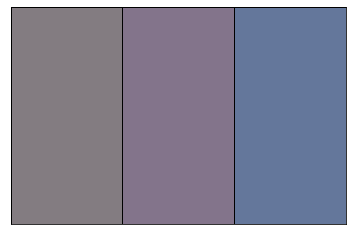

311. Good: flat green Bad: green


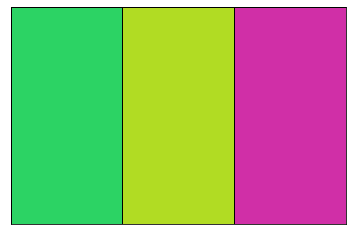

312. Good: medium purple Bad: purple


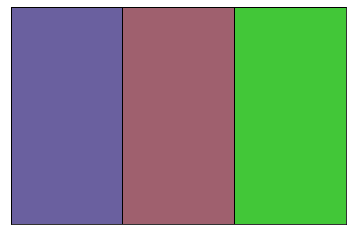

313. Good: greenish blue Bad: green


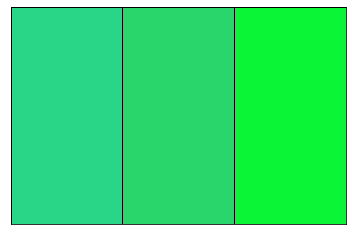

314. Good: bright pink Bad: pink


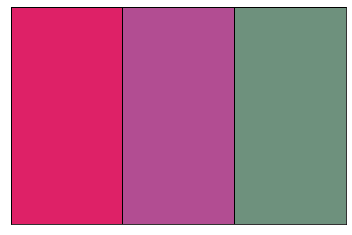

315. Good: It is like princes favorite color except with a little gray added. Bad: Off violet or weird grape


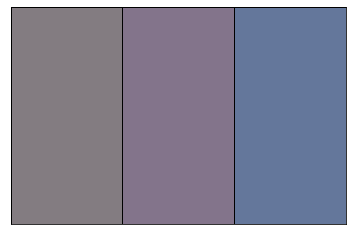

316. Good: This is the color they call "Puke ___" Bad: bright ______


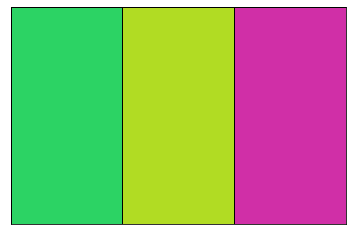

317. Good: princes favorite color or the color the girl was in willy wonka when she blew up. Bad: _____ haze or _____ rain


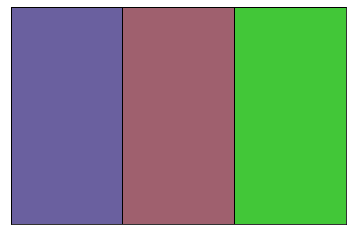

318. Good: Again "puke ____" Bad: i just puked on the ground and it was light __________


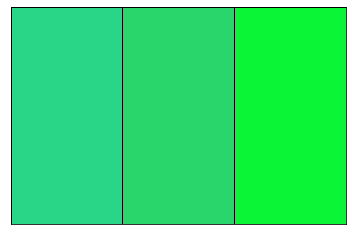

319. Good: "_____ Floyd" "Pretty in _____" Bad: my little finger


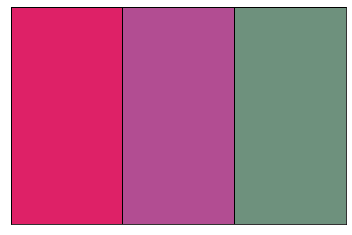

320. Good: light grey Bad: grey


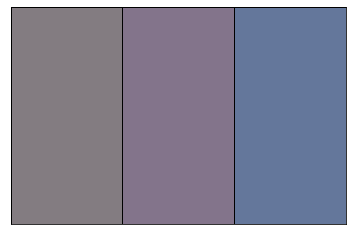

321. Good: light green Bad: green


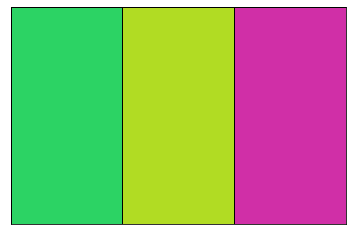

322. Good: purple Bad: purple


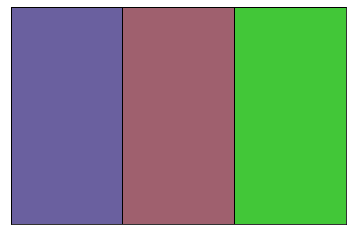

323. Good: dark green Bad: bright green


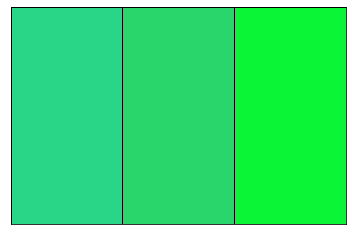

324. Good: hot pink Bad: hot pink


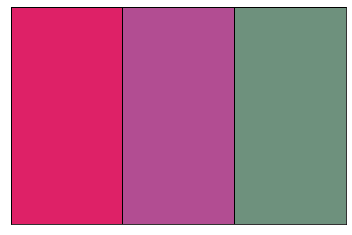

325. Good: purplish grey Bad: purple


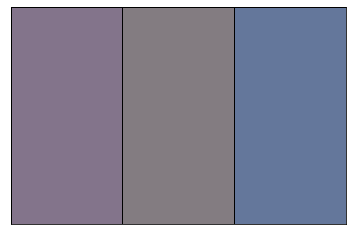

326. Good: lime green Bad: green


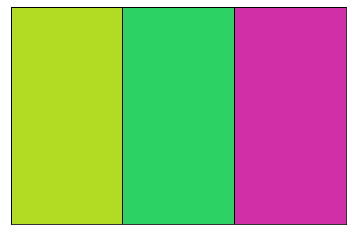

327. Good: mauve Bad: red


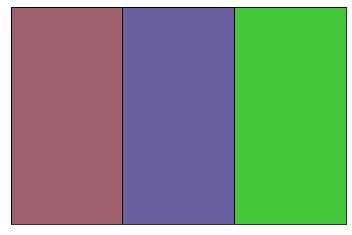

328. Good: emerald green Bad: green


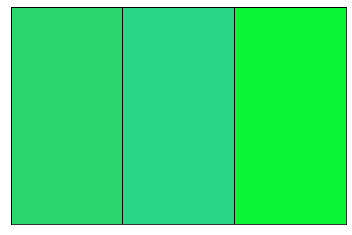

329. Good: fuschia Bad: purple


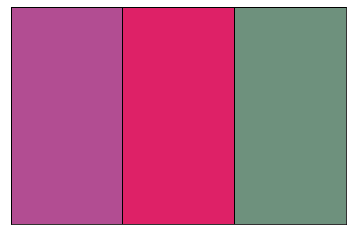

330. Good: purple gray Bad: gray


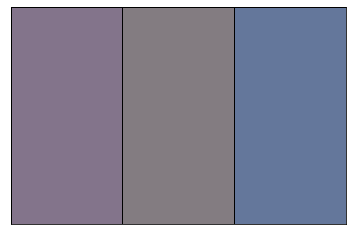

331. Good: lime green Bad: green


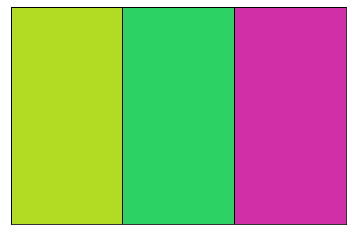

332. Good: mauve Bad: purple


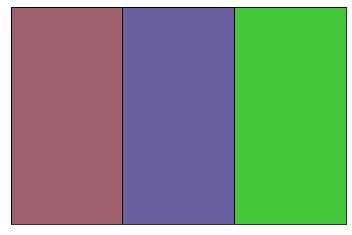

333. Good: light green Bad: green


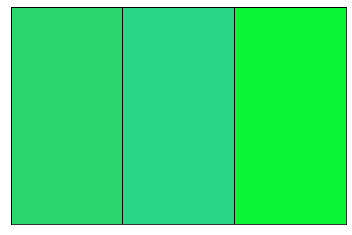

334. Good: dark pink Bad: pink


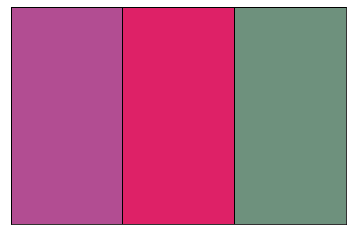

335. Good: purple Bad: purple


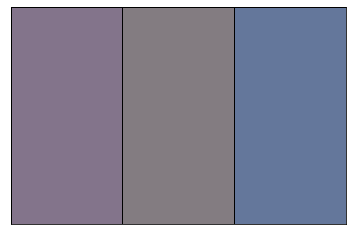

336. Good: avocado green Bad: green


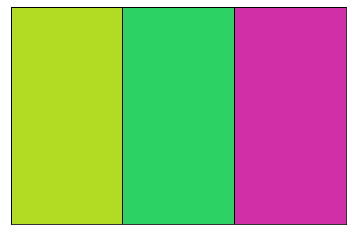

337. Good: brown reddish Bad: brown


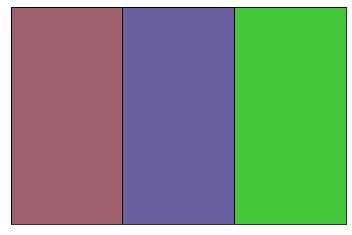

338. Good: darker green Bad: green


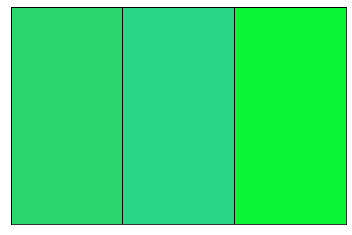

339. Good: violet Bad: purple


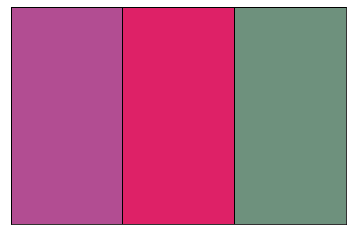

340. Good: Brighter grey Bad: Dark grey


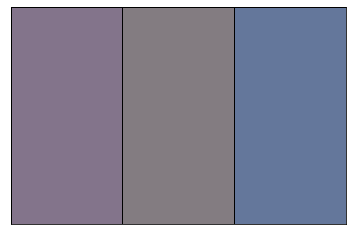

341. Good: Lighter green Bad: Simple green


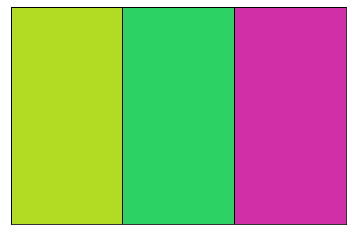

342. Good: Reddish brown Bad: Middle color


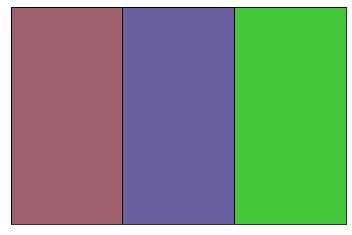

343. Good: Middle green Bad: Greener


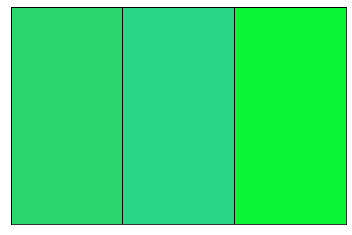

344. Good: Dark purple Bad: Pinkish red


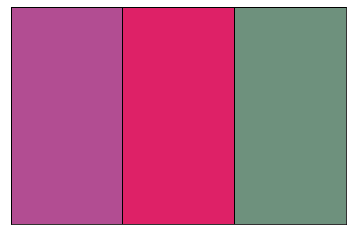

345. Good: dark purple Bad: pruple


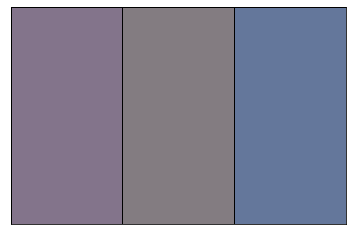

346. Good: dark yellow Bad: green


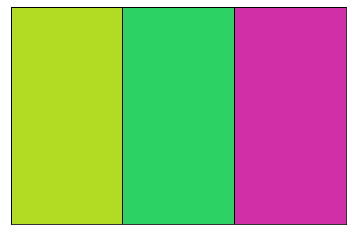

347. Good: dark red Bad: red


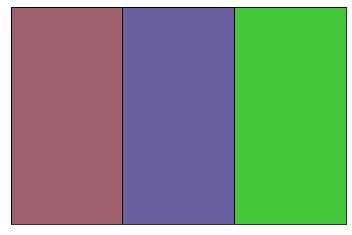

348. Good: dark green Bad: green


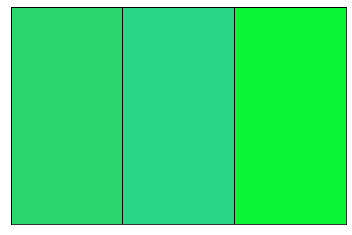

349. Good: purple Bad: purple


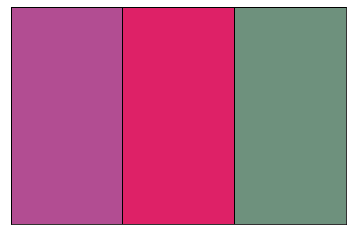

350. Good: red Bad: light


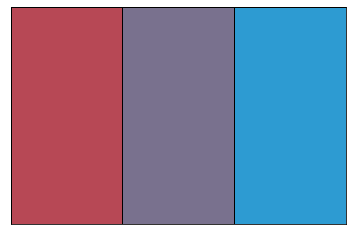

351. Good: medium purple Bad: purple


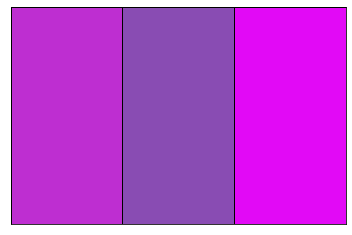

352. Good: dark blue Bad: blue


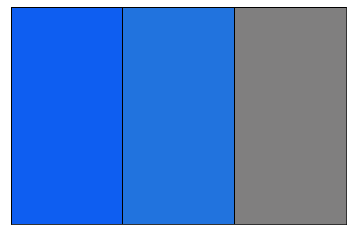

353. Good: green Bad: light


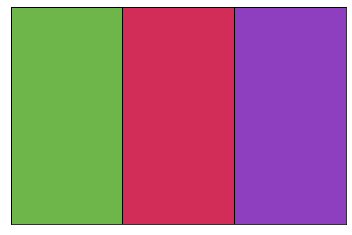

354. Good: grey Bad: dark


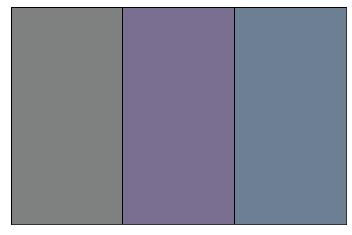

355. Good: rose Bad: purplish


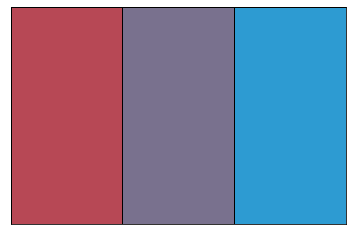

356. Good: medium purple shade Bad: purple


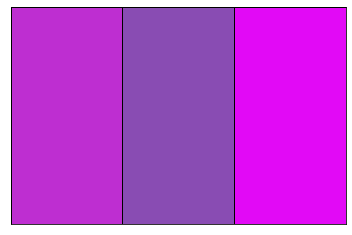

357. Good: brightest blue Bad: blue


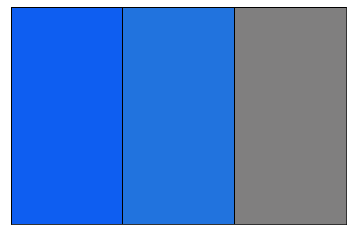

358. Good: moss green Bad: medium shade


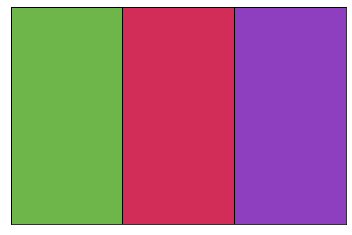

359. Good: darkest gray Bad: gray


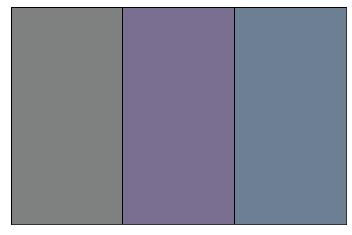

360. Good: Red-ish purple Bad: Red


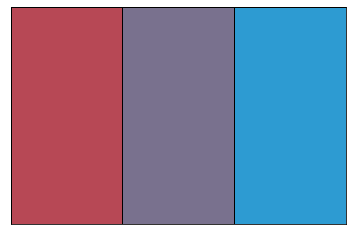

361. Good: Bright purple-ish pink Bad: Pink


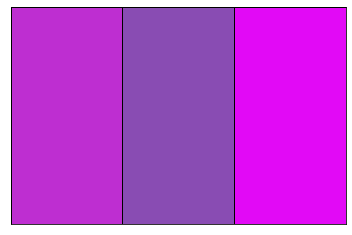

362. Good: Deep, cool blue Bad: Blue


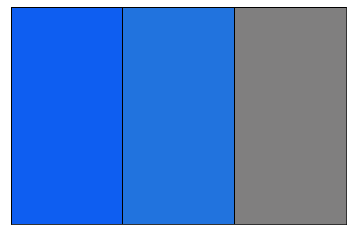

363. Good: Grassy green Bad: Green


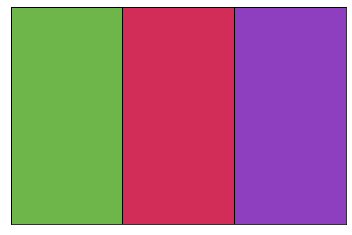

364. Good: Lighter grey Bad: Grey


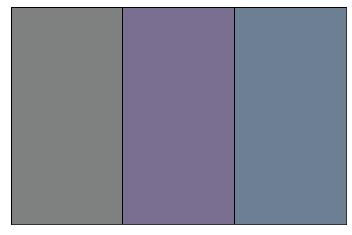

365. Good: a rosy color Bad: a non-gray color


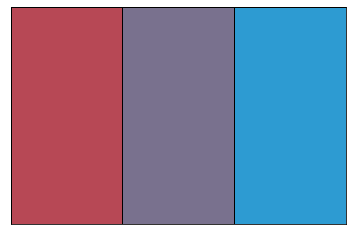

366. Good: a medium darkness purple Bad: purple


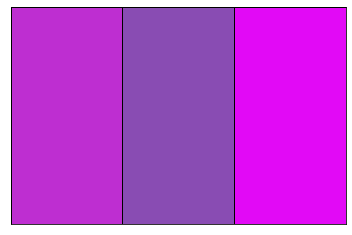

367. Good: a royal blue that is slightly greener Bad: blue


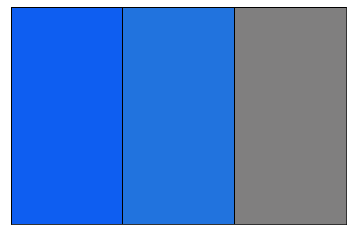

368. Good: a green Bad: not pink


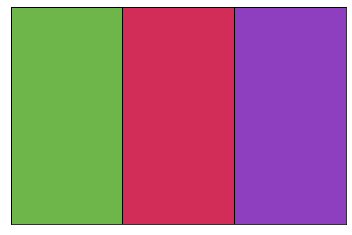

369. Good: a gray with no purple or blue Bad: gray


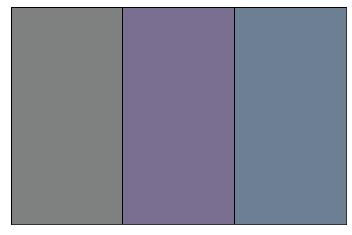

370. Good: pink Bad: not grey


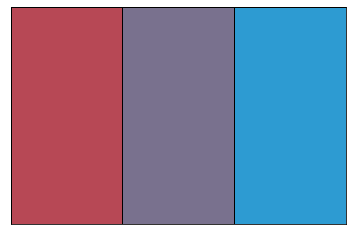

371. Good: light eggplant Bad: purple pink


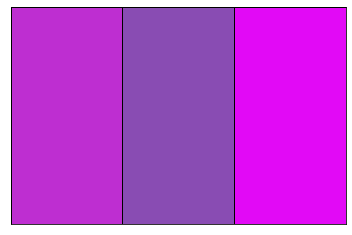

372. Good: Dodger Blue Bad: blue


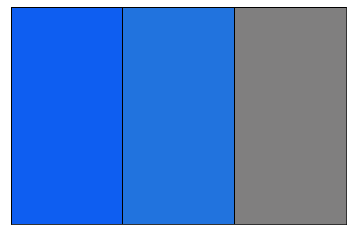

373. Good: green Bad: not dark


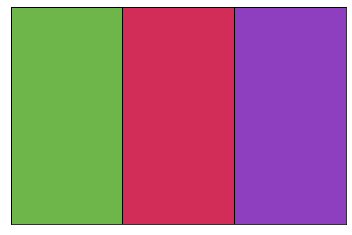

374. Good: stone colored Bad: grayish


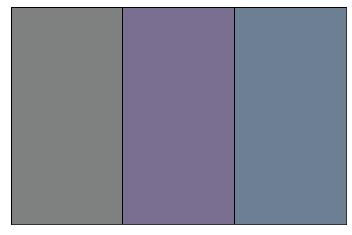

375. Good: Pale purple Bad: purple


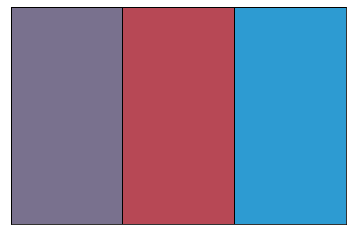

376. Good: purple Bad: purple


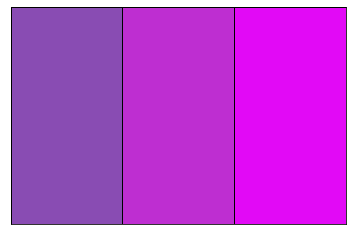

377. Good: light blue Bad: blue


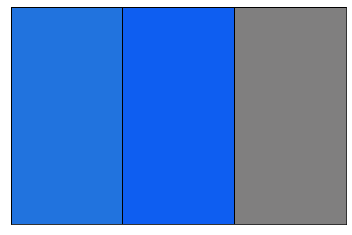

378. Good: hot pink Bad: pink


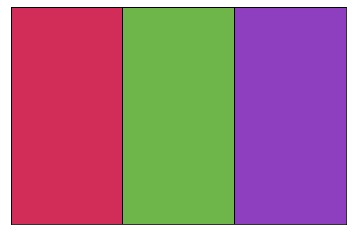

379. Good: pale purple Bad: purple


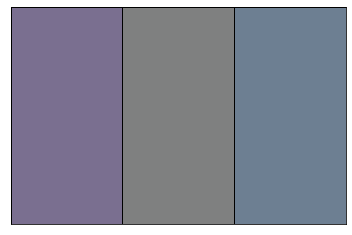

380. Good: purple gray Bad: gray


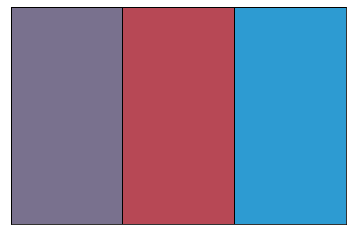

381. Good: dark purple Bad: purple


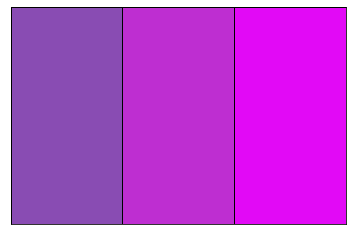

382. Good: medium blue Bad: blue


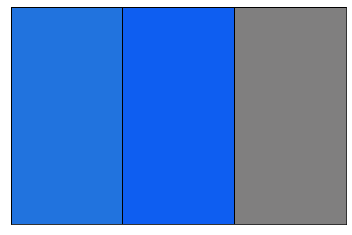

383. Good: red Bad: red


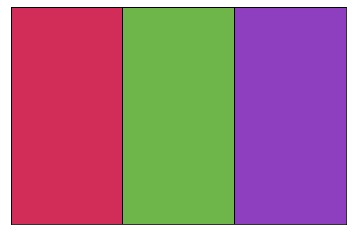

384. Good: purple gray Bad: gray


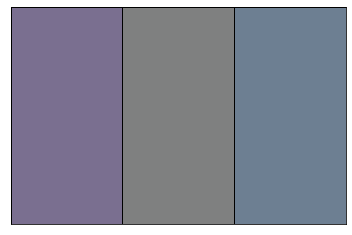

385. Good: purple Bad: purple


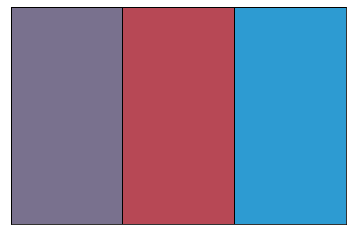

386. Good: dark purple Bad: dark purple


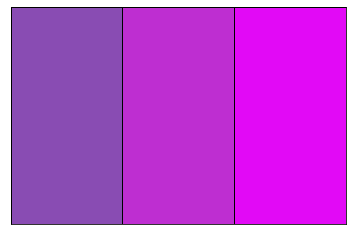

387. Good: light blue Bad: light blue


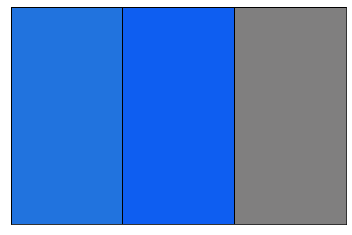

388. Good: pink Bad: pink


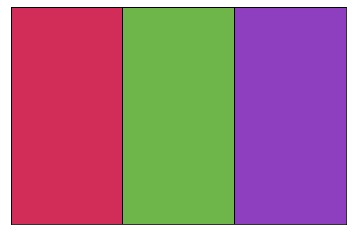

389. Good: purple Bad: purple


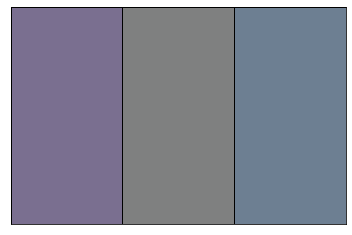

390. Good: Dark purple Bad: purple


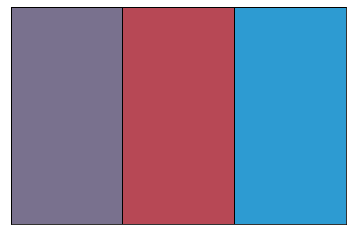

391. Good: Barney purple Bad: purple


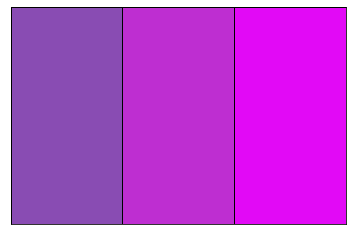

392. Good: Classic blue Bad: blue


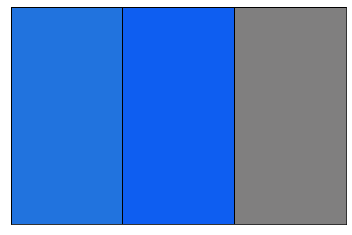

393. Good: Pinkish red Bad: red


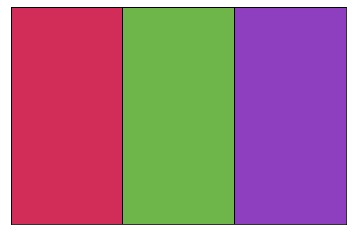

394. Good: Dark Purple Bad: purple


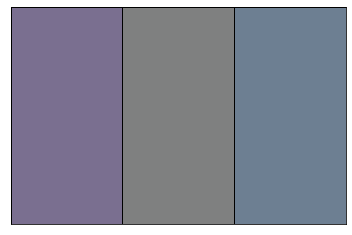

395. Good: purple Bad: dull purple


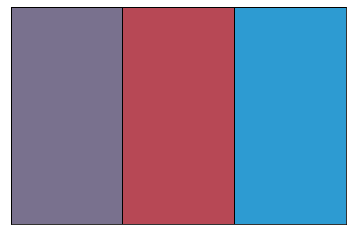

396. Good: dark puprle Bad: purple


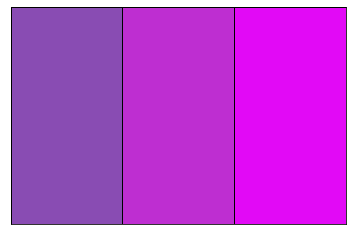

397. Good: dark blue Bad: blue


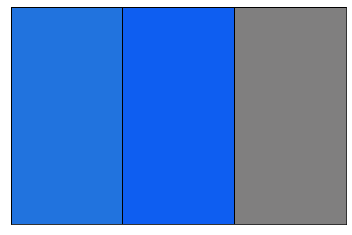

398. Good: maroon Bad: dark maroon


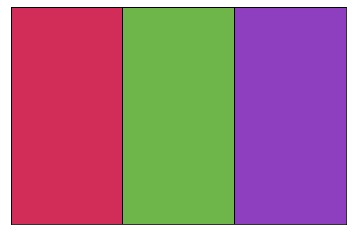

399. Good: dark purple Bad: dark purple


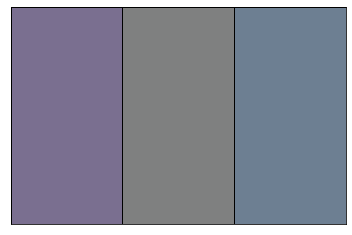

400. Good: blue green Bad: blue


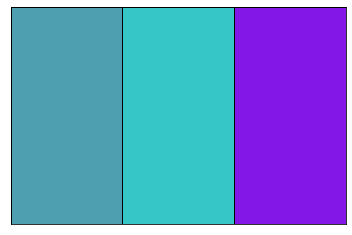

401. Good: pink gray Bad: gray


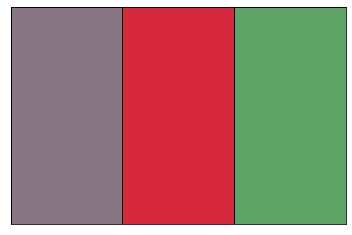

402. Good: dark purple Bad: purple


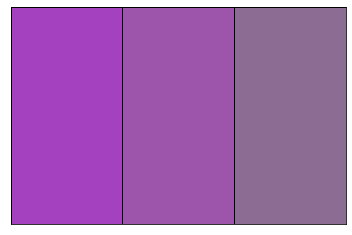

403. Good: neon yellow Bad: yellow


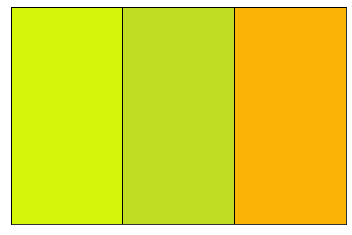

404. Good: sea green Bad: green


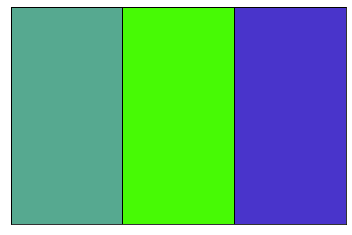

405. Good: Medium blue Bad: Medium blue


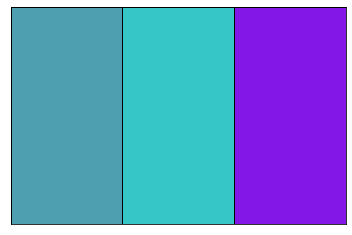

406. Good: Purple Bad: Purple


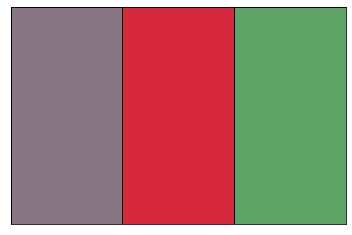

407. Good: Bright purple Bad: Bright purple


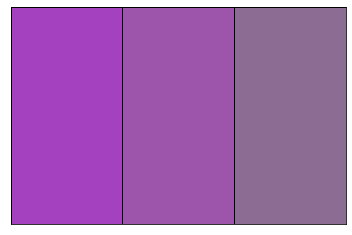

408. Good: Bright yellow Bad: Bright yellow


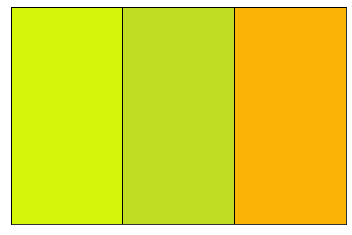

409. Good: Medium green Bad: Medium green


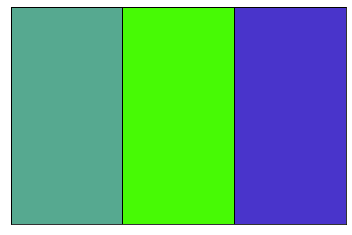

410. Good: Dull blue Bad: Dull turquoise


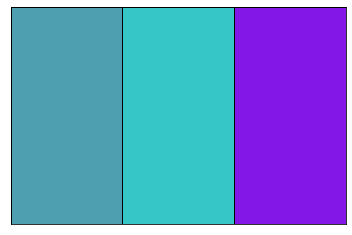

411. Good: Muted purple Bad: Muted purple


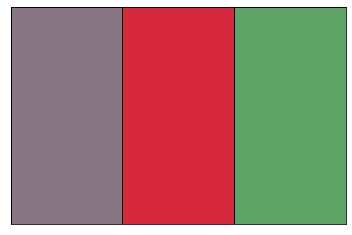

412. Good: Bright purple Bad: Bright purple


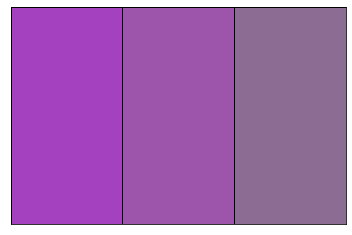

413. Good: Bright yellow Bad: Bright yellow


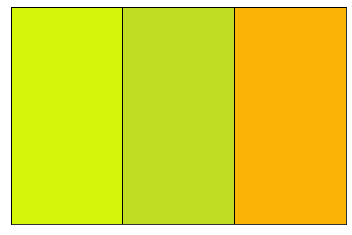

414. Good: Muted turquiose Bad: Dull turquoise


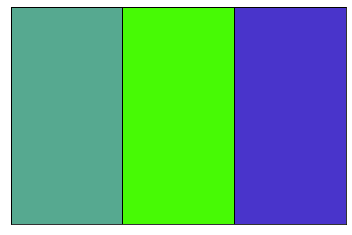

415. Good: robin's egg blue Bad: blue


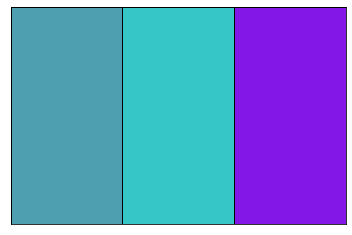

416. Good: gray Bad: light


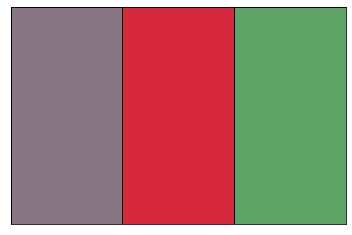

417. Good: hot pink Bad: mauve


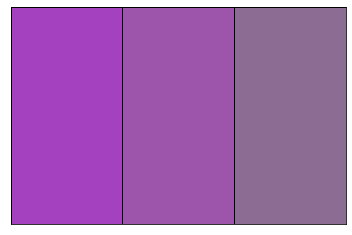

418. Good: banana yellow Bad: yellowish


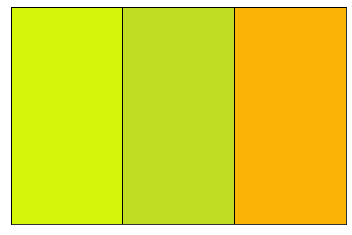

419. Good: aquamarine Bad: greenish


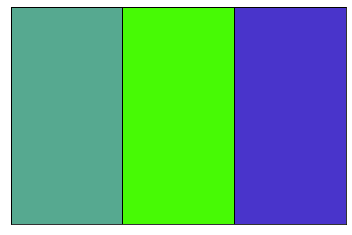

420. Good: muted blue Bad: blue


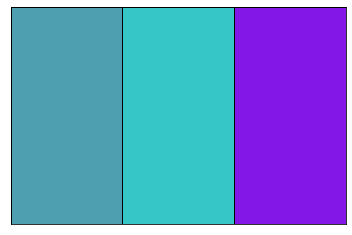

421. Good: dull purple Bad: dull


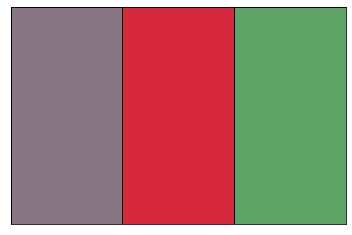

422. Good: bright purple Bad: purple


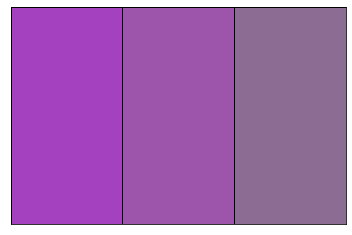

423. Good: bright yellow Bad: yellow


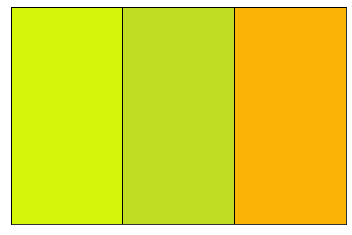

424. Good: dull blue-green Bad: water-like


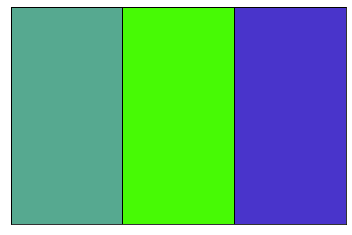

425. Good: teal Bad: blue


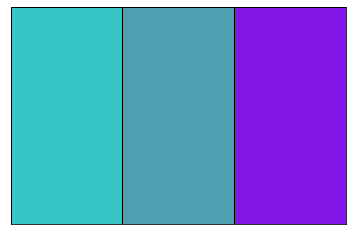

426. Good: red Bad: brighter color


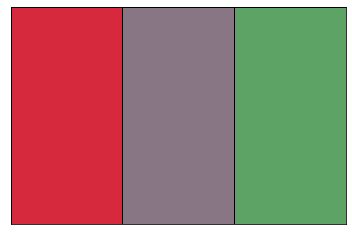

427. Good: darker purple Bad: purple


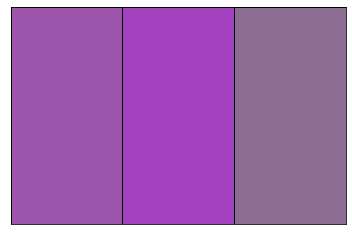

428. Good: medium yellow Bad: yellow


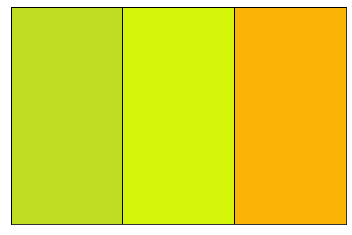

429. Good: neon green Bad: green


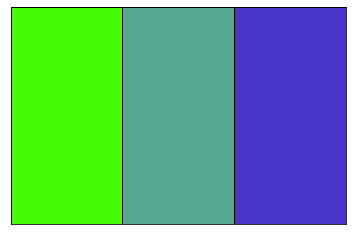

430. Good: Bright blue Bad: Blue


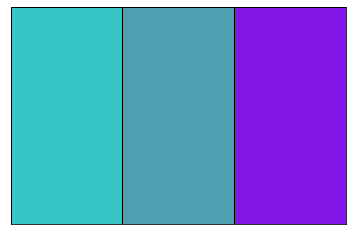

431. Good: Red Bad: Dull


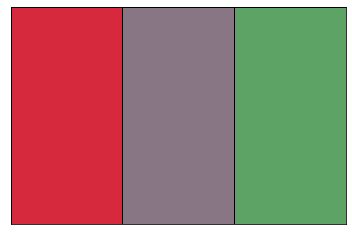

432. Good: Dark purple Bad: Purple


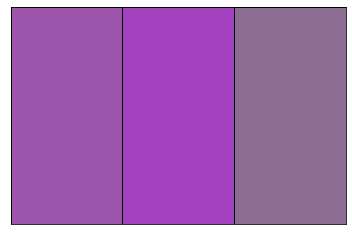

433. Good: Mustard yellow Bad: Yellow


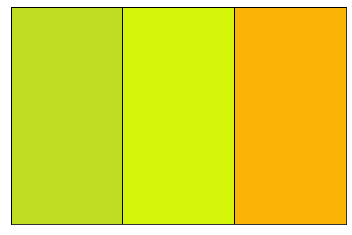

434. Good: Bright green Bad: Green


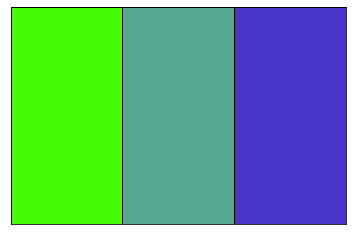

435. Good: light blue Bad: teal


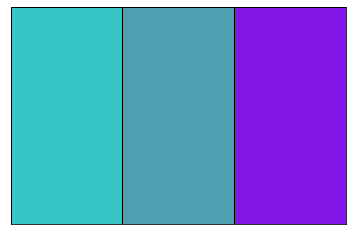

436. Good: red Bad: red


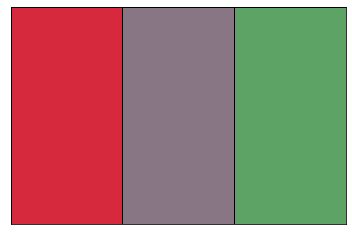

437. Good: dark purple Bad: purple


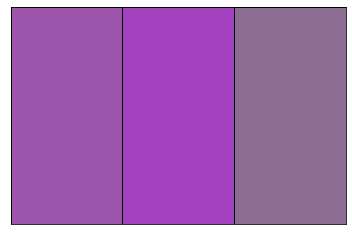

438. Good: dark yellow Bad: yellow


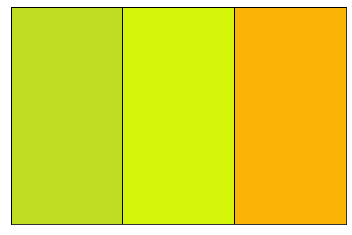

439. Good: green Bad: green


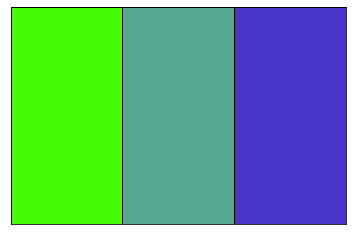

440. Good: light blueish green Bad: blue


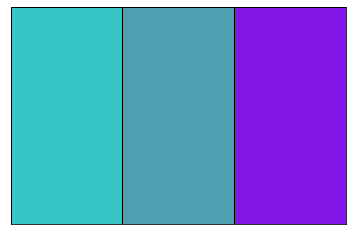

441. Good: hot pink Bad: pink


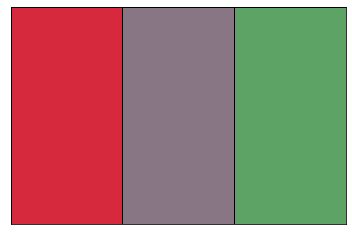

442. Good: pinkish purple Bad: purple


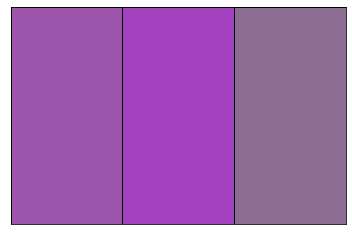

443. Good: pale yellow Bad: yellow


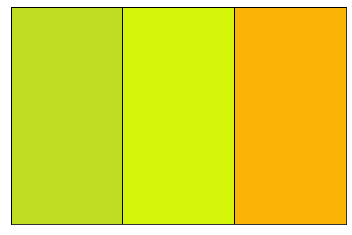

444. Good: lime green Bad: green


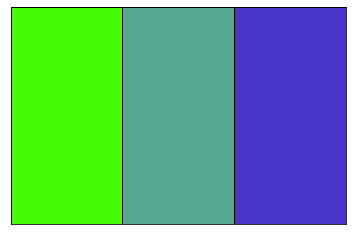

445. Good: light blue Bad: blue


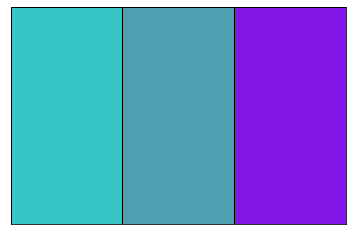

446. Good: red Bad: dark


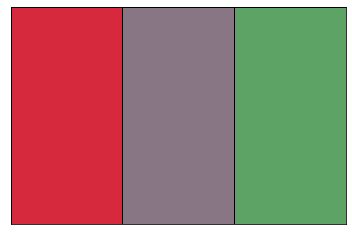

447. Good: rich purple Bad: purple


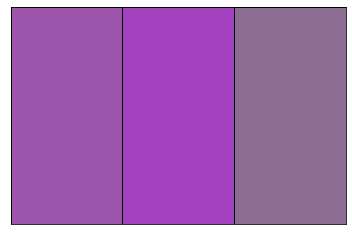

448. Good: puke green Bad: yellow


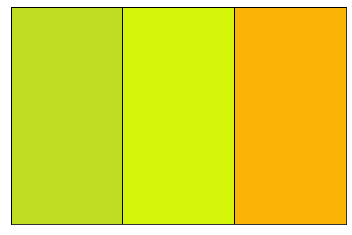

449. Good: neon green Bad: green


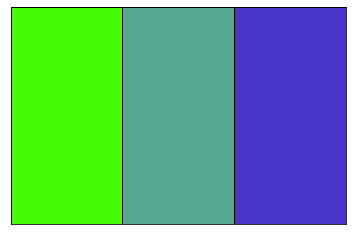

In [756]:
for i in range(len(exp4_contexts_raw)):
    dev_data.display_custom_game(exp4_contexts_raw[i], "{}. Good: {} Bad: {}".format(i, exp4_good_responses_raw[i],exp4_bad_responses_raw[i]))




In [763]:
exp4_df = create_dataframe(exp4_contexts, exp4_good_responses, exp4_bad_responses)

In [764]:
final_df = combined_data_df.append(exp4_df, ignore_index=True)

In [766]:
final_df.to_csv("../data/csv/mturk_augmented_data_exp1234.csv", index=False)

In [4]:
already_found_indices = {15670,
 15673,
 15690,
 15692,
 15695,
 15696,
 15700,
 15703,
 15721,
 15722,
 15731,
 15760,
 15766,
 15768,
 15770,
 15778,
 15785,
 15786,
 15801,
 15809,
 15821,
 15831,
 15835,
 15837,
 15838,
 15852,
 15870,
 15874,
 15876,
 15878,
 15881,
 15884,
 15909,
 15917,
 15920,
 15924,
 15929,
 15935,
 15946,
 15947,
 15957,
 15961,
 15976,
 15983,
 15991,
 16004,
 16007,
 16021,
 16056,
 16061,
 16071,
 16073,
 16084,
 16098,
 16102,
 16134,
 16138,
 16173,
 16174,
 16176,
 16200,
 16203,
 16204,
 16205,
 16229,
 16269,
 16276,
 16281,
 16289,
 16293,
 16298,
 16311,
 16314,
 16323,
 16336,
 16362,
 16365,
 16397,
 16420,
 16422,
 16425,
 16428,
 16435,
 16456,
 16457,
 16459,
 16468,
 16479,
 16507,
 16509,
 16513,
 16520,
 16531,
 16544,
 16553,
 16568,
 16575,
 16581,
 16582,
 16603,
 16608,
 16626,
 16642,
 16648,
 16651,
 16675,
 16688,
 16698,
 16716,
 16723,
 16732,
 16734,
 16739,
 16748,
 16759,
 16770,
 16777,
 16784,
 16797,
 16812,
 16858,
 16870,
 16895,
 16898,
 16916,
 16926,
 16948,
 16949,
 16951,
 16966,
 16991,
 17020,
 17029,
 17036,
 17052,
 17054,
 17071,
 17081,
 17082,
 17093,
 17109,
 17111,
 17114,
 17119,
 17128,
 17134,
 17138,
 17141,
 17145,
 17150,
 17151,
 17155,
 17164,
 17168,
 17177,
 17187,
 17192,
 17198,
 17201,
 17206,
 17207,
 17228,
 17242,
 17267,
 17272,
 17276,
 17278,
 17286,
 17293,
 17309,
 17336,
 17339,
 17391,
 17398,
 17412,
 17433,
 17448,
 17454,
 17470,
 17473,
 17483,
 17489,
 17518,
 17523,
 17539,
 17542,
 17566,
 17574,
 17577,
 17582,
 17622,
 17632,
 17640,
 17662,
 17698,
 17706,
 17717,
 17725,
 17734,
 17742,
 17767,
 17776,
 17801,
 17804,
 17812,
 17820,
 17841,
 17855,
 17861,
 17874,
 17893,
 17905,
 17913,
 17951,
 17980,
 17983,
 18011,
 18025,
 18037,
 18045,
 18062,
 18070,
 18080,
 18103,
 18111,
 18120,
 18130,
 18137,
 18148,
 18181,
 18188,
 18197,
 18221,
 18226,
 18239,
 18240,
 18251,
 18288,
 18308,
 18321,
 18351,
 18361,
 18365,
 18377,
 18378,
 18392,
 18408,
 18414,
 18428,
 18431,
 18433,
 18444,
 18451,
 18474,
 18502,
 18504,
 18506,
 18523,
 18539,
 18557,
 18614,
 18646,
 18648,
 18659,
 18669,
 18684,
 18686,
 18692,
 18699,
 18701,
 18705,
 18706,
 18717,
 18718,
 18752,
 18761,
 18783,
 18790,
 18808,
 18814,
 18817,
 18861,
 18869,
 18879,
 18887,
 18923,
 18949,
 19062,
 19066,
 19086,
 19097,
 19120,
 19126,
 19132,
 19139,
 19157,
 19162,
 19166,
 19169,
 19184,
 19210,
 19230,
 19241,
 19245,
 19246,
 19279,
 19293,
 19294,
 19322,
 19323,
 19327,
 19337,
 19350,
 19353,
 19362,
 19376,
 19388,
 19394,
 19408,
 19425,
 19449,
 19487,
 19493,
 19500,
 19503,
 19513,
 19607,
 19627,
 19630,
 19636,
 19671,
 19673,
 19699,
 19724,
 19730,
 19735,
 19743,
 19784,
 19800,
 19805,
 19825,
 19839,
 19872,
 19877,
 19881,
 19894,
 19940,
 19948,
 19961,
 19963,
 20030,
 20053,
 20085,
 20109,
 20137,
 20139,
 20145,
 20157,
 20175,
 20180,
 20197,
 20216,
 20220,
 20235,
 20262,
 20288,
 20321,
 20337,
 20361,
 20380,
 20412,
 20421,
 20422,
 20430,
 20436,
 20450,
 20453,
 20562,
 20597,
 20601,
 20638,
 20656,
 20680,
 20682,
 20689,
 20692,
 20712,
 20770,
 20774,
 20795,
 20800,
 20856,
 20857,
 20942,
 21011,
 21024,
 21037,
 21058,
 21061,
 21095,
 21115,
 21172,
 21231,
 21234,
 21253,
 21285,
 21320,
 21336,
 21411,
 21420,
 21448,
 21464,
 21506,
 21545,
 21582,
 21590,
 21600,
 21632,
 21644,
 21701,
 21722,
 21767,
 21774,
 21865,
 21891,
 21915,
 21956,
 21958,
 22027,
 22042,
 22095,
 22105,
 22151,
 22177,
 22223,
 22233,
 22292,
 22309,
 22368,
 22412,
 22414,
 22458,
 22484,
 22533,
 22538,
 22575,
 22603,
 22609,
 22644,
 22693,
 22715,
 22729,
 22762,
 22766,
 22799,
 22830,
 22905,
 22907,
 22945,
 22950,
 22985,
 22990,
 23029,
 23033,
 23056,
 23068,
 23085,
 23174,
 23227,
 23322,
 23333,
 23370,
 23377,
 23422,
 23426,
 23472,
 23515,
 23531,
 23597,
 23651,
 23742,
 23747,
 23807,
 23853,
 23868,
 23906,
 23908,
 24030,
 24193,
 24220,
 24232,
 24254,
 24299,
 24325,
 24395,
 24413,
 24440,
 24482,
 24558,
 24628,
 24639,
 24773,
 24774,
 24820,
 24919,
 24975,
 25029,
 25048,
 25049,
 25053,
 25128,
 25170,
 25172,
 25187,
 25194,
 25218,
 25240,
 25312,
 25360,
 25455,
 25666,
 25667,
 25682,
 25684,
 25894,
 25962,
 25978,
 25994,
 26065,
 26141,
 26223,
 26294,
 26310,
 26324,
 26379,
 26414,
 26446,
 26475,
 26483,
 26502,
 26541,
 26806,
 26863,
 27010,
 27015,
 27174,
 27379,
 27732,
 28120,
 28207,
 28217,
 28234,
 28316,
 28618}